In [ ]:
!pip install torch

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 77.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 94.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 12.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 78.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [ ]:
!pip install --upgrade torch

In [ ]:
!wget https://www.cs.toronto.edu/~kriz/cifar-100-python.tar.gz

--2025-04-22 14:12:51--  https://www.cs.toronto.edu/~kriz/cifar-100-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 169001437 (161M) [application/x-gzip]
Saving to: ‘cifar-100-python.tar.gz’

cifar-100-python.ta 100%[===================>] 161.17M  79.7MB/s    in 2.0s    

2025-04-22 14:12:53 (79.7 MB/s) - ‘cifar-100-python.tar.gz’ saved [169001437/169001437]



In [ ]:
!tar -xvzf cifar-100-python.tar.gz

cifar-100-python/
cifar-100-python/file.txt~
cifar-100-python/train
cifar-100-python/test
cifar-100-python/meta


In [ ]:
import pickle
import numpy as np

def load_cifar100(file_path):
    with open(file_path, 'rb') as f:
        data = pickle.load(f, encoding='latin1')
    return data
train_data = load_cifar100('cifar-100-python/train')
test_data = load_cifar100('cifar-100-python/test')
meta=load_cifar100('cifar-100-python/meta')

In [ ]:
train_img=train_data['data']
train_labels = train_data['fine_labels']
test_img=test_data['data']
test_labels = test_data['fine_labels']
fine_labels = meta['fine_label_names']

In [ ]:
train_x_img=np.empty((50000,3,32,32))
test_x_img=np.empty((10000,3,32,32))
for i,img in enumerate(train_img):
    train_x_img[i]=train_img[i].reshape(3, 32, 32)/255
for i,img in enumerate(test_img):
    test_x_img[i]=test_img[i].reshape(3, 32, 32)/255
print(train_x_img.shape,test_x_img.shape)

(50000, 3, 32, 32) (10000, 3, 32, 32)


In [ ]:
train_names_list=[]
test_names_list=[]
for i,elem in enumerate(train_labels):
    train_names_list.append(fine_labels[elem])
for i,elem in enumerate(test_names_list):
    test_names_list.append(fine_labels[elem])

19
cattle


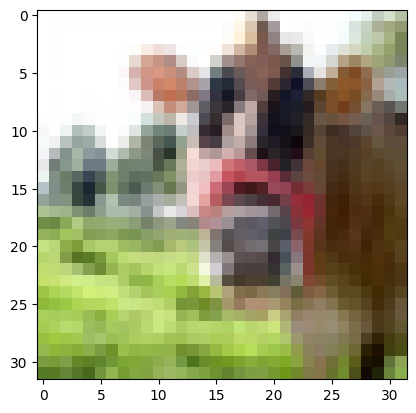

In [ ]:
import matplotlib.pyplot as plt
print(train_labels[0])
print(train_names_list[0])
plt.imshow(train_x_img[0].transpose(1, 2, 0))


In [ ]:
from sklearn.model_selection import train_test_split
def create_4x_dataset(X,labels):
    X1=np.rot90(X, k=1, axes=(2,3))
    X2=np.rot90(X, k=2,axes=(2,3))
    X3=np.rot90(X, k=3,axes=(2,3))
    out_x=np.concatenate([X, X1,X2,X3])
    out_labels=np.concatenate([labels]*4)
    out_x,un_useble_x,out_labels,un_useble_labels=train_test_split(out_x, out_labels, test_size=0.25, random_state=42,shuffle=True)
    return un_useble_x,un_useble_labels

In [ ]:
X,label=create_4x_dataset(train_x_img,train_labels)
plt.imshow(X[50000].transpose(1, 2, 0))
print(label.shape)

KeyboardInterrupt: 

In [ ]:
!pip install torchviz

In [ ]:

import pandas as pd
import torch
import torch.nn as nn
from torch.optim.lr_scheduler import CyclicLR,ExponentialLR
from torchviz import make_dot
from torch.utils.tensorboard import SummaryWriter
torch.manual_seed(2002)

ModuleNotFoundError: No module named 'torchviz'

In [ ]:
import torchvision.models as models
resnet18 = models.resnet18(pretrained=True)  # предобученная на ImageNet
resnet34 = models.resnet34(pretrained=True)
resnet50 = models.resnet50(pretrained=True)
resnet101 = models.resnet101(pretrained=True)
resnet152 = models.resnet152(pretrained=True)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ValueError: The parameter 'num_classes' expected value 1000 but got 100 instead.

In [ ]:
resnet18_cifar = models.resnet18(num_classes=100)
resnet34_cifar = models.resnet34(num_classes=100)

In [ ]:
# cnn_1000=default_CNN_1000()
total_params = sum(p.numel() for p in resnet34_cifar.parameters())
print(f"Всего параметров: {total_params}")

Всего параметров: 21335972


In [ ]:
class default_CNN_1000(nn.Module):
    def __init__(self):
        super().__init__()
        # self.pool1=nn.MaxPool2d(kernel_size=4, stride=4)
        self.conv1=nn.Conv2d(3, 3, kernel_size=3, padding=1, groups=3)
        self.bn1=nn.BatchNorm2d(3)
        self.relu1=nn.ReLU()
        self.pool1=nn.MaxPool2d(kernel_size=4, stride=4)
        self.conv2=nn.Conv2d(3, 2, kernel_size=3, padding=1)
        self.bn2=nn.BatchNorm2d(2)
        self.relu2=nn.ReLU()
        self.pool2=nn.MaxPool2d(kernel_size=4, stride=4)
        self.flatten=nn.Flatten()
        self.fc=nn.Linear(8, 100)
        self.sm=nn.Softmax(dim=-1)
    def forward(self, x):
        # x = self.pool1(x)
        x=self.conv1(x)
        x=self.bn1(x)
        x=self.relu1(x)
        x=self.pool1(x)
        x=self.conv2(x)
        x=self.bn2(x)
        x=self.relu2(x)
        x=self.pool2(x)
        x=self.flatten(x)
        x = self.fc(x)
        # x=self.sm(x)
        return x

In [ ]:
cnn_1000=default_CNN_1000()
total_params = sum(p.numel() for p in cnn_1000.parameters())
print(f"Всего параметров: {total_params}")

Всего параметров: 996


In [ ]:
y = cnn_1000(torch.from_numpy(train_x_img).float())
make_dot(y, params=dict(cnn_1000.named_parameters())).render("defoult_cnn_1000", format="png")

'defoult_cnn_1000.png'

In [ ]:
# попробуем чисто сверточную сеть
class without_fc_CNN_1000(nn.Module):
    def __init__(self):
        super().__init__()
        # self.pool1=nn.MaxPool2d(kernel_size=4, stride=4)
        self.conv0=nn.Conv2d(3, 6, kernel_size=3, padding=1,groups=3) # 30x30
        self.bn0=nn.BatchNorm2d(6)
        self.relu0=nn.ReLU()
        self.pool1=nn.MaxPool2d(kernel_size=3, stride=3)#10x10
        self.conv1=nn.Conv2d(6, 10, kernel_size=3, padding=0,groups=2,bias=False)
        self.bn1=nn.BatchNorm2d(10)
        self.relu1=nn.ReLU()
        self.conv2=nn.Conv2d(10, 10, kernel_size=3, padding=1, groups=10,bias=False)
        self.bn2=nn.BatchNorm2d(10)
        self.relu2=nn.ReLU()
        self.conv3=nn.Conv2d(10, 25, kernel_size=3, padding=1,groups=5)
        self.bn3=nn.BatchNorm2d(25)
        self.relu3=nn.ReLU()
        self.pool2=nn.MaxPool2d(kernel_size=2, stride=2)
        self.flatten=nn.Flatten()
        # self.fc=nn.Linear(8, 100)
        self.sm=nn.Softmax(dim=-1)
    def forward(self, x):
        # x = self.pool1(x)
        x=self.conv0(x)
        x=self.bn0(x)
        x=self.relu0(x)
        x=self.pool1(x)
        y=self.conv1(x)
        x=self.bn1(y)
        x=self.relu1(x)
        x=self.conv2(x)
        x=self.bn2(x)
        x=self.relu2(x)
        x=self.conv3(x+y)
        x=self.bn3(x)
        x=self.relu3(x)
        x=self.pool2(x)
        x=self.flatten(x)
        # x=self.fc(x)
        x=self.sm(x)
        return x

In [ ]:
wo_fc_cnn_1000=without_fc_CNN_1000()
total_params = sum(p.numel() for p in wo_fc_cnn_1000.parameters())
print(f"Всего параметров: {total_params}")

Всего параметров: 997


In [ ]:
y = wo_fc_cnn_1000(torch.from_numpy(train_x_img).float())
make_dot(y, params=dict(wo_fc_cnn_1000.named_parameters())).render("without_fc_cnn_1000", format="png")

'without_fc_cnn_1000.png'

In [ ]:
cnn_1000.forward(torch.from_numpy(train_x_img).float())

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1739: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


tensor([[0.0071, 0.0272, 0.0050,  ..., 0.0012, 0.0033, 0.0073],
        [0.0059, 0.0358, 0.0019,  ..., 0.0005, 0.0012, 0.0038],
        [0.0033, 0.0320, 0.0044,  ..., 0.0010, 0.0022, 0.0110],
        ...,
        [0.0049, 0.0227, 0.0050,  ..., 0.0024, 0.0052, 0.0099],
        [0.0134, 0.0242, 0.0045,  ..., 0.0022, 0.0050, 0.0061],
        [0.0111, 0.0199, 0.0056,  ..., 0.0040, 0.0083, 0.0081]],
       grad_fn=<SoftmaxBackward0>)

In [ ]:
from sklearn.model_selection import train_test_split
import torch.optim as optim
from tqdm import tqdm
from torch.utils.data import DataLoader,TensorDataset
def train_model(
    model,
    X_train,
    Y_train,
    X_test,
    Y_test,
    criterion,
    optimizer,
    num_epochs=10,
    device='cpu',
    batch_size=16,
    with_cv=False
  ):

    train_data=TensorDataset(torch.tensor(X_train).float(),torch.tensor(Y_train))
    train_loader=DataLoader(train_data,batch_size=batch_size,shuffle=True)
    test_data=TensorDataset(torch.tensor(X_test).float(),torch.tensor(Y_test))
    val_loader=DataLoader(test_data,batch_size=batch_size,shuffle=False)
    model = model.to(device)
    best_val_loss = float('inf')

    for epoch in range(num_epochs):
        model.train()
        running_loss = 0.0
        correct = 0
        total = 0

        # Прогресс-бар для обучения
        train_loop = tqdm(train_loader, desc=f'Epoch {epoch+1}/{num_epochs} [Train]')
        for inputs, labels in train_loop:
            inputs, labels = inputs.to(device), labels.to(device)

            optimizer.zero_grad()

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            loss.backward()
            optimizer.step()
            running_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            # Обновление прогресс-бара
            train_loop.set_postfix(loss=running_loss/(total/len(train_loader.dataset)),
                                 acc=100.*correct/total)

        train_loss = running_loss / len(train_loader)
        train_acc = 100 * correct / total

        # Валидация
        val_loss, val_acc = validate(model, val_loader, criterion, device)

        # Логирование
        print(f'Epoch {epoch+1}: '
              f'Train Loss: {train_loss:.4f}, Train Acc: {train_acc:.2f}% | '
              f'Val Loss: {val_loss:.4f}, Val Acc: {val_acc:.2f}%')

    print('Training complete!')
    return model

def validate(model, val_loader, criterion, device):
    """Функция валидации"""
    model.eval()
    val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        val_loop = tqdm(val_loader, desc='Validating')
        for inputs, labels in val_loop:
            inputs, labels = inputs.to(device), labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            val_loop.set_postfix(loss=val_loss/(total/len(val_loader.dataset)),
                               acc=100.*correct/total)

    val_loss = val_loss / len(val_loader)
    val_acc = 100 * correct / total
    return val_loss, val_acc


In [ ]:
criterion=nn.CrossEntropyLoss()
wo_fc_cnn_1000.to('cpu')
optimizer=optim.Adam(wo_fc_cnn_1000.parameters(),lr=0.0001)
my_model=train_model(wo_fc_cnn_1000,
    train_x_img,
    train_labels,
    test_x_img,
    test_labels,
    criterion,
    optimizer,
    num_epochs=150,
    device='cpu')

Epoch 1/150 [Train]:  26%|██▌       | 802/3125 [00:11<00:32, 70.56it/s, acc=0.748, loss=1.87e+4]


KeyboardInterrupt: 

In [ ]:
criterion=nn.CrossEntropyLoss()
optimizer=optim.Adam(cnn_1000.parameters(),lr=0.001)
my_model=train_model(cnn_1000,
    train_x_img,
    train_labels,
    test_x_img,
    test_labels,
    criterion,
    optimizer,
    num_epochs=100,
    device='cuda')

Validating: 100%|██████████| 625/625 [00:01<00:00, 453.64it/s, acc=4.66, loss=2.68e+3]


Epoch 1: Train Loss: 4.4652, Train Acc: 3.07% | Val Loss: 4.2954, Val Acc: 4.66%


Validating: 100%|██████████| 625/625 [00:01<00:00, 453.78it/s, acc=6.1, loss=2.62e+3]


Epoch 2: Train Loss: 4.2613, Train Acc: 5.05% | Val Loss: 4.1956, Val Acc: 6.10%


Validating: 100%|██████████| 625/625 [00:01<00:00, 404.16it/s, acc=6.67, loss=2.59e+3]


Epoch 3: Train Loss: 4.1918, Train Acc: 6.21% | Val Loss: 4.1372, Val Acc: 6.67%


Validating: 100%|██████████| 625/625 [00:01<00:00, 422.84it/s, acc=7.21, loss=2.56e+3]


Epoch 4: Train Loss: 4.1422, Train Acc: 7.07% | Val Loss: 4.0997, Val Acc: 7.21%


Validating: 100%|██████████| 625/625 [00:01<00:00, 377.21it/s, acc=8.18, loss=2.55e+3]


Epoch 5: Train Loss: 4.1102, Train Acc: 7.53% | Val Loss: 4.0752, Val Acc: 8.18%


Validating: 100%|██████████| 625/625 [00:01<00:00, 427.02it/s, acc=8.27, loss=2.54e+3]


Epoch 6: Train Loss: 4.0858, Train Acc: 7.88% | Val Loss: 4.0571, Val Acc: 8.27%


Validating: 100%|██████████| 625/625 [00:01<00:00, 443.62it/s, acc=8.21, loss=2.53e+3]


Epoch 7: Train Loss: 4.0718, Train Acc: 8.08% | Val Loss: 4.0430, Val Acc: 8.21%


Validating: 100%|██████████| 625/625 [00:01<00:00, 444.86it/s, acc=8.72, loss=2.52e+3]


Epoch 8: Train Loss: 4.0596, Train Acc: 8.14% | Val Loss: 4.0288, Val Acc: 8.72%


Validating: 100%|██████████| 625/625 [00:01<00:00, 449.51it/s, acc=8.35, loss=2.52e+3]


Epoch 9: Train Loss: 4.0500, Train Acc: 8.44% | Val Loss: 4.0303, Val Acc: 8.35%


Validating: 100%|██████████| 625/625 [00:01<00:00, 446.27it/s, acc=8.95, loss=2.51e+3]


Epoch 10: Train Loss: 4.0414, Train Acc: 8.47% | Val Loss: 4.0180, Val Acc: 8.95%


Validating: 100%|██████████| 625/625 [00:01<00:00, 445.65it/s, acc=8.46, loss=2.51e+3]


Epoch 11: Train Loss: 4.0342, Train Acc: 8.57% | Val Loss: 4.0167, Val Acc: 8.46%


Validating: 100%|██████████| 625/625 [00:01<00:00, 438.68it/s, acc=8.93, loss=2.5e+3]


Epoch 12: Train Loss: 4.0316, Train Acc: 8.68% | Val Loss: 4.0067, Val Acc: 8.93%


Validating: 100%|██████████| 625/625 [00:01<00:00, 434.29it/s, acc=8.71, loss=2.5e+3]


Epoch 13: Train Loss: 4.0274, Train Acc: 8.57% | Val Loss: 3.9987, Val Acc: 8.71%


Validating: 100%|██████████| 625/625 [00:01<00:00, 419.78it/s, acc=8.52, loss=2.5e+3]


Epoch 14: Train Loss: 4.0218, Train Acc: 8.80% | Val Loss: 3.9967, Val Acc: 8.52%


Validating: 100%|██████████| 625/625 [00:01<00:00, 435.56it/s, acc=9.19, loss=2.5e+3]


Epoch 15: Train Loss: 4.0198, Train Acc: 8.73% | Val Loss: 3.9970, Val Acc: 9.19%


Validating: 100%|██████████| 625/625 [00:01<00:00, 379.86it/s, acc=8.61, loss=2.5e+3]


Epoch 16: Train Loss: 4.0163, Train Acc: 8.77% | Val Loss: 4.0014, Val Acc: 8.61%


Validating: 100%|██████████| 625/625 [00:01<00:00, 419.64it/s, acc=8.94, loss=2.49e+3]


Epoch 17: Train Loss: 4.0129, Train Acc: 8.99% | Val Loss: 3.9915, Val Acc: 8.94%


Validating: 100%|██████████| 625/625 [00:01<00:00, 432.37it/s, acc=8.98, loss=2.49e+3]


Epoch 18: Train Loss: 4.0122, Train Acc: 8.79% | Val Loss: 3.9861, Val Acc: 8.98%


Validating: 100%|██████████| 625/625 [00:01<00:00, 417.29it/s, acc=9.29, loss=2.49e+3]


Epoch 19: Train Loss: 4.0084, Train Acc: 8.79% | Val Loss: 3.9862, Val Acc: 9.29%


Validating: 100%|██████████| 625/625 [00:02<00:00, 243.46it/s, acc=9.09, loss=2.49e+3]


Epoch 20: Train Loss: 4.0078, Train Acc: 8.95% | Val Loss: 3.9810, Val Acc: 9.09%


Validating: 100%|██████████| 625/625 [00:01<00:00, 427.53it/s, acc=8.94, loss=2.49e+3]


Epoch 21: Train Loss: 4.0042, Train Acc: 9.00% | Val Loss: 3.9865, Val Acc: 8.94%


Validating: 100%|██████████| 625/625 [00:03<00:00, 197.47it/s, acc=9.39, loss=2.49e+3]


Epoch 22: Train Loss: 4.0037, Train Acc: 8.89% | Val Loss: 3.9891, Val Acc: 9.39%


Validating: 100%|██████████| 625/625 [00:01<00:00, 436.61it/s, acc=9.36, loss=2.49e+3]


Epoch 23: Train Loss: 3.9999, Train Acc: 8.84% | Val Loss: 3.9780, Val Acc: 9.36%


Epoch 24/100 [Train]:  24%|██▍       | 743/3125 [00:02<00:09, 257.50it/s, acc=8.74, loss=1.25e+4]


KeyboardInterrupt: 

In [ ]:
my_model=torch.load('best_model.pth',weights_only=False,map_location=torch.device('cpu'))

In [ ]:
from sklearn.metrics import accuracy_score
answ=my_model.forward(torch.tensor(test_x_img).float()).detach().numpy()
my_answ=np.argmax(answ,axis=1)
print('CNN1000_accuracy=',accuracy_score(my_answ,test_labels))

CNN1000_accuracy= 0.31


In [ ]:

class default_CNN_5000(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1=nn.Conv2d(3, 9, kernel_size=3,padding=1,groups=3,bias=False)
        self.bn1=nn.BatchNorm2d(9)
        self.relu1=nn.ReLU()
        self.conv2=nn.Conv2d(9, 18, kernel_size=3,padding=1,groups=3)
        self.bn2=nn.BatchNorm2d(18)
        self.relu2=nn.ReLU()
        self.pool1=nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3=nn.Conv2d(18, 36, kernel_size=3,padding=1,groups=18)
        self.bn3=nn.BatchNorm2d(36)
        self.relu3=nn.ReLU()
        self.pool2=nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv4=nn.Conv2d(36, 36, kernel_size=3,padding=1,groups=12)
        self.bn4=nn.BatchNorm2d(36)
        self.relu4=nn.ReLU()
        self.pool3=nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv5=nn.Conv2d(36, 6, kernel_size=3,padding=1,groups=6)
        self.bn5=nn.BatchNorm2d(6)
        self.relu5=nn.ReLU()
        self.pool4=nn.MaxPool2d(kernel_size=2, stride=2)
        self.flatten=nn.Flatten()
        self.fc=nn.Linear(24, 100)
        self.sm=nn.Softmax()
    def forward(self, x):

        x=self.conv1(x)
        x=self.bn1(x)
        x=self.relu1(x)
        x=self.conv2(x)
        x=self.bn2(x)
        x=self.relu2(x)
        x=self.pool1(x)
        x=self.conv3(x)
        x=self.bn3(x)
        x=self.relu3(x)
        x=self.pool2(x)
        x=self.conv4(x)
        x=self.bn4(x)
        x=self.relu4(x)
        x=self.pool3(x)
        x=self.conv5(x)
        x=self.bn5(x)
        x=self.relu5(x)
        x=self.pool4(x)
        x=self.flatten(x)
        x = self.fc(x)
        x= self.sm(x)
        return x

In [ ]:
cnn_5000=default_CNN_5000()
total_params = sum(p.numel() for p in cnn_5000.parameters())
print(f"Всего параметров: {total_params}")

Всего параметров: 4993


In [ ]:
y = cnn_5000(torch.from_numpy(train_x_img[:1]).float())
make_dot(y, params=dict(cnn_5000.named_parameters())).render("defoult_cnn_5000", format="png")

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1739: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


'defoult_cnn_5000.png'

In [ ]:

class cpecial_CNN_5000(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1=nn.Conv2d(3, 6, kernel_size=3,padding=1,groups=3,bias=False)
        self.bn1=nn.BatchNorm2d(6)
        self.relu1=nn.ReLU()

        self.conv2=nn.Conv2d(6, 36, kernel_size=3,padding=1,groups=6,bias=False)
        self.bn2=nn.BatchNorm2d(36)
        self.relu2=nn.ReLU()

        self.pool1=nn.MaxPool2d(kernel_size=4, stride=4)

        self.conv3=nn.Conv2d(36, 36, kernel_size=3,padding=1,groups=36)
        self.bn3=nn.BatchNorm2d(36)
        self.relu3=nn.ReLU()

        self.conv4=nn.Conv2d(36, 36, kernel_size=3,padding=1,groups=36)
        self.bn4=nn.BatchNorm2d(36)
        self.relu4=nn.ReLU()

        self.conv5=nn.Conv2d(36, 36, kernel_size=3,padding=1,groups=36)
        self.bn5=nn.BatchNorm2d(36)
        self.relu5=nn.ReLU()

        self.conv6=nn.Conv2d(36, 36, kernel_size=3,padding=1,groups=36,bias=False)
        self.bn6=nn.BatchNorm2d(36)
        self.relu6=nn.ReLU()

        self.pool3=nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv7=nn.Conv2d(36, 6, kernel_size=3,padding=1,groups=6)
        self.bn7=nn.BatchNorm2d(6)
        self.relu7=nn.ReLU()

        self.pool4=nn.MaxPool2d(kernel_size=2, stride=2)

        self.flatten=nn.Flatten()
        self.fc=nn.Linear(24, 100)
        self.sm=nn.Softmax(dim=-1)

        # self.alpha=nn.Parameter(torch.tensor(0.5))
        # self.beta=nn.Parameter(torch.tensor(0.5))
        # self.sigma=nn.Parameter(torch.tensor(0.5))
        # self.delta=nn.Parameter(torch.tensor(0.5))

    def forward(self, x):

        x=self.conv1(x)
        x=self.bn1(x)
        x=self.relu1(x)

        x=self.conv2(x)
        x=self.bn2(x)
        x=self.relu2(x)

        x=self.pool1(x)

        x=self.conv3(x)
        z=self.bn3(x)
        x=self.relu3(z)

        x=self.conv4(x)
        v=self.bn4(x)
        x=self.relu4(v)#+self.alpha*z)

        x=self.conv5(x)
        o=self.bn5(x)
        x=self.relu5(o)

        x=self.conv6(x)
        x=self.bn6(x)
        x=self.relu6(x)#+self.beta*o+self.sigma*v+self.delta*z)

        x=self.pool3(x)

        x=self.conv7(x)
        x=self.bn7(x)
        x=self.relu7(x)

        x=self.pool4(x)

        x=self.flatten(x)
        x = self.fc(x)
        x= self.sm(x)*100

        return x

In [ ]:
special_cnn_5000=cpecial_CNN_5000()
total_params = sum(p.numel() for p in special_cnn_5000.parameters())
print(f"Всего параметров: {total_params}")
special_cnn_5000.to('cuda')

Всего параметров: 4996


cpecial_CNN_5000(
  (conv1): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=3, bias=False)
  (bn1): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1): ReLU()
  (conv2): Conv2d(6, 36, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=6, bias=False)
  (bn2): BatchNorm2d(36, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu2): ReLU()
  (pool1): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(36, 36, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=36)
  (bn3): BatchNorm2d(36, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu3): ReLU()
  (conv4): Conv2d(36, 36, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=36)
  (bn4): BatchNorm2d(36, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu4): ReLU()
  (conv5): Conv2d(36, 36, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=36)
  (bn5): B

In [ ]:
y = special_cnn_5000(torch.from_numpy(train_x_img[:1]).float())
make_dot(y, params=dict(special_cnn_5000.named_parameters())).render("special_without_softmax_cnn_5000", format="png")

'special_without_softmax_cnn_5000.png'

In [ ]:
criterion=nn.CrossEntropyLoss()
optimizer=optim.Adam(my_model.parameters(),lr=0.00001)
my_model=train_model(my_model,
    train_x_img,
    train_labels,
    test_x_img,
    test_labels,
    criterion,
    optimizer,
    num_epochs=200,
    batch_size=16,
    device='cpu')

Validating: 100%|██████████| 625/625 [00:08<00:00, 72.77it/s, acc=30.8, loss=1.85e+3]


Epoch 1: Train Loss: 2.8398, Train Acc: 32.64% | Val Loss: 2.9670, Val Acc: 30.78%


Validating: 100%|██████████| 625/625 [00:08<00:00, 72.76it/s, acc=31.1, loss=1.85e+3]


Epoch 2: Train Loss: 2.8398, Train Acc: 32.71% | Val Loss: 2.9615, Val Acc: 31.08%


Epoch 3/200 [Train]:  18%|█▊        | 549/3125 [00:19<01:31, 28.28it/s, acc=32.9, loss=8.9e+3]


KeyboardInterrupt: 

In [ ]:
torch.save(my_model, 'best_model.pth')

In [ ]:
from sklearn.metrics import accuracy_score
answ=special_cnn_5000.forward(torch.tensor(test_x_img).float()).to('cpu').detach().numpy()
my_answ=np.argmax(answ,axis=1)
print('CNN1000_accuracy=',accuracy_score(my_answ,test_labels))

RuntimeError: Input type (torch.FloatTensor) and weight type (torch.cuda.FloatTensor) should be the same or input should be a MKLDNN tensor and weight is a dense tensor

In [ ]:

class cpecial_1000_CNN_5000(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1=nn.Conv2d(3, 6, kernel_size=3,padding=1,groups=3,bias=False)
        self.bn1=nn.BatchNorm2d(6)
        self.relu1=nn.ReLU()

        self.conv2=nn.Conv2d(6, 36, kernel_size=3,padding=1,groups=6,bias=False)
        self.bn2=nn.BatchNorm2d(36)
        self.relu2=nn.ReLU()

        self.pool1=nn.MaxPool2d(kernel_size=4, stride=4)

        self.conv3=nn.Conv2d(36, 36, kernel_size=3,padding=1,groups=36)
        self.bn3=nn.BatchNorm2d(36)
        self.relu3=nn.ReLU()

        self.conv4=nn.Conv2d(36, 36, kernel_size=3,padding=1,groups=36)
        self.bn4=nn.BatchNorm2d(36)
        self.relu4=nn.ReLU()

        self.conv5=nn.Conv2d(36, 36, kernel_size=3,padding=1,groups=36)
        self.bn5=nn.BatchNorm2d(36)
        self.relu5=nn.ReLU()

        self.conv6=nn.Conv2d(36, 36, kernel_size=3,padding=1,groups=36,bias=False)
        self.bn6=nn.BatchNorm2d(36)
        self.relu6=nn.ReLU()

        self.pool3=nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv7=nn.Conv2d(36, 6, kernel_size=3,padding=1,groups=6)
        self.bn7=nn.BatchNorm2d(6)
        self.relu7=nn.ReLU()

        self.pool4=nn.MaxPool2d(kernel_size=2, stride=2)

        self.flatten=nn.Flatten()
        self.fc=nn.Linear(24, 100)
        self.sm=nn.Softmax(dim=-1)

        # self.alpha=nn.Parameter(torch.tensor(0.5))
        # self.beta=nn.Parameter(torch.tensor(0.5))
        # self.sigma=nn.Parameter(torch.tensor(0.5))
        # self.delta=nn.Parameter(torch.tensor(0.5))

    def forward(self, x):

        x=self.conv1(x)
        x=self.bn1(x)
        x=self.relu1(x)

        x=self.conv2(x)
        x=self.bn2(x)
        x=self.relu2(x)

        x=self.pool1(x)

        x=self.conv3(x)
        z=self.bn3(x)
        x=self.relu3(z)

        x=self.conv4(x)
        v=self.bn4(x)
        x=self.relu4(v)#+self.alpha*z)

        x=self.conv5(x)
        o=self.bn5(x)
        x=self.relu5(o)

        x=self.conv6(x)
        x=self.bn6(x)
        x=self.relu6(x)#+self.beta*o+self.sigma*v+self.delta*z)

        x=self.pool3(x)

        x=self.conv7(x)
        x=self.bn7(x)
        x=self.relu7(x)

        x=self.pool4(x)

        x=self.flatten(x)
        x = self.fc(x)
        x= self.sm(x)*1000

        return x

In [ ]:
special_1000_cnn_5000=cpecial_1000_CNN_5000()
# total_params = sum(p.numel() for p in cpecial_1000_CNN_5000.parameters())
# print(f"Всего параметров: {total_params}")
special_1000_cnn_5000.to('cuda')

cpecial_1000_CNN_5000(
  (conv1): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=3, bias=False)
  (bn1): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1): ReLU()
  (conv2): Conv2d(6, 36, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=6, bias=False)
  (bn2): BatchNorm2d(36, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu2): ReLU()
  (pool1): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(36, 36, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=36)
  (bn3): BatchNorm2d(36, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu3): ReLU()
  (conv4): Conv2d(36, 36, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=36)
  (bn4): BatchNorm2d(36, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu4): ReLU()
  (conv5): Conv2d(36, 36, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=36)
  (bn

In [ ]:
criterion=nn.CrossEntropyLoss()
optimizer=optim.Adam(special_1000_cnn_5000.parameters(),lr=0.001)
my_model=train_model(special_1000_cnn_5000,
    train_x_img,
    train_labels,
    test_x_img,
    test_labels,
    criterion,
    optimizer,
    num_epochs=200,
    batch_size=16,
    device='cuda')

Epoch 1/200 [Train]:  61%|██████    | 1913/3125 [00:11<00:07, 162.45it/s, acc=2.01, loss=1.65e+4]


KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import accuracy_score
answ=special_cnn_5000(torch.tensor(test_x_img).float()).detach().numpy()
my_answ=np.argmax(answ,axis=1)
print('special_cnn_5000=',accuracy_score(my_answ,test_labels))


special_cnn_5000= 0.2952


In [ ]:
 print(special_cnn_5000.alpha,special_cnn_5000.beta,special_cnn_5000.sigma,special_cnn_5000.delta)

Parameter containing:
tensor(0.3468, requires_grad=True) Parameter containing:
tensor(0.4497, requires_grad=True) Parameter containing:
tensor(0.8172, requires_grad=True) Parameter containing:
tensor(0.5131, requires_grad=True)


In [ ]:
import cv2
import torch.nn.functional as F
class Special_cv_CNN_5000(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1=nn.Conv2d(9, 18, kernel_size=3,padding=1,groups=9,)
        self.bn1=nn.BatchNorm2d(18)
        self.relu1=nn.ReLU()

        self.conv2=nn.Conv2d(18, 18, kernel_size=3,padding=1,groups=18)
        self.bn2=nn.BatchNorm2d(18)
        self.relu2=nn.ReLU()

        self.pool1=nn.MaxPool2d(kernel_size=4, stride=4)

        self.conv3=nn.Conv2d(18, 36, kernel_size=3,padding=1,groups=18)
        self.bn3=nn.BatchNorm2d(36)
        self.relu3=nn.ReLU()

        self.conv4=nn.Conv2d(36, 36, kernel_size=3,padding=1,groups=36)
        self.bn4=nn.BatchNorm2d(36)
        self.relu4=nn.ReLU()

        self.conv5=nn.Conv2d(36, 36, kernel_size=3,padding=1,groups=36)
        self.bn5=nn.BatchNorm2d(36)
        self.relu5=nn.ReLU()

        self.conv6=nn.Conv2d(36, 36, kernel_size=3,padding=1,groups=36)
        self.bn6=nn.BatchNorm2d(36)
        self.relu6=nn.ReLU()

        self.pool3=nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv7=nn.Conv2d(36, 6, kernel_size=3,padding=1,groups=6,bias=False)
        self.bn7=nn.BatchNorm2d(6)
        self.relu7=nn.ReLU()

        self.pool4=nn.MaxPool2d(kernel_size=2, stride=2)

        self.flatten=nn.Flatten()
        self.fc=nn.Linear(24, 100)
        self.sm=nn.Softmax(dim=-1)

    def forward(self, x):

        def give_mag_dir(x):

            sobel_kernel_x = torch.tensor([[-1, 0, 1],
                                          [-2, 0, 2],
                                          [-1, 0, 1]], dtype=torch.float32, device=x.device).view(1, 1, 3, 3)

            sobel_kernel_y = torch.tensor([[-1, -2, -1],
                                          [0, 0, 0],
                                          [1, 2, 1]], dtype=torch.float32, device=x.device).view(1, 1, 3, 3)

            # Применяем свертки для каждого канала
            grad_x = F.conv2d(x, sobel_kernel_x.expand(3, 1, 3, 3), groups=3, padding=1)
            grad_y = F.conv2d(x, sobel_kernel_y.expand(3, 1, 3, 3), groups=3, padding=1)

    # Вычисляем величину градиента
            grad_magnitude = grad_x.pow(2) + grad_y.pow(2)

            # Вычисляем направление градиента (в радианах)
            grad_direction = torch.atan2(grad_y, grad_x)

            return grad_magnitude, grad_direction

        mag,dir=give_mag_dir(x)

        x = torch.cat((x, mag,dir), dim=1)

        x=self.conv1(x)
        x=self.bn1(x)
        x=self.relu1(x)

        x=self.conv2(x)
        x=self.bn2(x)
        x=self.relu2(x)

        x=self.pool1(x)

        x=self.conv3(x)
        z=self.bn3(x)
        x=self.relu3(z)

        x=self.conv4(x)
        x=self.bn4(x)
        x=self.relu4(x)

        x=self.conv5(x)
        x=self.bn5(x)
        x=self.relu5(x)

        x=self.conv6(x)
        x=self.bn6(x)
        x=self.relu6(x+z)

        x=self.pool3(x)

        x=self.conv7(x)
        x=self.bn7(x)
        x=self.relu7(x)

        x=self.pool4(x)

        x=self.flatten(x)
        x = self.fc(x)
        x= self.sm(x)

        return x

In [ ]:
spec_cv_cnn_5000=Special_cv_CNN_5000()
total_params = sum(p.numel() for p in spec_cv_cnn_5000.parameters())
print(f"Всего параметров: {total_params}")
spec_cv_cnn_5000.to('cpu')

Всего параметров: 4996


Special_cv_CNN_5000(
  (conv1): Conv2d(9, 18, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=9)
  (bn1): BatchNorm2d(18, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1): ReLU()
  (conv2): Conv2d(18, 18, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=18)
  (bn2): BatchNorm2d(18, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu2): ReLU()
  (pool1): MaxPool2d(kernel_size=4, stride=4, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(18, 36, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=18)
  (bn3): BatchNorm2d(36, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu3): ReLU()
  (conv4): Conv2d(36, 36, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=36)
  (bn4): BatchNorm2d(36, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu4): ReLU()
  (conv5): Conv2d(36, 36, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=36)
  (bn5): BatchNorm2d(36, ep

In [ ]:
# X_train_1, X_train_2, Y_train_1, Y_train_2=train_test_split(train_x_img,train_labels, train_size=0.5,shuffle=True)
criterion=nn.CrossEntropyLoss()
optimizer=optim.Adam(spec_cv_cnn_5000.parameters(),lr=0.001)
my_model=train_model(spec_cv_cnn_5000,
    train_x_img,
    train_labels,
    test_x_img,
    test_labels,
    criterion,
    optimizer,
    num_epochs=200,
    device='cpu',
    batch_size=16,
    with_cv=True)

Validating: 100%|██████████| 625/625 [00:09<00:00, 68.34it/s, acc=7.83, loss=2.84e+3]


Epoch 1: Train Loss: 4.5718, Train Acc: 5.37% | Val Loss: 4.5481, Val Acc: 7.83%


Validating: 100%|██████████| 625/625 [00:09<00:00, 67.65it/s, acc=10.2, loss=2.83e+3]


Epoch 2: Train Loss: 4.5351, Train Acc: 9.37% | Val Loss: 4.5250, Val Acc: 10.18%


Validating: 100%|██████████| 625/625 [00:08<00:00, 72.70it/s, acc=11.9, loss=2.82e+3]


Epoch 3: Train Loss: 4.5177, Train Acc: 11.08% | Val Loss: 4.5095, Val Acc: 11.90%


Validating: 100%|██████████| 625/625 [00:08<00:00, 69.93it/s, acc=12.7, loss=2.81e+3]


Epoch 4: Train Loss: 4.5063, Train Acc: 12.12% | Val Loss: 4.5010, Val Acc: 12.73%


Validating: 100%|██████████| 625/625 [00:08<00:00, 70.46it/s, acc=13, loss=2.81e+3]


Epoch 5: Train Loss: 4.4980, Train Acc: 12.98% | Val Loss: 4.4971, Val Acc: 13.00%


Validating: 100%|██████████| 625/625 [00:08<00:00, 70.17it/s, acc=13.6, loss=2.81e+3]


Epoch 6: Train Loss: 4.4917, Train Acc: 13.56% | Val Loss: 4.4902, Val Acc: 13.60%


Validating: 100%|██████████| 625/625 [00:08<00:00, 70.89it/s, acc=13.9, loss=2.8e+3]


Epoch 7: Train Loss: 4.4866, Train Acc: 13.98% | Val Loss: 4.4870, Val Acc: 13.88%


Validating: 100%|██████████| 625/625 [00:09<00:00, 68.88it/s, acc=14.3, loss=2.8e+3]


Epoch 8: Train Loss: 4.4830, Train Acc: 14.35% | Val Loss: 4.4823, Val Acc: 14.30%


Validating: 100%|██████████| 625/625 [00:10<00:00, 61.85it/s, acc=14.3, loss=2.8e+3]


Epoch 9: Train Loss: 4.4795, Train Acc: 14.65% | Val Loss: 4.4811, Val Acc: 14.34%


Validating: 100%|██████████| 625/625 [00:08<00:00, 70.71it/s, acc=14.4, loss=2.8e+3]


Epoch 10: Train Loss: 4.4760, Train Acc: 14.97% | Val Loss: 4.4808, Val Acc: 14.36%


Validating: 100%|██████████| 625/625 [00:08<00:00, 76.29it/s, acc=14.8, loss=2.8e+3]


Epoch 11: Train Loss: 4.4732, Train Acc: 15.24% | Val Loss: 4.4756, Val Acc: 14.83%


Validating: 100%|██████████| 625/625 [00:08<00:00, 76.30it/s, acc=15.1, loss=2.8e+3]


Epoch 12: Train Loss: 4.4708, Train Acc: 15.49% | Val Loss: 4.4739, Val Acc: 15.09%


Validating: 100%|██████████| 625/625 [00:08<00:00, 74.07it/s, acc=15.2, loss=2.79e+3]


Epoch 13: Train Loss: 4.4682, Train Acc: 15.80% | Val Loss: 4.4717, Val Acc: 15.22%


Validating: 100%|██████████| 625/625 [00:09<00:00, 68.70it/s, acc=15.4, loss=2.79e+3]


Epoch 14: Train Loss: 4.4671, Train Acc: 15.79% | Val Loss: 4.4708, Val Acc: 15.36%


Validating: 100%|██████████| 625/625 [00:09<00:00, 69.06it/s, acc=15.6, loss=2.79e+3]


Epoch 15: Train Loss: 4.4644, Train Acc: 16.12% | Val Loss: 4.4687, Val Acc: 15.62%


Validating: 100%|██████████| 625/625 [00:08<00:00, 71.22it/s, acc=15.5, loss=2.79e+3]


Epoch 16: Train Loss: 4.4636, Train Acc: 16.08% | Val Loss: 4.4701, Val Acc: 15.50%


Validating: 100%|██████████| 625/625 [00:09<00:00, 63.78it/s, acc=15.7, loss=2.79e+3]


Epoch 17: Train Loss: 4.4622, Train Acc: 16.22% | Val Loss: 4.4680, Val Acc: 15.72%


Validating: 100%|██████████| 625/625 [00:08<00:00, 75.24it/s, acc=15.8, loss=2.79e+3]


Epoch 18: Train Loss: 4.4606, Train Acc: 16.46% | Val Loss: 4.4663, Val Acc: 15.77%


Validating: 100%|██████████| 625/625 [00:08<00:00, 72.17it/s, acc=15.9, loss=2.79e+3]


Epoch 19: Train Loss: 4.4590, Train Acc: 16.53% | Val Loss: 4.4655, Val Acc: 15.95%


Validating: 100%|██████████| 625/625 [00:09<00:00, 68.98it/s, acc=16, loss=2.79e+3]


Epoch 20: Train Loss: 4.4581, Train Acc: 16.62% | Val Loss: 4.4633, Val Acc: 15.99%


Validating: 100%|██████████| 625/625 [00:09<00:00, 69.42it/s, acc=15.8, loss=2.79e+3]


Epoch 21: Train Loss: 4.4567, Train Acc: 16.73% | Val Loss: 4.4650, Val Acc: 15.81%


Validating: 100%|██████████| 625/625 [00:09<00:00, 64.81it/s, acc=16.4, loss=2.79e+3]


Epoch 22: Train Loss: 4.4564, Train Acc: 16.80% | Val Loss: 4.4621, Val Acc: 16.39%


Validating: 100%|██████████| 625/625 [00:09<00:00, 68.69it/s, acc=16.2, loss=2.79e+3]


Epoch 23: Train Loss: 4.4546, Train Acc: 17.00% | Val Loss: 4.4620, Val Acc: 16.20%


Validating: 100%|██████████| 625/625 [00:09<00:00, 66.18it/s, acc=16.3, loss=2.79e+3]


Epoch 24: Train Loss: 4.4553, Train Acc: 16.85% | Val Loss: 4.4604, Val Acc: 16.34%


Validating: 100%|██████████| 625/625 [00:09<00:00, 65.73it/s, acc=16.4, loss=2.79e+3]


Epoch 25: Train Loss: 4.4539, Train Acc: 17.01% | Val Loss: 4.4603, Val Acc: 16.37%


Validating: 100%|██████████| 625/625 [00:09<00:00, 68.67it/s, acc=16, loss=2.79e+3]


Epoch 26: Train Loss: 4.4518, Train Acc: 17.19% | Val Loss: 4.4620, Val Acc: 16.01%


Validating: 100%|██████████| 625/625 [00:09<00:00, 68.00it/s, acc=16.1, loss=2.79e+3]


Epoch 27: Train Loss: 4.4503, Train Acc: 17.43% | Val Loss: 4.4627, Val Acc: 16.13%


Validating: 100%|██████████| 625/625 [00:09<00:00, 67.78it/s, acc=15.8, loss=2.79e+3]


Epoch 28: Train Loss: 4.4509, Train Acc: 17.28% | Val Loss: 4.4662, Val Acc: 15.80%


Validating: 100%|██████████| 625/625 [00:10<00:00, 61.98it/s, acc=16.2, loss=2.79e+3]


Epoch 29: Train Loss: 4.4501, Train Acc: 17.38% | Val Loss: 4.4614, Val Acc: 16.16%


Validating: 100%|██████████| 625/625 [00:09<00:00, 66.64it/s, acc=16.4, loss=2.79e+3]


Epoch 30: Train Loss: 4.4497, Train Acc: 17.36% | Val Loss: 4.4601, Val Acc: 16.36%


Validating: 100%|██████████| 625/625 [00:09<00:00, 65.36it/s, acc=16.8, loss=2.79e+3]


Epoch 31: Train Loss: 4.4478, Train Acc: 17.65% | Val Loss: 4.4573, Val Acc: 16.75%


Validating: 100%|██████████| 625/625 [00:09<00:00, 66.36it/s, acc=16.6, loss=2.79e+3]


Epoch 32: Train Loss: 4.4477, Train Acc: 17.64% | Val Loss: 4.4577, Val Acc: 16.65%


Validating: 100%|██████████| 625/625 [00:09<00:00, 66.73it/s, acc=16.6, loss=2.79e+3]


Epoch 33: Train Loss: 4.4471, Train Acc: 17.66% | Val Loss: 4.4564, Val Acc: 16.59%


Validating: 100%|██████████| 625/625 [00:09<00:00, 67.54it/s, acc=16.7, loss=2.79e+3]


Epoch 34: Train Loss: 4.4468, Train Acc: 17.67% | Val Loss: 4.4577, Val Acc: 16.71%


Validating: 100%|██████████| 625/625 [00:09<00:00, 68.62it/s, acc=16.4, loss=2.79e+3]


Epoch 35: Train Loss: 4.4455, Train Acc: 17.81% | Val Loss: 4.4589, Val Acc: 16.45%


Validating: 100%|██████████| 625/625 [00:09<00:00, 65.58it/s, acc=16.5, loss=2.79e+3]


Epoch 36: Train Loss: 4.4447, Train Acc: 17.88% | Val Loss: 4.4578, Val Acc: 16.48%


Validating: 100%|██████████| 625/625 [00:09<00:00, 63.60it/s, acc=16.8, loss=2.78e+3]


Epoch 37: Train Loss: 4.4447, Train Acc: 17.92% | Val Loss: 4.4546, Val Acc: 16.79%


Validating: 100%|██████████| 625/625 [00:09<00:00, 66.76it/s, acc=16.4, loss=2.79e+3]


Epoch 38: Train Loss: 4.4449, Train Acc: 17.93% | Val Loss: 4.4589, Val Acc: 16.40%


Validating: 100%|██████████| 625/625 [00:09<00:00, 64.03it/s, acc=16.6, loss=2.78e+3]


Epoch 39: Train Loss: 4.4437, Train Acc: 17.96% | Val Loss: 4.4560, Val Acc: 16.59%


Validating: 100%|██████████| 625/625 [00:08<00:00, 69.89it/s, acc=16.8, loss=2.78e+3]


Epoch 40: Train Loss: 4.4436, Train Acc: 18.00% | Val Loss: 4.4556, Val Acc: 16.79%


Validating: 100%|██████████| 625/625 [00:09<00:00, 64.46it/s, acc=16.3, loss=2.79e+3]


Epoch 41: Train Loss: 4.4435, Train Acc: 18.04% | Val Loss: 4.4599, Val Acc: 16.30%


Validating: 100%|██████████| 625/625 [00:10<00:00, 59.86it/s, acc=17.1, loss=2.78e+3]


Epoch 42: Train Loss: 4.4410, Train Acc: 18.26% | Val Loss: 4.4535, Val Acc: 17.14%


Validating: 100%|██████████| 625/625 [00:09<00:00, 63.13it/s, acc=16.1, loss=2.79e+3]


Epoch 43: Train Loss: 4.4414, Train Acc: 18.24% | Val Loss: 4.4601, Val Acc: 16.14%


Validating: 100%|██████████| 625/625 [00:09<00:00, 68.67it/s, acc=16.8, loss=2.78e+3]


Epoch 44: Train Loss: 4.4412, Train Acc: 18.23% | Val Loss: 4.4552, Val Acc: 16.77%


Validating: 100%|██████████| 625/625 [00:09<00:00, 68.48it/s, acc=17.1, loss=2.78e+3]


Epoch 45: Train Loss: 4.4396, Train Acc: 18.42% | Val Loss: 4.4518, Val Acc: 17.10%


Validating: 100%|██████████| 625/625 [00:09<00:00, 66.46it/s, acc=16.4, loss=2.79e+3]


Epoch 46: Train Loss: 4.4409, Train Acc: 18.27% | Val Loss: 4.4568, Val Acc: 16.45%


Validating: 100%|██████████| 625/625 [00:08<00:00, 70.92it/s, acc=16.8, loss=2.78e+3]


Epoch 47: Train Loss: 4.4396, Train Acc: 18.46% | Val Loss: 4.4542, Val Acc: 16.78%


Validating: 100%|██████████| 625/625 [00:09<00:00, 64.00it/s, acc=17, loss=2.78e+3]


Epoch 48: Train Loss: 4.4387, Train Acc: 18.44% | Val Loss: 4.4530, Val Acc: 17.02%


Validating: 100%|██████████| 625/625 [00:09<00:00, 68.62it/s, acc=17, loss=2.78e+3]


Epoch 49: Train Loss: 4.4400, Train Acc: 18.34% | Val Loss: 4.4528, Val Acc: 16.99%


Validating: 100%|██████████| 625/625 [00:09<00:00, 66.48it/s, acc=17, loss=2.78e+3]


Epoch 50: Train Loss: 4.4384, Train Acc: 18.48% | Val Loss: 4.4526, Val Acc: 17.03%


Validating: 100%|██████████| 625/625 [00:09<00:00, 65.67it/s, acc=17.2, loss=2.78e+3]


Epoch 51: Train Loss: 4.4389, Train Acc: 18.47% | Val Loss: 4.4509, Val Acc: 17.21%


Validating: 100%|██████████| 625/625 [00:08<00:00, 73.35it/s, acc=17, loss=2.78e+3]


Epoch 52: Train Loss: 4.4378, Train Acc: 18.55% | Val Loss: 4.4526, Val Acc: 17.04%


Validating: 100%|██████████| 625/625 [00:09<00:00, 64.63it/s, acc=17.1, loss=2.78e+3]


Epoch 53: Train Loss: 4.4377, Train Acc: 18.55% | Val Loss: 4.4518, Val Acc: 17.14%


Validating: 100%|██████████| 625/625 [00:09<00:00, 68.99it/s, acc=16.8, loss=2.78e+3]


Epoch 54: Train Loss: 4.4370, Train Acc: 18.67% | Val Loss: 4.4547, Val Acc: 16.77%


Validating: 100%|██████████| 625/625 [00:08<00:00, 72.98it/s, acc=17.2, loss=2.78e+3]


Epoch 55: Train Loss: 4.4376, Train Acc: 18.57% | Val Loss: 4.4511, Val Acc: 17.19%


Validating: 100%|██████████| 625/625 [00:08<00:00, 73.94it/s, acc=17.1, loss=2.78e+3]


Epoch 56: Train Loss: 4.4381, Train Acc: 18.51% | Val Loss: 4.4514, Val Acc: 17.07%


Validating: 100%|██████████| 625/625 [00:09<00:00, 67.07it/s, acc=16.7, loss=2.78e+3]


Epoch 57: Train Loss: 4.4366, Train Acc: 18.69% | Val Loss: 4.4557, Val Acc: 16.74%


Validating: 100%|██████████| 625/625 [00:09<00:00, 66.29it/s, acc=17.5, loss=2.78e+3]


Epoch 58: Train Loss: 4.4374, Train Acc: 18.61% | Val Loss: 4.4487, Val Acc: 17.46%


Validating: 100%|██████████| 625/625 [00:09<00:00, 64.22it/s, acc=16.9, loss=2.78e+3]


Epoch 59: Train Loss: 4.4363, Train Acc: 18.71% | Val Loss: 4.4524, Val Acc: 16.90%


Validating: 100%|██████████| 625/625 [00:08<00:00, 72.24it/s, acc=16.6, loss=2.78e+3]


Epoch 60: Train Loss: 4.4364, Train Acc: 18.67% | Val Loss: 4.4551, Val Acc: 16.65%


Validating: 100%|██████████| 625/625 [00:10<00:00, 60.22it/s, acc=17.1, loss=2.78e+3]


Epoch 61: Train Loss: 4.4357, Train Acc: 18.82% | Val Loss: 4.4518, Val Acc: 17.09%


Validating: 100%|██████████| 625/625 [00:09<00:00, 65.81it/s, acc=17.1, loss=2.78e+3]


Epoch 62: Train Loss: 4.4356, Train Acc: 18.77% | Val Loss: 4.4523, Val Acc: 17.08%


Validating: 100%|██████████| 625/625 [00:08<00:00, 69.72it/s, acc=16.8, loss=2.78e+3]


Epoch 63: Train Loss: 4.4363, Train Acc: 18.61% | Val Loss: 4.4542, Val Acc: 16.80%


Validating: 100%|██████████| 625/625 [00:09<00:00, 66.18it/s, acc=16.7, loss=2.78e+3]


Epoch 64: Train Loss: 4.4343, Train Acc: 18.86% | Val Loss: 4.4552, Val Acc: 16.70%


Validating: 100%|██████████| 625/625 [00:10<00:00, 60.69it/s, acc=16.8, loss=2.78e+3]


Epoch 65: Train Loss: 4.4353, Train Acc: 18.73% | Val Loss: 4.4542, Val Acc: 16.79%


Validating: 100%|██████████| 625/625 [00:09<00:00, 65.98it/s, acc=17.1, loss=2.78e+3]


Epoch 66: Train Loss: 4.4348, Train Acc: 18.81% | Val Loss: 4.4509, Val Acc: 17.13%


Validating: 100%|██████████| 625/625 [00:08<00:00, 71.08it/s, acc=17.1, loss=2.78e+3]


Epoch 67: Train Loss: 4.4342, Train Acc: 18.86% | Val Loss: 4.4526, Val Acc: 17.05%


Validating: 100%|██████████| 625/625 [00:08<00:00, 73.86it/s, acc=16.8, loss=2.78e+3]


Epoch 68: Train Loss: 4.4342, Train Acc: 18.92% | Val Loss: 4.4541, Val Acc: 16.78%


Validating: 100%|██████████| 625/625 [00:09<00:00, 63.12it/s, acc=17.2, loss=2.78e+3]


Epoch 69: Train Loss: 4.4341, Train Acc: 18.84% | Val Loss: 4.4512, Val Acc: 17.21%


Validating: 100%|██████████| 625/625 [00:09<00:00, 66.42it/s, acc=16.8, loss=2.78e+3]


Epoch 70: Train Loss: 4.4337, Train Acc: 18.93% | Val Loss: 4.4539, Val Acc: 16.79%


Validating: 100%|██████████| 625/625 [00:09<00:00, 65.71it/s, acc=17.2, loss=2.78e+3]


Epoch 71: Train Loss: 4.4336, Train Acc: 18.94% | Val Loss: 4.4495, Val Acc: 17.22%


Validating: 100%|██████████| 625/625 [00:09<00:00, 66.19it/s, acc=17.3, loss=2.78e+3]


Epoch 72: Train Loss: 4.4307, Train Acc: 19.27% | Val Loss: 4.4500, Val Acc: 17.31%


Validating: 100%|██████████| 625/625 [00:09<00:00, 66.65it/s, acc=17, loss=2.78e+3]


Epoch 73: Train Loss: 4.4322, Train Acc: 19.05% | Val Loss: 4.4528, Val Acc: 16.99%


Validating: 100%|██████████| 625/625 [00:09<00:00, 66.34it/s, acc=17.1, loss=2.78e+3]


Epoch 74: Train Loss: 4.4329, Train Acc: 19.00% | Val Loss: 4.4507, Val Acc: 17.05%


Validating: 100%|██████████| 625/625 [00:09<00:00, 66.57it/s, acc=16.7, loss=2.78e+3]


Epoch 75: Train Loss: 4.4326, Train Acc: 19.03% | Val Loss: 4.4532, Val Acc: 16.72%


Validating: 100%|██████████| 625/625 [00:08<00:00, 72.91it/s, acc=17, loss=2.78e+3]


Epoch 76: Train Loss: 4.4310, Train Acc: 19.17% | Val Loss: 4.4516, Val Acc: 16.98%


Validating: 100%|██████████| 625/625 [00:09<00:00, 65.81it/s, acc=17.1, loss=2.78e+3]


Epoch 77: Train Loss: 4.4305, Train Acc: 19.27% | Val Loss: 4.4507, Val Acc: 17.07%


Validating: 100%|██████████| 625/625 [00:09<00:00, 68.37it/s, acc=17.2, loss=2.78e+3]


Epoch 78: Train Loss: 4.4315, Train Acc: 19.18% | Val Loss: 4.4499, Val Acc: 17.25%


Validating: 100%|██████████| 625/625 [00:09<00:00, 66.12it/s, acc=17.2, loss=2.78e+3]


Epoch 79: Train Loss: 4.4318, Train Acc: 19.14% | Val Loss: 4.4510, Val Acc: 17.20%


Validating: 100%|██████████| 625/625 [00:08<00:00, 70.06it/s, acc=17.4, loss=2.78e+3]


Epoch 80: Train Loss: 4.4306, Train Acc: 19.25% | Val Loss: 4.4482, Val Acc: 17.44%


Validating: 100%|██████████| 625/625 [00:08<00:00, 72.94it/s, acc=17, loss=2.78e+3]


Epoch 81: Train Loss: 4.4314, Train Acc: 19.15% | Val Loss: 4.4535, Val Acc: 16.97%


Validating: 100%|██████████| 625/625 [00:09<00:00, 66.11it/s, acc=17.1, loss=2.78e+3]


Epoch 82: Train Loss: 4.4320, Train Acc: 19.10% | Val Loss: 4.4512, Val Acc: 17.07%


Validating: 100%|██████████| 625/625 [00:09<00:00, 65.82it/s, acc=17.1, loss=2.78e+3]


Epoch 83: Train Loss: 4.4317, Train Acc: 19.13% | Val Loss: 4.4514, Val Acc: 17.11%


Validating: 100%|██████████| 625/625 [00:09<00:00, 65.85it/s, acc=16.7, loss=2.78e+3]


Epoch 84: Train Loss: 4.4297, Train Acc: 19.37% | Val Loss: 4.4545, Val Acc: 16.72%


Validating: 100%|██████████| 625/625 [00:10<00:00, 58.87it/s, acc=16.7, loss=2.78e+3]


Epoch 85: Train Loss: 4.4309, Train Acc: 19.21% | Val Loss: 4.4544, Val Acc: 16.72%


Validating: 100%|██████████| 625/625 [00:08<00:00, 70.93it/s, acc=17, loss=2.78e+3]


Epoch 86: Train Loss: 4.4311, Train Acc: 19.15% | Val Loss: 4.4518, Val Acc: 16.99%


Validating: 100%|██████████| 625/625 [00:09<00:00, 66.36it/s, acc=17.4, loss=2.78e+3]


Epoch 87: Train Loss: 4.4300, Train Acc: 19.28% | Val Loss: 4.4487, Val Acc: 17.44%


Validating: 100%|██████████| 625/625 [00:09<00:00, 64.07it/s, acc=17.5, loss=2.78e+3]


Epoch 88: Train Loss: 4.4298, Train Acc: 19.34% | Val Loss: 4.4476, Val Acc: 17.46%


Validating: 100%|██████████| 625/625 [00:09<00:00, 65.21it/s, acc=17.3, loss=2.78e+3]


Epoch 89: Train Loss: 4.4297, Train Acc: 19.29% | Val Loss: 4.4498, Val Acc: 17.29%


Validating: 100%|██████████| 625/625 [00:09<00:00, 68.29it/s, acc=17.5, loss=2.78e+3]


Epoch 90: Train Loss: 4.4297, Train Acc: 19.34% | Val Loss: 4.4484, Val Acc: 17.48%


Validating: 100%|██████████| 625/625 [00:09<00:00, 65.69it/s, acc=17.4, loss=2.78e+3]


Epoch 91: Train Loss: 4.4298, Train Acc: 19.31% | Val Loss: 4.4477, Val Acc: 17.39%


Validating: 100%|██████████| 625/625 [00:09<00:00, 66.39it/s, acc=17.2, loss=2.78e+3]


Epoch 92: Train Loss: 4.4293, Train Acc: 19.38% | Val Loss: 4.4506, Val Acc: 17.19%


Validating: 100%|██████████| 625/625 [00:10<00:00, 60.47it/s, acc=17.4, loss=2.78e+3]


Epoch 93: Train Loss: 4.4287, Train Acc: 19.44% | Val Loss: 4.4485, Val Acc: 17.35%


Validating: 100%|██████████| 625/625 [00:09<00:00, 69.35it/s, acc=16.9, loss=2.78e+3]


Epoch 94: Train Loss: 4.4287, Train Acc: 19.43% | Val Loss: 4.4527, Val Acc: 16.89%


Validating: 100%|██████████| 625/625 [00:09<00:00, 63.33it/s, acc=17.2, loss=2.78e+3]


Epoch 95: Train Loss: 4.4295, Train Acc: 19.35% | Val Loss: 4.4499, Val Acc: 17.21%


Validating: 100%|██████████| 625/625 [00:08<00:00, 71.29it/s, acc=17, loss=2.78e+3]


Epoch 96: Train Loss: 4.4274, Train Acc: 19.56% | Val Loss: 4.4523, Val Acc: 16.97%


Validating: 100%|██████████| 625/625 [00:08<00:00, 71.88it/s, acc=17.3, loss=2.78e+3]


Epoch 97: Train Loss: 4.4305, Train Acc: 19.22% | Val Loss: 4.4499, Val Acc: 17.29%


Validating: 100%|██████████| 625/625 [00:10<00:00, 61.11it/s, acc=16.7, loss=2.78e+3]


Epoch 98: Train Loss: 4.4282, Train Acc: 19.43% | Val Loss: 4.4534, Val Acc: 16.70%


Validating: 100%|██████████| 625/625 [00:09<00:00, 65.49it/s, acc=16.8, loss=2.78e+3]


Epoch 99: Train Loss: 4.4285, Train Acc: 19.43% | Val Loss: 4.4534, Val Acc: 16.84%


Validating: 100%|██████████| 625/625 [00:08<00:00, 70.62it/s, acc=17.2, loss=2.78e+3]


Epoch 100: Train Loss: 4.4285, Train Acc: 19.40% | Val Loss: 4.4503, Val Acc: 17.17%


Validating: 100%|██████████| 625/625 [00:09<00:00, 64.04it/s, acc=17.5, loss=2.78e+3]


Epoch 101: Train Loss: 4.4280, Train Acc: 19.41% | Val Loss: 4.4478, Val Acc: 17.46%


Validating: 100%|██████████| 625/625 [00:08<00:00, 70.04it/s, acc=17.1, loss=2.78e+3]


Epoch 102: Train Loss: 4.4283, Train Acc: 19.42% | Val Loss: 4.4512, Val Acc: 17.06%


Validating: 100%|██████████| 625/625 [00:09<00:00, 66.16it/s, acc=17.3, loss=2.78e+3]


Epoch 103: Train Loss: 4.4276, Train Acc: 19.52% | Val Loss: 4.4487, Val Acc: 17.32%


Validating: 100%|██████████| 625/625 [00:10<00:00, 59.65it/s, acc=17.3, loss=2.78e+3]


Epoch 104: Train Loss: 4.4269, Train Acc: 19.54% | Val Loss: 4.4498, Val Acc: 17.26%


Validating: 100%|██████████| 625/625 [00:09<00:00, 63.41it/s, acc=17, loss=2.78e+3]


Epoch 105: Train Loss: 4.4284, Train Acc: 19.45% | Val Loss: 4.4517, Val Acc: 16.98%


Validating: 100%|██████████| 625/625 [00:09<00:00, 65.55it/s, acc=17.5, loss=2.78e+3]


Epoch 106: Train Loss: 4.4288, Train Acc: 19.40% | Val Loss: 4.4469, Val Acc: 17.53%


Validating: 100%|██████████| 625/625 [00:09<00:00, 64.31it/s, acc=17.2, loss=2.78e+3]


Epoch 107: Train Loss: 4.4284, Train Acc: 19.41% | Val Loss: 4.4500, Val Acc: 17.21%


Validating: 100%|██████████| 625/625 [00:09<00:00, 68.18it/s, acc=17, loss=2.78e+3]


Epoch 108: Train Loss: 4.4279, Train Acc: 19.48% | Val Loss: 4.4510, Val Acc: 17.02%


Validating: 100%|██████████| 625/625 [00:09<00:00, 62.85it/s, acc=17.6, loss=2.78e+3]


Epoch 109: Train Loss: 4.4273, Train Acc: 19.53% | Val Loss: 4.4470, Val Acc: 17.57%


Validating: 100%|██████████| 625/625 [00:10<00:00, 60.94it/s, acc=17.3, loss=2.78e+3]


Epoch 110: Train Loss: 4.4275, Train Acc: 19.48% | Val Loss: 4.4496, Val Acc: 17.31%


Validating: 100%|██████████| 625/625 [00:09<00:00, 63.00it/s, acc=17.2, loss=2.78e+3]


Epoch 111: Train Loss: 4.4262, Train Acc: 19.61% | Val Loss: 4.4498, Val Acc: 17.25%


Validating: 100%|██████████| 625/625 [00:10<00:00, 57.81it/s, acc=17, loss=2.78e+3]


Epoch 112: Train Loss: 4.4264, Train Acc: 19.67% | Val Loss: 4.4525, Val Acc: 16.96%


Validating: 100%|██████████| 625/625 [00:10<00:00, 62.42it/s, acc=17.4, loss=2.78e+3]


Epoch 113: Train Loss: 4.4265, Train Acc: 19.57% | Val Loss: 4.4486, Val Acc: 17.41%


Validating: 100%|██████████| 625/625 [00:09<00:00, 68.69it/s, acc=17.2, loss=2.78e+3]


Epoch 114: Train Loss: 4.4245, Train Acc: 19.87% | Val Loss: 4.4500, Val Acc: 17.23%


Validating: 100%|██████████| 625/625 [00:09<00:00, 63.76it/s, acc=17.4, loss=2.78e+3]


Epoch 115: Train Loss: 4.4258, Train Acc: 19.71% | Val Loss: 4.4483, Val Acc: 17.37%


Validating: 100%|██████████| 625/625 [00:09<00:00, 65.60it/s, acc=16.6, loss=2.78e+3]


Epoch 116: Train Loss: 4.4250, Train Acc: 19.76% | Val Loss: 4.4543, Val Acc: 16.63%


Validating: 100%|██████████| 625/625 [00:10<00:00, 58.62it/s, acc=17.1, loss=2.78e+3]


Epoch 117: Train Loss: 4.4250, Train Acc: 19.76% | Val Loss: 4.4503, Val Acc: 17.06%


Validating: 100%|██████████| 625/625 [00:10<00:00, 61.96it/s, acc=17.1, loss=2.78e+3]


Epoch 118: Train Loss: 4.4260, Train Acc: 19.69% | Val Loss: 4.4507, Val Acc: 17.13%


Validating: 100%|██████████| 625/625 [00:09<00:00, 65.68it/s, acc=17.6, loss=2.78e+3]


Epoch 119: Train Loss: 4.4262, Train Acc: 19.65% | Val Loss: 4.4468, Val Acc: 17.61%


Validating: 100%|██████████| 625/625 [00:09<00:00, 66.73it/s, acc=17.8, loss=2.78e+3]


Epoch 120: Train Loss: 4.4243, Train Acc: 19.88% | Val Loss: 4.4453, Val Acc: 17.77%


Validating: 100%|██████████| 625/625 [00:09<00:00, 65.38it/s, acc=17.5, loss=2.78e+3]


Epoch 121: Train Loss: 4.4255, Train Acc: 19.72% | Val Loss: 4.4480, Val Acc: 17.46%


Validating: 100%|██████████| 625/625 [00:09<00:00, 67.10it/s, acc=17.3, loss=2.78e+3]


Epoch 122: Train Loss: 4.4259, Train Acc: 19.64% | Val Loss: 4.4486, Val Acc: 17.29%


Validating: 100%|██████████| 625/625 [00:09<00:00, 62.89it/s, acc=17.1, loss=2.78e+3]


Epoch 123: Train Loss: 4.4252, Train Acc: 19.75% | Val Loss: 4.4492, Val Acc: 17.15%


Validating: 100%|██████████| 625/625 [00:09<00:00, 64.29it/s, acc=17.6, loss=2.78e+3]


Epoch 124: Train Loss: 4.4269, Train Acc: 19.52% | Val Loss: 4.4470, Val Acc: 17.57%


Validating: 100%|██████████| 625/625 [00:10<00:00, 61.44it/s, acc=17.4, loss=2.78e+3]


Epoch 125: Train Loss: 4.4245, Train Acc: 19.80% | Val Loss: 4.4480, Val Acc: 17.40%


Validating: 100%|██████████| 625/625 [00:09<00:00, 62.62it/s, acc=17.6, loss=2.78e+3]


Epoch 126: Train Loss: 4.4250, Train Acc: 19.77% | Val Loss: 4.4471, Val Acc: 17.57%


Validating: 100%|██████████| 625/625 [00:09<00:00, 65.16it/s, acc=17.2, loss=2.78e+3]


Epoch 127: Train Loss: 4.4246, Train Acc: 19.77% | Val Loss: 4.4502, Val Acc: 17.17%


Validating: 100%|██████████| 625/625 [00:09<00:00, 63.40it/s, acc=17.6, loss=2.78e+3]


Epoch 128: Train Loss: 4.4262, Train Acc: 19.61% | Val Loss: 4.4458, Val Acc: 17.59%


Validating: 100%|██████████| 625/625 [00:09<00:00, 63.00it/s, acc=17.7, loss=2.78e+3]


Epoch 129: Train Loss: 4.4244, Train Acc: 19.83% | Val Loss: 4.4449, Val Acc: 17.66%


Validating: 100%|██████████| 625/625 [00:09<00:00, 63.44it/s, acc=17.4, loss=2.78e+3]


Epoch 130: Train Loss: 4.4250, Train Acc: 19.77% | Val Loss: 4.4479, Val Acc: 17.42%


Validating: 100%|██████████| 625/625 [00:09<00:00, 63.52it/s, acc=17.5, loss=2.78e+3]


Epoch 131: Train Loss: 4.4248, Train Acc: 19.78% | Val Loss: 4.4478, Val Acc: 17.47%


Validating: 100%|██████████| 625/625 [00:08<00:00, 69.47it/s, acc=17.6, loss=2.78e+3]


Epoch 132: Train Loss: 4.4244, Train Acc: 19.84% | Val Loss: 4.4466, Val Acc: 17.63%


Validating: 100%|██████████| 625/625 [00:10<00:00, 58.42it/s, acc=17.4, loss=2.78e+3]


Epoch 133: Train Loss: 4.4237, Train Acc: 19.90% | Val Loss: 4.4477, Val Acc: 17.40%


Validating: 100%|██████████| 625/625 [00:09<00:00, 63.23it/s, acc=17.5, loss=2.78e+3]


Epoch 134: Train Loss: 4.4242, Train Acc: 19.88% | Val Loss: 4.4469, Val Acc: 17.51%


Validating: 100%|██████████| 625/625 [00:09<00:00, 69.28it/s, acc=17.3, loss=2.78e+3]


Epoch 135: Train Loss: 4.4235, Train Acc: 19.91% | Val Loss: 4.4491, Val Acc: 17.34%


Validating: 100%|██████████| 625/625 [00:09<00:00, 63.81it/s, acc=17.5, loss=2.78e+3]


Epoch 136: Train Loss: 4.4227, Train Acc: 19.95% | Val Loss: 4.4465, Val Acc: 17.50%


Validating: 100%|██████████| 625/625 [00:09<00:00, 63.95it/s, acc=17.3, loss=2.78e+3]


Epoch 137: Train Loss: 4.4243, Train Acc: 19.84% | Val Loss: 4.4494, Val Acc: 17.30%


Validating: 100%|██████████| 625/625 [00:09<00:00, 68.24it/s, acc=17.1, loss=2.78e+3]


Epoch 138: Train Loss: 4.4235, Train Acc: 19.89% | Val Loss: 4.4508, Val Acc: 17.08%


Validating: 100%|██████████| 625/625 [00:09<00:00, 63.91it/s, acc=17.4, loss=2.78e+3]


Epoch 139: Train Loss: 4.4234, Train Acc: 19.89% | Val Loss: 4.4483, Val Acc: 17.41%


Validating: 100%|██████████| 625/625 [00:09<00:00, 64.12it/s, acc=17.2, loss=2.78e+3]


Epoch 140: Train Loss: 4.4233, Train Acc: 19.92% | Val Loss: 4.4499, Val Acc: 17.18%


Validating: 100%|██████████| 625/625 [00:10<00:00, 61.10it/s, acc=17.7, loss=2.78e+3]


Epoch 141: Train Loss: 4.4229, Train Acc: 19.97% | Val Loss: 4.4459, Val Acc: 17.72%


Validating: 100%|██████████| 625/625 [00:10<00:00, 58.05it/s, acc=17, loss=2.78e+3]


Epoch 142: Train Loss: 4.4233, Train Acc: 19.88% | Val Loss: 4.4523, Val Acc: 17.00%


Validating: 100%|██████████| 625/625 [00:09<00:00, 66.31it/s, acc=17.6, loss=2.78e+3]


Epoch 143: Train Loss: 4.4228, Train Acc: 20.01% | Val Loss: 4.4471, Val Acc: 17.56%


Validating: 100%|██████████| 625/625 [00:10<00:00, 61.45it/s, acc=17.3, loss=2.78e+3]


Epoch 144: Train Loss: 4.4234, Train Acc: 19.89% | Val Loss: 4.4484, Val Acc: 17.26%


Validating: 100%|██████████| 625/625 [00:09<00:00, 68.96it/s, acc=17.4, loss=2.78e+3]


Epoch 145: Train Loss: 4.4214, Train Acc: 20.06% | Val Loss: 4.4486, Val Acc: 17.37%


Validating: 100%|██████████| 625/625 [00:10<00:00, 62.02it/s, acc=17.3, loss=2.78e+3]


Epoch 146: Train Loss: 4.4226, Train Acc: 20.01% | Val Loss: 4.4487, Val Acc: 17.31%


Validating: 100%|██████████| 625/625 [00:09<00:00, 63.97it/s, acc=17.8, loss=2.78e+3]


Epoch 147: Train Loss: 4.4223, Train Acc: 20.04% | Val Loss: 4.4449, Val Acc: 17.81%


Validating: 100%|██████████| 625/625 [00:10<00:00, 62.06it/s, acc=17.7, loss=2.78e+3]


Epoch 148: Train Loss: 4.4218, Train Acc: 20.16% | Val Loss: 4.4447, Val Acc: 17.69%


Validating: 100%|██████████| 625/625 [00:09<00:00, 64.74it/s, acc=17.6, loss=2.78e+3]


Epoch 149: Train Loss: 4.4217, Train Acc: 20.14% | Val Loss: 4.4463, Val Acc: 17.59%


Validating: 100%|██████████| 625/625 [00:09<00:00, 63.54it/s, acc=17.8, loss=2.78e+3]


Epoch 150: Train Loss: 4.4209, Train Acc: 20.16% | Val Loss: 4.4443, Val Acc: 17.82%


Validating: 100%|██████████| 625/625 [00:10<00:00, 60.63it/s, acc=17.4, loss=2.78e+3]


Epoch 151: Train Loss: 4.4220, Train Acc: 20.04% | Val Loss: 4.4486, Val Acc: 17.39%


Validating: 100%|██████████| 625/625 [00:09<00:00, 68.42it/s, acc=17.4, loss=2.78e+3]


Epoch 152: Train Loss: 4.4203, Train Acc: 20.26% | Val Loss: 4.4480, Val Acc: 17.39%


Validating: 100%|██████████| 625/625 [00:10<00:00, 60.59it/s, acc=17.5, loss=2.78e+3]


Epoch 153: Train Loss: 4.4216, Train Acc: 20.08% | Val Loss: 4.4474, Val Acc: 17.47%


Validating: 100%|██████████| 625/625 [00:11<00:00, 56.39it/s, acc=17.6, loss=2.78e+3]


Epoch 154: Train Loss: 4.4231, Train Acc: 19.94% | Val Loss: 4.4464, Val Acc: 17.57%


Validating: 100%|██████████| 625/625 [00:11<00:00, 53.59it/s, acc=17.6, loss=2.78e+3]


Epoch 155: Train Loss: 4.4233, Train Acc: 19.92% | Val Loss: 4.4461, Val Acc: 17.63%


Validating: 100%|██████████| 625/625 [00:10<00:00, 60.60it/s, acc=17.4, loss=2.78e+3]


Epoch 156: Train Loss: 4.4217, Train Acc: 20.09% | Val Loss: 4.4482, Val Acc: 17.36%


Validating: 100%|██████████| 625/625 [00:10<00:00, 61.91it/s, acc=17.4, loss=2.78e+3]


Epoch 157: Train Loss: 4.4233, Train Acc: 19.90% | Val Loss: 4.4488, Val Acc: 17.41%


Validating: 100%|██████████| 625/625 [00:09<00:00, 63.35it/s, acc=17.6, loss=2.78e+3]


Epoch 158: Train Loss: 4.4226, Train Acc: 20.00% | Val Loss: 4.4452, Val Acc: 17.65%


Validating: 100%|██████████| 625/625 [00:11<00:00, 54.51it/s, acc=17.4, loss=2.78e+3]


Epoch 159: Train Loss: 4.4231, Train Acc: 19.90% | Val Loss: 4.4476, Val Acc: 17.43%


Validating: 100%|██████████| 625/625 [00:10<00:00, 62.40it/s, acc=17.5, loss=2.78e+3]


Epoch 160: Train Loss: 4.4227, Train Acc: 19.94% | Val Loss: 4.4472, Val Acc: 17.51%


Validating: 100%|██████████| 625/625 [00:10<00:00, 61.95it/s, acc=17.1, loss=2.78e+3]


Epoch 161: Train Loss: 4.4223, Train Acc: 20.02% | Val Loss: 4.4507, Val Acc: 17.06%


Validating: 100%|██████████| 625/625 [00:09<00:00, 63.69it/s, acc=17.4, loss=2.78e+3]


Epoch 162: Train Loss: 4.4230, Train Acc: 19.94% | Val Loss: 4.4473, Val Acc: 17.41%


Validating: 100%|██████████| 625/625 [00:09<00:00, 64.23it/s, acc=17.6, loss=2.78e+3]


Epoch 163: Train Loss: 4.4222, Train Acc: 20.02% | Val Loss: 4.4465, Val Acc: 17.59%


Validating: 100%|██████████| 625/625 [00:10<00:00, 61.78it/s, acc=17.6, loss=2.78e+3]


Epoch 164: Train Loss: 4.4228, Train Acc: 19.99% | Val Loss: 4.4467, Val Acc: 17.57%


Validating: 100%|██████████| 625/625 [00:09<00:00, 65.52it/s, acc=17.7, loss=2.78e+3]


Epoch 165: Train Loss: 4.4203, Train Acc: 20.23% | Val Loss: 4.4448, Val Acc: 17.68%


Validating: 100%|██████████| 625/625 [00:09<00:00, 62.81it/s, acc=17.6, loss=2.78e+3]


Epoch 166: Train Loss: 4.4218, Train Acc: 20.03% | Val Loss: 4.4467, Val Acc: 17.63%


Validating: 100%|██████████| 625/625 [00:09<00:00, 63.74it/s, acc=17.6, loss=2.78e+3]


Epoch 167: Train Loss: 4.4217, Train Acc: 20.03% | Val Loss: 4.4465, Val Acc: 17.62%


Validating: 100%|██████████| 625/625 [00:09<00:00, 62.97it/s, acc=17.2, loss=2.78e+3]


Epoch 168: Train Loss: 4.4215, Train Acc: 20.11% | Val Loss: 4.4500, Val Acc: 17.21%


Validating: 100%|██████████| 625/625 [00:10<00:00, 60.33it/s, acc=17.6, loss=2.78e+3]


Epoch 169: Train Loss: 4.4214, Train Acc: 20.10% | Val Loss: 4.4470, Val Acc: 17.61%


Validating: 100%|██████████| 625/625 [00:09<00:00, 65.33it/s, acc=17.6, loss=2.78e+3]


Epoch 170: Train Loss: 4.4204, Train Acc: 20.22% | Val Loss: 4.4469, Val Acc: 17.57%


Validating: 100%|██████████| 625/625 [00:10<00:00, 61.54it/s, acc=17.7, loss=2.78e+3]


Epoch 171: Train Loss: 4.4205, Train Acc: 20.18% | Val Loss: 4.4450, Val Acc: 17.74%


Validating: 100%|██████████| 625/625 [00:09<00:00, 63.91it/s, acc=17.6, loss=2.78e+3]


Epoch 172: Train Loss: 4.4194, Train Acc: 20.31% | Val Loss: 4.4458, Val Acc: 17.62%


Validating: 100%|██████████| 625/625 [00:10<00:00, 62.17it/s, acc=17.4, loss=2.78e+3]


Epoch 173: Train Loss: 4.4206, Train Acc: 20.22% | Val Loss: 4.4474, Val Acc: 17.44%


Validating: 100%|██████████| 625/625 [00:09<00:00, 66.72it/s, acc=17.7, loss=2.78e+3]


Epoch 174: Train Loss: 4.4211, Train Acc: 20.16% | Val Loss: 4.4450, Val Acc: 17.66%


Validating: 100%|██████████| 625/625 [00:10<00:00, 61.97it/s, acc=17.4, loss=2.78e+3]


Epoch 175: Train Loss: 4.4200, Train Acc: 20.25% | Val Loss: 4.4488, Val Acc: 17.39%


Validating: 100%|██████████| 625/625 [00:09<00:00, 64.11it/s, acc=17.6, loss=2.78e+3]


Epoch 176: Train Loss: 4.4212, Train Acc: 20.10% | Val Loss: 4.4454, Val Acc: 17.61%


Validating: 100%|██████████| 625/625 [00:10<00:00, 61.05it/s, acc=17.5, loss=2.78e+3]


Epoch 177: Train Loss: 4.4206, Train Acc: 20.14% | Val Loss: 4.4469, Val Acc: 17.51%


Validating: 100%|██████████| 625/625 [00:10<00:00, 61.53it/s, acc=17.6, loss=2.78e+3]


Epoch 178: Train Loss: 4.4210, Train Acc: 20.14% | Val Loss: 4.4460, Val Acc: 17.56%


Validating: 100%|██████████| 625/625 [00:09<00:00, 64.17it/s, acc=17.4, loss=2.78e+3]


Epoch 179: Train Loss: 4.4229, Train Acc: 19.92% | Val Loss: 4.4479, Val Acc: 17.44%


Validating: 100%|██████████| 625/625 [00:11<00:00, 53.31it/s, acc=17.6, loss=2.78e+3]


Epoch 180: Train Loss: 4.4206, Train Acc: 20.17% | Val Loss: 4.4463, Val Acc: 17.56%


Validating: 100%|██████████| 625/625 [00:09<00:00, 65.08it/s, acc=17.2, loss=2.78e+3]


Epoch 181: Train Loss: 4.4201, Train Acc: 20.25% | Val Loss: 4.4498, Val Acc: 17.23%


Validating: 100%|██████████| 625/625 [00:10<00:00, 59.06it/s, acc=17.9, loss=2.78e+3]


Epoch 182: Train Loss: 4.4204, Train Acc: 20.19% | Val Loss: 4.4434, Val Acc: 17.90%


Validating: 100%|██████████| 625/625 [00:10<00:00, 59.06it/s, acc=17.7, loss=2.78e+3]


Epoch 183: Train Loss: 4.4207, Train Acc: 20.17% | Val Loss: 4.4443, Val Acc: 17.71%


Validating: 100%|██████████| 625/625 [00:09<00:00, 62.83it/s, acc=17.5, loss=2.78e+3]


Epoch 184: Train Loss: 4.4213, Train Acc: 20.09% | Val Loss: 4.4469, Val Acc: 17.52%


Validating: 100%|██████████| 625/625 [00:10<00:00, 59.99it/s, acc=17.6, loss=2.78e+3]


Epoch 185: Train Loss: 4.4199, Train Acc: 20.26% | Val Loss: 4.4454, Val Acc: 17.61%


Validating: 100%|██████████| 625/625 [00:10<00:00, 60.93it/s, acc=17.4, loss=2.78e+3]


Epoch 186: Train Loss: 4.4211, Train Acc: 20.15% | Val Loss: 4.4479, Val Acc: 17.39%


Validating: 100%|██████████| 625/625 [00:09<00:00, 67.32it/s, acc=17.3, loss=2.78e+3]


Epoch 187: Train Loss: 4.4194, Train Acc: 20.25% | Val Loss: 4.4480, Val Acc: 17.34%


Validating: 100%|██████████| 625/625 [00:10<00:00, 61.40it/s, acc=17.2, loss=2.78e+3]


Epoch 188: Train Loss: 4.4207, Train Acc: 20.19% | Val Loss: 4.4495, Val Acc: 17.20%


Validating: 100%|██████████| 625/625 [00:09<00:00, 68.89it/s, acc=17.5, loss=2.78e+3]


Epoch 189: Train Loss: 4.4206, Train Acc: 20.15% | Val Loss: 4.4475, Val Acc: 17.47%


Validating: 100%|██████████| 625/625 [00:09<00:00, 62.72it/s, acc=17.4, loss=2.78e+3]


Epoch 190: Train Loss: 4.4204, Train Acc: 20.20% | Val Loss: 4.4476, Val Acc: 17.39%


Validating: 100%|██████████| 625/625 [00:10<00:00, 61.69it/s, acc=17.3, loss=2.78e+3]


Epoch 191: Train Loss: 4.4201, Train Acc: 20.20% | Val Loss: 4.4492, Val Acc: 17.29%


Validating: 100%|██████████| 625/625 [00:10<00:00, 59.45it/s, acc=17.8, loss=2.78e+3]


Epoch 192: Train Loss: 4.4197, Train Acc: 20.25% | Val Loss: 4.4436, Val Acc: 17.81%


Validating: 100%|██████████| 625/625 [00:10<00:00, 61.85it/s, acc=17.9, loss=2.78e+3]


Epoch 193: Train Loss: 4.4203, Train Acc: 20.20% | Val Loss: 4.4441, Val Acc: 17.86%


Validating: 100%|██████████| 625/625 [00:10<00:00, 61.04it/s, acc=17.3, loss=2.78e+3]


Epoch 194: Train Loss: 4.4216, Train Acc: 20.06% | Val Loss: 4.4482, Val Acc: 17.30%


Validating: 100%|██████████| 625/625 [00:09<00:00, 64.87it/s, acc=17.9, loss=2.78e+3]


Epoch 195: Train Loss: 4.4192, Train Acc: 20.31% | Val Loss: 4.4430, Val Acc: 17.89%


Validating: 100%|██████████| 625/625 [00:10<00:00, 61.16it/s, acc=17.7, loss=2.78e+3]


Epoch 196: Train Loss: 4.4190, Train Acc: 20.34% | Val Loss: 4.4456, Val Acc: 17.66%


Validating: 100%|██████████| 625/625 [00:09<00:00, 62.59it/s, acc=18, loss=2.78e+3]


Epoch 197: Train Loss: 4.4195, Train Acc: 20.31% | Val Loss: 4.4426, Val Acc: 18.00%


Validating: 100%|██████████| 625/625 [00:10<00:00, 58.88it/s, acc=17.3, loss=2.78e+3]


Epoch 198: Train Loss: 4.4187, Train Acc: 20.38% | Val Loss: 4.4479, Val Acc: 17.34%


Validating: 100%|██████████| 625/625 [00:09<00:00, 68.02it/s, acc=17.8, loss=2.78e+3]


Epoch 199: Train Loss: 4.4193, Train Acc: 20.31% | Val Loss: 4.4437, Val Acc: 17.82%


Validating: 100%|██████████| 625/625 [00:10<00:00, 59.01it/s, acc=17.5, loss=2.78e+3]


Epoch 200: Train Loss: 4.4177, Train Acc: 20.47% | Val Loss: 4.4475, Val Acc: 17.54%
Training complete!


In [ ]:
from sklearn.metrics import accuracy_score
answ=spec_cv_cnn_5000(torch.tensor(test_x_img).float()).detach().numpy()
my_answ=np.argmax(answ,axis=1)
print('spec_cv_cnn_5000_accuracy=',accuracy_score(my_answ,test_labels))

RuntimeError: Given groups=9, weight of size [18, 1, 3, 3], expected input[10000, 3, 32, 32] to have 9 channels, but got 3 channels instead

In [ ]:

class cpecial_wydhy_CNN_5000(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1=nn.Conv2d(3, 6, kernel_size=3,padding=1,groups=3,)
        self.bn1=nn.BatchNorm2d(6)
        self.relu1=nn.ReLU()

        self.conv2=nn.Conv2d(6, 18, kernel_size=3,padding=1,groups=6,)
        self.bn2=nn.BatchNorm2d(18)
        self.relu2=nn.ReLU()

        self.pool1=nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv3=nn.Conv2d(18, 72, kernel_size=3,padding=1,groups=18)
        self.bn3=nn.BatchNorm2d(72)
        self.relu3=nn.ReLU()

        self.conv4=nn.Conv2d(72, 36, kernel_size=3,padding=1,groups=36,bias=False )
        self.bn4=nn.BatchNorm2d(36)
        self.relu4=nn.ReLU()

        self.conv5=nn.Conv2d(36, 18, kernel_size=3,padding=1,groups=18,)
        self.bn5=nn.BatchNorm2d(18)
        self.relu5=nn.ReLU()

        self.pool2=nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv7=nn.Conv2d(18, 6, kernel_size=3,padding=1,groups=6,bias=False)
        self.bn7=nn.BatchNorm2d(6)
        self.relu7=nn.ReLU()

        self.pool3=nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv8=nn.Conv2d(6, 6, kernel_size=3,padding=1,groups=6)
        self.bn8=nn.BatchNorm2d(6)
        self.relu8=nn.ReLU()

        self.pool4=nn.MaxPool2d(kernel_size=2, stride=2)

        self.flatten=nn.Flatten()
        self.fc=nn.Linear(24, 100)
        self.sm=nn.Softmax(dim=-1)

    def forward(self, x):

        x=self.conv1(x)
        x=self.bn1(x)
        x=self.relu1(x)

        x=self.conv2(x)
        x=self.bn2(x)
        x=self.relu2(x)

        x=self.pool1(x)

        x=self.conv3(x)
        x=self.bn3(x)
        x=self.relu3(x)

        x=self.conv4(x)
        x=self.bn4(x)
        x=self.relu4(x)

        x=self.pool2(x)

        x=self.conv5(x)
        x=self.bn5(x)
        x=self.relu5(x)

        # x=self.conv6(x)
        # x=self.bn6(x)
        # x=self.relu6(x)

        x=self.pool3(x)

        x=self.conv7(x)
        x=self.bn7(x)
        x=self.relu7(x)

        x=self.conv8(x)
        x=self.bn8(x)
        x=self.relu8(x)

        x=self.pool4(x)

        x=self.flatten(x)
        x = self.fc(x)
        x= self.sm(x)

        return x

In [ ]:
spec_wigth_cnn_5000=cpecial_wydhy_CNN_5000()
total_params = sum(p.numel() for p in spec_wigth_cnn_5000.parameters())
print(f"Всего параметров: {total_params}")
spec_wigth_cnn_5000.to('cpu')

Всего параметров: 4996


cpecial_wydhy_CNN_5000(
  (conv1): Conv2d(3, 6, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=3)
  (bn1): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1): ReLU()
  (conv2): Conv2d(6, 18, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=6)
  (bn2): BatchNorm2d(18, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu2): ReLU()
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(18, 72, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=18)
  (bn3): BatchNorm2d(72, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu3): ReLU()
  (conv4): Conv2d(72, 36, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=36, bias=False)
  (bn4): BatchNorm2d(36, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu4): ReLU()
  (conv5): Conv2d(36, 18, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=18)
  (bn5): BatchNo

In [ ]:
y = spec_wigth_cnn_5000(torch.from_numpy(train_x_img[:1]).float())
make_dot(y, params=dict(spec_wigth_cnn_5000.named_parameters())).render("special_широкая_cnn_5000", format="png")

'special_широкая_cnn_5000.png'

In [ ]:
criterion=nn.CrossEntropyLoss()
optimizer=optim.Adam(spec_wigth_cnn_5000.parameters(),lr=0.001)
my_model=train_model(spec_wigth_cnn_5000,
    train_x_img,
    train_labels,
    test_x_img,
    test_labels,
    criterion,
    optimizer,
    num_epochs=200,
    device='cuda')

Validating: 100%|██████████| 625/625 [00:01<00:00, 322.26it/s, acc=8.82, loss=2.84e+3]


Epoch 1: Train Loss: 4.5702, Train Acc: 5.44% | Val Loss: 4.5417, Val Acc: 8.82%


Validating: 100%|██████████| 625/625 [00:01<00:00, 327.18it/s, acc=10.9, loss=2.82e+3]


Epoch 2: Train Loss: 4.5290, Train Acc: 9.89% | Val Loss: 4.5185, Val Acc: 10.92%


Validating: 100%|██████████| 625/625 [00:01<00:00, 314.17it/s, acc=12.5, loss=2.81e+3]


Epoch 3: Train Loss: 4.5098, Train Acc: 11.85% | Val Loss: 4.5020, Val Acc: 12.51%


Validating: 100%|██████████| 625/625 [00:02<00:00, 282.66it/s, acc=12.9, loss=2.81e+3]


Epoch 4: Train Loss: 4.4960, Train Acc: 13.18% | Val Loss: 4.4965, Val Acc: 12.93%


Validating: 100%|██████████| 625/625 [00:01<00:00, 340.33it/s, acc=14.2, loss=2.8e+3]


Epoch 5: Train Loss: 4.4862, Train Acc: 14.12% | Val Loss: 4.4839, Val Acc: 14.25%


Validating: 100%|██████████| 625/625 [00:01<00:00, 323.21it/s, acc=14.3, loss=2.8e+3]


Epoch 6: Train Loss: 4.4802, Train Acc: 14.68% | Val Loss: 4.4842, Val Acc: 14.32%


Validating: 100%|██████████| 625/625 [00:01<00:00, 329.51it/s, acc=15.2, loss=2.8e+3]


Epoch 7: Train Loss: 4.4731, Train Acc: 15.39% | Val Loss: 4.4737, Val Acc: 15.16%


Validating: 100%|██████████| 625/625 [00:01<00:00, 329.80it/s, acc=15.4, loss=2.8e+3]


Epoch 8: Train Loss: 4.4685, Train Acc: 15.87% | Val Loss: 4.4727, Val Acc: 15.40%


Validating: 100%|██████████| 625/625 [00:02<00:00, 289.02it/s, acc=16, loss=2.79e+3]


Epoch 9: Train Loss: 4.4633, Train Acc: 16.29% | Val Loss: 4.4655, Val Acc: 16.03%


Validating: 100%|██████████| 625/625 [00:01<00:00, 332.33it/s, acc=16.9, loss=2.79e+3]


Epoch 10: Train Loss: 4.4587, Train Acc: 16.68% | Val Loss: 4.4575, Val Acc: 16.89%


Validating: 100%|██████████| 625/625 [00:01<00:00, 325.76it/s, acc=16.4, loss=2.79e+3]


Epoch 11: Train Loss: 4.4545, Train Acc: 17.12% | Val Loss: 4.4595, Val Acc: 16.39%


Validating: 100%|██████████| 625/625 [00:01<00:00, 327.18it/s, acc=16.8, loss=2.79e+3]


Epoch 12: Train Loss: 4.4525, Train Acc: 17.31% | Val Loss: 4.4566, Val Acc: 16.75%


Validating: 100%|██████████| 625/625 [00:01<00:00, 328.41it/s, acc=17.2, loss=2.78e+3]


Epoch 13: Train Loss: 4.4496, Train Acc: 17.60% | Val Loss: 4.4530, Val Acc: 17.25%


Validating: 100%|██████████| 625/625 [00:02<00:00, 274.33it/s, acc=17.2, loss=2.78e+3]


Epoch 14: Train Loss: 4.4470, Train Acc: 17.83% | Val Loss: 4.4520, Val Acc: 17.18%


Validating: 100%|██████████| 625/625 [00:01<00:00, 319.28it/s, acc=17.8, loss=2.78e+3]


Epoch 15: Train Loss: 4.4452, Train Acc: 18.01% | Val Loss: 4.4476, Val Acc: 17.76%


Validating: 100%|██████████| 625/625 [00:01<00:00, 330.09it/s, acc=17.6, loss=2.78e+3]


Epoch 16: Train Loss: 4.4444, Train Acc: 18.03% | Val Loss: 4.4483, Val Acc: 17.57%


Validating: 100%|██████████| 625/625 [00:01<00:00, 329.14it/s, acc=17.7, loss=2.78e+3]


Epoch 17: Train Loss: 4.4442, Train Acc: 18.05% | Val Loss: 4.4467, Val Acc: 17.72%


Validating: 100%|██████████| 625/625 [00:01<00:00, 329.28it/s, acc=17.6, loss=2.78e+3]


Epoch 18: Train Loss: 4.4419, Train Acc: 18.26% | Val Loss: 4.4486, Val Acc: 17.61%


Validating: 100%|██████████| 625/625 [00:02<00:00, 300.55it/s, acc=17.7, loss=2.78e+3]


Epoch 19: Train Loss: 4.4396, Train Acc: 18.50% | Val Loss: 4.4474, Val Acc: 17.68%


Validating: 100%|██████████| 625/625 [00:01<00:00, 327.52it/s, acc=18.1, loss=2.78e+3]


Epoch 20: Train Loss: 4.4385, Train Acc: 18.62% | Val Loss: 4.4427, Val Acc: 18.15%


Validating: 100%|██████████| 625/625 [00:01<00:00, 325.75it/s, acc=18, loss=2.78e+3]


Epoch 21: Train Loss: 4.4361, Train Acc: 18.86% | Val Loss: 4.4434, Val Acc: 17.96%


Validating: 100%|██████████| 625/625 [00:01<00:00, 329.07it/s, acc=17.9, loss=2.78e+3]


Epoch 22: Train Loss: 4.4363, Train Acc: 18.78% | Val Loss: 4.4433, Val Acc: 17.88%


Validating: 100%|██████████| 625/625 [00:02<00:00, 284.72it/s, acc=18.4, loss=2.77e+3]


Epoch 23: Train Loss: 4.4355, Train Acc: 18.84% | Val Loss: 4.4391, Val Acc: 18.41%


Validating: 100%|██████████| 625/625 [00:02<00:00, 301.36it/s, acc=18.6, loss=2.77e+3]


Epoch 24: Train Loss: 4.4340, Train Acc: 19.03% | Val Loss: 4.4376, Val Acc: 18.62%


Validating: 100%|██████████| 625/625 [00:01<00:00, 329.33it/s, acc=18.6, loss=2.77e+3]


Epoch 25: Train Loss: 4.4336, Train Acc: 19.05% | Val Loss: 4.4393, Val Acc: 18.64%


Validating: 100%|██████████| 625/625 [00:01<00:00, 327.37it/s, acc=18.1, loss=2.78e+3]


Epoch 26: Train Loss: 4.4315, Train Acc: 19.20% | Val Loss: 4.4424, Val Acc: 18.10%


Validating: 100%|██████████| 625/625 [00:01<00:00, 327.68it/s, acc=18.3, loss=2.78e+3]


Epoch 27: Train Loss: 4.4310, Train Acc: 19.30% | Val Loss: 4.4404, Val Acc: 18.33%


Validating: 100%|██████████| 625/625 [00:02<00:00, 281.24it/s, acc=18.3, loss=2.78e+3]


Epoch 28: Train Loss: 4.4304, Train Acc: 19.37% | Val Loss: 4.4405, Val Acc: 18.27%


Validating: 100%|██████████| 625/625 [00:02<00:00, 306.80it/s, acc=18.3, loss=2.77e+3]


Epoch 29: Train Loss: 4.4306, Train Acc: 19.30% | Val Loss: 4.4397, Val Acc: 18.26%


Validating: 100%|██████████| 625/625 [00:01<00:00, 320.20it/s, acc=18.2, loss=2.78e+3]


Epoch 30: Train Loss: 4.4287, Train Acc: 19.56% | Val Loss: 4.4411, Val Acc: 18.22%


Validating: 100%|██████████| 625/625 [00:01<00:00, 316.50it/s, acc=18.7, loss=2.77e+3]


Epoch 31: Train Loss: 4.4291, Train Acc: 19.39% | Val Loss: 4.4370, Val Acc: 18.66%


Validating: 100%|██████████| 625/625 [00:01<00:00, 320.17it/s, acc=18.6, loss=2.77e+3]


Epoch 32: Train Loss: 4.4272, Train Acc: 19.63% | Val Loss: 4.4379, Val Acc: 18.56%


Validating: 100%|██████████| 625/625 [00:02<00:00, 306.84it/s, acc=18.7, loss=2.77e+3]


Epoch 33: Train Loss: 4.4271, Train Acc: 19.61% | Val Loss: 4.4371, Val Acc: 18.72%


Validating: 100%|██████████| 625/625 [00:02<00:00, 288.24it/s, acc=18.2, loss=2.78e+3]


Epoch 34: Train Loss: 4.4255, Train Acc: 19.79% | Val Loss: 4.4413, Val Acc: 18.24%


Validating: 100%|██████████| 625/625 [00:01<00:00, 316.98it/s, acc=18.7, loss=2.77e+3]


Epoch 35: Train Loss: 4.4250, Train Acc: 19.89% | Val Loss: 4.4364, Val Acc: 18.72%


Validating: 100%|██████████| 625/625 [00:01<00:00, 323.83it/s, acc=18.7, loss=2.77e+3]


Epoch 36: Train Loss: 4.4249, Train Acc: 19.84% | Val Loss: 4.4358, Val Acc: 18.69%


Validating: 100%|██████████| 625/625 [00:01<00:00, 319.38it/s, acc=18.6, loss=2.77e+3]


Epoch 37: Train Loss: 4.4245, Train Acc: 19.93% | Val Loss: 4.4375, Val Acc: 18.62%


Validating: 100%|██████████| 625/625 [00:02<00:00, 284.57it/s, acc=18.4, loss=2.77e+3]


Epoch 38: Train Loss: 4.4241, Train Acc: 19.93% | Val Loss: 4.4383, Val Acc: 18.39%


Validating: 100%|██████████| 625/625 [00:01<00:00, 323.67it/s, acc=18.6, loss=2.77e+3]


Epoch 39: Train Loss: 4.4232, Train Acc: 20.02% | Val Loss: 4.4370, Val Acc: 18.62%


Validating: 100%|██████████| 625/625 [00:01<00:00, 314.04it/s, acc=18.9, loss=2.77e+3]


Epoch 40: Train Loss: 4.4223, Train Acc: 20.13% | Val Loss: 4.4333, Val Acc: 18.88%


Validating: 100%|██████████| 625/625 [00:01<00:00, 323.49it/s, acc=19, loss=2.77e+3]


Epoch 41: Train Loss: 4.4216, Train Acc: 20.14% | Val Loss: 4.4331, Val Acc: 19.03%


Validating: 100%|██████████| 625/625 [00:01<00:00, 314.19it/s, acc=19.4, loss=2.77e+3]


Epoch 42: Train Loss: 4.4217, Train Acc: 20.12% | Val Loss: 4.4298, Val Acc: 19.39%


Validating: 100%|██████████| 625/625 [00:02<00:00, 278.79it/s, acc=18.9, loss=2.77e+3]


Epoch 43: Train Loss: 4.4215, Train Acc: 20.16% | Val Loss: 4.4341, Val Acc: 18.90%


Validating: 100%|██████████| 625/625 [00:01<00:00, 318.53it/s, acc=19.1, loss=2.77e+3]


Epoch 44: Train Loss: 4.4200, Train Acc: 20.34% | Val Loss: 4.4327, Val Acc: 19.08%


Validating: 100%|██████████| 625/625 [00:01<00:00, 313.53it/s, acc=19.2, loss=2.77e+3]


Epoch 45: Train Loss: 4.4195, Train Acc: 20.38% | Val Loss: 4.4305, Val Acc: 19.22%


Validating: 100%|██████████| 625/625 [00:02<00:00, 312.32it/s, acc=18.9, loss=2.77e+3]


Epoch 46: Train Loss: 4.4172, Train Acc: 20.66% | Val Loss: 4.4328, Val Acc: 18.93%


Validating: 100%|██████████| 625/625 [00:01<00:00, 316.58it/s, acc=19, loss=2.77e+3]


Epoch 47: Train Loss: 4.4181, Train Acc: 20.51% | Val Loss: 4.4332, Val Acc: 18.96%


Validating: 100%|██████████| 625/625 [00:02<00:00, 271.41it/s, acc=19.1, loss=2.77e+3]


Epoch 48: Train Loss: 4.4186, Train Acc: 20.44% | Val Loss: 4.4322, Val Acc: 19.11%


Validating: 100%|██████████| 625/625 [00:01<00:00, 316.70it/s, acc=19.2, loss=2.77e+3]


Epoch 49: Train Loss: 4.4181, Train Acc: 20.56% | Val Loss: 4.4315, Val Acc: 19.21%


Validating: 100%|██████████| 625/625 [00:01<00:00, 313.86it/s, acc=19.8, loss=2.77e+3]


Epoch 50: Train Loss: 4.4187, Train Acc: 20.45% | Val Loss: 4.4252, Val Acc: 19.82%


Validating: 100%|██████████| 625/625 [00:01<00:00, 315.80it/s, acc=19.3, loss=2.77e+3]


Epoch 51: Train Loss: 4.4156, Train Acc: 20.77% | Val Loss: 4.4281, Val Acc: 19.34%


Validating: 100%|██████████| 625/625 [00:01<00:00, 314.00it/s, acc=19.4, loss=2.77e+3]


Epoch 52: Train Loss: 4.4160, Train Acc: 20.70% | Val Loss: 4.4298, Val Acc: 19.37%


Validating: 100%|██████████| 625/625 [00:02<00:00, 288.43it/s, acc=19.9, loss=2.77e+3]


Epoch 53: Train Loss: 4.4164, Train Acc: 20.65% | Val Loss: 4.4240, Val Acc: 19.90%


Validating: 100%|██████████| 625/625 [00:01<00:00, 315.56it/s, acc=19.6, loss=2.77e+3]


Epoch 54: Train Loss: 4.4146, Train Acc: 20.93% | Val Loss: 4.4259, Val Acc: 19.60%


Validating: 100%|██████████| 625/625 [00:02<00:00, 311.96it/s, acc=19.6, loss=2.77e+3]


Epoch 55: Train Loss: 4.4159, Train Acc: 20.70% | Val Loss: 4.4260, Val Acc: 19.60%


Validating: 100%|██████████| 625/625 [00:02<00:00, 307.22it/s, acc=19.1, loss=2.77e+3]


Epoch 56: Train Loss: 4.4151, Train Acc: 20.88% | Val Loss: 4.4309, Val Acc: 19.10%


Validating: 100%|██████████| 625/625 [00:02<00:00, 311.22it/s, acc=19.8, loss=2.77e+3]


Epoch 57: Train Loss: 4.4147, Train Acc: 20.86% | Val Loss: 4.4256, Val Acc: 19.78%


Validating: 100%|██████████| 625/625 [00:02<00:00, 283.03it/s, acc=19.4, loss=2.77e+3]


Epoch 58: Train Loss: 4.4145, Train Acc: 20.88% | Val Loss: 4.4290, Val Acc: 19.42%


Validating: 100%|██████████| 625/625 [00:01<00:00, 313.14it/s, acc=19.4, loss=2.77e+3]


Epoch 59: Train Loss: 4.4137, Train Acc: 20.96% | Val Loss: 4.4280, Val Acc: 19.41%


Validating: 100%|██████████| 625/625 [00:01<00:00, 314.86it/s, acc=19.6, loss=2.77e+3]


Epoch 60: Train Loss: 4.4137, Train Acc: 20.98% | Val Loss: 4.4264, Val Acc: 19.60%


Validating: 100%|██████████| 625/625 [00:02<00:00, 308.50it/s, acc=19.8, loss=2.76e+3]


Epoch 61: Train Loss: 4.4143, Train Acc: 20.88% | Val Loss: 4.4231, Val Acc: 19.78%


Validating: 100%|██████████| 625/625 [00:02<00:00, 270.61it/s, acc=19.7, loss=2.77e+3]


Epoch 62: Train Loss: 4.4128, Train Acc: 21.05% | Val Loss: 4.4264, Val Acc: 19.73%


Validating: 100%|██████████| 625/625 [00:02<00:00, 304.97it/s, acc=19.8, loss=2.77e+3]


Epoch 63: Train Loss: 4.4130, Train Acc: 21.00% | Val Loss: 4.4245, Val Acc: 19.81%


Validating: 100%|██████████| 625/625 [00:02<00:00, 309.55it/s, acc=19.5, loss=2.77e+3]


Epoch 64: Train Loss: 4.4124, Train Acc: 21.03% | Val Loss: 4.4272, Val Acc: 19.49%


Validating: 100%|██████████| 625/625 [00:02<00:00, 310.30it/s, acc=19.7, loss=2.77e+3]


Epoch 65: Train Loss: 4.4132, Train Acc: 21.03% | Val Loss: 4.4258, Val Acc: 19.66%


Validating: 100%|██████████| 625/625 [00:02<00:00, 304.49it/s, acc=19.6, loss=2.77e+3]


Epoch 66: Train Loss: 4.4127, Train Acc: 21.07% | Val Loss: 4.4265, Val Acc: 19.55%


Validating: 100%|██████████| 625/625 [00:02<00:00, 273.43it/s, acc=19.1, loss=2.77e+3]


Epoch 67: Train Loss: 4.4117, Train Acc: 21.12% | Val Loss: 4.4311, Val Acc: 19.12%


Validating: 100%|██████████| 625/625 [00:02<00:00, 304.25it/s, acc=19.7, loss=2.77e+3]


Epoch 68: Train Loss: 4.4133, Train Acc: 20.98% | Val Loss: 4.4269, Val Acc: 19.69%


Validating: 100%|██████████| 625/625 [00:02<00:00, 305.99it/s, acc=19.8, loss=2.77e+3]


Epoch 69: Train Loss: 4.4104, Train Acc: 21.25% | Val Loss: 4.4254, Val Acc: 19.77%


Validating: 100%|██████████| 625/625 [00:02<00:00, 299.41it/s, acc=20, loss=2.76e+3]


Epoch 70: Train Loss: 4.4110, Train Acc: 21.24% | Val Loss: 4.4231, Val Acc: 20.00%


Validating: 100%|██████████| 625/625 [00:02<00:00, 308.36it/s, acc=19.6, loss=2.77e+3]


Epoch 71: Train Loss: 4.4117, Train Acc: 21.17% | Val Loss: 4.4261, Val Acc: 19.64%


Validating: 100%|██████████| 625/625 [00:02<00:00, 276.11it/s, acc=19.9, loss=2.76e+3]


Epoch 72: Train Loss: 4.4111, Train Acc: 21.18% | Val Loss: 4.4238, Val Acc: 19.86%


Validating: 100%|██████████| 625/625 [00:02<00:00, 307.39it/s, acc=19.9, loss=2.76e+3]


Epoch 73: Train Loss: 4.4114, Train Acc: 21.13% | Val Loss: 4.4233, Val Acc: 19.87%


Validating: 100%|██████████| 625/625 [00:02<00:00, 311.37it/s, acc=20, loss=2.76e+3]


Epoch 74: Train Loss: 4.4119, Train Acc: 21.09% | Val Loss: 4.4221, Val Acc: 19.96%


Validating: 100%|██████████| 625/625 [00:02<00:00, 303.92it/s, acc=19.3, loss=2.77e+3]


Epoch 75: Train Loss: 4.4107, Train Acc: 21.23% | Val Loss: 4.4285, Val Acc: 19.26%


Validating: 100%|██████████| 625/625 [00:02<00:00, 306.46it/s, acc=19.3, loss=2.77e+3]


Epoch 76: Train Loss: 4.4112, Train Acc: 21.20% | Val Loss: 4.4300, Val Acc: 19.32%


Validating: 100%|██████████| 625/625 [00:02<00:00, 300.64it/s, acc=19.9, loss=2.76e+3]


Epoch 77: Train Loss: 4.4099, Train Acc: 21.31% | Val Loss: 4.4235, Val Acc: 19.93%


Validating: 100%|██████████| 625/625 [00:02<00:00, 308.81it/s, acc=19.4, loss=2.77e+3]


Epoch 78: Train Loss: 4.4100, Train Acc: 21.30% | Val Loss: 4.4279, Val Acc: 19.42%


Validating: 100%|██████████| 625/625 [00:02<00:00, 303.81it/s, acc=20.1, loss=2.76e+3]


Epoch 79: Train Loss: 4.4099, Train Acc: 21.24% | Val Loss: 4.4212, Val Acc: 20.14%


Validating: 100%|██████████| 625/625 [00:02<00:00, 306.20it/s, acc=20.2, loss=2.76e+3]


Epoch 80: Train Loss: 4.4091, Train Acc: 21.36% | Val Loss: 4.4198, Val Acc: 20.24%


Validating: 100%|██████████| 625/625 [00:02<00:00, 295.07it/s, acc=19.9, loss=2.76e+3]


Epoch 81: Train Loss: 4.4090, Train Acc: 21.39% | Val Loss: 4.4228, Val Acc: 19.95%


Validating: 100%|██████████| 625/625 [00:02<00:00, 307.41it/s, acc=20.3, loss=2.76e+3]


Epoch 82: Train Loss: 4.4088, Train Acc: 21.37% | Val Loss: 4.4204, Val Acc: 20.29%


Validating: 100%|██████████| 625/625 [00:02<00:00, 306.40it/s, acc=20, loss=2.76e+3]


Epoch 83: Train Loss: 4.4090, Train Acc: 21.45% | Val Loss: 4.4219, Val Acc: 19.96%


Validating: 100%|██████████| 625/625 [00:02<00:00, 300.99it/s, acc=20.1, loss=2.76e+3]


Epoch 84: Train Loss: 4.4098, Train Acc: 21.29% | Val Loss: 4.4213, Val Acc: 20.14%


Validating: 100%|██████████| 625/625 [00:02<00:00, 274.90it/s, acc=19.9, loss=2.76e+3]


Epoch 85: Train Loss: 4.4091, Train Acc: 21.37% | Val Loss: 4.4235, Val Acc: 19.91%


Validating: 100%|██████████| 625/625 [00:02<00:00, 284.12it/s, acc=19.2, loss=2.77e+3]


Epoch 86: Train Loss: 4.4079, Train Acc: 21.49% | Val Loss: 4.4298, Val Acc: 19.19%


Validating: 100%|██████████| 625/625 [00:02<00:00, 305.00it/s, acc=19.7, loss=2.77e+3]


Epoch 87: Train Loss: 4.4083, Train Acc: 21.40% | Val Loss: 4.4244, Val Acc: 19.73%


Validating: 100%|██████████| 625/625 [00:02<00:00, 296.45it/s, acc=20, loss=2.76e+3]


Epoch 88: Train Loss: 4.4088, Train Acc: 21.43% | Val Loss: 4.4224, Val Acc: 20.02%


Validating: 100%|██████████| 625/625 [00:02<00:00, 300.56it/s, acc=20.3, loss=2.76e+3]


Epoch 89: Train Loss: 4.4074, Train Acc: 21.55% | Val Loss: 4.4198, Val Acc: 20.30%


Validating: 100%|██████████| 625/625 [00:02<00:00, 275.87it/s, acc=20.3, loss=2.76e+3]


Epoch 90: Train Loss: 4.4073, Train Acc: 21.50% | Val Loss: 4.4200, Val Acc: 20.29%


Validating: 100%|██████████| 625/625 [00:02<00:00, 296.27it/s, acc=20.3, loss=2.76e+3]


Epoch 91: Train Loss: 4.4074, Train Acc: 21.52% | Val Loss: 4.4194, Val Acc: 20.29%


Validating: 100%|██████████| 625/625 [00:02<00:00, 298.18it/s, acc=20.6, loss=2.76e+3]


Epoch 92: Train Loss: 4.4065, Train Acc: 21.64% | Val Loss: 4.4172, Val Acc: 20.59%


Validating: 100%|██████████| 625/625 [00:02<00:00, 287.63it/s, acc=20.3, loss=2.76e+3]


Epoch 93: Train Loss: 4.4070, Train Acc: 21.61% | Val Loss: 4.4197, Val Acc: 20.27%


Validating: 100%|██████████| 625/625 [00:02<00:00, 295.21it/s, acc=20.4, loss=2.76e+3]


Epoch 94: Train Loss: 4.4066, Train Acc: 21.65% | Val Loss: 4.4189, Val Acc: 20.36%


Validating: 100%|██████████| 625/625 [00:02<00:00, 296.65it/s, acc=20.5, loss=2.76e+3]


Epoch 95: Train Loss: 4.4055, Train Acc: 21.71% | Val Loss: 4.4171, Val Acc: 20.52%


Validating: 100%|██████████| 625/625 [00:02<00:00, 298.61it/s, acc=20.5, loss=2.76e+3]


Epoch 96: Train Loss: 4.4062, Train Acc: 21.64% | Val Loss: 4.4178, Val Acc: 20.48%


Validating: 100%|██████████| 625/625 [00:02<00:00, 293.45it/s, acc=20.1, loss=2.76e+3]


Epoch 97: Train Loss: 4.4058, Train Acc: 21.73% | Val Loss: 4.4211, Val Acc: 20.06%


Validating: 100%|██████████| 625/625 [00:02<00:00, 301.95it/s, acc=19.7, loss=2.77e+3]


Epoch 98: Train Loss: 4.4057, Train Acc: 21.64% | Val Loss: 4.4246, Val Acc: 19.71%


Validating: 100%|██████████| 625/625 [00:02<00:00, 288.52it/s, acc=20.4, loss=2.76e+3]


Epoch 99: Train Loss: 4.4054, Train Acc: 21.74% | Val Loss: 4.4199, Val Acc: 20.37%


Validating: 100%|██████████| 625/625 [00:02<00:00, 295.35it/s, acc=20.1, loss=2.76e+3]


Epoch 100: Train Loss: 4.4056, Train Acc: 21.73% | Val Loss: 4.4205, Val Acc: 20.14%


Validating: 100%|██████████| 625/625 [00:02<00:00, 298.52it/s, acc=20, loss=2.76e+3]


Epoch 101: Train Loss: 4.4054, Train Acc: 21.69% | Val Loss: 4.4223, Val Acc: 19.97%


Validating: 100%|██████████| 625/625 [00:02<00:00, 296.65it/s, acc=20.4, loss=2.76e+3]


Epoch 102: Train Loss: 4.4060, Train Acc: 21.64% | Val Loss: 4.4192, Val Acc: 20.39%


Validating: 100%|██████████| 625/625 [00:02<00:00, 266.68it/s, acc=20.5, loss=2.76e+3]


Epoch 103: Train Loss: 4.4049, Train Acc: 21.82% | Val Loss: 4.4188, Val Acc: 20.51%


Validating: 100%|██████████| 625/625 [00:02<00:00, 287.12it/s, acc=19.9, loss=2.76e+3]


Epoch 104: Train Loss: 4.4045, Train Acc: 21.83% | Val Loss: 4.4233, Val Acc: 19.87%


Validating: 100%|██████████| 625/625 [00:02<00:00, 300.41it/s, acc=20.2, loss=2.76e+3]


Epoch 105: Train Loss: 4.4045, Train Acc: 21.81% | Val Loss: 4.4201, Val Acc: 20.19%


Validating: 100%|██████████| 625/625 [00:02<00:00, 299.18it/s, acc=19.8, loss=2.76e+3]


Epoch 106: Train Loss: 4.4043, Train Acc: 21.85% | Val Loss: 4.4238, Val Acc: 19.83%


Validating: 100%|██████████| 625/625 [00:02<00:00, 297.84it/s, acc=20, loss=2.76e+3]


Epoch 107: Train Loss: 4.4059, Train Acc: 21.69% | Val Loss: 4.4224, Val Acc: 19.98%


Validating: 100%|██████████| 625/625 [00:02<00:00, 299.27it/s, acc=20.4, loss=2.76e+3]


Epoch 108: Train Loss: 4.4053, Train Acc: 21.73% | Val Loss: 4.4178, Val Acc: 20.43%


Validating: 100%|██████████| 625/625 [00:02<00:00, 298.96it/s, acc=20.5, loss=2.76e+3]


Epoch 109: Train Loss: 4.4043, Train Acc: 21.82% | Val Loss: 4.4172, Val Acc: 20.54%


Validating: 100%|██████████| 625/625 [00:02<00:00, 293.73it/s, acc=20.5, loss=2.76e+3]


Epoch 110: Train Loss: 4.4031, Train Acc: 21.96% | Val Loss: 4.4187, Val Acc: 20.51%


Validating: 100%|██████████| 625/625 [00:02<00:00, 297.81it/s, acc=20.2, loss=2.76e+3]


Epoch 111: Train Loss: 4.4048, Train Acc: 21.80% | Val Loss: 4.4202, Val Acc: 20.24%


Validating: 100%|██████████| 625/625 [00:02<00:00, 266.77it/s, acc=20.4, loss=2.76e+3]


Epoch 112: Train Loss: 4.4031, Train Acc: 21.96% | Val Loss: 4.4186, Val Acc: 20.39%


Validating: 100%|██████████| 625/625 [00:02<00:00, 285.03it/s, acc=20.7, loss=2.76e+3]


Epoch 113: Train Loss: 4.4035, Train Acc: 21.89% | Val Loss: 4.4153, Val Acc: 20.70%


Validating: 100%|██████████| 625/625 [00:02<00:00, 295.10it/s, acc=19.8, loss=2.77e+3]


Epoch 114: Train Loss: 4.4027, Train Acc: 22.05% | Val Loss: 4.4245, Val Acc: 19.84%


Validating: 100%|██████████| 625/625 [00:02<00:00, 298.66it/s, acc=19.9, loss=2.76e+3]


Epoch 115: Train Loss: 4.4043, Train Acc: 21.86% | Val Loss: 4.4228, Val Acc: 19.93%


Validating: 100%|██████████| 625/625 [00:02<00:00, 298.87it/s, acc=20.1, loss=2.76e+3]


Epoch 116: Train Loss: 4.4032, Train Acc: 21.94% | Val Loss: 4.4209, Val Acc: 20.13%


Validating: 100%|██████████| 625/625 [00:02<00:00, 305.54it/s, acc=20.3, loss=2.76e+3]


Epoch 117: Train Loss: 4.4022, Train Acc: 22.05% | Val Loss: 4.4197, Val Acc: 20.29%


Validating: 100%|██████████| 625/625 [00:02<00:00, 299.29it/s, acc=20.3, loss=2.76e+3]


Epoch 118: Train Loss: 4.4035, Train Acc: 21.90% | Val Loss: 4.4189, Val Acc: 20.33%


Validating: 100%|██████████| 625/625 [00:02<00:00, 290.56it/s, acc=20.5, loss=2.76e+3]


Epoch 119: Train Loss: 4.4013, Train Acc: 22.16% | Val Loss: 4.4182, Val Acc: 20.47%


Validating: 100%|██████████| 625/625 [00:02<00:00, 290.89it/s, acc=20.9, loss=2.76e+3]


Epoch 120: Train Loss: 4.4025, Train Acc: 22.00% | Val Loss: 4.4136, Val Acc: 20.88%


Validating: 100%|██████████| 625/625 [00:02<00:00, 267.58it/s, acc=20.3, loss=2.76e+3]


Epoch 121: Train Loss: 4.4024, Train Acc: 22.05% | Val Loss: 4.4191, Val Acc: 20.30%


Validating: 100%|██████████| 625/625 [00:02<00:00, 285.31it/s, acc=20.5, loss=2.76e+3]


Epoch 122: Train Loss: 4.4009, Train Acc: 22.21% | Val Loss: 4.4161, Val Acc: 20.52%


Validating: 100%|██████████| 625/625 [00:02<00:00, 288.73it/s, acc=19.9, loss=2.76e+3]


Epoch 123: Train Loss: 4.4015, Train Acc: 22.12% | Val Loss: 4.4230, Val Acc: 19.88%


Validating: 100%|██████████| 625/625 [00:02<00:00, 288.40it/s, acc=20.3, loss=2.76e+3]


Epoch 124: Train Loss: 4.4009, Train Acc: 22.17% | Val Loss: 4.4186, Val Acc: 20.32%


Validating: 100%|██████████| 625/625 [00:02<00:00, 286.96it/s, acc=20.4, loss=2.76e+3]


Epoch 125: Train Loss: 4.4019, Train Acc: 22.09% | Val Loss: 4.4186, Val Acc: 20.35%


Validating: 100%|██████████| 625/625 [00:02<00:00, 294.61it/s, acc=20.2, loss=2.76e+3]


Epoch 126: Train Loss: 4.4016, Train Acc: 22.11% | Val Loss: 4.4205, Val Acc: 20.19%


Validating: 100%|██████████| 625/625 [00:02<00:00, 293.13it/s, acc=20.8, loss=2.76e+3]


Epoch 127: Train Loss: 4.4008, Train Acc: 22.21% | Val Loss: 4.4140, Val Acc: 20.76%


Validating: 100%|██████████| 625/625 [00:02<00:00, 282.86it/s, acc=20.8, loss=2.76e+3]


Epoch 128: Train Loss: 4.4012, Train Acc: 22.12% | Val Loss: 4.4157, Val Acc: 20.76%


Validating: 100%|██████████| 625/625 [00:02<00:00, 291.45it/s, acc=20.6, loss=2.76e+3]


Epoch 129: Train Loss: 4.4019, Train Acc: 22.04% | Val Loss: 4.4172, Val Acc: 20.62%


Validating: 100%|██████████| 625/625 [00:02<00:00, 276.37it/s, acc=20.7, loss=2.76e+3]


Epoch 130: Train Loss: 4.4024, Train Acc: 22.00% | Val Loss: 4.4149, Val Acc: 20.67%


Validating: 100%|██████████| 625/625 [00:02<00:00, 291.88it/s, acc=20.5, loss=2.76e+3]


Epoch 131: Train Loss: 4.3995, Train Acc: 22.33% | Val Loss: 4.4175, Val Acc: 20.50%


Validating: 100%|██████████| 625/625 [00:02<00:00, 287.44it/s, acc=20.6, loss=2.76e+3]


Epoch 132: Train Loss: 4.4006, Train Acc: 22.23% | Val Loss: 4.4161, Val Acc: 20.62%


Validating: 100%|██████████| 625/625 [00:02<00:00, 286.81it/s, acc=20.6, loss=2.76e+3]


Epoch 133: Train Loss: 4.4005, Train Acc: 22.17% | Val Loss: 4.4168, Val Acc: 20.55%


Validating: 100%|██████████| 625/625 [00:02<00:00, 266.21it/s, acc=20.2, loss=2.76e+3]


Epoch 134: Train Loss: 4.3998, Train Acc: 22.34% | Val Loss: 4.4198, Val Acc: 20.17%


Validating: 100%|██████████| 625/625 [00:02<00:00, 293.63it/s, acc=20.6, loss=2.76e+3]


Epoch 135: Train Loss: 4.3996, Train Acc: 22.30% | Val Loss: 4.4161, Val Acc: 20.65%


Validating: 100%|██████████| 625/625 [00:02<00:00, 294.48it/s, acc=20, loss=2.76e+3]


Epoch 136: Train Loss: 4.4003, Train Acc: 22.27% | Val Loss: 4.4223, Val Acc: 20.03%


Validating: 100%|██████████| 625/625 [00:02<00:00, 291.31it/s, acc=20.3, loss=2.76e+3]


Epoch 137: Train Loss: 4.3995, Train Acc: 22.32% | Val Loss: 4.4194, Val Acc: 20.29%


Validating: 100%|██████████| 625/625 [00:02<00:00, 275.96it/s, acc=20.8, loss=2.76e+3]


Epoch 138: Train Loss: 4.4002, Train Acc: 22.25% | Val Loss: 4.4145, Val Acc: 20.75%


Validating:  43%|████▎     | 267/625 [00:00<00:01, 287.28it/s, acc=20.3, loss=2.76e+3]


KeyboardInterrupt: 

In [ ]:
import cv2
def give_grad_dir_img(x):
    out=np.empty_like(x)
    out_d=np.empty_like(x)
    for i,img in enumerate(x):
        grad_x_b = cv2.Sobel(img[0], cv2.CV_64F, 1, 0, ksize=3)
        grad_y_b = cv2.Sobel(img[0], cv2.CV_64F, 0, 1, ksize=3)

        grad_x_g = cv2.Sobel(img[1], cv2.CV_64F, 1, 0, ksize=3)
        grad_y_g = cv2.Sobel(img[1], cv2.CV_64F, 0, 1, ksize=3)

        grad_x_r = cv2.Sobel(img[2], cv2.CV_64F, 1, 0, ksize=3)
        grad_y_r = cv2.Sobel(img[2], cv2.CV_64F, 0, 1, ksize=3)

        r = grad_x_r**2 + grad_y_r**2
        b = grad_x_b**2 + grad_y_b**2
        g = grad_x_g**2 + grad_y_g**2
        rgb_image = cv2.merge([r, g, b]).transpose(2,0,1)
        out[i]=rgb_image

        r_d = np.arctan2(grad_y_r,grad_x_r)
        b_d = np.arctan2(grad_y_b,grad_x_b)
        g_d = np.arctan2(grad_y_g,grad_x_g)
        rgb_image_d = cv2.merge([r_d, g_d, b_d]).transpose(2,0,1)
        out_d[i]=rgb_image_d

    return out,out_d
grad,grad_d=give_grad_dir_img(train_x_img)


[[[[ 0.00000000e+00  3.14159265e+00  0.00000000e+00 ...  3.14159265e+00
     3.14159265e+00  0.00000000e+00]
   [-1.57079633e+00 -2.35619449e+00 -7.85398163e-01 ... -2.46513645e+00
    -2.19628137e+00 -1.57079633e+00]
   [ 0.00000000e+00  2.35619449e+00  7.85398163e-01 ... -2.84547751e+00
    -2.83203662e+00 -1.57079633e+00]
   ...
   [-1.57079633e+00 -2.84067242e+00 -1.76819189e+00 ... -3.33209959e-02
     7.63503852e-01  1.57079633e+00]
   [-1.57079633e+00 -1.49402444e+00 -2.29911371e+00 ...  3.42295608e-01
     5.47284381e-01  1.57079633e+00]
   [ 0.00000000e+00  0.00000000e+00  3.14159265e+00 ...  0.00000000e+00
     0.00000000e+00  0.00000000e+00]]

  [[ 0.00000000e+00  3.14159265e+00  0.00000000e+00 ...  3.14159265e+00
     3.14159265e+00  0.00000000e+00]
   [-1.57079633e+00 -2.35619449e+00 -7.85398163e-01 ... -2.54317376e+00
    -2.22130433e+00 -1.57079633e+00]
   [ 0.00000000e+00  2.35619449e+00  7.85398163e-01 ... -3.12090595e+00
    -2.99558040e+00 -1.57079633e+00]
   ...
   

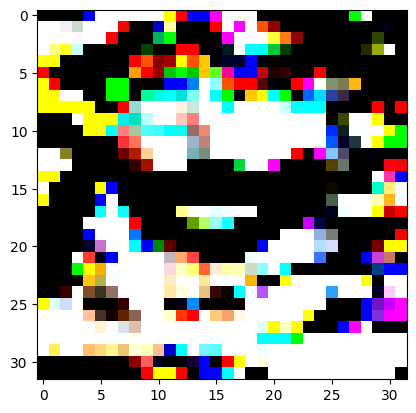

In [ ]:
grad.shape
plt.imshow(grad_d[65].transpose(1,2,0))
print(grad_d)

In [ ]:
special_cnn_5000=cpecial_CNN_5000()
total_params = sum(p.numel() for p in special_cnn_5000.parameters())
print(f"Всего параметров: {total_params}")
special_cnn_5000.to('cuda')

Всего параметров: 4996


RuntimeError: Found no NVIDIA driver on your system. Please check that you have an NVIDIA GPU and installed a driver from http://www.nvidia.com/Download/index.aspx

In [ ]:
criterion=nn.CrossEntropyLoss()
optimizer=optim.Adam(special_cnn_5000.parameters(),lr=0.001)
my_model=train_model(special_cnn_5000,
    train_x_img,
    train_labels,
    test_x_img,
    test_labels,
    criterion,
    optimizer,
    num_epochs=200,
    device='cuda')

Validating: 100%|██████████| 625/625 [00:01<00:00, 341.06it/s, acc=8.35, loss=2.84e+3]


Epoch 1: Train Loss: 4.5736, Train Acc: 5.12% | Val Loss: 4.5448, Val Acc: 8.35%


Validating: 100%|██████████| 625/625 [00:01<00:00, 337.95it/s, acc=11.4, loss=2.82e+3]


Epoch 2: Train Loss: 4.5333, Train Acc: 9.53% | Val Loss: 4.5166, Val Acc: 11.38%


Validating: 100%|██████████| 625/625 [00:03<00:00, 192.87it/s, acc=12.4, loss=2.81e+3]


Epoch 3: Train Loss: 4.5133, Train Acc: 11.55% | Val Loss: 4.5028, Val Acc: 12.42%


Validating: 100%|██████████| 625/625 [00:01<00:00, 329.38it/s, acc=13.7, loss=2.81e+3]


Epoch 4: Train Loss: 4.5001, Train Acc: 12.77% | Val Loss: 4.4917, Val Acc: 13.72%


Validating: 100%|██████████| 625/625 [00:01<00:00, 337.23it/s, acc=14.1, loss=2.8e+3]


Epoch 5: Train Loss: 4.4921, Train Acc: 13.52% | Val Loss: 4.4849, Val Acc: 14.09%


Validating: 100%|██████████| 625/625 [00:02<00:00, 296.61it/s, acc=14.4, loss=2.8e+3]


Epoch 6: Train Loss: 4.4854, Train Acc: 14.21% | Val Loss: 4.4819, Val Acc: 14.45%


Validating: 100%|██████████| 625/625 [00:03<00:00, 179.60it/s, acc=15.3, loss=2.8e+3]


Epoch 7: Train Loss: 4.4798, Train Acc: 14.68% | Val Loss: 4.4745, Val Acc: 15.26%


Validating: 100%|██████████| 625/625 [00:01<00:00, 328.15it/s, acc=15.1, loss=2.8e+3]


Epoch 8: Train Loss: 4.4756, Train Acc: 15.10% | Val Loss: 4.4749, Val Acc: 15.13%


Validating: 100%|██████████| 625/625 [00:01<00:00, 336.38it/s, acc=15.6, loss=2.79e+3]


Epoch 9: Train Loss: 4.4726, Train Acc: 15.38% | Val Loss: 4.4702, Val Acc: 15.58%


Validating: 100%|██████████| 625/625 [00:01<00:00, 337.48it/s, acc=15.7, loss=2.79e+3]


Epoch 10: Train Loss: 4.4677, Train Acc: 15.84% | Val Loss: 4.4676, Val Acc: 15.69%


Validating: 100%|██████████| 625/625 [00:01<00:00, 318.01it/s, acc=16.3, loss=2.79e+3]


Epoch 11: Train Loss: 4.4659, Train Acc: 16.04% | Val Loss: 4.4636, Val Acc: 16.28%


Validating: 100%|██████████| 625/625 [00:01<00:00, 319.20it/s, acc=15.8, loss=2.79e+3]


Epoch 12: Train Loss: 4.4614, Train Acc: 16.46% | Val Loss: 4.4664, Val Acc: 15.82%


Validating: 100%|██████████| 625/625 [00:01<00:00, 335.24it/s, acc=16.9, loss=2.79e+3]


Epoch 13: Train Loss: 4.4594, Train Acc: 16.62% | Val Loss: 4.4560, Val Acc: 16.86%


Validating: 100%|██████████| 625/625 [00:01<00:00, 325.48it/s, acc=17, loss=2.78e+3]


Epoch 14: Train Loss: 4.4565, Train Acc: 16.82% | Val Loss: 4.4560, Val Acc: 17.01%


Validating: 100%|██████████| 625/625 [00:02<00:00, 305.00it/s, acc=16.4, loss=2.79e+3]


Epoch 15: Train Loss: 4.4541, Train Acc: 17.13% | Val Loss: 4.4602, Val Acc: 16.36%


Validating: 100%|██████████| 625/625 [00:01<00:00, 338.08it/s, acc=17.1, loss=2.78e+3]


Epoch 16: Train Loss: 4.4549, Train Acc: 17.00% | Val Loss: 4.4538, Val Acc: 17.07%


Validating: 100%|██████████| 625/625 [00:01<00:00, 330.80it/s, acc=17, loss=2.78e+3]


Epoch 17: Train Loss: 4.4511, Train Acc: 17.40% | Val Loss: 4.4537, Val Acc: 16.97%


Validating: 100%|██████████| 625/625 [00:02<00:00, 303.22it/s, acc=17.4, loss=2.78e+3]


Epoch 18: Train Loss: 4.4495, Train Acc: 17.55% | Val Loss: 4.4517, Val Acc: 17.35%


Validating: 100%|██████████| 625/625 [00:01<00:00, 330.43it/s, acc=17.3, loss=2.78e+3]


Epoch 19: Train Loss: 4.4484, Train Acc: 17.64% | Val Loss: 4.4521, Val Acc: 17.26%


Validating: 100%|██████████| 625/625 [00:01<00:00, 325.17it/s, acc=17.4, loss=2.78e+3]


Epoch 20: Train Loss: 4.4463, Train Acc: 17.82% | Val Loss: 4.4496, Val Acc: 17.42%


Validating: 100%|██████████| 625/625 [00:02<00:00, 286.50it/s, acc=17.3, loss=2.78e+3]


Epoch 21: Train Loss: 4.4458, Train Acc: 17.87% | Val Loss: 4.4517, Val Acc: 17.26%


Validating: 100%|██████████| 625/625 [00:01<00:00, 320.11it/s, acc=16.9, loss=2.78e+3]


Epoch 22: Train Loss: 4.4429, Train Acc: 18.19% | Val Loss: 4.4550, Val Acc: 16.86%


Validating: 100%|██████████| 625/625 [00:01<00:00, 328.26it/s, acc=17.9, loss=2.78e+3]


Epoch 23: Train Loss: 4.4413, Train Acc: 18.26% | Val Loss: 4.4462, Val Acc: 17.85%


Validating: 100%|██████████| 625/625 [00:02<00:00, 289.00it/s, acc=18, loss=2.78e+3]


Epoch 24: Train Loss: 4.4414, Train Acc: 18.27% | Val Loss: 4.4444, Val Acc: 17.97%


Validating: 100%|██████████| 625/625 [00:01<00:00, 329.53it/s, acc=18.2, loss=2.78e+3]


Epoch 25: Train Loss: 4.4393, Train Acc: 18.50% | Val Loss: 4.4428, Val Acc: 18.17%


Validating: 100%|██████████| 625/625 [00:01<00:00, 321.68it/s, acc=18.1, loss=2.78e+3]


Epoch 26: Train Loss: 4.4387, Train Acc: 18.56% | Val Loss: 4.4432, Val Acc: 18.11%


Validating: 100%|██████████| 625/625 [00:02<00:00, 275.31it/s, acc=17.9, loss=2.78e+3]


Epoch 27: Train Loss: 4.4385, Train Acc: 18.56% | Val Loss: 4.4449, Val Acc: 17.87%


Validating: 100%|██████████| 625/625 [00:01<00:00, 332.83it/s, acc=18.3, loss=2.78e+3]


Epoch 28: Train Loss: 4.4365, Train Acc: 18.76% | Val Loss: 4.4419, Val Acc: 18.30%


Validating: 100%|██████████| 625/625 [00:01<00:00, 331.79it/s, acc=18.2, loss=2.78e+3]


Epoch 29: Train Loss: 4.4359, Train Acc: 18.85% | Val Loss: 4.4409, Val Acc: 18.19%


Validating: 100%|██████████| 625/625 [00:02<00:00, 281.75it/s, acc=17.4, loss=2.78e+3]


Epoch 30: Train Loss: 4.4354, Train Acc: 18.83% | Val Loss: 4.4486, Val Acc: 17.41%


Validating: 100%|██████████| 625/625 [00:01<00:00, 323.37it/s, acc=18.4, loss=2.77e+3]


Epoch 31: Train Loss: 4.4348, Train Acc: 18.96% | Val Loss: 4.4399, Val Acc: 18.40%


Validating: 100%|██████████| 625/625 [00:01<00:00, 319.16it/s, acc=18.1, loss=2.78e+3]


Epoch 32: Train Loss: 4.4344, Train Acc: 18.89% | Val Loss: 4.4418, Val Acc: 18.11%


Validating: 100%|██████████| 625/625 [00:02<00:00, 292.62it/s, acc=18.2, loss=2.78e+3]


Epoch 33: Train Loss: 4.4323, Train Acc: 19.16% | Val Loss: 4.4414, Val Acc: 18.22%


Validating: 100%|██████████| 625/625 [00:01<00:00, 326.11it/s, acc=18.6, loss=2.77e+3]


Epoch 34: Train Loss: 4.4317, Train Acc: 19.20% | Val Loss: 4.4363, Val Acc: 18.64%


Validating: 100%|██████████| 625/625 [00:01<00:00, 323.83it/s, acc=18.3, loss=2.77e+3]


Epoch 35: Train Loss: 4.4313, Train Acc: 19.32% | Val Loss: 4.4393, Val Acc: 18.34%


Validating: 100%|██████████| 625/625 [00:01<00:00, 325.91it/s, acc=18.5, loss=2.77e+3]


Epoch 36: Train Loss: 4.4315, Train Acc: 19.20% | Val Loss: 4.4374, Val Acc: 18.54%


Validating: 100%|██████████| 625/625 [00:02<00:00, 308.28it/s, acc=18.8, loss=2.77e+3]


Epoch 37: Train Loss: 4.4291, Train Acc: 19.42% | Val Loss: 4.4363, Val Acc: 18.78%


Validating: 100%|██████████| 625/625 [00:01<00:00, 314.77it/s, acc=18.8, loss=2.77e+3]


Epoch 38: Train Loss: 4.4298, Train Acc: 19.38% | Val Loss: 4.4359, Val Acc: 18.83%


Validating: 100%|██████████| 625/625 [00:01<00:00, 323.26it/s, acc=19, loss=2.77e+3]


Epoch 39: Train Loss: 4.4297, Train Acc: 19.38% | Val Loss: 4.4338, Val Acc: 18.99%


Validating: 100%|██████████| 625/625 [00:02<00:00, 305.06it/s, acc=18.6, loss=2.77e+3]


Epoch 40: Train Loss: 4.4283, Train Acc: 19.54% | Val Loss: 4.4366, Val Acc: 18.63%


Validating: 100%|██████████| 625/625 [00:01<00:00, 319.87it/s, acc=18.6, loss=2.77e+3]


Epoch 41: Train Loss: 4.4276, Train Acc: 19.56% | Val Loss: 4.4368, Val Acc: 18.62%


Validating: 100%|██████████| 625/625 [00:01<00:00, 318.68it/s, acc=18.7, loss=2.77e+3]


Epoch 42: Train Loss: 4.4278, Train Acc: 19.55% | Val Loss: 4.4364, Val Acc: 18.67%


Validating: 100%|██████████| 625/625 [00:02<00:00, 287.99it/s, acc=18.9, loss=2.77e+3]


Epoch 43: Train Loss: 4.4267, Train Acc: 19.71% | Val Loss: 4.4329, Val Acc: 18.93%


Validating: 100%|██████████| 625/625 [00:01<00:00, 328.53it/s, acc=18.3, loss=2.77e+3]


Epoch 44: Train Loss: 4.4261, Train Acc: 19.72% | Val Loss: 4.4399, Val Acc: 18.27%


Validating: 100%|██████████| 625/625 [00:01<00:00, 320.26it/s, acc=18.7, loss=2.77e+3]


Epoch 45: Train Loss: 4.4259, Train Acc: 19.74% | Val Loss: 4.4354, Val Acc: 18.69%


Validating: 100%|██████████| 625/625 [00:01<00:00, 315.18it/s, acc=19.1, loss=2.77e+3]


Epoch 46: Train Loss: 4.4252, Train Acc: 19.87% | Val Loss: 4.4321, Val Acc: 19.14%


Validating: 100%|██████████| 625/625 [00:02<00:00, 295.69it/s, acc=19, loss=2.77e+3]


Epoch 47: Train Loss: 4.4241, Train Acc: 19.97% | Val Loss: 4.4333, Val Acc: 19.02%


Validating: 100%|██████████| 625/625 [00:01<00:00, 314.93it/s, acc=19, loss=2.77e+3]


Epoch 48: Train Loss: 4.4242, Train Acc: 20.00% | Val Loss: 4.4339, Val Acc: 19.00%


Validating: 100%|██████████| 625/625 [00:02<00:00, 312.33it/s, acc=19.3, loss=2.77e+3]


Epoch 49: Train Loss: 4.4258, Train Acc: 19.78% | Val Loss: 4.4318, Val Acc: 19.32%


Validating: 100%|██████████| 625/625 [00:02<00:00, 303.84it/s, acc=18.8, loss=2.77e+3]


Epoch 50: Train Loss: 4.4230, Train Acc: 20.07% | Val Loss: 4.4355, Val Acc: 18.83%


Validating: 100%|██████████| 625/625 [00:01<00:00, 315.51it/s, acc=19.2, loss=2.77e+3]


Epoch 51: Train Loss: 4.4219, Train Acc: 20.19% | Val Loss: 4.4307, Val Acc: 19.19%


Validating: 100%|██████████| 625/625 [00:01<00:00, 317.47it/s, acc=19.2, loss=2.77e+3]


Epoch 52: Train Loss: 4.4229, Train Acc: 20.06% | Val Loss: 4.4321, Val Acc: 19.18%


Validating: 100%|██████████| 625/625 [00:02<00:00, 306.06it/s, acc=19.1, loss=2.77e+3]


Epoch 53: Train Loss: 4.4224, Train Acc: 20.10% | Val Loss: 4.4338, Val Acc: 19.05%


Validating: 100%|██████████| 625/625 [00:02<00:00, 309.53it/s, acc=19.3, loss=2.77e+3]


Epoch 54: Train Loss: 4.4219, Train Acc: 20.19% | Val Loss: 4.4303, Val Acc: 19.28%


Validating: 100%|██████████| 625/625 [00:01<00:00, 313.39it/s, acc=19.2, loss=2.77e+3]


Epoch 55: Train Loss: 4.4220, Train Acc: 20.08% | Val Loss: 4.4294, Val Acc: 19.23%


Validating: 100%|██████████| 625/625 [00:02<00:00, 311.22it/s, acc=19.4, loss=2.77e+3]


Epoch 56: Train Loss: 4.4206, Train Acc: 20.31% | Val Loss: 4.4290, Val Acc: 19.36%


Validating: 100%|██████████| 625/625 [00:02<00:00, 306.70it/s, acc=19.2, loss=2.77e+3]


Epoch 57: Train Loss: 4.4205, Train Acc: 20.28% | Val Loss: 4.4298, Val Acc: 19.25%


Validating: 100%|██████████| 625/625 [00:01<00:00, 315.24it/s, acc=19, loss=2.77e+3]


Epoch 58: Train Loss: 4.4206, Train Acc: 20.27% | Val Loss: 4.4318, Val Acc: 19.02%


Validating: 100%|██████████| 625/625 [00:02<00:00, 310.67it/s, acc=19.7, loss=2.77e+3]


Epoch 59: Train Loss: 4.4182, Train Acc: 20.50% | Val Loss: 4.4265, Val Acc: 19.67%


Validating: 100%|██████████| 625/625 [00:02<00:00, 298.60it/s, acc=18.9, loss=2.77e+3]


Epoch 60: Train Loss: 4.4194, Train Acc: 20.39% | Val Loss: 4.4337, Val Acc: 18.94%


Validating: 100%|██████████| 625/625 [00:01<00:00, 317.60it/s, acc=19.5, loss=2.77e+3]


Epoch 61: Train Loss: 4.4194, Train Acc: 20.35% | Val Loss: 4.4268, Val Acc: 19.53%


Validating: 100%|██████████| 625/625 [00:01<00:00, 314.16it/s, acc=19.6, loss=2.77e+3]


Epoch 62: Train Loss: 4.4183, Train Acc: 20.52% | Val Loss: 4.4271, Val Acc: 19.55%


Validating: 100%|██████████| 625/625 [00:01<00:00, 314.96it/s, acc=19.4, loss=2.77e+3]


Epoch 63: Train Loss: 4.4179, Train Acc: 20.49% | Val Loss: 4.4278, Val Acc: 19.36%


Validating: 100%|██████████| 625/625 [00:02<00:00, 296.45it/s, acc=19.3, loss=2.77e+3]


Epoch 64: Train Loss: 4.4184, Train Acc: 20.46% | Val Loss: 4.4292, Val Acc: 19.29%


Validating: 100%|██████████| 625/625 [00:02<00:00, 310.03it/s, acc=19.9, loss=2.76e+3]


Epoch 65: Train Loss: 4.4170, Train Acc: 20.58% | Val Loss: 4.4234, Val Acc: 19.86%


Validating: 100%|██████████| 625/625 [00:02<00:00, 309.11it/s, acc=19.4, loss=2.77e+3]


Epoch 66: Train Loss: 4.4172, Train Acc: 20.56% | Val Loss: 4.4287, Val Acc: 19.37%


Validating: 100%|██████████| 625/625 [00:01<00:00, 318.32it/s, acc=19.6, loss=2.77e+3]


Epoch 67: Train Loss: 4.4181, Train Acc: 20.57% | Val Loss: 4.4271, Val Acc: 19.60%


Validating: 100%|██████████| 625/625 [00:02<00:00, 311.77it/s, acc=19.9, loss=2.76e+3]


Epoch 68: Train Loss: 4.4164, Train Acc: 20.71% | Val Loss: 4.4231, Val Acc: 19.94%


Validating: 100%|██████████| 625/625 [00:02<00:00, 308.99it/s, acc=19.7, loss=2.77e+3]


Epoch 69: Train Loss: 4.4154, Train Acc: 20.74% | Val Loss: 4.4247, Val Acc: 19.68%


Validating: 100%|██████████| 625/625 [00:02<00:00, 291.51it/s, acc=19.8, loss=2.77e+3]


Epoch 70: Train Loss: 4.4147, Train Acc: 20.91% | Val Loss: 4.4243, Val Acc: 19.84%


Validating: 100%|██████████| 625/625 [00:02<00:00, 305.23it/s, acc=19.9, loss=2.76e+3]


Epoch 71: Train Loss: 4.4159, Train Acc: 20.74% | Val Loss: 4.4236, Val Acc: 19.95%


Validating: 100%|██████████| 625/625 [00:02<00:00, 310.31it/s, acc=19.6, loss=2.77e+3]


Epoch 72: Train Loss: 4.4164, Train Acc: 20.65% | Val Loss: 4.4258, Val Acc: 19.65%


Validating: 100%|██████████| 625/625 [00:02<00:00, 306.77it/s, acc=19.4, loss=2.77e+3]


Epoch 73: Train Loss: 4.4137, Train Acc: 20.93% | Val Loss: 4.4279, Val Acc: 19.43%


Validating: 100%|██████████| 625/625 [00:02<00:00, 294.29it/s, acc=20, loss=2.76e+3]


Epoch 74: Train Loss: 4.4146, Train Acc: 20.79% | Val Loss: 4.4231, Val Acc: 19.96%


Validating: 100%|██████████| 625/625 [00:02<00:00, 310.77it/s, acc=19.7, loss=2.77e+3]


Epoch 75: Train Loss: 4.4149, Train Acc: 20.80% | Val Loss: 4.4264, Val Acc: 19.67%


Validating: 100%|██████████| 625/625 [00:01<00:00, 313.72it/s, acc=19.4, loss=2.77e+3]


Epoch 76: Train Loss: 4.4140, Train Acc: 20.95% | Val Loss: 4.4279, Val Acc: 19.43%


Validating: 100%|██████████| 625/625 [00:01<00:00, 315.08it/s, acc=20.1, loss=2.76e+3]


Epoch 77: Train Loss: 4.4144, Train Acc: 20.75% | Val Loss: 4.4222, Val Acc: 20.11%


Validating: 100%|██████████| 625/625 [00:02<00:00, 309.38it/s, acc=20, loss=2.76e+3]


Epoch 78: Train Loss: 4.4138, Train Acc: 20.93% | Val Loss: 4.4225, Val Acc: 20.00%


Validating: 100%|██████████| 625/625 [00:02<00:00, 311.45it/s, acc=19.8, loss=2.77e+3]


Epoch 79: Train Loss: 4.4146, Train Acc: 20.77% | Val Loss: 4.4258, Val Acc: 19.75%


Validating: 100%|██████████| 625/625 [00:02<00:00, 294.23it/s, acc=20, loss=2.76e+3]


Epoch 80: Train Loss: 4.4138, Train Acc: 20.91% | Val Loss: 4.4220, Val Acc: 20.04%


Validating: 100%|██████████| 625/625 [00:02<00:00, 310.35it/s, acc=19.9, loss=2.76e+3]


Epoch 81: Train Loss: 4.4138, Train Acc: 20.98% | Val Loss: 4.4234, Val Acc: 19.87%


Validating: 100%|██████████| 625/625 [00:02<00:00, 309.88it/s, acc=19.8, loss=2.77e+3]


Epoch 82: Train Loss: 4.4116, Train Acc: 21.13% | Val Loss: 4.4248, Val Acc: 19.78%


Validating: 100%|██████████| 625/625 [00:02<00:00, 287.65it/s, acc=20.1, loss=2.76e+3]


Epoch 83: Train Loss: 4.4107, Train Acc: 21.26% | Val Loss: 4.4219, Val Acc: 20.13%


Validating: 100%|██████████| 625/625 [00:02<00:00, 299.43it/s, acc=19.9, loss=2.76e+3]


Epoch 84: Train Loss: 4.4124, Train Acc: 21.10% | Val Loss: 4.4236, Val Acc: 19.93%


Validating: 100%|██████████| 625/625 [00:02<00:00, 305.23it/s, acc=20.2, loss=2.76e+3]


Epoch 85: Train Loss: 4.4107, Train Acc: 21.19% | Val Loss: 4.4211, Val Acc: 20.17%


Validating: 100%|██████████| 625/625 [00:02<00:00, 300.69it/s, acc=20, loss=2.76e+3]


Epoch 86: Train Loss: 4.4107, Train Acc: 21.21% | Val Loss: 4.4232, Val Acc: 19.97%


Validating: 100%|██████████| 625/625 [00:01<00:00, 316.61it/s, acc=20.1, loss=2.76e+3]


Epoch 87: Train Loss: 4.4111, Train Acc: 21.23% | Val Loss: 4.4223, Val Acc: 20.06%


Validating: 100%|██████████| 625/625 [00:02<00:00, 303.24it/s, acc=20.2, loss=2.76e+3]


Epoch 88: Train Loss: 4.4100, Train Acc: 21.32% | Val Loss: 4.4206, Val Acc: 20.17%


Validating: 100%|██████████| 625/625 [00:02<00:00, 302.24it/s, acc=20, loss=2.76e+3]


Epoch 89: Train Loss: 4.4104, Train Acc: 21.22% | Val Loss: 4.4235, Val Acc: 20.00%


Validating: 100%|██████████| 625/625 [00:02<00:00, 284.90it/s, acc=20.2, loss=2.76e+3]


Epoch 90: Train Loss: 4.4094, Train Acc: 21.41% | Val Loss: 4.4209, Val Acc: 20.23%


Validating: 100%|██████████| 625/625 [00:02<00:00, 298.41it/s, acc=20.2, loss=2.76e+3]


Epoch 91: Train Loss: 4.4103, Train Acc: 21.24% | Val Loss: 4.4212, Val Acc: 20.20%


Validating: 100%|██████████| 625/625 [00:02<00:00, 298.83it/s, acc=20.2, loss=2.76e+3]


Epoch 92: Train Loss: 4.4100, Train Acc: 21.29% | Val Loss: 4.4210, Val Acc: 20.19%


Validating: 100%|██████████| 625/625 [00:02<00:00, 299.87it/s, acc=20.3, loss=2.76e+3]


Epoch 93: Train Loss: 4.4095, Train Acc: 21.32% | Val Loss: 4.4198, Val Acc: 20.28%


Validating: 100%|██████████| 625/625 [00:02<00:00, 292.62it/s, acc=20.4, loss=2.76e+3]


Epoch 94: Train Loss: 4.4098, Train Acc: 21.33% | Val Loss: 4.4194, Val Acc: 20.37%


Validating: 100%|██████████| 625/625 [00:02<00:00, 296.40it/s, acc=20.1, loss=2.76e+3]


Epoch 95: Train Loss: 4.4097, Train Acc: 21.27% | Val Loss: 4.4217, Val Acc: 20.14%


Validating: 100%|██████████| 625/625 [00:02<00:00, 308.75it/s, acc=19.9, loss=2.77e+3]


Epoch 96: Train Loss: 4.4096, Train Acc: 21.32% | Val Loss: 4.4250, Val Acc: 19.86%


Validating: 100%|██████████| 625/625 [00:02<00:00, 295.54it/s, acc=20, loss=2.76e+3]


Epoch 97: Train Loss: 4.4094, Train Acc: 21.31% | Val Loss: 4.4222, Val Acc: 20.00%


Validating: 100%|██████████| 625/625 [00:02<00:00, 290.25it/s, acc=20.1, loss=2.76e+3]


Epoch 98: Train Loss: 4.4071, Train Acc: 21.58% | Val Loss: 4.4211, Val Acc: 20.14%


Validating: 100%|██████████| 625/625 [00:02<00:00, 300.39it/s, acc=20.4, loss=2.76e+3]


Epoch 99: Train Loss: 4.4082, Train Acc: 21.47% | Val Loss: 4.4180, Val Acc: 20.44%


Validating: 100%|██████████| 625/625 [00:02<00:00, 301.73it/s, acc=20.4, loss=2.76e+3]


Epoch 100: Train Loss: 4.4084, Train Acc: 21.47% | Val Loss: 4.4184, Val Acc: 20.43%


Validating: 100%|██████████| 625/625 [00:02<00:00, 306.37it/s, acc=20.1, loss=2.76e+3]


Epoch 101: Train Loss: 4.4077, Train Acc: 21.52% | Val Loss: 4.4219, Val Acc: 20.14%


Validating: 100%|██████████| 625/625 [00:02<00:00, 303.74it/s, acc=20, loss=2.76e+3]


Epoch 102: Train Loss: 4.4078, Train Acc: 21.48% | Val Loss: 4.4224, Val Acc: 20.03%


Validating: 100%|██████████| 625/625 [00:02<00:00, 298.11it/s, acc=20.3, loss=2.76e+3]


Epoch 103: Train Loss: 4.4081, Train Acc: 21.47% | Val Loss: 4.4187, Val Acc: 20.33%


Validating: 100%|██████████| 625/625 [00:02<00:00, 295.19it/s, acc=20.2, loss=2.76e+3]


Epoch 104: Train Loss: 4.4076, Train Acc: 21.48% | Val Loss: 4.4203, Val Acc: 20.25%


Validating: 100%|██████████| 625/625 [00:02<00:00, 284.12it/s, acc=20.1, loss=2.76e+3]


Epoch 105: Train Loss: 4.4070, Train Acc: 21.59% | Val Loss: 4.4222, Val Acc: 20.05%


Validating: 100%|██████████| 625/625 [00:02<00:00, 296.70it/s, acc=20.4, loss=2.76e+3]


Epoch 106: Train Loss: 4.4072, Train Acc: 21.51% | Val Loss: 4.4186, Val Acc: 20.35%


Validating: 100%|██████████| 625/625 [00:02<00:00, 294.22it/s, acc=20.1, loss=2.76e+3]


Epoch 107: Train Loss: 4.4067, Train Acc: 21.62% | Val Loss: 4.4218, Val Acc: 20.12%


Validating: 100%|██████████| 625/625 [00:02<00:00, 284.99it/s, acc=20.5, loss=2.76e+3]


Epoch 108: Train Loss: 4.4064, Train Acc: 21.64% | Val Loss: 4.4181, Val Acc: 20.47%


Validating: 100%|██████████| 625/625 [00:02<00:00, 300.02it/s, acc=20.2, loss=2.76e+3]


Epoch 109: Train Loss: 4.4052, Train Acc: 21.77% | Val Loss: 4.4198, Val Acc: 20.23%


Validating: 100%|██████████| 625/625 [00:02<00:00, 299.91it/s, acc=20, loss=2.76e+3]


Epoch 110: Train Loss: 4.4053, Train Acc: 21.77% | Val Loss: 4.4218, Val Acc: 20.04%


Validating: 100%|██████████| 625/625 [00:02<00:00, 281.95it/s, acc=20.4, loss=2.76e+3]


Epoch 111: Train Loss: 4.4058, Train Acc: 21.71% | Val Loss: 4.4194, Val Acc: 20.35%


Validating: 100%|██████████| 625/625 [00:02<00:00, 298.98it/s, acc=20.1, loss=2.76e+3]


Epoch 112: Train Loss: 4.4047, Train Acc: 21.85% | Val Loss: 4.4206, Val Acc: 20.14%


Validating: 100%|██████████| 625/625 [00:02<00:00, 295.60it/s, acc=20.5, loss=2.76e+3]


Epoch 113: Train Loss: 4.4047, Train Acc: 21.82% | Val Loss: 4.4177, Val Acc: 20.53%


Validating: 100%|██████████| 625/625 [00:02<00:00, 285.47it/s, acc=20.2, loss=2.76e+3]


Epoch 114: Train Loss: 4.4053, Train Acc: 21.79% | Val Loss: 4.4206, Val Acc: 20.17%


Validating: 100%|██████████| 625/625 [00:02<00:00, 295.19it/s, acc=20.3, loss=2.76e+3]


Epoch 115: Train Loss: 4.4046, Train Acc: 21.86% | Val Loss: 4.4195, Val Acc: 20.30%


Validating: 100%|██████████| 625/625 [00:02<00:00, 300.46it/s, acc=19.9, loss=2.76e+3]


Epoch 116: Train Loss: 4.4047, Train Acc: 21.83% | Val Loss: 4.4223, Val Acc: 19.93%


Validating: 100%|██████████| 625/625 [00:02<00:00, 299.46it/s, acc=20.3, loss=2.76e+3]


Epoch 117: Train Loss: 4.4029, Train Acc: 22.00% | Val Loss: 4.4197, Val Acc: 20.28%


Validating: 100%|██████████| 625/625 [00:02<00:00, 306.57it/s, acc=20.3, loss=2.76e+3]


Epoch 118: Train Loss: 4.4054, Train Acc: 21.68% | Val Loss: 4.4192, Val Acc: 20.30%


Validating: 100%|██████████| 625/625 [00:02<00:00, 304.79it/s, acc=19.9, loss=2.76e+3]


Epoch 119: Train Loss: 4.4036, Train Acc: 21.91% | Val Loss: 4.4219, Val Acc: 19.95%


Validating: 100%|██████████| 625/625 [00:02<00:00, 295.45it/s, acc=20.3, loss=2.76e+3]


Epoch 120: Train Loss: 4.4045, Train Acc: 21.81% | Val Loss: 4.4200, Val Acc: 20.26%


Validating: 100%|██████████| 625/625 [00:01<00:00, 320.43it/s, acc=20.4, loss=2.76e+3]


Epoch 121: Train Loss: 4.4059, Train Acc: 21.63% | Val Loss: 4.4180, Val Acc: 20.42%


Validating: 100%|██████████| 625/625 [00:02<00:00, 295.11it/s, acc=20.2, loss=2.76e+3]


Epoch 122: Train Loss: 4.4051, Train Acc: 21.73% | Val Loss: 4.4199, Val Acc: 20.17%


Validating: 100%|██████████| 625/625 [00:02<00:00, 294.33it/s, acc=20.4, loss=2.76e+3]


Epoch 123: Train Loss: 4.4038, Train Acc: 21.89% | Val Loss: 4.4179, Val Acc: 20.43%


Validating: 100%|██████████| 625/625 [00:02<00:00, 277.13it/s, acc=20.9, loss=2.76e+3]


Epoch 124: Train Loss: 4.4028, Train Acc: 22.00% | Val Loss: 4.4150, Val Acc: 20.85%


Validating: 100%|██████████| 625/625 [00:02<00:00, 282.47it/s, acc=20.2, loss=2.76e+3]


Epoch 125: Train Loss: 4.4028, Train Acc: 22.06% | Val Loss: 4.4197, Val Acc: 20.23%


Validating: 100%|██████████| 625/625 [00:02<00:00, 284.46it/s, acc=20.1, loss=2.76e+3]


Epoch 126: Train Loss: 4.4017, Train Acc: 22.11% | Val Loss: 4.4224, Val Acc: 20.07%


Validating: 100%|██████████| 625/625 [00:02<00:00, 292.77it/s, acc=20, loss=2.76e+3]


Epoch 127: Train Loss: 4.4045, Train Acc: 21.83% | Val Loss: 4.4222, Val Acc: 20.03%


Validating: 100%|██████████| 625/625 [00:02<00:00, 297.94it/s, acc=20.3, loss=2.76e+3]


Epoch 128: Train Loss: 4.4028, Train Acc: 22.01% | Val Loss: 4.4191, Val Acc: 20.33%


Validating: 100%|██████████| 625/625 [00:02<00:00, 291.36it/s, acc=20.4, loss=2.76e+3]


Epoch 129: Train Loss: 4.4026, Train Acc: 21.97% | Val Loss: 4.4184, Val Acc: 20.41%


Validating: 100%|██████████| 625/625 [00:02<00:00, 302.25it/s, acc=20.3, loss=2.76e+3]


Epoch 130: Train Loss: 4.4034, Train Acc: 21.92% | Val Loss: 4.4195, Val Acc: 20.27%


Validating: 100%|██████████| 625/625 [00:02<00:00, 311.85it/s, acc=20.4, loss=2.76e+3]


Epoch 131: Train Loss: 4.4031, Train Acc: 21.93% | Val Loss: 4.4192, Val Acc: 20.36%


Validating: 100%|██████████| 625/625 [00:02<00:00, 293.58it/s, acc=20.2, loss=2.76e+3]


Epoch 132: Train Loss: 4.4029, Train Acc: 22.00% | Val Loss: 4.4196, Val Acc: 20.25%


Validating: 100%|██████████| 625/625 [00:02<00:00, 289.85it/s, acc=20.6, loss=2.76e+3]


Epoch 133: Train Loss: 4.4025, Train Acc: 22.00% | Val Loss: 4.4161, Val Acc: 20.62%


Validating: 100%|██████████| 625/625 [00:02<00:00, 288.39it/s, acc=20.3, loss=2.76e+3]


Epoch 134: Train Loss: 4.4019, Train Acc: 22.07% | Val Loss: 4.4189, Val Acc: 20.32%


Validating: 100%|██████████| 625/625 [00:02<00:00, 300.72it/s, acc=20.2, loss=2.76e+3]


Epoch 135: Train Loss: 4.4017, Train Acc: 22.12% | Val Loss: 4.4192, Val Acc: 20.19%


Validating: 100%|██████████| 625/625 [00:02<00:00, 289.19it/s, acc=20.5, loss=2.76e+3]


Epoch 136: Train Loss: 4.4013, Train Acc: 22.17% | Val Loss: 4.4180, Val Acc: 20.46%


Validating: 100%|██████████| 625/625 [00:02<00:00, 276.18it/s, acc=20.1, loss=2.76e+3]


Epoch 137: Train Loss: 4.4006, Train Acc: 22.24% | Val Loss: 4.4213, Val Acc: 20.11%


Validating: 100%|██████████| 625/625 [00:02<00:00, 292.08it/s, acc=20.6, loss=2.76e+3]


Epoch 138: Train Loss: 4.4019, Train Acc: 22.07% | Val Loss: 4.4171, Val Acc: 20.65%


Validating: 100%|██████████| 625/625 [00:02<00:00, 294.79it/s, acc=20.3, loss=2.76e+3]


Epoch 139: Train Loss: 4.4015, Train Acc: 22.15% | Val Loss: 4.4199, Val Acc: 20.31%


Validating: 100%|██████████| 625/625 [00:02<00:00, 285.98it/s, acc=20.5, loss=2.76e+3]


Epoch 140: Train Loss: 4.4021, Train Acc: 22.09% | Val Loss: 4.4171, Val Acc: 20.50%


Validating: 100%|██████████| 625/625 [00:02<00:00, 297.59it/s, acc=20.6, loss=2.76e+3]


Epoch 141: Train Loss: 4.4015, Train Acc: 22.07% | Val Loss: 4.4172, Val Acc: 20.58%


Validating: 100%|██████████| 625/625 [00:02<00:00, 298.55it/s, acc=20.8, loss=2.76e+3]


Epoch 142: Train Loss: 4.4023, Train Acc: 21.98% | Val Loss: 4.4147, Val Acc: 20.80%


Validating: 100%|██████████| 625/625 [00:02<00:00, 298.23it/s, acc=20.4, loss=2.76e+3]


Epoch 143: Train Loss: 4.3996, Train Acc: 22.31% | Val Loss: 4.4181, Val Acc: 20.44%


Validating: 100%|██████████| 625/625 [00:02<00:00, 289.41it/s, acc=20.5, loss=2.76e+3]


Epoch 144: Train Loss: 4.3992, Train Acc: 22.37% | Val Loss: 4.4183, Val Acc: 20.48%


Validating: 100%|██████████| 625/625 [00:02<00:00, 281.04it/s, acc=20.3, loss=2.76e+3]


Epoch 145: Train Loss: 4.3999, Train Acc: 22.29% | Val Loss: 4.4184, Val Acc: 20.28%


Validating: 100%|██████████| 625/625 [00:02<00:00, 294.75it/s, acc=20.3, loss=2.76e+3]


Epoch 146: Train Loss: 4.3986, Train Acc: 22.48% | Val Loss: 4.4188, Val Acc: 20.34%


Validating: 100%|██████████| 625/625 [00:02<00:00, 287.70it/s, acc=20.3, loss=2.76e+3]


Epoch 147: Train Loss: 4.3999, Train Acc: 22.30% | Val Loss: 4.4188, Val Acc: 20.30%


Validating: 100%|██████████| 625/625 [00:02<00:00, 289.61it/s, acc=20.5, loss=2.76e+3]


Epoch 148: Train Loss: 4.4001, Train Acc: 22.26% | Val Loss: 4.4180, Val Acc: 20.49%


Validating: 100%|██████████| 625/625 [00:02<00:00, 292.87it/s, acc=20.5, loss=2.76e+3]


Epoch 149: Train Loss: 4.3998, Train Acc: 22.29% | Val Loss: 4.4175, Val Acc: 20.52%


Validating: 100%|██████████| 625/625 [00:02<00:00, 296.77it/s, acc=20.3, loss=2.76e+3]


Epoch 150: Train Loss: 4.4008, Train Acc: 22.23% | Val Loss: 4.4191, Val Acc: 20.26%


Validating: 100%|██████████| 625/625 [00:02<00:00, 297.05it/s, acc=20.7, loss=2.76e+3]


Epoch 151: Train Loss: 4.4001, Train Acc: 22.25% | Val Loss: 4.4155, Val Acc: 20.71%


Validating: 100%|██████████| 625/625 [00:02<00:00, 288.63it/s, acc=20.6, loss=2.76e+3]


Epoch 152: Train Loss: 4.4004, Train Acc: 22.21% | Val Loss: 4.4164, Val Acc: 20.58%


Validating: 100%|██████████| 625/625 [00:02<00:00, 291.03it/s, acc=20.9, loss=2.76e+3]


Epoch 153: Train Loss: 4.4005, Train Acc: 22.19% | Val Loss: 4.4125, Val Acc: 20.93%


Validating: 100%|██████████| 625/625 [00:02<00:00, 279.60it/s, acc=20.8, loss=2.76e+3]


Epoch 154: Train Loss: 4.3986, Train Acc: 22.40% | Val Loss: 4.4145, Val Acc: 20.80%


Validating: 100%|██████████| 625/625 [00:02<00:00, 280.82it/s, acc=20.3, loss=2.76e+3]


Epoch 155: Train Loss: 4.3985, Train Acc: 22.41% | Val Loss: 4.4192, Val Acc: 20.27%


Validating: 100%|██████████| 625/625 [00:02<00:00, 279.41it/s, acc=20.4, loss=2.76e+3]


Epoch 156: Train Loss: 4.3989, Train Acc: 22.39% | Val Loss: 4.4174, Val Acc: 20.45%


Validating: 100%|██████████| 625/625 [00:02<00:00, 285.71it/s, acc=20, loss=2.76e+3]


Epoch 157: Train Loss: 4.3989, Train Acc: 22.34% | Val Loss: 4.4224, Val Acc: 19.98%


Validating: 100%|██████████| 625/625 [00:02<00:00, 301.59it/s, acc=20.7, loss=2.76e+3]


Epoch 158: Train Loss: 4.3987, Train Acc: 22.38% | Val Loss: 4.4158, Val Acc: 20.69%


Validating: 100%|██████████| 625/625 [00:02<00:00, 291.03it/s, acc=20.3, loss=2.76e+3]


Epoch 159: Train Loss: 4.3999, Train Acc: 22.29% | Val Loss: 4.4185, Val Acc: 20.28%


Validating: 100%|██████████| 625/625 [00:02<00:00, 287.36it/s, acc=20.4, loss=2.76e+3]


Epoch 160: Train Loss: 4.3995, Train Acc: 22.33% | Val Loss: 4.4181, Val Acc: 20.45%


Validating: 100%|██████████| 625/625 [00:02<00:00, 296.21it/s, acc=20.5, loss=2.76e+3]


Epoch 161: Train Loss: 4.3990, Train Acc: 22.38% | Val Loss: 4.4172, Val Acc: 20.47%


Validating: 100%|██████████| 625/625 [00:02<00:00, 292.38it/s, acc=20.3, loss=2.76e+3]


Epoch 162: Train Loss: 4.3991, Train Acc: 22.38% | Val Loss: 4.4182, Val Acc: 20.34%


Validating: 100%|██████████| 625/625 [00:02<00:00, 284.13it/s, acc=20.4, loss=2.76e+3]


Epoch 163: Train Loss: 4.4000, Train Acc: 22.25% | Val Loss: 4.4179, Val Acc: 20.40%


Validating: 100%|██████████| 625/625 [00:02<00:00, 289.12it/s, acc=20.3, loss=2.76e+3]


Epoch 164: Train Loss: 4.3999, Train Acc: 22.27% | Val Loss: 4.4189, Val Acc: 20.27%


Validating: 100%|██████████| 625/625 [00:02<00:00, 286.81it/s, acc=20.5, loss=2.76e+3]


Epoch 165: Train Loss: 4.3983, Train Acc: 22.42% | Val Loss: 4.4176, Val Acc: 20.46%


Validating: 100%|██████████| 625/625 [00:02<00:00, 290.02it/s, acc=20.1, loss=2.76e+3]


Epoch 166: Train Loss: 4.3983, Train Acc: 22.46% | Val Loss: 4.4207, Val Acc: 20.15%


Validating: 100%|██████████| 625/625 [00:02<00:00, 289.52it/s, acc=20.3, loss=2.76e+3]


Epoch 167: Train Loss: 4.3984, Train Acc: 22.42% | Val Loss: 4.4195, Val Acc: 20.27%


Validating: 100%|██████████| 625/625 [00:02<00:00, 303.40it/s, acc=20.4, loss=2.76e+3]


Epoch 168: Train Loss: 4.3976, Train Acc: 22.46% | Val Loss: 4.4176, Val Acc: 20.43%


Validating: 100%|██████████| 625/625 [00:02<00:00, 293.85it/s, acc=20.2, loss=2.76e+3]


Epoch 169: Train Loss: 4.3982, Train Acc: 22.45% | Val Loss: 4.4199, Val Acc: 20.24%


Validating: 100%|██████████| 625/625 [00:02<00:00, 287.80it/s, acc=20.3, loss=2.76e+3]


Epoch 170: Train Loss: 4.3965, Train Acc: 22.61% | Val Loss: 4.4177, Val Acc: 20.33%


Validating: 100%|██████████| 625/625 [00:02<00:00, 282.44it/s, acc=20.3, loss=2.76e+3]


Epoch 171: Train Loss: 4.3990, Train Acc: 22.35% | Val Loss: 4.4184, Val Acc: 20.26%


Validating: 100%|██████████| 625/625 [00:02<00:00, 276.97it/s, acc=20.3, loss=2.76e+3]


Epoch 172: Train Loss: 4.3977, Train Acc: 22.47% | Val Loss: 4.4189, Val Acc: 20.33%


Validating: 100%|██████████| 625/625 [00:02<00:00, 290.07it/s, acc=20.1, loss=2.76e+3]


Epoch 173: Train Loss: 4.3982, Train Acc: 22.46% | Val Loss: 4.4208, Val Acc: 20.09%


Validating: 100%|██████████| 625/625 [00:02<00:00, 294.51it/s, acc=20.1, loss=2.76e+3]


Epoch 174: Train Loss: 4.3982, Train Acc: 22.38% | Val Loss: 4.4200, Val Acc: 20.15%


Validating: 100%|██████████| 625/625 [00:02<00:00, 291.40it/s, acc=20.3, loss=2.76e+3]


Epoch 175: Train Loss: 4.3990, Train Acc: 22.34% | Val Loss: 4.4191, Val Acc: 20.27%


Validating: 100%|██████████| 625/625 [00:02<00:00, 294.04it/s, acc=20.2, loss=2.76e+3]


Epoch 176: Train Loss: 4.3966, Train Acc: 22.60% | Val Loss: 4.4210, Val Acc: 20.16%


Validating: 100%|██████████| 625/625 [00:02<00:00, 286.38it/s, acc=20.1, loss=2.76e+3]


Epoch 177: Train Loss: 4.3976, Train Acc: 22.49% | Val Loss: 4.4207, Val Acc: 20.14%


Validating: 100%|██████████| 625/625 [00:02<00:00, 274.84it/s, acc=20.7, loss=2.76e+3]


Epoch 178: Train Loss: 4.3978, Train Acc: 22.44% | Val Loss: 4.4143, Val Acc: 20.69%


Validating: 100%|██████████| 625/625 [00:02<00:00, 285.56it/s, acc=20.9, loss=2.76e+3]


Epoch 179: Train Loss: 4.3961, Train Acc: 22.70% | Val Loss: 4.4135, Val Acc: 20.89%


Validating: 100%|██████████| 625/625 [00:02<00:00, 297.63it/s, acc=20.6, loss=2.76e+3]


Epoch 180: Train Loss: 4.3968, Train Acc: 22.56% | Val Loss: 4.4163, Val Acc: 20.55%


Validating: 100%|██████████| 625/625 [00:02<00:00, 300.24it/s, acc=20.5, loss=2.76e+3]


Epoch 181: Train Loss: 4.3971, Train Acc: 22.56% | Val Loss: 4.4169, Val Acc: 20.48%


Validating: 100%|██████████| 625/625 [00:02<00:00, 284.51it/s, acc=20.7, loss=2.76e+3]


Epoch 182: Train Loss: 4.3967, Train Acc: 22.61% | Val Loss: 4.4152, Val Acc: 20.70%


Validating: 100%|██████████| 625/625 [00:02<00:00, 294.84it/s, acc=20.6, loss=2.76e+3]


Epoch 183: Train Loss: 4.3961, Train Acc: 22.64% | Val Loss: 4.4171, Val Acc: 20.55%


Validating: 100%|██████████| 625/625 [00:02<00:00, 290.52it/s, acc=20.8, loss=2.76e+3]


Epoch 184: Train Loss: 4.3955, Train Acc: 22.68% | Val Loss: 4.4142, Val Acc: 20.75%


Validating: 100%|██████████| 625/625 [00:02<00:00, 296.50it/s, acc=20.5, loss=2.76e+3]


Epoch 185: Train Loss: 4.3956, Train Acc: 22.69% | Val Loss: 4.4175, Val Acc: 20.47%


Validating: 100%|██████████| 625/625 [00:02<00:00, 294.49it/s, acc=20.6, loss=2.76e+3]


Epoch 186: Train Loss: 4.3966, Train Acc: 22.58% | Val Loss: 4.4161, Val Acc: 20.58%


Validating: 100%|██████████| 625/625 [00:02<00:00, 301.56it/s, acc=20.7, loss=2.76e+3]


Epoch 187: Train Loss: 4.3962, Train Acc: 22.67% | Val Loss: 4.4167, Val Acc: 20.67%


Validating: 100%|██████████| 625/625 [00:02<00:00, 307.36it/s, acc=20.4, loss=2.76e+3]


Epoch 188: Train Loss: 4.3962, Train Acc: 22.63% | Val Loss: 4.4172, Val Acc: 20.42%


Validating: 100%|██████████| 625/625 [00:02<00:00, 286.66it/s, acc=20.5, loss=2.76e+3]


Epoch 189: Train Loss: 4.3978, Train Acc: 22.45% | Val Loss: 4.4178, Val Acc: 20.48%


Validating: 100%|██████████| 625/625 [00:02<00:00, 296.02it/s, acc=20.6, loss=2.76e+3]


Epoch 190: Train Loss: 4.3972, Train Acc: 22.50% | Val Loss: 4.4154, Val Acc: 20.64%


Validating: 100%|██████████| 625/625 [00:02<00:00, 292.15it/s, acc=20.2, loss=2.76e+3]


Epoch 191: Train Loss: 4.3957, Train Acc: 22.67% | Val Loss: 4.4209, Val Acc: 20.25%


Validating: 100%|██████████| 625/625 [00:02<00:00, 286.71it/s, acc=20.5, loss=2.76e+3]


Epoch 192: Train Loss: 4.3975, Train Acc: 22.50% | Val Loss: 4.4185, Val Acc: 20.46%


Validating: 100%|██████████| 625/625 [00:02<00:00, 291.22it/s, acc=20.5, loss=2.76e+3]


Epoch 193: Train Loss: 4.3958, Train Acc: 22.69% | Val Loss: 4.4163, Val Acc: 20.54%


Validating: 100%|██████████| 625/625 [00:02<00:00, 291.28it/s, acc=20.4, loss=2.76e+3]


Epoch 194: Train Loss: 4.3968, Train Acc: 22.57% | Val Loss: 4.4181, Val Acc: 20.40%


Validating: 100%|██████████| 625/625 [00:02<00:00, 303.02it/s, acc=20.9, loss=2.76e+3]


Epoch 195: Train Loss: 4.3968, Train Acc: 22.59% | Val Loss: 4.4139, Val Acc: 20.88%


Validating: 100%|██████████| 625/625 [00:02<00:00, 298.04it/s, acc=20.8, loss=2.76e+3]


Epoch 196: Train Loss: 4.3959, Train Acc: 22.64% | Val Loss: 4.4146, Val Acc: 20.82%


Validating: 100%|██████████| 625/625 [00:02<00:00, 303.87it/s, acc=20.7, loss=2.76e+3]


Epoch 197: Train Loss: 4.3966, Train Acc: 22.58% | Val Loss: 4.4147, Val Acc: 20.72%


Validating: 100%|██████████| 625/625 [00:02<00:00, 288.46it/s, acc=20.1, loss=2.76e+3]


Epoch 198: Train Loss: 4.3963, Train Acc: 22.63% | Val Loss: 4.4212, Val Acc: 20.13%


Validating: 100%|██████████| 625/625 [00:02<00:00, 295.45it/s, acc=20.8, loss=2.76e+3]


Epoch 199: Train Loss: 4.3974, Train Acc: 22.48% | Val Loss: 4.4139, Val Acc: 20.82%


Validating: 100%|██████████| 625/625 [00:02<00:00, 284.78it/s, acc=20.8, loss=2.76e+3]


Epoch 200: Train Loss: 4.3948, Train Acc: 22.78% | Val Loss: 4.4147, Val Acc: 20.79%
Training complete!


In [ ]:
from sklearn.metrics import accuracy_score
answ=special_cnn_5000(torch.tensor(test_x_img).float()).detach().numpy()
my_answ=np.argmax(answ,axis=1)
print('special_cnn_5000_accuracy=',accuracy_score(my_answ,test_labels))

NameError: name 'special_cnn_5000' is not defined

In [ ]:
X_train,label_train=create_4x_dataset(train_x_img,train_labels)

In [ ]:
print(label_train.shape)

(50000,)


In [ ]:
from sklearn.model_selection import train_test_split
X_train_1, X_test, y_train_1, y_test = train_test_split(X_train, label_train, test_size=0.25, random_state=42,shuffle=True)

In [ ]:
criterion=nn.CrossEntropyLoss()
model=cpecial_CNN_5000()
model.to('cuda')
optimizer=optim.Adam(model.parameters(),lr=0.001)
for i in range(8):
    X_train,label_train=create_4x_dataset(train_x_img,train_labels)
    model=train_model(model,
        X_train,
        label_train,
        test_x_img,
        test_labels,
        criterion,
        optimizer,
        num_epochs=100,
        device='cuda')

Validating: 100%|██████████| 625/625 [00:01<00:00, 320.66it/s, acc=6.37, loss=2.85e+3]


Epoch 1: Train Loss: 4.5826, Train Acc: 4.04% | Val Loss: 4.5608, Val Acc: 6.37%


Validating: 100%|██████████| 625/625 [00:02<00:00, 288.01it/s, acc=8.78, loss=2.84e+3]


Epoch 2: Train Loss: 4.5534, Train Acc: 7.35% | Val Loss: 4.5406, Val Acc: 8.78%


Validating: 100%|██████████| 625/625 [00:01<00:00, 331.57it/s, acc=9.62, loss=2.83e+3]


Epoch 3: Train Loss: 4.5372, Train Acc: 9.05% | Val Loss: 4.5311, Val Acc: 9.62%


Validating: 100%|██████████| 625/625 [00:01<00:00, 323.75it/s, acc=10.1, loss=2.83e+3]


Epoch 4: Train Loss: 4.5284, Train Acc: 9.76% | Val Loss: 4.5238, Val Acc: 10.06%


Validating: 100%|██████████| 625/625 [00:02<00:00, 304.94it/s, acc=10.8, loss=2.82e+3]


Epoch 5: Train Loss: 4.5218, Train Acc: 10.46% | Val Loss: 4.5197, Val Acc: 10.82%


Validating: 100%|██████████| 625/625 [00:01<00:00, 326.52it/s, acc=10.7, loss=2.82e+3]


Epoch 6: Train Loss: 4.5168, Train Acc: 10.98% | Val Loss: 4.5179, Val Acc: 10.72%


Validating: 100%|██████████| 625/625 [00:01<00:00, 322.29it/s, acc=11.3, loss=2.82e+3]


Epoch 7: Train Loss: 4.5128, Train Acc: 11.29% | Val Loss: 4.5119, Val Acc: 11.35%


Validating: 100%|██████████| 625/625 [00:01<00:00, 316.69it/s, acc=11.3, loss=2.82e+3]


Epoch 8: Train Loss: 4.5084, Train Acc: 11.72% | Val Loss: 4.5103, Val Acc: 11.30%


Validating: 100%|██████████| 625/625 [00:02<00:00, 278.22it/s, acc=11.1, loss=2.82e+3]


Epoch 9: Train Loss: 4.5056, Train Acc: 11.97% | Val Loss: 4.5114, Val Acc: 11.07%


Validating: 100%|██████████| 625/625 [00:01<00:00, 330.18it/s, acc=11.5, loss=2.82e+3]


Epoch 10: Train Loss: 4.5030, Train Acc: 12.21% | Val Loss: 4.5082, Val Acc: 11.54%


Validating: 100%|██████████| 625/625 [00:01<00:00, 314.47it/s, acc=12.2, loss=2.81e+3]


Epoch 11: Train Loss: 4.5008, Train Acc: 12.34% | Val Loss: 4.5021, Val Acc: 12.16%


Validating: 100%|██████████| 625/625 [00:01<00:00, 320.80it/s, acc=11.7, loss=2.82e+3]


Epoch 12: Train Loss: 4.4966, Train Acc: 12.90% | Val Loss: 4.5063, Val Acc: 11.73%


Validating: 100%|██████████| 625/625 [00:02<00:00, 265.72it/s, acc=12.5, loss=2.81e+3]


Epoch 13: Train Loss: 4.4957, Train Acc: 12.89% | Val Loss: 4.4997, Val Acc: 12.51%


Validating: 100%|██████████| 625/625 [00:01<00:00, 328.17it/s, acc=12.6, loss=2.81e+3]


Epoch 14: Train Loss: 4.4941, Train Acc: 13.12% | Val Loss: 4.4990, Val Acc: 12.57%


Validating: 100%|██████████| 625/625 [00:01<00:00, 319.45it/s, acc=12.1, loss=2.81e+3]


Epoch 15: Train Loss: 4.4918, Train Acc: 13.31% | Val Loss: 4.5003, Val Acc: 12.06%


Validating: 100%|██████████| 625/625 [00:01<00:00, 322.54it/s, acc=13, loss=2.81e+3]


Epoch 16: Train Loss: 4.4895, Train Acc: 13.50% | Val Loss: 4.4942, Val Acc: 12.98%


Validating: 100%|██████████| 625/625 [00:02<00:00, 274.05it/s, acc=12.4, loss=2.81e+3]


Epoch 17: Train Loss: 4.4872, Train Acc: 13.76% | Val Loss: 4.4986, Val Acc: 12.43%


Validating: 100%|██████████| 625/625 [00:01<00:00, 315.90it/s, acc=12.8, loss=2.81e+3]


Epoch 18: Train Loss: 4.4861, Train Acc: 13.85% | Val Loss: 4.4944, Val Acc: 12.85%


Validating: 100%|██████████| 625/625 [00:01<00:00, 313.21it/s, acc=12.6, loss=2.81e+3]


Epoch 19: Train Loss: 4.4852, Train Acc: 13.94% | Val Loss: 4.4976, Val Acc: 12.59%


Validating: 100%|██████████| 625/625 [00:02<00:00, 311.15it/s, acc=13, loss=2.81e+3]


Epoch 20: Train Loss: 4.4837, Train Acc: 14.09% | Val Loss: 4.4937, Val Acc: 12.98%


Validating: 100%|██████████| 625/625 [00:02<00:00, 267.67it/s, acc=12.9, loss=2.81e+3]


Epoch 21: Train Loss: 4.4817, Train Acc: 14.23% | Val Loss: 4.4927, Val Acc: 12.94%


Validating: 100%|██████████| 625/625 [00:02<00:00, 311.68it/s, acc=13.2, loss=2.81e+3]


Epoch 22: Train Loss: 4.4803, Train Acc: 14.39% | Val Loss: 4.4901, Val Acc: 13.19%


Validating: 100%|██████████| 625/625 [00:01<00:00, 319.49it/s, acc=13, loss=2.81e+3]


Epoch 23: Train Loss: 4.4799, Train Acc: 14.40% | Val Loss: 4.4927, Val Acc: 13.00%


Validating: 100%|██████████| 625/625 [00:01<00:00, 321.44it/s, acc=13.6, loss=2.8e+3]


Epoch 24: Train Loss: 4.4791, Train Acc: 14.49% | Val Loss: 4.4875, Val Acc: 13.59%


Validating: 100%|██████████| 625/625 [00:02<00:00, 284.95it/s, acc=13.6, loss=2.8e+3]


Epoch 25: Train Loss: 4.4773, Train Acc: 14.71% | Val Loss: 4.4858, Val Acc: 13.57%


Validating: 100%|██████████| 625/625 [00:01<00:00, 313.48it/s, acc=13.4, loss=2.81e+3]


Epoch 26: Train Loss: 4.4761, Train Acc: 14.81% | Val Loss: 4.4884, Val Acc: 13.38%


Validating: 100%|██████████| 625/625 [00:01<00:00, 319.61it/s, acc=13.6, loss=2.8e+3]


Epoch 27: Train Loss: 4.4758, Train Acc: 14.85% | Val Loss: 4.4868, Val Acc: 13.55%


Validating: 100%|██████████| 625/625 [00:02<00:00, 309.93it/s, acc=13.4, loss=2.81e+3]


Epoch 28: Train Loss: 4.4759, Train Acc: 14.72% | Val Loss: 4.4880, Val Acc: 13.43%


Validating: 100%|██████████| 625/625 [00:02<00:00, 279.68it/s, acc=13.7, loss=2.8e+3]


Epoch 29: Train Loss: 4.4741, Train Acc: 14.97% | Val Loss: 4.4851, Val Acc: 13.66%


Validating: 100%|██████████| 625/625 [00:02<00:00, 309.58it/s, acc=13.9, loss=2.8e+3]


Epoch 30: Train Loss: 4.4733, Train Acc: 14.99% | Val Loss: 4.4828, Val Acc: 13.90%


Validating: 100%|██████████| 625/625 [00:01<00:00, 313.14it/s, acc=14.2, loss=2.8e+3]


Epoch 31: Train Loss: 4.4719, Train Acc: 15.16% | Val Loss: 4.4812, Val Acc: 14.23%


Validating: 100%|██████████| 625/625 [00:01<00:00, 312.53it/s, acc=14, loss=2.8e+3]


Epoch 32: Train Loss: 4.4722, Train Acc: 15.15% | Val Loss: 4.4831, Val Acc: 13.97%


Validating: 100%|██████████| 625/625 [00:02<00:00, 279.40it/s, acc=13.8, loss=2.8e+3]


Epoch 33: Train Loss: 4.4721, Train Acc: 15.08% | Val Loss: 4.4840, Val Acc: 13.85%


Validating: 100%|██████████| 625/625 [00:02<00:00, 304.16it/s, acc=14, loss=2.8e+3]


Epoch 34: Train Loss: 4.4698, Train Acc: 15.33% | Val Loss: 4.4816, Val Acc: 14.02%


Validating: 100%|██████████| 625/625 [00:01<00:00, 319.72it/s, acc=13.9, loss=2.8e+3]


Epoch 35: Train Loss: 4.4689, Train Acc: 15.48% | Val Loss: 4.4827, Val Acc: 13.92%


Validating: 100%|██████████| 625/625 [00:02<00:00, 311.99it/s, acc=14.2, loss=2.8e+3]


Epoch 36: Train Loss: 4.4680, Train Acc: 15.53% | Val Loss: 4.4806, Val Acc: 14.17%


Validating: 100%|██████████| 625/625 [00:02<00:00, 283.87it/s, acc=14.2, loss=2.8e+3]


Epoch 37: Train Loss: 4.4689, Train Acc: 15.44% | Val Loss: 4.4799, Val Acc: 14.22%


Validating: 100%|██████████| 625/625 [00:02<00:00, 306.85it/s, acc=14, loss=2.8e+3]


Epoch 38: Train Loss: 4.4678, Train Acc: 15.61% | Val Loss: 4.4819, Val Acc: 13.97%


Validating: 100%|██████████| 625/625 [00:02<00:00, 306.59it/s, acc=13.6, loss=2.8e+3]


Epoch 39: Train Loss: 4.4672, Train Acc: 15.62% | Val Loss: 4.4862, Val Acc: 13.57%


Validating: 100%|██████████| 625/625 [00:02<00:00, 306.89it/s, acc=14, loss=2.8e+3]


Epoch 40: Train Loss: 4.4659, Train Acc: 15.71% | Val Loss: 4.4834, Val Acc: 14.00%


Validating: 100%|██████████| 625/625 [00:02<00:00, 265.97it/s, acc=14.6, loss=2.8e+3]


Epoch 41: Train Loss: 4.4658, Train Acc: 15.77% | Val Loss: 4.4774, Val Acc: 14.59%


Validating: 100%|██████████| 625/625 [00:02<00:00, 309.37it/s, acc=14.4, loss=2.8e+3]


Epoch 42: Train Loss: 4.4656, Train Acc: 15.79% | Val Loss: 4.4792, Val Acc: 14.39%


Validating: 100%|██████████| 625/625 [00:02<00:00, 308.07it/s, acc=14.4, loss=2.8e+3]


Epoch 43: Train Loss: 4.4644, Train Acc: 15.91% | Val Loss: 4.4800, Val Acc: 14.37%


Validating: 100%|██████████| 625/625 [00:02<00:00, 308.58it/s, acc=14.4, loss=2.8e+3]


Epoch 44: Train Loss: 4.4632, Train Acc: 16.01% | Val Loss: 4.4780, Val Acc: 14.39%


Validating: 100%|██████████| 625/625 [00:02<00:00, 272.98it/s, acc=14.9, loss=2.8e+3]


Epoch 45: Train Loss: 4.4634, Train Acc: 16.02% | Val Loss: 4.4750, Val Acc: 14.91%


Validating: 100%|██████████| 625/625 [00:02<00:00, 306.66it/s, acc=14.2, loss=2.8e+3]


Epoch 46: Train Loss: 4.4627, Train Acc: 16.01% | Val Loss: 4.4807, Val Acc: 14.17%


Validating: 100%|██████████| 625/625 [00:02<00:00, 282.39it/s, acc=14.3, loss=2.8e+3]


Epoch 47: Train Loss: 4.4629, Train Acc: 16.10% | Val Loss: 4.4787, Val Acc: 14.31%


Validating: 100%|██████████| 625/625 [00:02<00:00, 302.20it/s, acc=14.8, loss=2.8e+3]


Epoch 48: Train Loss: 4.4620, Train Acc: 16.09% | Val Loss: 4.4750, Val Acc: 14.83%


Validating: 100%|██████████| 625/625 [00:02<00:00, 275.95it/s, acc=14.6, loss=2.8e+3]


Epoch 49: Train Loss: 4.4621, Train Acc: 16.07% | Val Loss: 4.4777, Val Acc: 14.59%


Validating: 100%|██████████| 625/625 [00:02<00:00, 279.38it/s, acc=14.6, loss=2.8e+3]


Epoch 50: Train Loss: 4.4610, Train Acc: 16.19% | Val Loss: 4.4768, Val Acc: 14.55%


Validating: 100%|██████████| 625/625 [00:02<00:00, 298.95it/s, acc=14.3, loss=2.8e+3]


Epoch 51: Train Loss: 4.4612, Train Acc: 16.21% | Val Loss: 4.4809, Val Acc: 14.34%


Validating: 100%|██████████| 625/625 [00:02<00:00, 303.31it/s, acc=14.3, loss=2.8e+3]


Epoch 52: Train Loss: 4.4615, Train Acc: 16.18% | Val Loss: 4.4791, Val Acc: 14.34%


Validating: 100%|██████████| 625/625 [00:02<00:00, 303.01it/s, acc=14.3, loss=2.8e+3]


Epoch 53: Train Loss: 4.4587, Train Acc: 16.41% | Val Loss: 4.4783, Val Acc: 14.34%


Validating: 100%|██████████| 625/625 [00:02<00:00, 289.76it/s, acc=14.7, loss=2.8e+3]


Epoch 54: Train Loss: 4.4602, Train Acc: 16.27% | Val Loss: 4.4762, Val Acc: 14.66%


Validating: 100%|██████████| 625/625 [00:02<00:00, 307.53it/s, acc=14.1, loss=2.8e+3]


Epoch 55: Train Loss: 4.4592, Train Acc: 16.42% | Val Loss: 4.4816, Val Acc: 14.10%


Validating: 100%|██████████| 625/625 [00:02<00:00, 301.21it/s, acc=14, loss=2.8e+3]


Epoch 56: Train Loss: 4.4599, Train Acc: 16.28% | Val Loss: 4.4813, Val Acc: 13.99%


Validating: 100%|██████████| 625/625 [00:02<00:00, 291.22it/s, acc=14.2, loss=2.8e+3]


Epoch 57: Train Loss: 4.4590, Train Acc: 16.36% | Val Loss: 4.4796, Val Acc: 14.15%


Validating: 100%|██████████| 625/625 [00:02<00:00, 287.08it/s, acc=14.5, loss=2.8e+3]


Epoch 58: Train Loss: 4.4579, Train Acc: 16.54% | Val Loss: 4.4761, Val Acc: 14.54%


Validating: 100%|██████████| 625/625 [00:02<00:00, 299.06it/s, acc=14.4, loss=2.8e+3]


Epoch 59: Train Loss: 4.4571, Train Acc: 16.58% | Val Loss: 4.4772, Val Acc: 14.44%


Validating: 100%|██████████| 625/625 [00:02<00:00, 300.07it/s, acc=14.3, loss=2.8e+3]


Epoch 60: Train Loss: 4.4550, Train Acc: 16.83% | Val Loss: 4.4782, Val Acc: 14.30%


Validating: 100%|██████████| 625/625 [00:02<00:00, 296.94it/s, acc=15.3, loss=2.79e+3]


Epoch 61: Train Loss: 4.4572, Train Acc: 16.57% | Val Loss: 4.4705, Val Acc: 15.28%


Validating: 100%|██████████| 625/625 [00:02<00:00, 277.84it/s, acc=14.6, loss=2.8e+3]


Epoch 62: Train Loss: 4.4560, Train Acc: 16.67% | Val Loss: 4.4763, Val Acc: 14.56%


Validating: 100%|██████████| 625/625 [00:02<00:00, 295.86it/s, acc=15, loss=2.8e+3]


Epoch 63: Train Loss: 4.4551, Train Acc: 16.79% | Val Loss: 4.4728, Val Acc: 15.00%


Validating: 100%|██████████| 625/625 [00:02<00:00, 304.30it/s, acc=15.1, loss=2.8e+3]


Epoch 64: Train Loss: 4.4568, Train Acc: 16.57% | Val Loss: 4.4721, Val Acc: 15.08%


Validating: 100%|██████████| 625/625 [00:02<00:00, 279.01it/s, acc=14.4, loss=2.8e+3]


Epoch 65: Train Loss: 4.4545, Train Acc: 16.90% | Val Loss: 4.4773, Val Acc: 14.44%


Validating: 100%|██████████| 625/625 [00:02<00:00, 288.45it/s, acc=15.3, loss=2.79e+3]


Epoch 66: Train Loss: 4.4547, Train Acc: 16.82% | Val Loss: 4.4693, Val Acc: 15.35%


Validating: 100%|██████████| 625/625 [00:02<00:00, 301.46it/s, acc=14.8, loss=2.8e+3]


Epoch 67: Train Loss: 4.4546, Train Acc: 16.86% | Val Loss: 4.4754, Val Acc: 14.80%


Validating: 100%|██████████| 625/625 [00:02<00:00, 286.31it/s, acc=14.8, loss=2.8e+3]


Epoch 68: Train Loss: 4.4540, Train Acc: 16.85% | Val Loss: 4.4734, Val Acc: 14.82%


Validating: 100%|██████████| 625/625 [00:02<00:00, 292.29it/s, acc=14.9, loss=2.8e+3]


Epoch 69: Train Loss: 4.4545, Train Acc: 16.85% | Val Loss: 4.4729, Val Acc: 14.95%


Validating: 100%|██████████| 625/625 [00:02<00:00, 285.31it/s, acc=14.8, loss=2.8e+3]


Epoch 70: Train Loss: 4.4542, Train Acc: 16.85% | Val Loss: 4.4733, Val Acc: 14.82%


Validating: 100%|██████████| 625/625 [00:02<00:00, 301.24it/s, acc=14.6, loss=2.8e+3]


Epoch 71: Train Loss: 4.4532, Train Acc: 16.97% | Val Loss: 4.4764, Val Acc: 14.59%


Validating: 100%|██████████| 625/625 [00:02<00:00, 303.20it/s, acc=14.6, loss=2.8e+3]


Epoch 72: Train Loss: 4.4535, Train Acc: 16.97% | Val Loss: 4.4739, Val Acc: 14.57%


Validating: 100%|██████████| 625/625 [00:02<00:00, 283.97it/s, acc=14.8, loss=2.8e+3]


Epoch 73: Train Loss: 4.4529, Train Acc: 16.93% | Val Loss: 4.4732, Val Acc: 14.84%


Validating: 100%|██████████| 625/625 [00:02<00:00, 280.58it/s, acc=15.2, loss=2.79e+3]


Epoch 74: Train Loss: 4.4533, Train Acc: 16.97% | Val Loss: 4.4714, Val Acc: 15.15%


Validating: 100%|██████████| 625/625 [00:02<00:00, 296.23it/s, acc=15.2, loss=2.79e+3]


Epoch 75: Train Loss: 4.4523, Train Acc: 17.08% | Val Loss: 4.4699, Val Acc: 15.20%


Validating: 100%|██████████| 625/625 [00:02<00:00, 293.95it/s, acc=15.4, loss=2.79e+3]


Epoch 76: Train Loss: 4.4512, Train Acc: 17.20% | Val Loss: 4.4682, Val Acc: 15.37%


Validating: 100%|██████████| 625/625 [00:02<00:00, 284.15it/s, acc=15.1, loss=2.79e+3]


Epoch 77: Train Loss: 4.4517, Train Acc: 17.18% | Val Loss: 4.4711, Val Acc: 15.09%


Validating: 100%|██████████| 625/625 [00:02<00:00, 273.64it/s, acc=14.8, loss=2.8e+3]


Epoch 78: Train Loss: 4.4524, Train Acc: 17.02% | Val Loss: 4.4733, Val Acc: 14.82%


Validating: 100%|██████████| 625/625 [00:02<00:00, 292.93it/s, acc=15.3, loss=2.79e+3]


Epoch 79: Train Loss: 4.4524, Train Acc: 17.00% | Val Loss: 4.4689, Val Acc: 15.28%


Validating: 100%|██████████| 625/625 [00:02<00:00, 290.82it/s, acc=14.9, loss=2.8e+3]


Epoch 80: Train Loss: 4.4521, Train Acc: 17.04% | Val Loss: 4.4725, Val Acc: 14.92%


Validating: 100%|██████████| 625/625 [00:02<00:00, 289.83it/s, acc=15, loss=2.79e+3]


Epoch 81: Train Loss: 4.4498, Train Acc: 17.29% | Val Loss: 4.4717, Val Acc: 14.98%


Validating: 100%|██████████| 625/625 [00:02<00:00, 301.78it/s, acc=15.1, loss=2.79e+3]


Epoch 82: Train Loss: 4.4506, Train Acc: 17.19% | Val Loss: 4.4711, Val Acc: 15.09%


Validating: 100%|██████████| 625/625 [00:02<00:00, 295.39it/s, acc=15.4, loss=2.79e+3]


Epoch 83: Train Loss: 4.4518, Train Acc: 17.09% | Val Loss: 4.4682, Val Acc: 15.40%


Validating: 100%|██████████| 625/625 [00:02<00:00, 287.36it/s, acc=14.8, loss=2.8e+3]


Epoch 84: Train Loss: 4.4495, Train Acc: 17.35% | Val Loss: 4.4745, Val Acc: 14.78%


Validating: 100%|██████████| 625/625 [00:02<00:00, 287.01it/s, acc=15.3, loss=2.79e+3]


Epoch 85: Train Loss: 4.4500, Train Acc: 17.26% | Val Loss: 4.4687, Val Acc: 15.34%


Validating: 100%|██████████| 625/625 [00:02<00:00, 277.31it/s, acc=14.9, loss=2.8e+3]


Epoch 86: Train Loss: 4.4500, Train Acc: 17.24% | Val Loss: 4.4724, Val Acc: 14.92%


Validating: 100%|██████████| 625/625 [00:02<00:00, 294.64it/s, acc=15.3, loss=2.79e+3]


Epoch 87: Train Loss: 4.4493, Train Acc: 17.37% | Val Loss: 4.4685, Val Acc: 15.35%


Validating: 100%|██████████| 625/625 [00:02<00:00, 300.97it/s, acc=15.2, loss=2.79e+3]


Epoch 88: Train Loss: 4.4484, Train Acc: 17.42% | Val Loss: 4.4701, Val Acc: 15.24%


Validating: 100%|██████████| 625/625 [00:02<00:00, 289.10it/s, acc=15.2, loss=2.79e+3]


Epoch 89: Train Loss: 4.4491, Train Acc: 17.43% | Val Loss: 4.4688, Val Acc: 15.20%


Validating: 100%|██████████| 625/625 [00:02<00:00, 283.80it/s, acc=15.2, loss=2.79e+3]


Epoch 90: Train Loss: 4.4504, Train Acc: 17.26% | Val Loss: 4.4697, Val Acc: 15.19%


Validating: 100%|██████████| 625/625 [00:02<00:00, 288.24it/s, acc=15.4, loss=2.79e+3]


Epoch 91: Train Loss: 4.4502, Train Acc: 17.21% | Val Loss: 4.4680, Val Acc: 15.44%


Validating: 100%|██████████| 625/625 [00:02<00:00, 290.18it/s, acc=14.9, loss=2.8e+3]


Epoch 92: Train Loss: 4.4485, Train Acc: 17.41% | Val Loss: 4.4732, Val Acc: 14.88%


Validating: 100%|██████████| 625/625 [00:02<00:00, 283.75it/s, acc=15.5, loss=2.79e+3]


Epoch 93: Train Loss: 4.4501, Train Acc: 17.25% | Val Loss: 4.4678, Val Acc: 15.51%


Validating: 100%|██████████| 625/625 [00:02<00:00, 290.06it/s, acc=14.9, loss=2.8e+3]


Epoch 94: Train Loss: 4.4482, Train Acc: 17.44% | Val Loss: 4.4727, Val Acc: 14.91%


Validating: 100%|██████████| 625/625 [00:02<00:00, 295.83it/s, acc=15.7, loss=2.79e+3]


Epoch 95: Train Loss: 4.4477, Train Acc: 17.53% | Val Loss: 4.4660, Val Acc: 15.66%


Validating: 100%|██████████| 625/625 [00:02<00:00, 290.93it/s, acc=15.2, loss=2.79e+3]


Epoch 96: Train Loss: 4.4493, Train Acc: 17.35% | Val Loss: 4.4704, Val Acc: 15.24%


Validating: 100%|██████████| 625/625 [00:02<00:00, 291.87it/s, acc=15.6, loss=2.79e+3]


Epoch 97: Train Loss: 4.4478, Train Acc: 17.50% | Val Loss: 4.4660, Val Acc: 15.55%


Validating: 100%|██████████| 625/625 [00:02<00:00, 286.76it/s, acc=15.4, loss=2.79e+3]


Epoch 98: Train Loss: 4.4480, Train Acc: 17.48% | Val Loss: 4.4684, Val Acc: 15.39%


Validating: 100%|██████████| 625/625 [00:02<00:00, 291.22it/s, acc=14.9, loss=2.79e+3]


Epoch 99: Train Loss: 4.4475, Train Acc: 17.52% | Val Loss: 4.4714, Val Acc: 14.94%


Validating: 100%|██████████| 625/625 [00:02<00:00, 290.47it/s, acc=15.5, loss=2.79e+3]


Epoch 100: Train Loss: 4.4482, Train Acc: 17.45% | Val Loss: 4.4678, Val Acc: 15.48%
Training complete!


In [ ]:

class deep_CNN_5000(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1=nn.Conv2d(3, 3, kernel_size=3,padding=1,groups=1,bias=False)
        self.bn1=nn.BatchNorm2d(3)
        self.relu1=nn.ReLU()

        self.conv2=nn.Conv2d(3, 3, kernel_size=3,padding=1,groups=1,bias=False)
        self.bn2=nn.BatchNorm2d(3)
        self.relu2=nn.ReLU()

        # self.pool1=nn.MaxPool2d(kernel_size=4, stride=4)
#1 блок
        self.conv3=nn.Conv2d(3, 3, kernel_size=3,padding=1,groups=1)
        self.bn3=nn.BatchNorm2d(3)
        self.relu3=nn.ReLU()

        self.conv4=nn.Conv2d(3, 3, kernel_size=3,padding=1,groups=1)
        self.bn4=nn.BatchNorm2d(3)
        self.relu4=nn.ReLU()

        self.conv5=nn.Conv2d(3, 3, kernel_size=3,padding=1,groups=1)
        self.bn5=nn.BatchNorm2d(3)
        self.relu5=nn.ReLU()

        self.conv6=nn.Conv2d(3, 3, kernel_size=3,padding=1,groups=1,bias=False)
        self.bn6=nn.BatchNorm2d(3)
        self.relu6=nn.ReLU()
#2 блок
        self.conv7=nn.Conv2d(3, 3, kernel_size=3,padding=1,groups=1)
        self.bn7=nn.BatchNorm2d(3)
        self.relu7=nn.ReLU()

        self.conv8=nn.Conv2d(3, 3, kernel_size=3,padding=1,groups=1)
        self.bn8=nn.BatchNorm2d(3)
        self.relu8=nn.ReLU()

        self.conv9=nn.Conv2d(3, 3, kernel_size=3,padding=1,groups=1)
        self.bn9=nn.BatchNorm2d(3)
        self.relu9=nn.ReLU()

        self.conv10=nn.Conv2d(3, 3, kernel_size=3,padding=1,groups=1,bias=False)
        self.bn10=nn.BatchNorm2d(3)
        self.relu10=nn.ReLU()
#3
        self.conv11=nn.Conv2d(3, 3, kernel_size=3,padding=1,groups=1)
        self.bn11=nn.BatchNorm2d(3)
        self.relu11=nn.ReLU()

        self.conv12=nn.Conv2d(3, 3, kernel_size=3,padding=1,groups=1)
        self.bn12=nn.BatchNorm2d(3)
        self.relu12=nn.ReLU()

        self.conv13=nn.Conv2d(3, 3, kernel_size=3,padding=1,groups=1)
        self.bn13=nn.BatchNorm2d(3)
        self.relu13=nn.ReLU()

        self.conv14=nn.Conv2d(3, 3, kernel_size=3,padding=1,groups=1,bias=False)
        self.bn14=nn.BatchNorm2d(3)
        self.relu14=nn.ReLU()
# 4
        self.conv15=nn.Conv2d(3, 3, kernel_size=3,padding=1,groups=1)
        self.bn15=nn.BatchNorm2d(3)
        self.relu15=nn.ReLU()

        self.conv16=nn.Conv2d(3, 3, kernel_size=3,padding=1,groups=1)
        self.bn16=nn.BatchNorm2d(3)
        self.relu16=nn.ReLU()

        self.conv17=nn.Conv2d(3, 3, kernel_size=3,padding=1,groups=1)
        self.bn17=nn.BatchNorm2d(3)
        self.relu17=nn.ReLU()

        self.conv18=nn.Conv2d(3, 3, kernel_size=3,padding=1,groups=1,bias=False)
        self.bn18=nn.BatchNorm2d(3)
        self.relu18=nn.ReLU()
#5
        self.conv19=nn.Conv2d(3, 3, kernel_size=3,padding=1,groups=1)
        self.bn19=nn.BatchNorm2d(3)
        self.relu19=nn.ReLU()

        self.conv20=nn.Conv2d(3, 3, kernel_size=3,padding=1,groups=1)
        self.bn20=nn.BatchNorm2d(3)
        self.relu20=nn.ReLU()

        self.conv21=nn.Conv2d(3, 3, kernel_size=3,padding=1,groups=1)
        self.bn21=nn.BatchNorm2d(3)
        self.relu21=nn.ReLU()

        self.conv22=nn.Conv2d(3, 3, kernel_size=3,padding=1,groups=1,bias=False)
        self.bn22=nn.BatchNorm2d(3)
        self.relu22=nn.ReLU()
#6
        self.conv23=nn.Conv2d(3, 3, kernel_size=3,padding=1,groups=1)
        self.bn23=nn.BatchNorm2d(3)
        self.relu23=nn.ReLU()

        self.conv24=nn.Conv2d(3, 3, kernel_size=3,padding=1,groups=1)
        self.bn24=nn.BatchNorm2d(3)
        self.relu24=nn.ReLU()

        self.conv25=nn.Conv2d(3, 3, kernel_size=3,padding=1,groups=1)
        self.bn25=nn.BatchNorm2d(3)
        self.relu25=nn.ReLU()

        self.pool1=nn.MaxPool2d(kernel_size=4, stride=4)

        self.conv26=nn.Conv2d(3, 3, kernel_size=3,padding=1,groups=1,bias=False)
        self.bn26=nn.BatchNorm2d(3)
        self.relu26=nn.ReLU()


        self.pool3=nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv27=nn.Conv2d(3, 6, kernel_size=3,padding=1,groups=1)
        self.bn27=nn.BatchNorm2d(6)
        self.relu27=nn.ReLU()

        self.pool4=nn.MaxPool2d(kernel_size=2, stride=2)

        self.flatten=nn.Flatten()
        self.fc=nn.Linear(24, 100)
        self.sm=nn.Softmax(dim=-1)

    def forward(self, x):

        x=self.conv1(x)
        x=self.bn1(x)
        x=self.relu1(x)

        x=self.conv2(x)
        x=self.bn2(x)
        x=self.relu2(x)

        # x=self.pool1(x)
#1
        x=self.conv3(x)
        x=self.bn3(x)
        x=self.relu3(x)

        x=self.conv4(x)
        x=self.bn4(x)
        x=self.relu4(x)

        x=self.conv5(x)
        x=self.bn5(x)
        x=self.relu5(x)

        x=self.conv6(x)
        x=self.bn6(x)
        x=self.relu6(x)
#2
        x=self.conv7(x)
        x=self.bn7(x)
        x=self.relu7(x)

        x=self.conv8(x)
        x=self.bn8(x)
        x=self.relu8(x)

        x=self.conv9(x)
        x=self.bn9(x)
        x=self.relu9(x)

        x=self.conv10(x)
        x=self.bn10(x)
        x=self.relu10(x)
#3
        x=self.conv11(x)
        x=self.bn11(x)
        x=self.relu11(x)

        x=self.conv12(x)
        x=self.bn12(x)
        x=self.relu12(x)

        x=self.conv13(x)
        x=self.bn13(x)
        x=self.relu13(x)

        x=self.conv14(x)
        x=self.bn14(x)
        x=self.relu14(x)
#4
        x=self.conv15(x)
        x=self.bn15(x)
        x=self.relu15(x)

        x=self.conv16(x)
        x=self.bn16(x)
        x=self.relu16(x)

        x=self.conv17(x)
        x=self.bn17(x)
        x=self.relu17(x)

        x=self.conv18(x)
        x=self.bn18(x)
        x=self.relu18(x)
#5
        x=self.conv19(x)
        x=self.bn19(x)
        x=self.relu19(x)

        x=self.conv20(x)
        x=self.bn20(x)
        x=self.relu20(x)

        x=self.conv21(x)
        x=self.bn21(x)
        x=self.relu21(x)

        x=self.conv22(x)
        x=self.bn22(x)
        x=self.relu22(x)
#6
        x=self.conv23(x)
        x=self.bn23(x)
        x=self.relu23(x)

        x=self.conv24(x)
        x=self.bn24(x)
        x=self.relu24(x)

        x=self.conv25(x)
        x=self.bn25(x)
        x=self.relu25(x)

        x=self.pool1(x)

        x=self.conv26(x)
        x=self.bn26(x)
        x=self.relu26(x)

        x=self.pool3(x)

        x=self.conv27(x)
        x=self.bn27(x)
        x=self.relu27(x)

        x=self.pool4(x)

        x=self.flatten(x)
        x = self.fc(x)
        x= self.sm(x)

        return x

In [ ]:
dp_CNN_5000=deep_CNN_5000()
total_params = sum(p.numel() for p in dp_CNN_5000.parameters())
print(f"Всего параметров: {total_params}")
dp_CNN_5000.to('cpu')

Всего параметров: 4996


deep_CNN_5000(
  (conv1): Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn1): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1): ReLU()
  (conv2): Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
  (bn2): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu2): ReLU()
  (conv3): Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu3): ReLU()
  (conv4): Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn4): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu4): ReLU()
  (conv5): Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn5): BatchNorm2d(3, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu5): ReLU()
  (conv6): Conv2d(3, 3, kernel_size=(3, 3), stride=(1, 1

In [ ]:
!pip install hiddenlayer

In [ ]:
y = dp_CNN_5000(torch.from_numpy(train_x_img[:2]).float())
make_dot(y, params=dict(dp_CNN_5000.named_parameters())).render("deep_fc_cnn_5000", format="png")

'deep_fc_cnn_5000.png'

In [ ]:
criterion=nn.CrossEntropyLoss()
optimizer=optim.Adam(dp_CNN_5000.parameters(),lr=0.001)
 # Для оптимизаторов с momentum (например, Adam)
my_model=train_model(dp_CNN_5000,
    train_x_img,
    train_labels,
    test_x_img,
    test_labels,
    criterion,
    optimizer,
    num_epochs=500,
    device='cpu')

Validating: 100%|██████████| 625/625 [00:13<00:00, 44.86it/s, acc=3.66, loss=2.87e+3]


Epoch 1: Train Loss: 4.5951, Train Acc: 2.47% | Val Loss: 4.5872, Val Acc: 3.66%


Validating: 100%|██████████| 625/625 [00:13<00:00, 46.23it/s, acc=5.25, loss=2.86e+3]


Epoch 2: Train Loss: 4.5786, Train Acc: 4.39% | Val Loss: 4.5706, Val Acc: 5.25%


Validating: 100%|██████████| 625/625 [00:13<00:00, 46.20it/s, acc=6.29, loss=2.85e+3]


Epoch 3: Train Loss: 4.5698, Train Acc: 5.33% | Val Loss: 4.5607, Val Acc: 6.29%


Validating: 100%|██████████| 625/625 [00:13<00:00, 46.22it/s, acc=6.86, loss=2.85e+3]


Epoch 4: Train Loss: 4.5594, Train Acc: 6.36% | Val Loss: 4.5555, Val Acc: 6.86%


Validating: 100%|██████████| 625/625 [00:13<00:00, 45.08it/s, acc=6.27, loss=2.85e+3]


Epoch 5: Train Loss: 4.5569, Train Acc: 6.63% | Val Loss: 4.5607, Val Acc: 6.27%


Validating: 100%|██████████| 625/625 [00:13<00:00, 46.96it/s, acc=7.78, loss=2.84e+3]


Epoch 6: Train Loss: 4.5520, Train Acc: 7.03% | Val Loss: 4.5461, Val Acc: 7.78%


Validating: 100%|██████████| 625/625 [00:13<00:00, 45.77it/s, acc=7.56, loss=2.84e+3]


Epoch 7: Train Loss: 4.5495, Train Acc: 7.31% | Val Loss: 4.5472, Val Acc: 7.56%


Validating: 100%|██████████| 625/625 [00:13<00:00, 45.64it/s, acc=8.38, loss=2.84e+3]


Epoch 8: Train Loss: 4.5446, Train Acc: 7.83% | Val Loss: 4.5396, Val Acc: 8.38%


Validating: 100%|██████████| 625/625 [00:13<00:00, 47.18it/s, acc=8.85, loss=2.83e+3]


Epoch 9: Train Loss: 4.5441, Train Acc: 7.83% | Val Loss: 4.5355, Val Acc: 8.85%


Validating: 100%|██████████| 625/625 [00:13<00:00, 45.87it/s, acc=8.36, loss=2.84e+3]


Epoch 10: Train Loss: 4.5405, Train Acc: 8.25% | Val Loss: 4.5388, Val Acc: 8.36%


Validating: 100%|██████████| 625/625 [00:13<00:00, 46.78it/s, acc=9.03, loss=2.83e+3]


Epoch 11: Train Loss: 4.5407, Train Acc: 8.18% | Val Loss: 4.5335, Val Acc: 9.03%


Validating: 100%|██████████| 625/625 [00:13<00:00, 46.09it/s, acc=9.28, loss=2.83e+3]


Epoch 12: Train Loss: 4.5362, Train Acc: 8.63% | Val Loss: 4.5309, Val Acc: 9.28%


Validating: 100%|██████████| 625/625 [00:13<00:00, 46.98it/s, acc=9.21, loss=2.83e+3]


Epoch 13: Train Loss: 4.5336, Train Acc: 8.92% | Val Loss: 4.5312, Val Acc: 9.21%


Validating: 100%|██████████| 625/625 [00:13<00:00, 47.42it/s, acc=9.22, loss=2.83e+3]


Epoch 14: Train Loss: 4.5336, Train Acc: 8.88% | Val Loss: 4.5313, Val Acc: 9.22%


Validating: 100%|██████████| 625/625 [00:14<00:00, 44.31it/s, acc=9.12, loss=2.83e+3]


Epoch 15: Train Loss: 4.5320, Train Acc: 9.11% | Val Loss: 4.5313, Val Acc: 9.12%


Validating: 100%|██████████| 625/625 [00:13<00:00, 46.19it/s, acc=9.05, loss=2.83e+3]


Epoch 16: Train Loss: 4.5294, Train Acc: 9.37% | Val Loss: 4.5330, Val Acc: 9.05%


Validating: 100%|██████████| 625/625 [00:13<00:00, 47.31it/s, acc=9.99, loss=2.83e+3]


Epoch 17: Train Loss: 4.5279, Train Acc: 9.53% | Val Loss: 4.5241, Val Acc: 9.99%


Validating: 100%|██████████| 625/625 [00:13<00:00, 46.23it/s, acc=10.1, loss=2.83e+3]


Epoch 18: Train Loss: 4.5248, Train Acc: 9.81% | Val Loss: 4.5226, Val Acc: 10.11%


Validating: 100%|██████████| 625/625 [00:13<00:00, 47.00it/s, acc=9.25, loss=2.83e+3]


Epoch 19: Train Loss: 4.5260, Train Acc: 9.69% | Val Loss: 4.5304, Val Acc: 9.25%


Validating: 100%|██████████| 625/625 [00:13<00:00, 47.19it/s, acc=10.4, loss=2.82e+3]


Epoch 20: Train Loss: 4.5237, Train Acc: 9.87% | Val Loss: 4.5189, Val Acc: 10.37%


Epoch 21/500 [Train]:  21%|██        | 662/3125 [00:48<03:00, 13.65it/s, acc=10.1, loss=1.41e+4]


KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import accuracy_score
answ=dp_CNN_5000(torch.tensor(test_x_img).float()).detac
np.save('answ_deep_5000.npy', answ)
my_answ=np.argmax(answ,axis=1)
print('special_cnn_5000_accuracy=',accuracy_score(my_answ,test_labels))

special_cnn_5000_accuracy= 0.104


In [ ]:
torch.save(dp_CNN_5000, 'dp_CNN_5000.pth')

In [ ]:
!pip install torchcam

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 74.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 67.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 43.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 36.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2

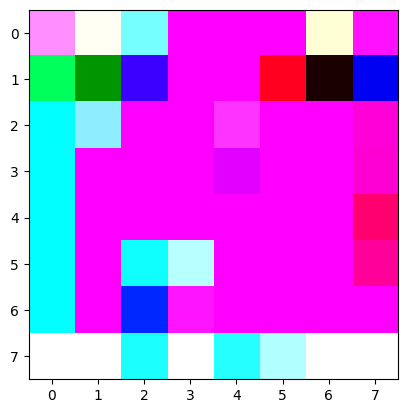

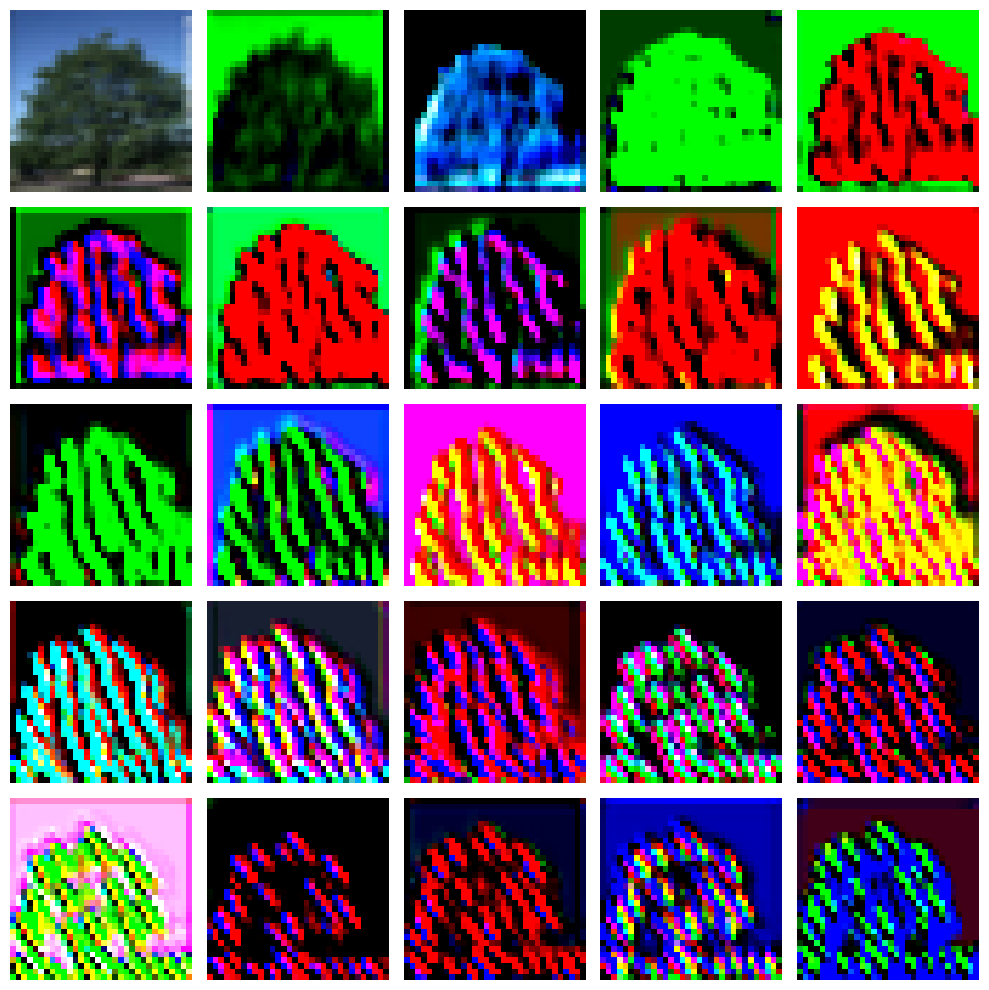

In [ ]:
#  виазулизация картинок на каждом слое
from sklearn.metrics import accuracy_score
from torchcam.methods import SmoothGradCAMpp
from torchcam.utils import overlay_mask
from PIL import Image
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
from torchvision.utils import make_grid
model=torch.load('dp_CNN_5000.pth',weights_only=False)
input_img=torch.tensor(train_x_img[27]).unsqueeze(0).float()
# print(input_img.shape)
out,img_list=model(input_img)
images = img_list
# Создаем сетку 5x5

fig, axes = plt.subplots(5, 5, figsize=(10, 10))

for i, ax in enumerate(axes.flat):
    ax.imshow(images[i])
    ax.axis('off')  # Отключаем оси
plt.savefig('tree_deep_5000.png', bbox_inches='tight', dpi=300)
plt.tight_layout()
plt.show()

In [ ]:
criterion=nn.CrossEntropyLoss()
optimizer=optim.Adam(cnn_5000.parameters(),lr=0.001)
my_model=train_model(cnn_5000,
    train_x_img,
    train_labels,
    test_x_img,
    test_labels,
    criterion,
    optimizer,
    num_epochs=100,
    device='cpu')

Epoch 1/100 [Train]:   0%|          | 0/3125 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1739: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
Validating: 100%|██████████| 625/625 [00:07<00:00, 87.30it/s, acc=8.96, loss=2.84e+3]


Epoch 1: Train Loss: 4.5674, Train Acc: 6.01% | Val Loss: 4.5405, Val Acc: 8.96%


Epoch 2/100 [Train]:  10%|█         | 322/3125 [00:09<01:24, 33.32it/s, acc=9.2, loss=1.42e+4]


KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import accuracy_score
answ=cnn_5000(torch.tensor(test_x_img).float()).detach().numpy()
my_answ=np.argmax(answ,axis=1)
print('CNN5000_accuracy=',accuracy_score(my_answ,test_labels))

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1739: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


CNN5000_accuracy= 0.1807


In [ ]:
class Special_CNN_10000(nn.Module):
    def __init__(self):
        super().__init__()

        self.conv1=nn.Conv2d(3, 6, kernel_size=3,groups=3,padding=1)
        self.bn1=nn.BatchNorm2d(6)
        self.relu1=nn.ReLU()

        self.conv2=nn.Conv2d(6, 36, kernel_size=3,groups=6,padding=1,bias=False)
        self.bn2=nn.BatchNorm2d(36)
        self.relu2=nn.ReLU()

        self.pool1=nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv3=nn.Conv2d(36, 72, kernel_size=3,groups=36,padding=1,bias=True)
        self.bn3=nn.BatchNorm2d(72)
        self.relu3=nn.ReLU()

        self.conv4=nn.Conv2d(72, 72, kernel_size=3,groups=72,padding=1)
        self.bn4=nn.BatchNorm2d(72)
        self.relu4=nn.ReLU()

        self.conv5=nn.Conv2d(72, 72, kernel_size=3,groups=72,padding=1,bias=False)
        self.bn5=nn.BatchNorm2d(72)
        self.relu5=nn.ReLU()

        self.pool2=nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv6=nn.Conv2d(72, 36, kernel_size=3,padding=1,groups=36)
        self.bn6=nn.BatchNorm2d(36)
        self.relu6=nn.ReLU()

        self.conv7=nn.Conv2d(36, 36, kernel_size=3,padding=0,groups=36,bias=False)
        self.bn7=nn.BatchNorm2d(36)
        self.relu7=nn.ReLU()

        self.pool3=nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv8=nn.Conv2d(36, 6, kernel_size=3,padding=1,groups=6,bias=True)
        self.bn8=nn.BatchNorm2d(6)
        self.relu8=nn.ReLU()
        # self.pool4=nn.MaxPool2d(kernel_size=2, stride=2)

        self.flatten=nn.Flatten()

        self.fc=nn.Linear(3*3*6, 100)
        # self.sm=nn.Softmax()

        self.alpha=nn.Parameter(torch.tensor(0.))
    def forward(self, x):

        x=self.conv1(x)
        x=self.bn1(x)
        x=self.relu1(x)

        x=self.conv2(x)
        x=self.bn2(x)
        x=self.relu2(x)

        x=self.pool1(x)

        x=self.conv3(x)
        z=self.bn3(x)
        x=self.relu3(z)

        x=self.conv4(x)
        x=self.bn4(x)
        x=self.relu4(x)

        x=self.conv5(x)
        x=self.bn5(x)
        x=self.relu5(x+self.alpha*z)

        x=self.pool2(x)

        x=self.conv6(x)
        x=self.bn6(x)
        x=self.relu6(x)


        x=self.conv7(x)
        x=self.bn7(x)
        x=self.relu7(x)

        x=self.pool3(x)

        x=self.conv8(x)
        x=self.bn8(x)
        x=self.relu8(x)

        # x=self.pool4(x)
        x=self.flatten(x)
        x = self.fc(x)
        # x= self.sm(x)
        return x

In [ ]:
cnn_10000=Special_CNN_10000()
total_params = sum(p.numel() for p in cnn_10000.parameters())
print(f"Всего параметров: {total_params}")

Всего параметров: 9983


In [ ]:
y = cnn_10000(torch.from_numpy(train_x_img[:2]).float())
make_dot(y, params=dict(cnn_10000.named_parameters())).render("special_cnn_5000", format="png")

'special_cnn_5000.png'

In [ ]:
criterion=nn.CrossEntropyLoss()
optimizer=optim.Adam(cnn_10000.parameters(),lr=0.001)
my_model=train_model(cnn_10000,
    train_x_img,
    train_labels,
    test_x_img,
    test_labels,
    criterion,
    optimizer,
    num_epochs=250,
    device='cpu')

Validating: 100%|██████████| 625/625 [00:17<00:00, 35.71it/s, acc=18, loss=2.17e+3]


Epoch 1: Train Loss: 3.9279, Train Acc: 11.00% | Val Loss: 3.4739, Val Acc: 18.01%


Validating: 100%|██████████| 625/625 [00:16<00:00, 37.48it/s, acc=22.8, loss=2.02e+3]


Epoch 2: Train Loss: 3.3564, Train Acc: 20.13% | Val Loss: 3.2275, Val Acc: 22.82%


Validating: 100%|██████████| 625/625 [00:18<00:00, 34.36it/s, acc=24.7, loss=1.94e+3]


Epoch 3: Train Loss: 3.1676, Train Acc: 23.47% | Val Loss: 3.1042, Val Acc: 24.69%


Validating: 100%|██████████| 625/625 [00:17<00:00, 36.76it/s, acc=25.6, loss=1.9e+3]


Epoch 4: Train Loss: 3.0692, Train Acc: 25.16% | Val Loss: 3.0452, Val Acc: 25.61%


Validating: 100%|██████████| 625/625 [00:17<00:00, 36.39it/s, acc=27.1, loss=1.86e+3]


Epoch 5: Train Loss: 2.9948, Train Acc: 26.57% | Val Loss: 2.9780, Val Acc: 27.07%


Validating: 100%|██████████| 625/625 [00:16<00:00, 36.99it/s, acc=27.6, loss=1.84e+3]


Epoch 6: Train Loss: 2.9415, Train Acc: 27.70% | Val Loss: 2.9501, Val Acc: 27.59%


Validating: 100%|██████████| 625/625 [00:16<00:00, 37.34it/s, acc=28.5, loss=1.82e+3]


Epoch 7: Train Loss: 2.8978, Train Acc: 28.77% | Val Loss: 2.9056, Val Acc: 28.51%


Validating: 100%|██████████| 625/625 [00:16<00:00, 37.13it/s, acc=29.7, loss=1.79e+3]


Epoch 8: Train Loss: 2.8576, Train Acc: 29.49% | Val Loss: 2.8678, Val Acc: 29.74%


Validating: 100%|██████████| 625/625 [00:17<00:00, 36.64it/s, acc=29.7, loss=1.78e+3]


Epoch 9: Train Loss: 2.8263, Train Acc: 29.99% | Val Loss: 2.8449, Val Acc: 29.70%


Validating: 100%|██████████| 625/625 [00:16<00:00, 37.93it/s, acc=30.1, loss=1.78e+3]


Epoch 10: Train Loss: 2.7990, Train Acc: 30.19% | Val Loss: 2.8526, Val Acc: 30.09%


Validating: 100%|██████████| 625/625 [00:16<00:00, 38.42it/s, acc=30.6, loss=1.75e+3]


Epoch 11: Train Loss: 2.7687, Train Acc: 31.00% | Val Loss: 2.7932, Val Acc: 30.65%


Validating: 100%|██████████| 625/625 [00:16<00:00, 38.40it/s, acc=30.4, loss=1.75e+3]


Epoch 12: Train Loss: 2.7519, Train Acc: 31.52% | Val Loss: 2.8038, Val Acc: 30.40%


Validating: 100%|██████████| 625/625 [00:16<00:00, 37.59it/s, acc=31.7, loss=1.72e+3]


Epoch 13: Train Loss: 2.7330, Train Acc: 31.67% | Val Loss: 2.7579, Val Acc: 31.66%


Validating: 100%|██████████| 625/625 [00:16<00:00, 38.32it/s, acc=31.3, loss=1.72e+3]


Epoch 14: Train Loss: 2.7112, Train Acc: 32.21% | Val Loss: 2.7522, Val Acc: 31.33%


Validating: 100%|██████████| 625/625 [00:17<00:00, 36.57it/s, acc=31, loss=1.75e+3]


Epoch 15: Train Loss: 2.6985, Train Acc: 32.68% | Val Loss: 2.7975, Val Acc: 31.00%


Validating: 100%|██████████| 625/625 [00:18<00:00, 34.05it/s, acc=31.6, loss=1.72e+3]


Epoch 16: Train Loss: 2.6839, Train Acc: 33.00% | Val Loss: 2.7589, Val Acc: 31.65%


Validating: 100%|██████████| 625/625 [00:16<00:00, 37.71it/s, acc=33, loss=1.7e+3]


Epoch 17: Train Loss: 2.6742, Train Acc: 33.11% | Val Loss: 2.7247, Val Acc: 33.02%


Validating: 100%|██████████| 625/625 [00:16<00:00, 37.08it/s, acc=31.5, loss=1.73e+3]


Epoch 18: Train Loss: 2.6599, Train Acc: 33.38% | Val Loss: 2.7674, Val Acc: 31.47%


Validating: 100%|██████████| 625/625 [00:17<00:00, 35.94it/s, acc=32.1, loss=1.72e+3]


Epoch 19: Train Loss: 2.6477, Train Acc: 33.75% | Val Loss: 2.7542, Val Acc: 32.12%


Validating: 100%|██████████| 625/625 [00:16<00:00, 38.12it/s, acc=32.7, loss=1.69e+3]


Epoch 20: Train Loss: 2.6438, Train Acc: 33.80% | Val Loss: 2.7024, Val Acc: 32.67%


Validating: 100%|██████████| 625/625 [00:16<00:00, 38.01it/s, acc=33.1, loss=1.69e+3]


Epoch 21: Train Loss: 2.6336, Train Acc: 33.77% | Val Loss: 2.7042, Val Acc: 33.10%


Validating: 100%|██████████| 625/625 [00:17<00:00, 36.38it/s, acc=32.9, loss=1.69e+3]


Epoch 22: Train Loss: 2.6221, Train Acc: 34.19% | Val Loss: 2.6968, Val Acc: 32.90%


Validating: 100%|██████████| 625/625 [00:17<00:00, 35.21it/s, acc=32.7, loss=1.69e+3]


Epoch 23: Train Loss: 2.6188, Train Acc: 34.20% | Val Loss: 2.6969, Val Acc: 32.69%


Validating: 100%|██████████| 625/625 [00:17<00:00, 36.07it/s, acc=32.4, loss=1.7e+3]


Epoch 24: Train Loss: 2.6112, Train Acc: 34.36% | Val Loss: 2.7126, Val Acc: 32.43%


Validating: 100%|██████████| 625/625 [00:16<00:00, 38.33it/s, acc=33.2, loss=1.68e+3]


Epoch 25: Train Loss: 2.6043, Train Acc: 34.61% | Val Loss: 2.6863, Val Acc: 33.16%


Validating: 100%|██████████| 625/625 [00:16<00:00, 38.70it/s, acc=33.2, loss=1.67e+3]


Epoch 26: Train Loss: 2.5975, Train Acc: 34.96% | Val Loss: 2.6771, Val Acc: 33.24%


Validating: 100%|██████████| 625/625 [00:17<00:00, 36.19it/s, acc=33.8, loss=1.66e+3]


Epoch 27: Train Loss: 2.5943, Train Acc: 34.84% | Val Loss: 2.6627, Val Acc: 33.81%


Validating: 100%|██████████| 625/625 [00:16<00:00, 36.83it/s, acc=33.4, loss=1.66e+3]


Epoch 28: Train Loss: 2.5873, Train Acc: 34.96% | Val Loss: 2.6619, Val Acc: 33.41%


Validating: 100%|██████████| 625/625 [00:16<00:00, 38.27it/s, acc=33.9, loss=1.66e+3]


Epoch 29: Train Loss: 2.5838, Train Acc: 35.03% | Val Loss: 2.6559, Val Acc: 33.94%


Validating: 100%|██████████| 625/625 [00:16<00:00, 38.58it/s, acc=33.4, loss=1.68e+3]


Epoch 30: Train Loss: 2.5768, Train Acc: 35.18% | Val Loss: 2.6836, Val Acc: 33.36%


Validating: 100%|██████████| 625/625 [00:17<00:00, 36.56it/s, acc=33.4, loss=1.67e+3]


Epoch 31: Train Loss: 2.5741, Train Acc: 35.32% | Val Loss: 2.6749, Val Acc: 33.42%


Validating: 100%|██████████| 625/625 [00:17<00:00, 36.66it/s, acc=33, loss=1.67e+3]


Epoch 32: Train Loss: 2.5696, Train Acc: 35.31% | Val Loss: 2.6787, Val Acc: 33.00%


Validating: 100%|██████████| 625/625 [00:16<00:00, 38.38it/s, acc=34.2, loss=1.66e+3]


Epoch 33: Train Loss: 2.5652, Train Acc: 35.47% | Val Loss: 2.6566, Val Acc: 34.16%


Validating: 100%|██████████| 625/625 [00:18<00:00, 34.58it/s, acc=33.5, loss=1.66e+3]


Epoch 34: Train Loss: 2.5615, Train Acc: 35.68% | Val Loss: 2.6532, Val Acc: 33.49%


Validating: 100%|██████████| 625/625 [00:17<00:00, 36.23it/s, acc=34, loss=1.67e+3]


Epoch 35: Train Loss: 2.5529, Train Acc: 35.64% | Val Loss: 2.6650, Val Acc: 33.98%


Validating: 100%|██████████| 625/625 [00:17<00:00, 35.23it/s, acc=33.9, loss=1.66e+3]


Epoch 36: Train Loss: 2.5540, Train Acc: 35.64% | Val Loss: 2.6597, Val Acc: 33.94%


Validating: 100%|██████████| 625/625 [00:16<00:00, 37.28it/s, acc=34.2, loss=1.64e+3]


Epoch 37: Train Loss: 2.5476, Train Acc: 35.80% | Val Loss: 2.6315, Val Acc: 34.20%


Validating: 100%|██████████| 625/625 [00:16<00:00, 37.26it/s, acc=34, loss=1.66e+3]


Epoch 38: Train Loss: 2.5425, Train Acc: 35.77% | Val Loss: 2.6541, Val Acc: 33.97%


Validating: 100%|██████████| 625/625 [00:16<00:00, 37.55it/s, acc=34.2, loss=1.66e+3]


Epoch 39: Train Loss: 2.5373, Train Acc: 35.98% | Val Loss: 2.6503, Val Acc: 34.16%


Validating: 100%|██████████| 625/625 [00:17<00:00, 35.40it/s, acc=34, loss=1.65e+3]


Epoch 40: Train Loss: 2.5379, Train Acc: 35.95% | Val Loss: 2.6477, Val Acc: 34.00%


Validating: 100%|██████████| 625/625 [00:17<00:00, 35.16it/s, acc=34.4, loss=1.65e+3]


Epoch 41: Train Loss: 2.5328, Train Acc: 36.09% | Val Loss: 2.6412, Val Acc: 34.36%


Validating: 100%|██████████| 625/625 [00:17<00:00, 36.18it/s, acc=34.1, loss=1.67e+3]


Epoch 42: Train Loss: 2.5291, Train Acc: 36.14% | Val Loss: 2.6645, Val Acc: 34.06%


Validating: 100%|██████████| 625/625 [00:18<00:00, 34.06it/s, acc=34.1, loss=1.65e+3]


Epoch 43: Train Loss: 2.5310, Train Acc: 35.94% | Val Loss: 2.6356, Val Acc: 34.09%


Validating: 100%|██████████| 625/625 [00:16<00:00, 37.39it/s, acc=34.5, loss=1.65e+3]


Epoch 44: Train Loss: 2.5231, Train Acc: 36.38% | Val Loss: 2.6448, Val Acc: 34.54%


Validating: 100%|██████████| 625/625 [00:17<00:00, 36.24it/s, acc=34.6, loss=1.64e+3]


Epoch 45: Train Loss: 2.5204, Train Acc: 36.49% | Val Loss: 2.6219, Val Acc: 34.63%


Validating: 100%|██████████| 625/625 [00:17<00:00, 36.63it/s, acc=33.5, loss=1.67e+3]


Epoch 46: Train Loss: 2.5159, Train Acc: 36.36% | Val Loss: 2.6765, Val Acc: 33.45%


Validating: 100%|██████████| 625/625 [00:17<00:00, 35.62it/s, acc=34.2, loss=1.64e+3]


Epoch 47: Train Loss: 2.5157, Train Acc: 36.58% | Val Loss: 2.6293, Val Acc: 34.25%


Validating: 100%|██████████| 625/625 [00:17<00:00, 35.02it/s, acc=34.6, loss=1.65e+3]


Epoch 48: Train Loss: 2.5122, Train Acc: 36.54% | Val Loss: 2.6338, Val Acc: 34.62%


Validating: 100%|██████████| 625/625 [00:18<00:00, 34.60it/s, acc=34.5, loss=1.64e+3]


Epoch 49: Train Loss: 2.5110, Train Acc: 36.40% | Val Loss: 2.6266, Val Acc: 34.55%


Validating: 100%|██████████| 625/625 [00:17<00:00, 35.93it/s, acc=34.8, loss=1.63e+3]


Epoch 50: Train Loss: 2.5070, Train Acc: 36.64% | Val Loss: 2.6143, Val Acc: 34.82%


Validating: 100%|██████████| 625/625 [00:16<00:00, 37.50it/s, acc=35, loss=1.65e+3]


Epoch 51: Train Loss: 2.5018, Train Acc: 36.85% | Val Loss: 2.6325, Val Acc: 34.99%


Validating: 100%|██████████| 625/625 [00:18<00:00, 33.89it/s, acc=35.2, loss=1.63e+3]


Epoch 52: Train Loss: 2.4993, Train Acc: 36.78% | Val Loss: 2.6075, Val Acc: 35.22%


Validating: 100%|██████████| 625/625 [00:17<00:00, 35.95it/s, acc=35.1, loss=1.64e+3]


Epoch 53: Train Loss: 2.4981, Train Acc: 37.05% | Val Loss: 2.6209, Val Acc: 35.07%


Validating: 100%|██████████| 625/625 [00:17<00:00, 35.78it/s, acc=34.8, loss=1.64e+3]


Epoch 54: Train Loss: 2.4940, Train Acc: 36.67% | Val Loss: 2.6273, Val Acc: 34.78%


Validating: 100%|██████████| 625/625 [00:18<00:00, 34.10it/s, acc=35.2, loss=1.63e+3]


Epoch 55: Train Loss: 2.4960, Train Acc: 36.81% | Val Loss: 2.6139, Val Acc: 35.16%


Validating: 100%|██████████| 625/625 [00:17<00:00, 35.89it/s, acc=35, loss=1.64e+3]


Epoch 56: Train Loss: 2.4918, Train Acc: 36.93% | Val Loss: 2.6248, Val Acc: 34.96%


Validating: 100%|██████████| 625/625 [00:17<00:00, 35.83it/s, acc=34.9, loss=1.64e+3]


Epoch 57: Train Loss: 2.4913, Train Acc: 37.02% | Val Loss: 2.6204, Val Acc: 34.87%


Validating: 100%|██████████| 625/625 [00:17<00:00, 35.52it/s, acc=35.2, loss=1.63e+3]


Epoch 58: Train Loss: 2.4894, Train Acc: 37.17% | Val Loss: 2.6142, Val Acc: 35.17%


Validating: 100%|██████████| 625/625 [00:16<00:00, 37.12it/s, acc=35.4, loss=1.63e+3]


Epoch 59: Train Loss: 2.4878, Train Acc: 36.97% | Val Loss: 2.6107, Val Acc: 35.40%


Validating: 100%|██████████| 625/625 [00:16<00:00, 37.30it/s, acc=35, loss=1.63e+3]


Epoch 60: Train Loss: 2.4835, Train Acc: 37.11% | Val Loss: 2.6122, Val Acc: 35.02%


Validating: 100%|██████████| 625/625 [00:16<00:00, 37.61it/s, acc=35.4, loss=1.63e+3]


Epoch 61: Train Loss: 2.4796, Train Acc: 37.21% | Val Loss: 2.6134, Val Acc: 35.40%


Validating: 100%|██████████| 625/625 [00:17<00:00, 36.49it/s, acc=34.9, loss=1.64e+3]


Epoch 62: Train Loss: 2.4822, Train Acc: 37.02% | Val Loss: 2.6267, Val Acc: 34.86%


Validating: 100%|██████████| 625/625 [00:17<00:00, 35.67it/s, acc=35.2, loss=1.64e+3]


Epoch 63: Train Loss: 2.4774, Train Acc: 37.25% | Val Loss: 2.6190, Val Acc: 35.18%


Validating: 100%|██████████| 625/625 [00:17<00:00, 36.01it/s, acc=35, loss=1.64e+3]


Epoch 64: Train Loss: 2.4768, Train Acc: 37.35% | Val Loss: 2.6169, Val Acc: 35.04%


Validating: 100%|██████████| 625/625 [00:17<00:00, 35.56it/s, acc=35, loss=1.65e+3]


Epoch 65: Train Loss: 2.4714, Train Acc: 37.65% | Val Loss: 2.6337, Val Acc: 34.99%


Validating: 100%|██████████| 625/625 [00:17<00:00, 35.52it/s, acc=34.8, loss=1.64e+3]


Epoch 66: Train Loss: 2.4742, Train Acc: 37.02% | Val Loss: 2.6247, Val Acc: 34.84%


Validating: 100%|██████████| 625/625 [00:17<00:00, 35.53it/s, acc=35.7, loss=1.62e+3]


Epoch 67: Train Loss: 2.4708, Train Acc: 37.50% | Val Loss: 2.5980, Val Acc: 35.70%


Validating: 100%|██████████| 625/625 [00:17<00:00, 35.50it/s, acc=35, loss=1.63e+3]


Epoch 68: Train Loss: 2.4722, Train Acc: 37.43% | Val Loss: 2.6111, Val Acc: 35.01%


Validating: 100%|██████████| 625/625 [00:17<00:00, 36.36it/s, acc=35.2, loss=1.62e+3]


Epoch 69: Train Loss: 2.4628, Train Acc: 37.73% | Val Loss: 2.5989, Val Acc: 35.24%


Validating: 100%|██████████| 625/625 [00:16<00:00, 36.94it/s, acc=35.7, loss=1.62e+3]


Epoch 70: Train Loss: 2.4650, Train Acc: 37.53% | Val Loss: 2.5876, Val Acc: 35.67%


Validating: 100%|██████████| 625/625 [00:18<00:00, 33.11it/s, acc=35.3, loss=1.63e+3]


Epoch 71: Train Loss: 2.4652, Train Acc: 37.49% | Val Loss: 2.6112, Val Acc: 35.29%


Validating: 100%|██████████| 625/625 [00:17<00:00, 35.18it/s, acc=35.6, loss=1.62e+3]


Epoch 72: Train Loss: 2.4636, Train Acc: 37.41% | Val Loss: 2.5968, Val Acc: 35.64%


Validating: 100%|██████████| 625/625 [00:17<00:00, 35.87it/s, acc=35.4, loss=1.63e+3]


Epoch 73: Train Loss: 2.4592, Train Acc: 37.66% | Val Loss: 2.6010, Val Acc: 35.39%


Validating: 100%|██████████| 625/625 [00:17<00:00, 36.20it/s, acc=35.9, loss=1.62e+3]


Epoch 74: Train Loss: 2.4607, Train Acc: 37.53% | Val Loss: 2.5861, Val Acc: 35.88%


Validating: 100%|██████████| 625/625 [00:17<00:00, 36.26it/s, acc=35.3, loss=1.63e+3]


Epoch 75: Train Loss: 2.4571, Train Acc: 37.70% | Val Loss: 2.6090, Val Acc: 35.32%


Validating: 100%|██████████| 625/625 [00:16<00:00, 36.86it/s, acc=35.5, loss=1.62e+3]


Epoch 76: Train Loss: 2.4531, Train Acc: 37.86% | Val Loss: 2.5902, Val Acc: 35.49%


Validating: 100%|██████████| 625/625 [00:17<00:00, 36.70it/s, acc=35.6, loss=1.63e+3]


Epoch 77: Train Loss: 2.4560, Train Acc: 37.82% | Val Loss: 2.6054, Val Acc: 35.57%


Validating: 100%|██████████| 625/625 [00:16<00:00, 36.77it/s, acc=35.8, loss=1.61e+3]


Epoch 78: Train Loss: 2.4541, Train Acc: 37.86% | Val Loss: 2.5836, Val Acc: 35.76%


Validating: 100%|██████████| 625/625 [00:17<00:00, 34.81it/s, acc=35.9, loss=1.62e+3]


Epoch 79: Train Loss: 2.4535, Train Acc: 37.85% | Val Loss: 2.5886, Val Acc: 35.85%


Validating: 100%|██████████| 625/625 [00:17<00:00, 35.74it/s, acc=36, loss=1.61e+3]


Epoch 80: Train Loss: 2.4509, Train Acc: 37.90% | Val Loss: 2.5704, Val Acc: 36.04%


Validating: 100%|██████████| 625/625 [00:17<00:00, 34.79it/s, acc=35.4, loss=1.63e+3]


Epoch 81: Train Loss: 2.4445, Train Acc: 37.89% | Val Loss: 2.6106, Val Acc: 35.44%


Validating: 100%|██████████| 625/625 [00:17<00:00, 36.07it/s, acc=36, loss=1.62e+3]


Epoch 82: Train Loss: 2.4453, Train Acc: 37.88% | Val Loss: 2.5969, Val Acc: 35.98%


Validating: 100%|██████████| 625/625 [00:17<00:00, 36.57it/s, acc=35.9, loss=1.62e+3]


Epoch 83: Train Loss: 2.4445, Train Acc: 37.85% | Val Loss: 2.5859, Val Acc: 35.86%


Validating: 100%|██████████| 625/625 [00:17<00:00, 36.76it/s, acc=35.6, loss=1.61e+3]


Epoch 84: Train Loss: 2.4454, Train Acc: 37.97% | Val Loss: 2.5825, Val Acc: 35.64%


Validating: 100%|██████████| 625/625 [00:17<00:00, 36.35it/s, acc=35.9, loss=1.62e+3]


Epoch 85: Train Loss: 2.4431, Train Acc: 37.91% | Val Loss: 2.5946, Val Acc: 35.87%


Validating: 100%|██████████| 625/625 [00:18<00:00, 33.52it/s, acc=35.6, loss=1.62e+3]


Epoch 86: Train Loss: 2.4426, Train Acc: 37.81% | Val Loss: 2.5942, Val Acc: 35.62%


Validating: 100%|██████████| 625/625 [00:17<00:00, 35.21it/s, acc=35, loss=1.63e+3]


Epoch 87: Train Loss: 2.4434, Train Acc: 37.95% | Val Loss: 2.6036, Val Acc: 34.98%


Validating: 100%|██████████| 625/625 [00:17<00:00, 35.60it/s, acc=35.7, loss=1.62e+3]


Epoch 88: Train Loss: 2.4385, Train Acc: 37.88% | Val Loss: 2.5922, Val Acc: 35.66%


Validating: 100%|██████████| 625/625 [00:17<00:00, 35.04it/s, acc=35.2, loss=1.64e+3]


Epoch 89: Train Loss: 2.4415, Train Acc: 37.91% | Val Loss: 2.6175, Val Acc: 35.18%


Validating: 100%|██████████| 625/625 [00:18<00:00, 34.03it/s, acc=36.5, loss=1.61e+3]


Epoch 90: Train Loss: 2.4400, Train Acc: 38.08% | Val Loss: 2.5750, Val Acc: 36.45%


Validating: 100%|██████████| 625/625 [00:17<00:00, 35.84it/s, acc=35.6, loss=1.62e+3]


Epoch 91: Train Loss: 2.4368, Train Acc: 38.11% | Val Loss: 2.5961, Val Acc: 35.62%


Validating: 100%|██████████| 625/625 [00:17<00:00, 35.16it/s, acc=36.1, loss=1.62e+3]


Epoch 92: Train Loss: 2.4348, Train Acc: 38.32% | Val Loss: 2.5844, Val Acc: 36.06%


Validating: 100%|██████████| 625/625 [00:17<00:00, 34.92it/s, acc=35.9, loss=1.61e+3]


Epoch 93: Train Loss: 2.4386, Train Acc: 38.04% | Val Loss: 2.5749, Val Acc: 35.92%


Validating: 100%|██████████| 625/625 [00:17<00:00, 35.20it/s, acc=36, loss=1.61e+3]


Epoch 94: Train Loss: 2.4349, Train Acc: 38.21% | Val Loss: 2.5740, Val Acc: 35.98%


Validating: 100%|██████████| 625/625 [00:17<00:00, 35.65it/s, acc=35.6, loss=1.62e+3]


Epoch 95: Train Loss: 2.4355, Train Acc: 38.15% | Val Loss: 2.5849, Val Acc: 35.63%


Validating: 100%|██████████| 625/625 [00:17<00:00, 35.39it/s, acc=35.8, loss=1.62e+3]


Epoch 96: Train Loss: 2.4345, Train Acc: 38.13% | Val Loss: 2.5932, Val Acc: 35.81%


Validating: 100%|██████████| 625/625 [00:17<00:00, 35.49it/s, acc=35.9, loss=1.61e+3]


Epoch 97: Train Loss: 2.4304, Train Acc: 38.37% | Val Loss: 2.5808, Val Acc: 35.93%


Validating: 100%|██████████| 625/625 [00:18<00:00, 33.92it/s, acc=35.3, loss=1.62e+3]


Epoch 98: Train Loss: 2.4271, Train Acc: 38.31% | Val Loss: 2.5914, Val Acc: 35.32%


Validating: 100%|██████████| 625/625 [00:17<00:00, 36.02it/s, acc=36.2, loss=1.61e+3]


Epoch 99: Train Loss: 2.4294, Train Acc: 38.28% | Val Loss: 2.5788, Val Acc: 36.20%


Validating: 100%|██████████| 625/625 [00:17<00:00, 35.99it/s, acc=35.9, loss=1.62e+3]


Epoch 100: Train Loss: 2.4277, Train Acc: 38.43% | Val Loss: 2.5890, Val Acc: 35.86%


Validating: 100%|██████████| 625/625 [00:18<00:00, 34.13it/s, acc=36.4, loss=1.6e+3]


Epoch 101: Train Loss: 2.4269, Train Acc: 38.41% | Val Loss: 2.5677, Val Acc: 36.37%


Validating: 100%|██████████| 625/625 [00:17<00:00, 34.74it/s, acc=35.7, loss=1.62e+3]


Epoch 102: Train Loss: 2.4223, Train Acc: 38.44% | Val Loss: 2.5860, Val Acc: 35.72%


Epoch 103/250 [Train]:  83%|████████▎ | 2589/3125 [03:30<01:21,  6.58it/s, acc=38.4, loss=7.56e+3]

In [ ]:
from sklearn.metrics import accuracy_score
answ=cnn_10000(torch.tensor(test_x_img).float()).detach().numpy()
my_answ=np.argmax(answ,axis=1)
print('CNN10000_accuracy=',accuracy_score(my_answ,test_labels))

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1739: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


CNN10000_accuracy= 0.2168


In [ ]:
class default_CNN_50000(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1=nn.Conv2d(3, 12, kernel_size=3,padding=1)
        self.bn1=nn.BatchNorm2d(12)
        self.relu1=nn.ReLU()
        self.conv2=nn.Conv2d(12, 18, kernel_size=3,padding=1,groups=2)
        self.bn2=nn.BatchNorm2d(18)
        self.relu2=nn.ReLU()
        self.pool1=nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3=nn.Conv2d(18, 36, kernel_size=3,padding=1)
        self.bn3=nn.BatchNorm2d(36)
        self.relu3=nn.ReLU()
        self.pool2=nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv4=nn.Conv2d(36, 36, kernel_size=3,padding=1,bias=False)
        self.bn4=nn.BatchNorm2d(36)
        self.relu4=nn.ReLU()
        self.pool3=nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv5=nn.Conv2d(36, 16, kernel_size=3,padding=1)
        self.bn5=nn.BatchNorm2d(16)
        self.relu5=nn.ReLU()
        # self.pool4=nn.MaxPool2d(kernel_size=2, stride=2)
        self.flatten=nn.Flatten()
        self.fc=nn.Linear(256, 100)
        self.sm=nn.Softmax()
    def forward(self, x):

        x=self.conv1(x)
        x=self.bn1(x)
        x=self.relu1(x)
        x=self.conv2(x)
        x=self.bn2(x)
        x=self.relu2(x)
        x=self.pool1(x)
        x=self.conv3(x)
        x=self.bn3(x)
        x=self.relu3(x)
        x=self.pool2(x)
        x=self.conv4(x)
        x=self.bn4(x)
        x=self.relu4(x)
        x=self.pool3(x)
        x=self.conv5(x)
        x=self.bn5(x)
        x=self.relu5(x)
        # x=self.pool4(x)
        x=self.flatten(x)
        x = self.fc(x)
        x= self.sm(x)
        return x

In [ ]:
cnn_50000=default_CNN_50000()
# cnn_50000.to('cuda')
total_params = sum(p.numel() for p in cnn_50000.parameters())
print(f"Всего параметров: {total_params}")

Всего параметров: 49994


In [ ]:
y = cnn_50000(torch.from_numpy(train_x_img[:2]).float())
make_dot(y, params=dict(cnn_50000.named_parameters())).render("defoult_cnn_10000", format="png")

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1739: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


'defoult_cnn_10000.png'

In [ ]:
criterion=nn.CrossEntropyLoss()
optimizer=optim.Adam(cnn_50000.parameters(),lr=0.001)
my_model=train_model(cnn_50000,
    train_x_img,
    train_labels,
    test_x_img,
    test_labels,
    criterion,
    optimizer,
    num_epochs=200,
    device='cuda')

Epoch 1/200 [Train]:   0%|          | 0/3125 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1739: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
Validating: 100%|██████████| 625/625 [00:01<00:00, 331.28it/s, acc=14.5, loss=2.8e+3]


Epoch 1: Train Loss: 4.5372, Train Acc: 8.76% | Val Loss: 4.4810, Val Acc: 14.50%


Validating: 100%|██████████| 625/625 [00:01<00:00, 335.63it/s, acc=18, loss=2.78e+3]


Epoch 2: Train Loss: 4.4696, Train Acc: 15.71% | Val Loss: 4.4465, Val Acc: 17.99%


Validating: 100%|██████████| 625/625 [00:01<00:00, 330.60it/s, acc=21.1, loss=2.76e+3]


Epoch 3: Train Loss: 4.4357, Train Acc: 19.11% | Val Loss: 4.4155, Val Acc: 21.05%


Validating: 100%|██████████| 625/625 [00:01<00:00, 337.48it/s, acc=23.3, loss=2.75e+3]


Epoch 4: Train Loss: 4.4043, Train Acc: 22.28% | Val Loss: 4.3926, Val Acc: 23.34%


Validating: 100%|██████████| 625/625 [00:02<00:00, 307.26it/s, acc=24.3, loss=2.74e+3]


Epoch 5: Train Loss: 4.3772, Train Acc: 25.01% | Val Loss: 4.3828, Val Acc: 24.31%


Validating: 100%|██████████| 625/625 [00:01<00:00, 331.91it/s, acc=26.5, loss=2.73e+3]


Epoch 6: Train Loss: 4.3557, Train Acc: 27.14% | Val Loss: 4.3614, Val Acc: 26.53%


Validating: 100%|██████████| 625/625 [00:01<00:00, 319.32it/s, acc=27.4, loss=2.72e+3]


Epoch 7: Train Loss: 4.3388, Train Acc: 28.79% | Val Loss: 4.3500, Val Acc: 27.44%


Validating: 100%|██████████| 625/625 [00:02<00:00, 280.43it/s, acc=27.9, loss=2.72e+3]


Epoch 8: Train Loss: 4.3261, Train Acc: 30.06% | Val Loss: 4.3451, Val Acc: 27.85%


Validating: 100%|██████████| 625/625 [00:01<00:00, 336.76it/s, acc=29.4, loss=2.71e+3]


Epoch 9: Train Loss: 4.3127, Train Acc: 31.35% | Val Loss: 4.3312, Val Acc: 29.38%


Validating: 100%|██████████| 625/625 [00:01<00:00, 327.06it/s, acc=29.5, loss=2.71e+3]


Epoch 10: Train Loss: 4.3013, Train Acc: 32.44% | Val Loss: 4.3299, Val Acc: 29.53%


Validating: 100%|██████████| 625/625 [00:02<00:00, 282.64it/s, acc=31, loss=2.7e+3]


Epoch 11: Train Loss: 4.2900, Train Acc: 33.53% | Val Loss: 4.3133, Val Acc: 31.03%


Validating: 100%|██████████| 625/625 [00:01<00:00, 320.68it/s, acc=30.8, loss=2.7e+3]


Epoch 12: Train Loss: 4.2807, Train Acc: 34.44% | Val Loss: 4.3172, Val Acc: 30.82%


Validating: 100%|██████████| 625/625 [00:01<00:00, 326.58it/s, acc=31.2, loss=2.69e+3]


Epoch 13: Train Loss: 4.2715, Train Acc: 35.44% | Val Loss: 4.3106, Val Acc: 31.22%


Validating: 100%|██████████| 625/625 [00:02<00:00, 284.00it/s, acc=31.6, loss=2.69e+3]


Epoch 14: Train Loss: 4.2654, Train Acc: 35.99% | Val Loss: 4.3090, Val Acc: 31.58%


Validating: 100%|██████████| 625/625 [00:01<00:00, 321.05it/s, acc=32.4, loss=2.69e+3]


Epoch 15: Train Loss: 4.2592, Train Acc: 36.54% | Val Loss: 4.2999, Val Acc: 32.40%


Validating: 100%|██████████| 625/625 [00:01<00:00, 315.53it/s, acc=31.9, loss=2.69e+3]


Epoch 16: Train Loss: 4.2513, Train Acc: 37.36% | Val Loss: 4.3037, Val Acc: 31.95%


Validating: 100%|██████████| 625/625 [00:01<00:00, 322.26it/s, acc=32.9, loss=2.68e+3]


Epoch 17: Train Loss: 4.2461, Train Acc: 37.89% | Val Loss: 4.2942, Val Acc: 32.85%


Validating: 100%|██████████| 625/625 [00:02<00:00, 289.79it/s, acc=33.5, loss=2.68e+3]


Epoch 18: Train Loss: 4.2398, Train Acc: 38.53% | Val Loss: 4.2879, Val Acc: 33.54%


Validating: 100%|██████████| 625/625 [00:01<00:00, 315.14it/s, acc=33.2, loss=2.68e+3]


Epoch 19: Train Loss: 4.2327, Train Acc: 39.26% | Val Loss: 4.2916, Val Acc: 33.23%


Validating: 100%|██████████| 625/625 [00:01<00:00, 313.57it/s, acc=33.4, loss=2.68e+3]


Epoch 20: Train Loss: 4.2281, Train Acc: 39.74% | Val Loss: 4.2913, Val Acc: 33.36%


Validating: 100%|██████████| 625/625 [00:02<00:00, 274.80it/s, acc=33.8, loss=2.68e+3]


Epoch 21: Train Loss: 4.2223, Train Acc: 40.25% | Val Loss: 4.2870, Val Acc: 33.83%


Validating: 100%|██████████| 625/625 [00:01<00:00, 315.98it/s, acc=34.2, loss=2.68e+3]


Epoch 22: Train Loss: 4.2184, Train Acc: 40.66% | Val Loss: 4.2830, Val Acc: 34.22%


Validating: 100%|██████████| 625/625 [00:02<00:00, 307.91it/s, acc=34.4, loss=2.68e+3]


Epoch 23: Train Loss: 4.2126, Train Acc: 41.23% | Val Loss: 4.2805, Val Acc: 34.44%


Validating: 100%|██████████| 625/625 [00:01<00:00, 319.61it/s, acc=34.9, loss=2.67e+3]


Epoch 24: Train Loss: 4.2090, Train Acc: 41.60% | Val Loss: 4.2746, Val Acc: 34.93%


Validating: 100%|██████████| 625/625 [00:02<00:00, 291.56it/s, acc=34.4, loss=2.67e+3]


Epoch 25: Train Loss: 4.2043, Train Acc: 42.09% | Val Loss: 4.2780, Val Acc: 34.39%


Validating: 100%|██████████| 625/625 [00:01<00:00, 319.68it/s, acc=34.5, loss=2.67e+3]


Epoch 26: Train Loss: 4.1992, Train Acc: 42.58% | Val Loss: 4.2781, Val Acc: 34.49%


Validating: 100%|██████████| 625/625 [00:02<00:00, 311.87it/s, acc=35, loss=2.67e+3]


Epoch 27: Train Loss: 4.1962, Train Acc: 42.83% | Val Loss: 4.2741, Val Acc: 35.01%


Validating: 100%|██████████| 625/625 [00:02<00:00, 273.12it/s, acc=35.3, loss=2.67e+3]


Epoch 28: Train Loss: 4.1898, Train Acc: 43.49% | Val Loss: 4.2703, Val Acc: 35.31%


Validating: 100%|██████████| 625/625 [00:01<00:00, 318.19it/s, acc=34.9, loss=2.67e+3]


Epoch 29: Train Loss: 4.1861, Train Acc: 43.82% | Val Loss: 4.2727, Val Acc: 34.91%


Validating: 100%|██████████| 625/625 [00:02<00:00, 301.05it/s, acc=36.1, loss=2.66e+3]


Epoch 30: Train Loss: 4.1816, Train Acc: 44.26% | Val Loss: 4.2638, Val Acc: 36.11%


Validating: 100%|██████████| 625/625 [00:02<00:00, 285.80it/s, acc=35.5, loss=2.67e+3]


Epoch 31: Train Loss: 4.1780, Train Acc: 44.61% | Val Loss: 4.2675, Val Acc: 35.53%


Validating: 100%|██████████| 625/625 [00:02<00:00, 300.35it/s, acc=35.7, loss=2.67e+3]


Epoch 32: Train Loss: 4.1754, Train Acc: 44.89% | Val Loss: 4.2671, Val Acc: 35.67%


Validating: 100%|██████████| 625/625 [00:02<00:00, 301.31it/s, acc=35.6, loss=2.67e+3]


Epoch 33: Train Loss: 4.1691, Train Acc: 45.54% | Val Loss: 4.2676, Val Acc: 35.62%


Validating: 100%|██████████| 625/625 [00:01<00:00, 313.11it/s, acc=35.7, loss=2.67e+3]


Epoch 34: Train Loss: 4.1678, Train Acc: 45.67% | Val Loss: 4.2664, Val Acc: 35.74%


Validating: 100%|██████████| 625/625 [00:02<00:00, 295.55it/s, acc=35.9, loss=2.66e+3]


Epoch 35: Train Loss: 4.1646, Train Acc: 46.05% | Val Loss: 4.2638, Val Acc: 35.87%


Validating: 100%|██████████| 625/625 [00:02<00:00, 276.17it/s, acc=36, loss=2.67e+3]


Epoch 36: Train Loss: 4.1642, Train Acc: 46.02% | Val Loss: 4.2641, Val Acc: 35.95%


Validating: 100%|██████████| 625/625 [00:02<00:00, 266.03it/s, acc=36.3, loss=2.66e+3]


Epoch 37: Train Loss: 4.1578, Train Acc: 46.69% | Val Loss: 4.2601, Val Acc: 36.33%


Validating: 100%|██████████| 625/625 [00:01<00:00, 313.48it/s, acc=36.3, loss=2.66e+3]


Epoch 38: Train Loss: 4.1534, Train Acc: 47.13% | Val Loss: 4.2606, Val Acc: 36.33%


Validating: 100%|██████████| 625/625 [00:02<00:00, 300.15it/s, acc=36.5, loss=2.66e+3]


Epoch 39: Train Loss: 4.1525, Train Acc: 47.14% | Val Loss: 4.2577, Val Acc: 36.50%


Validating: 100%|██████████| 625/625 [00:02<00:00, 274.48it/s, acc=36.7, loss=2.66e+3]


Epoch 40: Train Loss: 4.1498, Train Acc: 47.43% | Val Loss: 4.2556, Val Acc: 36.71%


Validating: 100%|██████████| 625/625 [00:01<00:00, 313.35it/s, acc=36.8, loss=2.66e+3]


Epoch 41: Train Loss: 4.1487, Train Acc: 47.52% | Val Loss: 4.2543, Val Acc: 36.82%


Validating: 100%|██████████| 625/625 [00:01<00:00, 313.55it/s, acc=37.1, loss=2.66e+3]


Epoch 42: Train Loss: 4.1454, Train Acc: 47.88% | Val Loss: 4.2519, Val Acc: 37.10%


Validating: 100%|██████████| 625/625 [00:01<00:00, 314.79it/s, acc=36.6, loss=2.66e+3]


Epoch 43: Train Loss: 4.1409, Train Acc: 48.35% | Val Loss: 4.2566, Val Acc: 36.56%


Validating: 100%|██████████| 625/625 [00:02<00:00, 287.28it/s, acc=37, loss=2.66e+3]


Epoch 44: Train Loss: 4.1411, Train Acc: 48.30% | Val Loss: 4.2535, Val Acc: 37.01%


Validating: 100%|██████████| 625/625 [00:02<00:00, 303.56it/s, acc=36.9, loss=2.66e+3]


Epoch 45: Train Loss: 4.1396, Train Acc: 48.44% | Val Loss: 4.2540, Val Acc: 36.87%


Validating: 100%|██████████| 625/625 [00:02<00:00, 306.31it/s, acc=36.9, loss=2.66e+3]


Epoch 46: Train Loss: 4.1362, Train Acc: 48.83% | Val Loss: 4.2545, Val Acc: 36.91%


Validating: 100%|██████████| 625/625 [00:02<00:00, 283.57it/s, acc=36.7, loss=2.66e+3]


Epoch 47: Train Loss: 4.1330, Train Acc: 49.13% | Val Loss: 4.2558, Val Acc: 36.74%


Validating: 100%|██████████| 625/625 [00:02<00:00, 310.19it/s, acc=37.4, loss=2.66e+3]


Epoch 48: Train Loss: 4.1317, Train Acc: 49.20% | Val Loss: 4.2495, Val Acc: 37.38%


Validating: 100%|██████████| 625/625 [00:02<00:00, 304.70it/s, acc=37.3, loss=2.66e+3]


Epoch 49: Train Loss: 4.1303, Train Acc: 49.31% | Val Loss: 4.2494, Val Acc: 37.28%


Validating: 100%|██████████| 625/625 [00:02<00:00, 304.71it/s, acc=37.6, loss=2.66e+3]


Epoch 50: Train Loss: 4.1305, Train Acc: 49.35% | Val Loss: 4.2486, Val Acc: 37.56%


Validating: 100%|██████████| 625/625 [00:02<00:00, 280.65it/s, acc=37.3, loss=2.66e+3]


Epoch 51: Train Loss: 4.1258, Train Acc: 49.78% | Val Loss: 4.2493, Val Acc: 37.33%


Validating: 100%|██████████| 625/625 [00:02<00:00, 289.61it/s, acc=37.6, loss=2.65e+3]


Epoch 52: Train Loss: 4.1228, Train Acc: 50.15% | Val Loss: 4.2470, Val Acc: 37.61%


Validating: 100%|██████████| 625/625 [00:02<00:00, 304.69it/s, acc=37.1, loss=2.66e+3]


Epoch 53: Train Loss: 4.1222, Train Acc: 50.22% | Val Loss: 4.2513, Val Acc: 37.09%


Validating: 100%|██████████| 625/625 [00:02<00:00, 270.08it/s, acc=37.4, loss=2.66e+3]


Epoch 54: Train Loss: 4.1203, Train Acc: 50.43% | Val Loss: 4.2486, Val Acc: 37.42%


Validating: 100%|██████████| 625/625 [00:02<00:00, 297.64it/s, acc=37.5, loss=2.65e+3]


Epoch 55: Train Loss: 4.1208, Train Acc: 50.26% | Val Loss: 4.2469, Val Acc: 37.52%


Validating: 100%|██████████| 625/625 [00:02<00:00, 305.41it/s, acc=37.3, loss=2.66e+3]


Epoch 56: Train Loss: 4.1183, Train Acc: 50.57% | Val Loss: 4.2491, Val Acc: 37.30%


Validating: 100%|██████████| 625/625 [00:02<00:00, 294.78it/s, acc=37.7, loss=2.65e+3]


Epoch 57: Train Loss: 4.1162, Train Acc: 50.69% | Val Loss: 4.2467, Val Acc: 37.74%


Validating: 100%|██████████| 625/625 [00:02<00:00, 300.69it/s, acc=37.5, loss=2.65e+3]


Epoch 58: Train Loss: 4.1158, Train Acc: 50.81% | Val Loss: 4.2474, Val Acc: 37.49%


Validating: 100%|██████████| 625/625 [00:02<00:00, 301.21it/s, acc=36.8, loss=2.66e+3]


Epoch 59: Train Loss: 4.1139, Train Acc: 50.96% | Val Loss: 4.2553, Val Acc: 36.76%


Validating: 100%|██████████| 625/625 [00:02<00:00, 306.11it/s, acc=37.3, loss=2.66e+3]


Epoch 60: Train Loss: 4.1116, Train Acc: 51.18% | Val Loss: 4.2490, Val Acc: 37.28%


Validating: 100%|██████████| 625/625 [00:02<00:00, 276.23it/s, acc=37.7, loss=2.65e+3]


Epoch 61: Train Loss: 4.1111, Train Acc: 51.23% | Val Loss: 4.2455, Val Acc: 37.66%


Validating: 100%|██████████| 625/625 [00:02<00:00, 282.17it/s, acc=37.3, loss=2.66e+3]


Epoch 62: Train Loss: 4.1100, Train Acc: 51.36% | Val Loss: 4.2492, Val Acc: 37.31%


Validating: 100%|██████████| 625/625 [00:02<00:00, 298.28it/s, acc=37.8, loss=2.65e+3]


Epoch 63: Train Loss: 4.1068, Train Acc: 51.71% | Val Loss: 4.2452, Val Acc: 37.75%


Validating: 100%|██████████| 625/625 [00:02<00:00, 278.08it/s, acc=37.5, loss=2.65e+3]


Epoch 64: Train Loss: 4.1078, Train Acc: 51.58% | Val Loss: 4.2471, Val Acc: 37.52%


Validating: 100%|██████████| 625/625 [00:02<00:00, 270.04it/s, acc=37.2, loss=2.66e+3]


Epoch 65: Train Loss: 4.1065, Train Acc: 51.71% | Val Loss: 4.2500, Val Acc: 37.16%


Validating: 100%|██████████| 625/625 [00:02<00:00, 267.06it/s, acc=37.6, loss=2.65e+3]


Epoch 66: Train Loss: 4.1049, Train Acc: 51.83% | Val Loss: 4.2463, Val Acc: 37.61%


Validating: 100%|██████████| 625/625 [00:02<00:00, 270.60it/s, acc=38, loss=2.65e+3]


Epoch 67: Train Loss: 4.1028, Train Acc: 52.03% | Val Loss: 4.2413, Val Acc: 38.03%


Validating: 100%|██████████| 625/625 [00:02<00:00, 297.79it/s, acc=38, loss=2.65e+3]


Epoch 68: Train Loss: 4.0997, Train Acc: 52.36% | Val Loss: 4.2429, Val Acc: 38.01%


Validating: 100%|██████████| 625/625 [00:02<00:00, 293.73it/s, acc=37.8, loss=2.65e+3]


Epoch 69: Train Loss: 4.1013, Train Acc: 52.23% | Val Loss: 4.2450, Val Acc: 37.80%


Validating: 100%|██████████| 625/625 [00:02<00:00, 285.76it/s, acc=37.2, loss=2.66e+3]


Epoch 70: Train Loss: 4.1012, Train Acc: 52.24% | Val Loss: 4.2501, Val Acc: 37.22%


Validating: 100%|██████████| 625/625 [00:02<00:00, 294.31it/s, acc=37.4, loss=2.66e+3]


Epoch 71: Train Loss: 4.0979, Train Acc: 52.57% | Val Loss: 4.2486, Val Acc: 37.43%


Validating: 100%|██████████| 625/625 [00:02<00:00, 302.22it/s, acc=37.6, loss=2.65e+3]


Epoch 72: Train Loss: 4.0975, Train Acc: 52.57% | Val Loss: 4.2467, Val Acc: 37.56%


Validating: 100%|██████████| 625/625 [00:02<00:00, 295.57it/s, acc=37.1, loss=2.66e+3]


Epoch 73: Train Loss: 4.0997, Train Acc: 52.37% | Val Loss: 4.2501, Val Acc: 37.11%


Validating: 100%|██████████| 625/625 [00:02<00:00, 285.76it/s, acc=37.8, loss=2.65e+3]


Epoch 74: Train Loss: 4.0947, Train Acc: 52.84% | Val Loss: 4.2445, Val Acc: 37.81%


Validating: 100%|██████████| 625/625 [00:02<00:00, 296.31it/s, acc=37.9, loss=2.65e+3]


Epoch 75: Train Loss: 4.0919, Train Acc: 53.13% | Val Loss: 4.2451, Val Acc: 37.85%


Validating: 100%|██████████| 625/625 [00:02<00:00, 298.90it/s, acc=37.4, loss=2.66e+3]


Epoch 76: Train Loss: 4.0954, Train Acc: 52.80% | Val Loss: 4.2487, Val Acc: 37.38%


Validating: 100%|██████████| 625/625 [00:02<00:00, 299.65it/s, acc=38, loss=2.65e+3]


Epoch 77: Train Loss: 4.0916, Train Acc: 53.23% | Val Loss: 4.2423, Val Acc: 38.03%


Validating: 100%|██████████| 625/625 [00:02<00:00, 291.88it/s, acc=37.9, loss=2.65e+3]


Epoch 78: Train Loss: 4.0903, Train Acc: 53.35% | Val Loss: 4.2447, Val Acc: 37.89%


Validating: 100%|██████████| 625/625 [00:02<00:00, 295.26it/s, acc=37.8, loss=2.65e+3]


Epoch 79: Train Loss: 4.0924, Train Acc: 53.07% | Val Loss: 4.2454, Val Acc: 37.78%


Validating: 100%|██████████| 625/625 [00:02<00:00, 302.48it/s, acc=37.9, loss=2.65e+3]


Epoch 80: Train Loss: 4.0907, Train Acc: 53.29% | Val Loss: 4.2426, Val Acc: 37.94%


Validating: 100%|██████████| 625/625 [00:02<00:00, 294.85it/s, acc=37.6, loss=2.65e+3]


Epoch 81: Train Loss: 4.0889, Train Acc: 53.47% | Val Loss: 4.2461, Val Acc: 37.65%


Validating: 100%|██████████| 625/625 [00:02<00:00, 295.88it/s, acc=38.2, loss=2.65e+3]


Epoch 82: Train Loss: 4.0867, Train Acc: 53.66% | Val Loss: 4.2416, Val Acc: 38.16%


Validating: 100%|██████████| 625/625 [00:02<00:00, 305.25it/s, acc=37.8, loss=2.65e+3]


Epoch 83: Train Loss: 4.0875, Train Acc: 53.67% | Val Loss: 4.2434, Val Acc: 37.81%


Validating: 100%|██████████| 625/625 [00:02<00:00, 295.79it/s, acc=38.4, loss=2.65e+3]


Epoch 84: Train Loss: 4.0873, Train Acc: 53.56% | Val Loss: 4.2396, Val Acc: 38.38%


Validating: 100%|██████████| 625/625 [00:02<00:00, 299.28it/s, acc=37.9, loss=2.65e+3]


Epoch 85: Train Loss: 4.0849, Train Acc: 53.82% | Val Loss: 4.2434, Val Acc: 37.90%


Validating: 100%|██████████| 625/625 [00:02<00:00, 278.01it/s, acc=37.9, loss=2.65e+3]


Epoch 86: Train Loss: 4.0840, Train Acc: 53.96% | Val Loss: 4.2433, Val Acc: 37.91%


Validating: 100%|██████████| 625/625 [00:02<00:00, 290.02it/s, acc=37.8, loss=2.65e+3]


Epoch 87: Train Loss: 4.0848, Train Acc: 53.83% | Val Loss: 4.2451, Val Acc: 37.78%


Validating: 100%|██████████| 625/625 [00:02<00:00, 289.05it/s, acc=37.9, loss=2.65e+3]


Epoch 88: Train Loss: 4.0833, Train Acc: 54.00% | Val Loss: 4.2428, Val Acc: 37.88%


Validating: 100%|██████████| 625/625 [00:02<00:00, 281.70it/s, acc=37.6, loss=2.65e+3]


Epoch 89: Train Loss: 4.0825, Train Acc: 54.09% | Val Loss: 4.2461, Val Acc: 37.65%


Validating: 100%|██████████| 625/625 [00:02<00:00, 296.33it/s, acc=38.1, loss=2.65e+3]


Epoch 90: Train Loss: 4.0816, Train Acc: 54.22% | Val Loss: 4.2406, Val Acc: 38.12%


Validating: 100%|██████████| 625/625 [00:02<00:00, 295.19it/s, acc=37.8, loss=2.65e+3]


Epoch 91: Train Loss: 4.0805, Train Acc: 54.25% | Val Loss: 4.2452, Val Acc: 37.75%


Validating: 100%|██████████| 625/625 [00:02<00:00, 277.24it/s, acc=37.6, loss=2.65e+3]


Epoch 92: Train Loss: 4.0788, Train Acc: 54.43% | Val Loss: 4.2456, Val Acc: 37.57%


Validating: 100%|██████████| 625/625 [00:02<00:00, 293.08it/s, acc=38, loss=2.65e+3]


Epoch 93: Train Loss: 4.0782, Train Acc: 54.53% | Val Loss: 4.2433, Val Acc: 37.99%


Validating: 100%|██████████| 625/625 [00:02<00:00, 292.43it/s, acc=38.5, loss=2.65e+3]


Epoch 94: Train Loss: 4.0787, Train Acc: 54.45% | Val Loss: 4.2376, Val Acc: 38.47%


Validating: 100%|██████████| 625/625 [00:02<00:00, 292.00it/s, acc=37.8, loss=2.65e+3]


Epoch 95: Train Loss: 4.0769, Train Acc: 54.63% | Val Loss: 4.2443, Val Acc: 37.82%


Validating: 100%|██████████| 625/625 [00:02<00:00, 300.79it/s, acc=38.2, loss=2.65e+3]


Epoch 96: Train Loss: 4.0766, Train Acc: 54.66% | Val Loss: 4.2414, Val Acc: 38.16%


Validating: 100%|██████████| 625/625 [00:02<00:00, 275.42it/s, acc=37.6, loss=2.65e+3]


Epoch 97: Train Loss: 4.0741, Train Acc: 54.90% | Val Loss: 4.2460, Val Acc: 37.59%


Validating: 100%|██████████| 625/625 [00:02<00:00, 270.01it/s, acc=38, loss=2.65e+3]


Epoch 98: Train Loss: 4.0751, Train Acc: 54.80% | Val Loss: 4.2425, Val Acc: 37.98%


Validating: 100%|██████████| 625/625 [00:02<00:00, 272.75it/s, acc=37.5, loss=2.65e+3]


Epoch 99: Train Loss: 4.0740, Train Acc: 54.97% | Val Loss: 4.2467, Val Acc: 37.55%


Validating: 100%|██████████| 625/625 [00:02<00:00, 302.45it/s, acc=37.7, loss=2.65e+3]


Epoch 100: Train Loss: 4.0738, Train Acc: 54.88% | Val Loss: 4.2460, Val Acc: 37.66%


Validating: 100%|██████████| 625/625 [00:02<00:00, 290.86it/s, acc=37.1, loss=2.66e+3]


Epoch 101: Train Loss: 4.0703, Train Acc: 55.27% | Val Loss: 4.2494, Val Acc: 37.15%


Validating: 100%|██████████| 625/625 [00:02<00:00, 294.44it/s, acc=37.3, loss=2.66e+3]


Epoch 102: Train Loss: 4.0714, Train Acc: 55.20% | Val Loss: 4.2488, Val Acc: 37.27%


Validating: 100%|██████████| 625/625 [00:02<00:00, 284.41it/s, acc=37.7, loss=2.65e+3]


Epoch 103: Train Loss: 4.0725, Train Acc: 55.05% | Val Loss: 4.2455, Val Acc: 37.74%


Validating: 100%|██████████| 625/625 [00:02<00:00, 286.33it/s, acc=37.5, loss=2.65e+3]


Epoch 104: Train Loss: 4.0706, Train Acc: 55.29% | Val Loss: 4.2473, Val Acc: 37.48%


Validating: 100%|██████████| 625/625 [00:02<00:00, 287.23it/s, acc=37.7, loss=2.65e+3]


Epoch 105: Train Loss: 4.0701, Train Acc: 55.28% | Val Loss: 4.2455, Val Acc: 37.69%


Validating: 100%|██████████| 625/625 [00:02<00:00, 277.95it/s, acc=37.7, loss=2.65e+3]


Epoch 106: Train Loss: 4.0692, Train Acc: 55.35% | Val Loss: 4.2456, Val Acc: 37.66%


Validating: 100%|██████████| 625/625 [00:02<00:00, 287.26it/s, acc=37.9, loss=2.65e+3]


Epoch 107: Train Loss: 4.0688, Train Acc: 55.46% | Val Loss: 4.2430, Val Acc: 37.92%


Validating: 100%|██████████| 625/625 [00:02<00:00, 288.34it/s, acc=37.8, loss=2.65e+3]


Epoch 108: Train Loss: 4.0682, Train Acc: 55.51% | Val Loss: 4.2443, Val Acc: 37.83%


Validating: 100%|██████████| 625/625 [00:02<00:00, 281.38it/s, acc=37.7, loss=2.65e+3]


Epoch 109: Train Loss: 4.0678, Train Acc: 55.52% | Val Loss: 4.2450, Val Acc: 37.74%


Validating: 100%|██████████| 625/625 [00:02<00:00, 290.37it/s, acc=38, loss=2.65e+3]


Epoch 110: Train Loss: 4.0686, Train Acc: 55.46% | Val Loss: 4.2436, Val Acc: 37.96%


Validating: 100%|██████████| 625/625 [00:02<00:00, 284.18it/s, acc=37.6, loss=2.65e+3]


Epoch 111: Train Loss: 4.0694, Train Acc: 55.35% | Val Loss: 4.2463, Val Acc: 37.59%


Validating: 100%|██████████| 625/625 [00:02<00:00, 278.90it/s, acc=38, loss=2.65e+3]


Epoch 112: Train Loss: 4.0681, Train Acc: 55.48% | Val Loss: 4.2422, Val Acc: 37.95%


Validating: 100%|██████████| 625/625 [00:02<00:00, 264.87it/s, acc=37.7, loss=2.65e+3]


Epoch 113: Train Loss: 4.0637, Train Acc: 55.93% | Val Loss: 4.2448, Val Acc: 37.66%


Validating: 100%|██████████| 625/625 [00:02<00:00, 310.67it/s, acc=38, loss=2.65e+3]


Epoch 114: Train Loss: 4.0647, Train Acc: 55.84% | Val Loss: 4.2423, Val Acc: 37.96%


Validating: 100%|██████████| 625/625 [00:02<00:00, 279.68it/s, acc=38, loss=2.65e+3]


Epoch 115: Train Loss: 4.0654, Train Acc: 55.73% | Val Loss: 4.2420, Val Acc: 37.98%


Validating: 100%|██████████| 625/625 [00:02<00:00, 275.89it/s, acc=37.7, loss=2.65e+3]


Epoch 116: Train Loss: 4.0639, Train Acc: 55.90% | Val Loss: 4.2452, Val Acc: 37.67%


Validating: 100%|██████████| 625/625 [00:02<00:00, 280.27it/s, acc=37.9, loss=2.65e+3]


Epoch 117: Train Loss: 4.0661, Train Acc: 55.69% | Val Loss: 4.2436, Val Acc: 37.85%


Validating: 100%|██████████| 625/625 [00:02<00:00, 288.33it/s, acc=38.2, loss=2.65e+3]


Epoch 118: Train Loss: 4.0641, Train Acc: 55.87% | Val Loss: 4.2401, Val Acc: 38.18%


Validating: 100%|██████████| 625/625 [00:02<00:00, 263.09it/s, acc=38, loss=2.65e+3]


Epoch 119: Train Loss: 4.0639, Train Acc: 55.90% | Val Loss: 4.2429, Val Acc: 37.97%


Validating: 100%|██████████| 625/625 [00:02<00:00, 280.27it/s, acc=38, loss=2.65e+3]


Epoch 120: Train Loss: 4.0608, Train Acc: 56.23% | Val Loss: 4.2423, Val Acc: 38.00%


Validating: 100%|██████████| 625/625 [00:02<00:00, 286.50it/s, acc=37.7, loss=2.65e+3]


Epoch 121: Train Loss: 4.0620, Train Acc: 56.10% | Val Loss: 4.2444, Val Acc: 37.73%


Validating: 100%|██████████| 625/625 [00:02<00:00, 289.12it/s, acc=37.4, loss=2.65e+3]


Epoch 122: Train Loss: 4.0603, Train Acc: 56.29% | Val Loss: 4.2473, Val Acc: 37.44%


Validating: 100%|██████████| 625/625 [00:02<00:00, 284.40it/s, acc=38.2, loss=2.65e+3]


Epoch 123: Train Loss: 4.0625, Train Acc: 56.03% | Val Loss: 4.2406, Val Acc: 38.16%


Validating: 100%|██████████| 625/625 [00:02<00:00, 283.70it/s, acc=38.2, loss=2.65e+3]


Epoch 124: Train Loss: 4.0608, Train Acc: 56.21% | Val Loss: 4.2401, Val Acc: 38.25%


Validating: 100%|██████████| 625/625 [00:02<00:00, 276.59it/s, acc=38, loss=2.65e+3]


Epoch 125: Train Loss: 4.0605, Train Acc: 56.23% | Val Loss: 4.2431, Val Acc: 37.98%


Validating: 100%|██████████| 625/625 [00:02<00:00, 267.60it/s, acc=37.6, loss=2.65e+3]


Epoch 126: Train Loss: 4.0616, Train Acc: 56.14% | Val Loss: 4.2463, Val Acc: 37.59%


Validating: 100%|██████████| 625/625 [00:02<00:00, 282.28it/s, acc=37.4, loss=2.66e+3]


Epoch 127: Train Loss: 4.0591, Train Acc: 56.38% | Val Loss: 4.2483, Val Acc: 37.35%


Validating: 100%|██████████| 625/625 [00:02<00:00, 280.56it/s, acc=37.9, loss=2.65e+3]


Epoch 128: Train Loss: 4.0593, Train Acc: 56.38% | Val Loss: 4.2435, Val Acc: 37.87%


Validating: 100%|██████████| 625/625 [00:02<00:00, 272.38it/s, acc=37.9, loss=2.65e+3]


Epoch 129: Train Loss: 4.0570, Train Acc: 56.65% | Val Loss: 4.2430, Val Acc: 37.87%


Validating: 100%|██████████| 625/625 [00:02<00:00, 286.10it/s, acc=37.5, loss=2.65e+3]


Epoch 130: Train Loss: 4.0561, Train Acc: 56.69% | Val Loss: 4.2459, Val Acc: 37.50%


Validating: 100%|██████████| 625/625 [00:02<00:00, 283.40it/s, acc=37.5, loss=2.65e+3]


Epoch 131: Train Loss: 4.0566, Train Acc: 56.61% | Val Loss: 4.2467, Val Acc: 37.51%


Validating: 100%|██████████| 625/625 [00:02<00:00, 274.91it/s, acc=37.7, loss=2.65e+3]


Epoch 132: Train Loss: 4.0582, Train Acc: 56.50% | Val Loss: 4.2463, Val Acc: 37.69%


Validating: 100%|██████████| 625/625 [00:02<00:00, 311.53it/s, acc=37.1, loss=2.66e+3]


Epoch 133: Train Loss: 4.0568, Train Acc: 56.58% | Val Loss: 4.2503, Val Acc: 37.14%


Validating: 100%|██████████| 625/625 [00:02<00:00, 304.34it/s, acc=37.6, loss=2.65e+3]


Epoch 134: Train Loss: 4.0553, Train Acc: 56.75% | Val Loss: 4.2461, Val Acc: 37.61%


Validating: 100%|██████████| 625/625 [00:02<00:00, 284.30it/s, acc=37.8, loss=2.65e+3]


Epoch 135: Train Loss: 4.0545, Train Acc: 56.86% | Val Loss: 4.2437, Val Acc: 37.82%


Validating: 100%|██████████| 625/625 [00:02<00:00, 296.46it/s, acc=37.4, loss=2.65e+3]


Epoch 136: Train Loss: 4.0535, Train Acc: 56.92% | Val Loss: 4.2468, Val Acc: 37.44%


Validating: 100%|██████████| 625/625 [00:02<00:00, 277.94it/s, acc=37.7, loss=2.65e+3]


Epoch 137: Train Loss: 4.0532, Train Acc: 56.95% | Val Loss: 4.2443, Val Acc: 37.70%


Validating: 100%|██████████| 625/625 [00:02<00:00, 288.40it/s, acc=38, loss=2.65e+3]


Epoch 138: Train Loss: 4.0553, Train Acc: 56.78% | Val Loss: 4.2411, Val Acc: 38.04%


Validating: 100%|██████████| 625/625 [00:02<00:00, 294.09it/s, acc=37.9, loss=2.65e+3]


Epoch 139: Train Loss: 4.0525, Train Acc: 57.01% | Val Loss: 4.2439, Val Acc: 37.88%


Validating: 100%|██████████| 625/625 [00:02<00:00, 291.05it/s, acc=37.6, loss=2.65e+3]


Epoch 140: Train Loss: 4.0536, Train Acc: 56.94% | Val Loss: 4.2459, Val Acc: 37.63%


Validating: 100%|██████████| 625/625 [00:02<00:00, 286.62it/s, acc=38.3, loss=2.65e+3]


Epoch 141: Train Loss: 4.0517, Train Acc: 57.13% | Val Loss: 4.2393, Val Acc: 38.34%


Validating: 100%|██████████| 625/625 [00:02<00:00, 303.75it/s, acc=37.4, loss=2.66e+3]


Epoch 142: Train Loss: 4.0524, Train Acc: 57.06% | Val Loss: 4.2481, Val Acc: 37.37%


Validating: 100%|██████████| 625/625 [00:02<00:00, 281.34it/s, acc=38.2, loss=2.65e+3]


Epoch 143: Train Loss: 4.0498, Train Acc: 57.34% | Val Loss: 4.2399, Val Acc: 38.17%


Validating: 100%|██████████| 625/625 [00:02<00:00, 285.69it/s, acc=37.9, loss=2.65e+3]


Epoch 144: Train Loss: 4.0493, Train Acc: 57.37% | Val Loss: 4.2438, Val Acc: 37.89%


Validating: 100%|██████████| 625/625 [00:02<00:00, 294.55it/s, acc=37.7, loss=2.65e+3]


Epoch 145: Train Loss: 4.0486, Train Acc: 57.42% | Val Loss: 4.2450, Val Acc: 37.74%


Validating: 100%|██████████| 625/625 [00:02<00:00, 281.61it/s, acc=38.1, loss=2.65e+3]


Epoch 146: Train Loss: 4.0488, Train Acc: 57.41% | Val Loss: 4.2422, Val Acc: 38.06%


Validating: 100%|██████████| 625/625 [00:02<00:00, 279.35it/s, acc=37.5, loss=2.65e+3]


Epoch 147: Train Loss: 4.0483, Train Acc: 57.43% | Val Loss: 4.2466, Val Acc: 37.53%


Validating: 100%|██████████| 625/625 [00:02<00:00, 297.82it/s, acc=37.3, loss=2.65e+3]


Epoch 148: Train Loss: 4.0481, Train Acc: 57.47% | Val Loss: 4.2479, Val Acc: 37.34%


Validating: 100%|██████████| 625/625 [00:02<00:00, 293.02it/s, acc=37.9, loss=2.65e+3]


Epoch 149: Train Loss: 4.0488, Train Acc: 57.42% | Val Loss: 4.2442, Val Acc: 37.93%


Validating: 100%|██████████| 625/625 [00:02<00:00, 266.84it/s, acc=38, loss=2.65e+3]


Epoch 150: Train Loss: 4.0481, Train Acc: 57.47% | Val Loss: 4.2407, Val Acc: 38.05%


Validating: 100%|██████████| 625/625 [00:02<00:00, 254.50it/s, acc=37.8, loss=2.65e+3]


Epoch 151: Train Loss: 4.0491, Train Acc: 57.40% | Val Loss: 4.2435, Val Acc: 37.81%


Validating: 100%|██████████| 625/625 [00:02<00:00, 270.58it/s, acc=37.2, loss=2.66e+3]


Epoch 152: Train Loss: 4.0476, Train Acc: 57.56% | Val Loss: 4.2505, Val Acc: 37.16%


Validating: 100%|██████████| 625/625 [00:02<00:00, 278.31it/s, acc=37.9, loss=2.65e+3]


Epoch 153: Train Loss: 4.0484, Train Acc: 57.48% | Val Loss: 4.2434, Val Acc: 37.90%


Validating: 100%|██████████| 625/625 [00:02<00:00, 288.82it/s, acc=37.7, loss=2.65e+3]


Epoch 154: Train Loss: 4.0476, Train Acc: 57.49% | Val Loss: 4.2452, Val Acc: 37.72%


Validating: 100%|██████████| 625/625 [00:02<00:00, 283.61it/s, acc=37.4, loss=2.65e+3]


Epoch 155: Train Loss: 4.0454, Train Acc: 57.77% | Val Loss: 4.2478, Val Acc: 37.37%


Validating: 100%|██████████| 625/625 [00:02<00:00, 279.94it/s, acc=37.5, loss=2.65e+3]


Epoch 156: Train Loss: 4.0478, Train Acc: 57.48% | Val Loss: 4.2469, Val Acc: 37.53%


Validating: 100%|██████████| 625/625 [00:02<00:00, 272.79it/s, acc=37.5, loss=2.65e+3]


Epoch 157: Train Loss: 4.0454, Train Acc: 57.74% | Val Loss: 4.2468, Val Acc: 37.52%


Validating: 100%|██████████| 625/625 [00:02<00:00, 289.69it/s, acc=37.7, loss=2.65e+3]


Epoch 158: Train Loss: 4.0443, Train Acc: 57.88% | Val Loss: 4.2446, Val Acc: 37.71%


Validating: 100%|██████████| 625/625 [00:02<00:00, 291.32it/s, acc=37.9, loss=2.65e+3]


Epoch 159: Train Loss: 4.0444, Train Acc: 57.83% | Val Loss: 4.2437, Val Acc: 37.92%


Validating: 100%|██████████| 625/625 [00:02<00:00, 291.48it/s, acc=38, loss=2.65e+3]


Epoch 160: Train Loss: 4.0459, Train Acc: 57.69% | Val Loss: 4.2429, Val Acc: 37.97%


Validating: 100%|██████████| 625/625 [00:02<00:00, 296.50it/s, acc=37.9, loss=2.65e+3]


Epoch 161: Train Loss: 4.0448, Train Acc: 57.78% | Val Loss: 4.2438, Val Acc: 37.89%


Validating: 100%|██████████| 625/625 [00:02<00:00, 282.92it/s, acc=37.8, loss=2.65e+3]


Epoch 162: Train Loss: 4.0448, Train Acc: 57.81% | Val Loss: 4.2448, Val Acc: 37.80%


Validating: 100%|██████████| 625/625 [00:02<00:00, 282.72it/s, acc=37.9, loss=2.65e+3]


Epoch 163: Train Loss: 4.0431, Train Acc: 57.99% | Val Loss: 4.2437, Val Acc: 37.87%


Validating: 100%|██████████| 625/625 [00:02<00:00, 292.72it/s, acc=37.8, loss=2.65e+3]


Epoch 164: Train Loss: 4.0417, Train Acc: 58.11% | Val Loss: 4.2455, Val Acc: 37.75%


Epoch 165/200 [Train]:  58%|█████▊    | 1812/3125 [00:12<00:08, 152.86it/s, acc=58.3, loss=1.26e+4]

In [ ]:
class Special_CNN_50000(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1=nn.Conv2d(3, 12, kernel_size=3,padding=1, groups=1)
        self.bn1=nn.BatchNorm2d(12)
        self.relu1=nn.ReLU()

        self.conv2=nn.Conv2d(12, 36, kernel_size=3,padding=1,groups=12)
        self.bn2=nn.BatchNorm2d(36)
        self.relu2=nn.ReLU()

        self.pool1=nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv3=nn.Conv2d(36, 108, kernel_size=3,padding=1,groups=36)
        self.bn3=nn.BatchNorm2d(108)
        self.relu3=nn.ReLU()


        self.conv4=nn.Conv2d(108, 108, kernel_size=3,padding=1,groups=108)
        self.bn4=nn.BatchNorm2d(108)
        self.relu4=nn.ReLU()

        self.conv5=nn.Conv2d(108, 216, kernel_size=3,padding=1,groups=108)
        self.bn5=nn.BatchNorm2d(216)
        self.relu5=nn.ReLU()

        self.conv6=nn.Conv2d(216, 216, kernel_size=3,padding=1,groups=216)
        self.bn6=nn.BatchNorm2d(216)
        self.relu6=nn.ReLU()

        self.conv7=nn.Conv2d(216, 216, kernel_size=3,padding=1,groups=108)
        self.bn7=nn.BatchNorm2d(216)
        self.relu7=nn.ReLU()

        self.conv8=nn.Conv2d(216, 216, kernel_size=3,padding=1,groups=216)
        self.bn8=nn.BatchNorm2d(216)
        self.relu8=nn.ReLU()

        self.pool2=nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv9=nn.Conv2d(216, 108, kernel_size=3,padding=1,bias=True,groups=108)
        self.bn9=nn.BatchNorm2d(108)
        self.relu9=nn.ReLU()

        self.conv10=nn.Conv2d(108, 108, kernel_size=3,padding=1,bias=True,groups=36)
        self.bn10=nn.BatchNorm2d(108)
        self.relu10=nn.ReLU()

        self.conv11=nn.Conv2d(108, 36, kernel_size=3,padding=1,bias=True,groups=36)
        self.bn11=nn.BatchNorm2d(36)
        self.relu11=nn.ReLU()

        self.pool3=nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv12=nn.Conv2d(36, 16, kernel_size=3,padding=1,groups=4)
        self.bn12=nn.BatchNorm2d(16)
        self.relu12=nn.ReLU()

        self.conv13=nn.Conv2d(16, 16, kernel_size=3,padding=1,groups=4)
        self.bn13=nn.BatchNorm2d(16)
        self.relu13=nn.ReLU()

        self.flatten=nn.Flatten()
        self.fc=nn.Linear(256, 100)
        self.sm=nn.Softmax()

        self.alpha=nn.Parameter(torch.tensor(0.))
        self.beta=nn.Parameter(torch.tensor(0.))
        self.sigma=nn.Parameter(torch.tensor(0.))
    def forward(self, x):

        x=self.conv1(x)
        x=self.bn1(x)
        x=self.relu1(x)

        x=self.conv2(x)
        x=self.bn2(x)
        x=self.relu2(x)

        x=self.pool1(x)

        z=self.conv3(x)
        x=self.bn3(z)
        x=self.relu3(x)

        x=self.conv4(x)
        x=self.bn4(x+self.alpha*z)
        x=self.relu4(x)

        x=self.conv5(x)
        v=self.bn5(x)
        x=self.relu5(v)

        x=self.conv6(x)
        x=self.bn6(x)
        x=self.relu6(x)

        x=self.conv7(x)
        x=self.bn7(x)
        x=self.relu7(x)

        x=self.conv8(x)
        x=self.bn8(x)
        x=self.relu8(x+self.beta*v)

        x=self.pool2(x)

        x=self.conv9(x)
        o=self.bn9(x)
        x=self.relu9(o)

        x=self.conv10(x)
        x=self.bn10(x)
        x=self.relu10(x+self.sigma*o)

        x=self.conv11(x)
        x=self.bn11(x)
        x=self.relu11(x)

        x=self.pool3(x)

        x=self.conv12(x)
        x=self.bn12(x)
        x=self.relu12(x)

        x=self.conv13(x)
        x=self.bn13(x)
        x=self.relu13(x)



        x=self.flatten(x)
        x = self.fc(x)
        return x

In [ ]:
cnn_50000=Special_CNN_50000()
total_params = sum(p.numel() for p in cnn_50000.parameters())
print(f"Всего параметров: {total_params}")

Всего параметров: 49955


In [ ]:
y = cnn_50000(torch.from_numpy(train_x_img[:2]).float())
make_dot(y, params=dict(cnn_50000.named_parameters())).render("special_cnn_50000", format="png")

'special_cnn_50000.png'

In [ ]:
criterion=nn.CrossEntropyLoss()
optimizer=optim.Adam(cnn_50000.parameters(),lr=0.001)
my_model=train_model(cnn_50000,
    train_x_img,
    train_labels,
    test_x_img,
    test_labels,
    criterion,
    optimizer,
    num_epochs=200,
    device='cpu')

Validating: 100%|██████████| 625/625 [00:44<00:00, 14.19it/s, acc=44.3, loss=1.38e+3]


Epoch 1: Train Loss: 1.6988, Train Acc: 53.63% | Val Loss: 2.2068, Val Acc: 44.27%


Validating: 100%|██████████| 625/625 [00:45<00:00, 13.82it/s, acc=43.7, loss=1.39e+3]


Epoch 2: Train Loss: 1.6874, Train Acc: 53.90% | Val Loss: 2.2163, Val Acc: 43.73%


Validating: 100%|██████████| 625/625 [00:43<00:00, 14.43it/s, acc=44.3, loss=1.39e+3]


Epoch 3: Train Loss: 1.6758, Train Acc: 54.26% | Val Loss: 2.2270, Val Acc: 44.33%


Epoch 4/200 [Train]:  22%|██▏       | 672/3125 [02:59<13:05,  3.12it/s, acc=54.8, loss=5.15e+3]

In [ ]:
class default_CNN_100000(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1=nn.Conv2d(3, 12, kernel_size=3,padding=1,groups=3)
        self.bn1=nn.BatchNorm2d(12)
        self.relu1=nn.ReLU()
        self.conv2=nn.Conv2d(12, 36, kernel_size=3,padding=1,groups=3,bias=False)
        self.bn2=nn.BatchNorm2d(36)
        self.relu2=nn.ReLU()
        self.pool1=nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3=nn.Conv2d(36, 72, kernel_size=3,padding=1,groups=18)
        self.bn3=nn.BatchNorm2d(72)
        self.relu3=nn.ReLU()
        self.pool2=nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv4=nn.Conv2d(72, 144, kernel_size=3,padding=1,groups=6,bias=False)
        self.bn4=nn.BatchNorm2d(144)
        self.relu4=nn.ReLU()
        self.pool3=nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv5=nn.Conv2d(144, 36, kernel_size=3,padding=1,groups=2)
        self.bn5=nn.BatchNorm2d(36)
        self.relu5=nn.ReLU()
        # self.pool4=nn.MaxPool2d(kernel_size=2, stride=2)
        self.flatten=nn.Flatten()
        self.fc=nn.Linear(576, 100)
        self.sm=nn.Softmax(dim=-1)
    def forward(self, x):

        x=self.conv1(x)
        x=self.bn1(x)
        x=self.relu1(x)
        x=self.conv2(x)
        x=self.bn2(x)
        x=self.relu2(x)
        x=self.pool1(x)
        x=self.conv3(x)
        x=self.bn3(x)
        x=self.relu3(x)
        x=self.pool2(x)
        x=self.conv4(x)
        x=self.bn4(x)
        x=self.relu4(x)
        x=self.pool3(x)
        x=self.conv5(x)
        x=self.bn5(x)
        x=self.relu5(x)
        # x=self.pool4(x)
        x=self.flatten(x)
        x = self.fc(x)
        x= self.sm(x)
        return x

In [ ]:
cnn_100000=default_CNN_100000()
total_params = sum(p.numel() for p in cnn_100000.parameters())
print(f"Всего параметров: {total_params}")

Всего параметров: 100000


In [ ]:
y = cnn_100000(torch.from_numpy(train_x_img[:2]).float())
make_dot(y, params=dict(cnn_100000.named_parameters())).render("defoult_cnn_100000", format="png")

'defoult_cnn_100000.png'

In [ ]:
class Special_CNN_100000(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1=nn.Conv2d(3, 12, kernel_size=3,padding=1, groups=1)
        self.bn1=nn.BatchNorm2d(12)
        self.relu1=nn.ReLU()

        self.conv2=nn.Conv2d(12, 36, kernel_size=3,padding=1,groups=12)
        self.bn2=nn.BatchNorm2d(36)
        self.relu2=nn.ReLU()

        self.pool1=nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv3=nn.Conv2d(36, 108, kernel_size=3,padding=1,groups=36)
        self.bn3=nn.BatchNorm2d(108)
        self.relu3=nn.ReLU()

        self.conv31=nn.Conv2d(108, 216, kernel_size=3,padding=1,groups=108)
        self.bn31=nn.BatchNorm2d(216)
        self.relu31=nn.ReLU()

        self.conv32=nn.Conv2d(216, 216, kernel_size=3,padding=1,groups=216)
        self.bn32=nn.BatchNorm2d(216)
        self.relu32=nn.ReLU()

        self.conv33=nn.Conv2d(216, 216, kernel_size=3,padding=1,groups=216)
        self.bn33=nn.BatchNorm2d(216)
        self.relu33=nn.ReLU()

        self.conv34=nn.Conv2d(216, 216, kernel_size=3,padding=1,groups=216)
        self.bn34=nn.BatchNorm2d(216)
        self.relu34=nn.ReLU()

        self.conv4=nn.Conv2d(216, 216, kernel_size=3,padding=1,groups=216)
        self.bn4=nn.BatchNorm2d(216)
        self.relu4=nn.ReLU()

        self.conv5=nn.Conv2d(216, 216, kernel_size=3,padding=1,groups=216)
        self.bn5=nn.BatchNorm2d(216)
        self.relu5=nn.ReLU()

        self.conv6=nn.Conv2d(216, 216, kernel_size=3,padding=1,groups=216,bias=False)
        self.bn6=nn.BatchNorm2d(216)
        self.relu6=nn.ReLU()

        self.conv7=nn.Conv2d(216, 216, kernel_size=3,padding=1,groups=108)
        self.bn7=nn.BatchNorm2d(216)
        self.relu7=nn.ReLU()

        self.conv71=nn.Conv2d(216, 216, kernel_size=3,padding=1,groups=108)
        self.bn71=nn.BatchNorm2d(216)
        self.relu71=nn.ReLU()

        self.conv8=nn.Conv2d(216, 216, kernel_size=3,padding=1,groups=216)
        self.bn8=nn.BatchNorm2d(216)
        self.relu8=nn.ReLU()

        self.pool2=nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv9=nn.Conv2d(216, 108, kernel_size=3,padding=1,bias=True,groups=108)
        self.bn9=nn.BatchNorm2d(108)
        self.relu9=nn.ReLU()

        self.conv10=nn.Conv2d(108, 108, kernel_size=3,padding=1,bias=True,groups=36)
        self.bn10=nn.BatchNorm2d(108)
        self.relu10=nn.ReLU()

        self.conv101=nn.Conv2d(108, 108, kernel_size=3,padding=1,bias=True,groups=36)
        self.bn101=nn.BatchNorm2d(108)
        self.relu101=nn.ReLU()

        self.conv102=nn.Conv2d(108, 108, kernel_size=3,padding=1,bias=True,groups=36)
        self.bn102=nn.BatchNorm2d(108)
        self.relu102=nn.ReLU()

        self.conv103=nn.Conv2d(108, 108, kernel_size=3,padding=1,bias=True,groups=36)
        self.bn103=nn.BatchNorm2d(108)
        self.relu103=nn.ReLU()

        self.conv104=nn.Conv2d(108, 108, kernel_size=3,padding=1,bias=True,groups=108)
        self.bn104=nn.BatchNorm2d(108)
        self.relu104=nn.ReLU()

        self.conv11=nn.Conv2d(108, 36, kernel_size=3,padding=1,bias=True,groups=36)
        self.bn11=nn.BatchNorm2d(36)
        self.relu11=nn.ReLU()

        self.pool3=nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv12=nn.Conv2d(36, 30, kernel_size=3,padding=1,groups=6)
        self.bn12=nn.BatchNorm2d(30)
        self.relu12=nn.ReLU()

        self.conv13=nn.Conv2d(30, 30, kernel_size=3,padding=1,groups=10,bias=False)
        self.bn13=nn.BatchNorm2d(30)
        self.relu13=nn.ReLU()

        self.flatten=nn.Flatten()
        self.fc=nn.Linear(480, 100)
        # self.sm=nn.Softmax()

        self.alpha1=nn.Parameter(torch.tensor(0.))
        self.alpha2=nn.Parameter(torch.tensor(0.))
        self.alpha3=nn.Parameter(torch.tensor(0.))
        self.alpha4=nn.Parameter(torch.tensor(0.))
        self.alpha5=nn.Parameter(torch.tensor(0.))
        self.alpha6=nn.Parameter(torch.tensor(0.))
        self.alpha7=nn.Parameter(torch.tensor(0.))
        self.alpha8=nn.Parameter(torch.tensor(0.))
        self.alpha9=nn.Parameter(torch.tensor(0.))
        self.alpha10=nn.Parameter(torch.tensor(0.))
        self.alpha11=nn.Parameter(torch.tensor(0.))
        self.alpha12=nn.Parameter(torch.tensor(0.))
        self.alpha13=nn.Parameter(torch.tensor(0.))
        self.alpha14=nn.Parameter(torch.tensor(0.))
        self.alpha15=nn.Parameter(torch.tensor(0.))
        self.alpha16=nn.Parameter(torch.tensor(0.))
        self.alpha17=nn.Parameter(torch.tensor(0.))
        self.alpha18=nn.Parameter(torch.tensor(0.))
        self.alpha19=nn.Parameter(torch.tensor(0.))
        self.alpha20=nn.Parameter(torch.tensor(0.))
        self.alpha21=nn.Parameter(torch.tensor(0.))
        # self.alpha11=nn.Parameter(torch.tensor(0.))
        # self.alpha12=nn.Parameter(torch.tensor(0.))
    def forward(self, x):

        x=self.conv1(x)
        x=self.bn1(x)
        x=self.relu1(x)

        x=self.conv2(x)
        x=self.bn2(x)
        x=self.relu2(x)

        x=self.pool1(x)

        x=self.conv3(x)
        x=self.bn3(x)
        x=self.relu3(x)

        x=self.conv31(x)
        z=self.bn31(x)
        x=self.relu31(z)

        x=self.conv32(x)
        z1=self.bn32(x)
        x=self.relu32(z1+self.alpha1*z)

        x=self.conv33(x)
        z2=self.bn33(x)
        x=self.relu33(z2+self.alpha2*z1+self.alpha3*z)

        x=self.conv34(x)
        x=self.bn34(x)
        x=self.relu34(x)

        x=self.conv4(x)
        z3=self.bn4(x)
        x=self.relu4(z3+self.alpha4*z2+self.alpha5*z1+self.alpha6*z)

        x=self.conv5(x)
        z4=self.bn5(x)
        x=self.relu5(z4)

        x=self.conv6(x)
        x=self.bn6(x)
        x=self.relu6(x+self.alpha7*z4+self.alpha8*z2+self.alpha9*z1+self.alpha10*z)

        x=self.conv7(x)
        z5=self.bn7(x)
        x=self.relu7(x)

        x=self.conv71(x)
        x=self.bn71(x)
        x=self.relu71(x)

        x=self.conv8(x)
        x=self.bn8(x)
        x=self.relu8(x+self.alpha11*z5+self.alpha12*z4+self.alpha13*z2+self.alpha14*z1+self.alpha15*z)

        x=self.pool2(x)

        x=self.conv9(x)
        v=self.bn9(x)
        x=self.relu9(v)

        x=self.conv10(x)
        x=self.bn10(x)
        x=self.relu10(x+self.alpha16*v)

        x=self.conv101(x)
        v1=self.bn101(x)
        x=self.relu101(x)

        x=self.conv102(x)
        x=self.bn102(x)
        x=self.relu102(x+self.alpha17*v1+self.alpha18*v)

        x=self.conv103(x)
        v2=self.bn103(x)
        x=self.relu103(x)

        x=self.conv104(x)
        x=self.bn104(x)
        x=self.relu104(x+self.alpha19*v2+self.alpha20*v1+self.alpha21*v)

        x=self.conv11(x)
        x=self.bn11(x)
        x=self.relu11(x)

        x=self.pool3(x)

        x=self.conv12(x)
        x=self.bn12(x)
        x=self.relu12(x)

        x=self.conv13(x)
        x=self.bn13(x)
        x=self.relu13(x)



        x=self.flatten(x)
        x = self.fc(x)
        return x

In [ ]:
spexialcnn_100000=Special_CNN_100000()
total_params = sum(p.numel() for p in spexialcnn_100000.parameters())
print(f"Всего параметров: {total_params}")
# spexialcnn_100000.to('cuda')

Всего параметров: 99985


In [ ]:
y = spexialcnn_100000(torch.from_numpy(train_x_img[:2]).float())
make_dot(y, params=dict(spexialcnn_100000.named_parameters())).render("special_cnn_100000", format="png")

'special_cnn_100000.png'

In [ ]:
criterion=nn.CrossEntropyLoss()
optimizer=optim.Adam(spexialcnn_100000.parameters(),lr=0.0001)
my_model=train_model(spexialcnn_100000,
    train_x_img,
    train_labels,
    test_x_img,
    test_labels,
    criterion,
    optimizer,
    num_epochs=250,
    device='cuda')

Validating: 100%|██████████| 625/625 [00:03<00:00, 186.87it/s, acc=43.6, loss=1.55e+3]


Epoch 1: Train Loss: 1.1235, Train Acc: 68.09% | Val Loss: 2.4757, Val Acc: 43.56%


Validating: 100%|██████████| 625/625 [00:03<00:00, 164.50it/s, acc=43.1, loss=1.57e+3]


Epoch 2: Train Loss: 1.0732, Train Acc: 69.87% | Val Loss: 2.5057, Val Acc: 43.15%


Validating: 100%|██████████| 625/625 [00:03<00:00, 189.61it/s, acc=43.5, loss=1.56e+3]


Epoch 3: Train Loss: 1.0506, Train Acc: 70.36% | Val Loss: 2.5038, Val Acc: 43.47%


Validating: 100%|██████████| 625/625 [00:03<00:00, 188.42it/s, acc=43.3, loss=1.58e+3]


Epoch 4: Train Loss: 1.0316, Train Acc: 70.93% | Val Loss: 2.5272, Val Acc: 43.33%


Validating: 100%|██████████| 625/625 [00:03<00:00, 191.61it/s, acc=43, loss=1.6e+3]


Epoch 5: Train Loss: 1.0219, Train Acc: 70.90% | Val Loss: 2.5628, Val Acc: 42.96%


Validating: 100%|██████████| 625/625 [00:03<00:00, 165.25it/s, acc=43, loss=1.61e+3]


Epoch 6: Train Loss: 1.0108, Train Acc: 71.05% | Val Loss: 2.5710, Val Acc: 42.97%


Validating: 100%|██████████| 625/625 [00:03<00:00, 188.73it/s, acc=43, loss=1.65e+3]


Epoch 7: Train Loss: 1.0037, Train Acc: 71.42% | Val Loss: 2.6323, Val Acc: 42.97%


Validating: 100%|██████████| 625/625 [00:03<00:00, 190.00it/s, acc=43, loss=1.64e+3]


Epoch 8: Train Loss: 1.0002, Train Acc: 71.66% | Val Loss: 2.6256, Val Acc: 42.99%


Validating: 100%|██████████| 625/625 [00:03<00:00, 190.07it/s, acc=42.6, loss=1.64e+3]


Epoch 9: Train Loss: 0.9879, Train Acc: 71.99% | Val Loss: 2.6239, Val Acc: 42.65%


Validating: 100%|██████████| 625/625 [00:03<00:00, 165.50it/s, acc=42.8, loss=1.65e+3]


Epoch 10: Train Loss: 0.9851, Train Acc: 72.21% | Val Loss: 2.6421, Val Acc: 42.76%


Validating: 100%|██████████| 625/625 [00:03<00:00, 189.36it/s, acc=42.7, loss=1.66e+3]


Epoch 11: Train Loss: 0.9737, Train Acc: 72.10% | Val Loss: 2.6576, Val Acc: 42.68%


Validating: 100%|██████████| 625/625 [00:03<00:00, 191.55it/s, acc=42.8, loss=1.66e+3]


Epoch 12: Train Loss: 0.9769, Train Acc: 72.15% | Val Loss: 2.6629, Val Acc: 42.83%


Validating: 100%|██████████| 625/625 [00:03<00:00, 186.63it/s, acc=43.2, loss=1.66e+3]


Epoch 13: Train Loss: 0.9704, Train Acc: 72.26% | Val Loss: 2.6630, Val Acc: 43.19%


Validating: 100%|██████████| 625/625 [00:03<00:00, 163.00it/s, acc=42.8, loss=1.67e+3]


Epoch 14: Train Loss: 0.9661, Train Acc: 72.43% | Val Loss: 2.6665, Val Acc: 42.83%


Validating: 100%|██████████| 625/625 [00:03<00:00, 188.56it/s, acc=42.5, loss=1.69e+3]


Epoch 15: Train Loss: 0.9554, Train Acc: 72.52% | Val Loss: 2.6977, Val Acc: 42.47%


Validating: 100%|██████████| 625/625 [00:03<00:00, 189.54it/s, acc=42.5, loss=1.7e+3]


Epoch 16: Train Loss: 0.9562, Train Acc: 72.48% | Val Loss: 2.7134, Val Acc: 42.51%


Validating: 100%|██████████| 625/625 [00:03<00:00, 176.77it/s, acc=42.8, loss=1.7e+3]


Epoch 17: Train Loss: 0.9509, Train Acc: 72.77% | Val Loss: 2.7136, Val Acc: 42.77%


Epoch 18/250 [Train]:  43%|████▎     | 1342/3125 [00:20<00:25, 69.13it/s, acc=73.4, loss=2.89e+3]

In [ ]:
criterion=nn.CrossEntropyLoss()
optimizer=optim.Adam(cnn_100000.parameters(),lr=0.001)
my_model=train_model(cnn_100000,
    train_x_img,
    train_labels,
    test_x_img,
    test_labels,
    criterion,
    optimizer,
    num_epochs=250,
    device='cuda')

Validating: 100%|██████████| 625/625 [00:01<00:00, 341.08it/s, acc=26.4, loss=2.73e+3]


Epoch 1: Train Loss: 4.3608, Train Acc: 26.47% | Val Loss: 4.3629, Val Acc: 26.35%


Validating: 100%|██████████| 625/625 [00:01<00:00, 338.60it/s, acc=27.8, loss=2.72e+3]


Epoch 2: Train Loss: 4.3363, Train Acc: 28.96% | Val Loss: 4.3479, Val Acc: 27.78%


Validating: 100%|██████████| 625/625 [00:02<00:00, 288.58it/s, acc=29.3, loss=2.71e+3]


Epoch 3: Train Loss: 4.3160, Train Acc: 30.96% | Val Loss: 4.3325, Val Acc: 29.28%


Validating: 100%|██████████| 625/625 [00:01<00:00, 341.15it/s, acc=29.6, loss=2.7e+3]


Epoch 4: Train Loss: 4.2948, Train Acc: 33.15% | Val Loss: 4.3276, Val Acc: 29.63%


Validating: 100%|██████████| 625/625 [00:01<00:00, 337.44it/s, acc=31.3, loss=2.69e+3]


Epoch 5: Train Loss: 4.2782, Train Acc: 34.79% | Val Loss: 4.3117, Val Acc: 31.32%


Validating: 100%|██████████| 625/625 [00:01<00:00, 333.53it/s, acc=32.4, loss=2.69e+3]


Epoch 6: Train Loss: 4.2628, Train Acc: 36.31% | Val Loss: 4.3018, Val Acc: 32.35%


Validating: 100%|██████████| 625/625 [00:01<00:00, 327.82it/s, acc=32.2, loss=2.69e+3]


Epoch 7: Train Loss: 4.2553, Train Acc: 37.01% | Val Loss: 4.3027, Val Acc: 32.17%


Validating: 100%|██████████| 625/625 [00:01<00:00, 337.63it/s, acc=32.9, loss=2.68e+3]


Epoch 8: Train Loss: 4.2427, Train Acc: 38.25% | Val Loss: 4.2954, Val Acc: 32.86%


Validating: 100%|██████████| 625/625 [00:01<00:00, 341.49it/s, acc=33.4, loss=2.68e+3]


Epoch 9: Train Loss: 4.2322, Train Acc: 39.37% | Val Loss: 4.2902, Val Acc: 33.35%


Validating: 100%|██████████| 625/625 [00:01<00:00, 320.94it/s, acc=33.8, loss=2.68e+3]


Epoch 10: Train Loss: 4.2245, Train Acc: 40.12% | Val Loss: 4.2862, Val Acc: 33.78%


Validating: 100%|██████████| 625/625 [00:01<00:00, 336.56it/s, acc=34, loss=2.68e+3]


Epoch 11: Train Loss: 4.2177, Train Acc: 40.80% | Val Loss: 4.2847, Val Acc: 33.99%


Validating: 100%|██████████| 625/625 [00:01<00:00, 327.55it/s, acc=34.2, loss=2.68e+3]


Epoch 12: Train Loss: 4.2114, Train Acc: 41.43% | Val Loss: 4.2834, Val Acc: 34.17%


Validating: 100%|██████████| 625/625 [00:02<00:00, 299.60it/s, acc=34.6, loss=2.67e+3]


Epoch 13: Train Loss: 4.2043, Train Acc: 42.10% | Val Loss: 4.2789, Val Acc: 34.57%


Validating: 100%|██████████| 625/625 [00:01<00:00, 338.19it/s, acc=34.3, loss=2.67e+3]


Epoch 14: Train Loss: 4.1966, Train Acc: 42.88% | Val Loss: 4.2790, Val Acc: 34.34%


Validating: 100%|██████████| 625/625 [00:01<00:00, 330.37it/s, acc=34.2, loss=2.68e+3]


Epoch 15: Train Loss: 4.1904, Train Acc: 43.51% | Val Loss: 4.2830, Val Acc: 34.22%


Validating: 100%|██████████| 625/625 [00:02<00:00, 279.91it/s, acc=34.8, loss=2.67e+3]


Epoch 16: Train Loss: 4.1844, Train Acc: 44.08% | Val Loss: 4.2756, Val Acc: 34.79%


Validating: 100%|██████████| 625/625 [00:01<00:00, 338.20it/s, acc=35, loss=2.67e+3]


Epoch 17: Train Loss: 4.1797, Train Acc: 44.55% | Val Loss: 4.2736, Val Acc: 34.99%


Validating: 100%|██████████| 625/625 [00:01<00:00, 331.55it/s, acc=35, loss=2.67e+3]


Epoch 18: Train Loss: 4.1733, Train Acc: 45.23% | Val Loss: 4.2735, Val Acc: 34.98%


Validating: 100%|██████████| 625/625 [00:02<00:00, 306.96it/s, acc=35.1, loss=2.67e+3]


Epoch 19: Train Loss: 4.1688, Train Acc: 45.62% | Val Loss: 4.2728, Val Acc: 35.12%


Validating: 100%|██████████| 625/625 [00:01<00:00, 337.75it/s, acc=35.7, loss=2.67e+3]


Epoch 20: Train Loss: 4.1642, Train Acc: 46.06% | Val Loss: 4.2668, Val Acc: 35.70%


Validating: 100%|██████████| 625/625 [00:01<00:00, 329.58it/s, acc=35.8, loss=2.67e+3]


Epoch 21: Train Loss: 4.1557, Train Acc: 46.93% | Val Loss: 4.2647, Val Acc: 35.82%


Validating: 100%|██████████| 625/625 [00:01<00:00, 332.88it/s, acc=35.3, loss=2.67e+3]


Epoch 22: Train Loss: 4.1521, Train Acc: 47.27% | Val Loss: 4.2696, Val Acc: 35.29%


Validating: 100%|██████████| 625/625 [00:02<00:00, 302.67it/s, acc=35.8, loss=2.67e+3]


Epoch 23: Train Loss: 4.1475, Train Acc: 47.73% | Val Loss: 4.2652, Val Acc: 35.81%


Validating: 100%|██████████| 625/625 [00:01<00:00, 329.20it/s, acc=36.3, loss=2.66e+3]


Epoch 24: Train Loss: 4.1431, Train Acc: 48.18% | Val Loss: 4.2615, Val Acc: 36.28%


Validating: 100%|██████████| 625/625 [00:01<00:00, 334.35it/s, acc=36, loss=2.66e+3]


Epoch 25: Train Loss: 4.1397, Train Acc: 48.51% | Val Loss: 4.2633, Val Acc: 36.03%


Validating: 100%|██████████| 625/625 [00:02<00:00, 296.42it/s, acc=36.4, loss=2.66e+3]


Epoch 26: Train Loss: 4.1345, Train Acc: 48.98% | Val Loss: 4.2603, Val Acc: 36.42%


Validating: 100%|██████████| 625/625 [00:01<00:00, 319.29it/s, acc=36.3, loss=2.66e+3]


Epoch 27: Train Loss: 4.1300, Train Acc: 49.48% | Val Loss: 4.2594, Val Acc: 36.32%


Validating: 100%|██████████| 625/625 [00:01<00:00, 328.41it/s, acc=36.1, loss=2.66e+3]


Epoch 28: Train Loss: 4.1274, Train Acc: 49.72% | Val Loss: 4.2628, Val Acc: 36.08%


Validating: 100%|██████████| 625/625 [00:01<00:00, 326.87it/s, acc=37.1, loss=2.66e+3]


Epoch 29: Train Loss: 4.1226, Train Acc: 50.18% | Val Loss: 4.2524, Val Acc: 37.14%


Validating: 100%|██████████| 625/625 [00:02<00:00, 296.32it/s, acc=36.2, loss=2.66e+3]


Epoch 30: Train Loss: 4.1189, Train Acc: 50.57% | Val Loss: 4.2601, Val Acc: 36.16%


Validating: 100%|██████████| 625/625 [00:01<00:00, 321.13it/s, acc=37.3, loss=2.66e+3]


Epoch 31: Train Loss: 4.1133, Train Acc: 51.15% | Val Loss: 4.2513, Val Acc: 37.28%


Validating: 100%|██████████| 625/625 [00:01<00:00, 321.95it/s, acc=36.7, loss=2.66e+3]


Epoch 32: Train Loss: 4.1091, Train Acc: 51.54% | Val Loss: 4.2547, Val Acc: 36.74%


Validating: 100%|██████████| 625/625 [00:02<00:00, 294.75it/s, acc=37.1, loss=2.66e+3]


Epoch 33: Train Loss: 4.1066, Train Acc: 51.84% | Val Loss: 4.2520, Val Acc: 37.10%


Validating: 100%|██████████| 625/625 [00:01<00:00, 329.97it/s, acc=37.1, loss=2.66e+3]


Epoch 34: Train Loss: 4.1007, Train Acc: 52.36% | Val Loss: 4.2509, Val Acc: 37.15%


Validating: 100%|██████████| 625/625 [00:01<00:00, 323.71it/s, acc=37, loss=2.66e+3]


Epoch 35: Train Loss: 4.0981, Train Acc: 52.64% | Val Loss: 4.2539, Val Acc: 37.01%


Validating: 100%|██████████| 625/625 [00:02<00:00, 309.58it/s, acc=37.4, loss=2.66e+3]


Epoch 36: Train Loss: 4.0964, Train Acc: 52.80% | Val Loss: 4.2498, Val Acc: 37.35%


Validating: 100%|██████████| 625/625 [00:02<00:00, 289.46it/s, acc=37, loss=2.66e+3]


Epoch 37: Train Loss: 4.0923, Train Acc: 53.23% | Val Loss: 4.2524, Val Acc: 37.03%


Validating: 100%|██████████| 625/625 [00:01<00:00, 314.87it/s, acc=37.7, loss=2.65e+3]


Epoch 38: Train Loss: 4.0902, Train Acc: 53.41% | Val Loss: 4.2457, Val Acc: 37.67%


Validating: 100%|██████████| 625/625 [00:01<00:00, 321.94it/s, acc=37, loss=2.66e+3]


Epoch 39: Train Loss: 4.0866, Train Acc: 53.85% | Val Loss: 4.2531, Val Acc: 36.96%


Validating: 100%|██████████| 625/625 [00:02<00:00, 311.59it/s, acc=37.5, loss=2.65e+3]


Epoch 40: Train Loss: 4.0821, Train Acc: 54.27% | Val Loss: 4.2476, Val Acc: 37.51%


Validating: 100%|██████████| 625/625 [00:02<00:00, 282.51it/s, acc=37.5, loss=2.66e+3]


Epoch 41: Train Loss: 4.0793, Train Acc: 54.50% | Val Loss: 4.2482, Val Acc: 37.55%


Validating: 100%|██████████| 625/625 [00:02<00:00, 292.28it/s, acc=37.6, loss=2.65e+3]


Epoch 42: Train Loss: 4.0761, Train Acc: 54.83% | Val Loss: 4.2455, Val Acc: 37.61%


Validating: 100%|██████████| 625/625 [00:01<00:00, 322.72it/s, acc=37.5, loss=2.65e+3]


Epoch 43: Train Loss: 4.0757, Train Acc: 54.90% | Val Loss: 4.2474, Val Acc: 37.50%


Validating: 100%|██████████| 625/625 [00:01<00:00, 328.24it/s, acc=38.1, loss=2.65e+3]


Epoch 44: Train Loss: 4.0715, Train Acc: 55.29% | Val Loss: 4.2434, Val Acc: 38.10%


Validating: 100%|██████████| 625/625 [00:01<00:00, 325.30it/s, acc=38.1, loss=2.65e+3]


Epoch 45: Train Loss: 4.0692, Train Acc: 55.49% | Val Loss: 4.2419, Val Acc: 38.10%


Validating: 100%|██████████| 625/625 [00:01<00:00, 316.72it/s, acc=38.2, loss=2.65e+3]


Epoch 46: Train Loss: 4.0644, Train Acc: 55.98% | Val Loss: 4.2400, Val Acc: 38.16%


Validating: 100%|██████████| 625/625 [00:01<00:00, 323.74it/s, acc=38.8, loss=2.65e+3]


Epoch 47: Train Loss: 4.0620, Train Acc: 56.23% | Val Loss: 4.2352, Val Acc: 38.79%


Validating: 100%|██████████| 625/625 [00:01<00:00, 320.29it/s, acc=38.6, loss=2.65e+3]


Epoch 48: Train Loss: 4.0596, Train Acc: 56.43% | Val Loss: 4.2367, Val Acc: 38.60%


Validating: 100%|██████████| 625/625 [00:02<00:00, 287.18it/s, acc=38.5, loss=2.65e+3]


Epoch 49: Train Loss: 4.0579, Train Acc: 56.63% | Val Loss: 4.2364, Val Acc: 38.46%


Validating: 100%|██████████| 625/625 [00:01<00:00, 321.57it/s, acc=38.2, loss=2.65e+3]


Epoch 50: Train Loss: 4.0557, Train Acc: 56.88% | Val Loss: 4.2412, Val Acc: 38.16%


Validating: 100%|██████████| 625/625 [00:01<00:00, 323.04it/s, acc=38.5, loss=2.65e+3]


Epoch 51: Train Loss: 4.0516, Train Acc: 57.24% | Val Loss: 4.2371, Val Acc: 38.47%


Validating: 100%|██████████| 625/625 [00:01<00:00, 318.07it/s, acc=38.4, loss=2.65e+3]


Epoch 52: Train Loss: 4.0503, Train Acc: 57.39% | Val Loss: 4.2402, Val Acc: 38.39%


Validating: 100%|██████████| 625/625 [00:02<00:00, 283.86it/s, acc=38.7, loss=2.65e+3]


Epoch 53: Train Loss: 4.0489, Train Acc: 57.52% | Val Loss: 4.2372, Val Acc: 38.70%


Validating: 100%|██████████| 625/625 [00:01<00:00, 323.28it/s, acc=38.4, loss=2.65e+3]


Epoch 54: Train Loss: 4.0485, Train Acc: 57.53% | Val Loss: 4.2384, Val Acc: 38.35%


Validating: 100%|██████████| 625/625 [00:01<00:00, 317.94it/s, acc=38.2, loss=2.65e+3]


Epoch 55: Train Loss: 4.0443, Train Acc: 57.97% | Val Loss: 4.2403, Val Acc: 38.22%


Validating: 100%|██████████| 625/625 [00:02<00:00, 278.75it/s, acc=37.5, loss=2.65e+3]


Epoch 56: Train Loss: 4.0434, Train Acc: 58.05% | Val Loss: 4.2465, Val Acc: 37.55%


Validating: 100%|██████████| 625/625 [00:01<00:00, 314.05it/s, acc=38, loss=2.65e+3]


Epoch 57: Train Loss: 4.0428, Train Acc: 58.11% | Val Loss: 4.2416, Val Acc: 38.05%


Validating: 100%|██████████| 625/625 [00:01<00:00, 315.55it/s, acc=37.9, loss=2.65e+3]


Epoch 58: Train Loss: 4.0417, Train Acc: 58.20% | Val Loss: 4.2432, Val Acc: 37.92%


Validating: 100%|██████████| 625/625 [00:02<00:00, 301.07it/s, acc=38.8, loss=2.65e+3]


Epoch 59: Train Loss: 4.0378, Train Acc: 58.61% | Val Loss: 4.2351, Val Acc: 38.77%


Validating: 100%|██████████| 625/625 [00:02<00:00, 308.78it/s, acc=38.7, loss=2.65e+3]


Epoch 60: Train Loss: 4.0361, Train Acc: 58.79% | Val Loss: 4.2359, Val Acc: 38.70%


Validating: 100%|██████████| 625/625 [00:01<00:00, 316.06it/s, acc=38.8, loss=2.65e+3]


Epoch 61: Train Loss: 4.0360, Train Acc: 58.79% | Val Loss: 4.2363, Val Acc: 38.75%


Validating: 100%|██████████| 625/625 [00:02<00:00, 303.75it/s, acc=38.7, loss=2.65e+3]


Epoch 62: Train Loss: 4.0337, Train Acc: 59.04% | Val Loss: 4.2360, Val Acc: 38.67%


Validating: 100%|██████████| 625/625 [00:02<00:00, 293.59it/s, acc=38.3, loss=2.65e+3]


Epoch 63: Train Loss: 4.0321, Train Acc: 59.13% | Val Loss: 4.2390, Val Acc: 38.30%


Validating: 100%|██████████| 625/625 [00:02<00:00, 283.12it/s, acc=38.1, loss=2.65e+3]


Epoch 64: Train Loss: 4.0306, Train Acc: 59.33% | Val Loss: 4.2411, Val Acc: 38.08%


Validating: 100%|██████████| 625/625 [00:02<00:00, 272.15it/s, acc=38.5, loss=2.65e+3]


Epoch 65: Train Loss: 4.0269, Train Acc: 59.66% | Val Loss: 4.2371, Val Acc: 38.55%


Validating: 100%|██████████| 625/625 [00:02<00:00, 303.30it/s, acc=38.6, loss=2.65e+3]


Epoch 66: Train Loss: 4.0281, Train Acc: 59.58% | Val Loss: 4.2365, Val Acc: 38.59%


Validating: 100%|██████████| 625/625 [00:02<00:00, 310.26it/s, acc=38.7, loss=2.65e+3]


Epoch 67: Train Loss: 4.0259, Train Acc: 59.79% | Val Loss: 4.2344, Val Acc: 38.74%


Validating: 100%|██████████| 625/625 [00:02<00:00, 309.29it/s, acc=39, loss=2.65e+3]


Epoch 68: Train Loss: 4.0259, Train Acc: 59.75% | Val Loss: 4.2325, Val Acc: 39.00%


Validating: 100%|██████████| 625/625 [00:02<00:00, 299.02it/s, acc=38.7, loss=2.65e+3]


Epoch 69: Train Loss: 4.0221, Train Acc: 60.18% | Val Loss: 4.2349, Val Acc: 38.71%


Validating: 100%|██████████| 625/625 [00:02<00:00, 299.92it/s, acc=38.5, loss=2.65e+3]


Epoch 70: Train Loss: 4.0220, Train Acc: 60.17% | Val Loss: 4.2362, Val Acc: 38.47%


Validating: 100%|██████████| 625/625 [00:02<00:00, 292.08it/s, acc=38.8, loss=2.65e+3]


Epoch 71: Train Loss: 4.0201, Train Acc: 60.35% | Val Loss: 4.2345, Val Acc: 38.82%


Validating: 100%|██████████| 625/625 [00:02<00:00, 294.30it/s, acc=39.3, loss=2.64e+3]


Epoch 72: Train Loss: 4.0189, Train Acc: 60.52% | Val Loss: 4.2301, Val Acc: 39.32%


Validating: 100%|██████████| 625/625 [00:02<00:00, 296.35it/s, acc=39.3, loss=2.64e+3]


Epoch 73: Train Loss: 4.0155, Train Acc: 60.83% | Val Loss: 4.2288, Val Acc: 39.32%


Validating: 100%|██████████| 625/625 [00:02<00:00, 299.62it/s, acc=39, loss=2.65e+3]


Epoch 74: Train Loss: 4.0141, Train Acc: 60.94% | Val Loss: 4.2324, Val Acc: 38.97%


Validating: 100%|██████████| 625/625 [00:02<00:00, 291.44it/s, acc=39.5, loss=2.64e+3]


Epoch 75: Train Loss: 4.0119, Train Acc: 61.21% | Val Loss: 4.2289, Val Acc: 39.49%


Validating: 100%|██████████| 625/625 [00:02<00:00, 254.64it/s, acc=39.4, loss=2.64e+3]


Epoch 76: Train Loss: 4.0096, Train Acc: 61.40% | Val Loss: 4.2292, Val Acc: 39.35%


Validating: 100%|██████████| 625/625 [00:02<00:00, 274.68it/s, acc=39.4, loss=2.64e+3]


Epoch 77: Train Loss: 4.0121, Train Acc: 61.16% | Val Loss: 4.2281, Val Acc: 39.35%


Validating: 100%|██████████| 625/625 [00:02<00:00, 289.90it/s, acc=39.6, loss=2.64e+3]


Epoch 78: Train Loss: 4.0072, Train Acc: 61.62% | Val Loss: 4.2261, Val Acc: 39.58%


Validating: 100%|██████████| 625/625 [00:02<00:00, 300.92it/s, acc=39.1, loss=2.64e+3]


Epoch 79: Train Loss: 4.0060, Train Acc: 61.68% | Val Loss: 4.2310, Val Acc: 39.14%


Validating: 100%|██████████| 625/625 [00:02<00:00, 311.81it/s, acc=39.2, loss=2.64e+3]


Epoch 80: Train Loss: 4.0044, Train Acc: 61.91% | Val Loss: 4.2317, Val Acc: 39.20%


Validating: 100%|██████████| 625/625 [00:02<00:00, 296.98it/s, acc=39.3, loss=2.64e+3]


Epoch 81: Train Loss: 4.0036, Train Acc: 62.02% | Val Loss: 4.2289, Val Acc: 39.34%


Validating: 100%|██████████| 625/625 [00:02<00:00, 307.66it/s, acc=39.8, loss=2.64e+3]


Epoch 82: Train Loss: 4.0019, Train Acc: 62.15% | Val Loss: 4.2248, Val Acc: 39.79%


Validating: 100%|██████████| 625/625 [00:02<00:00, 285.02it/s, acc=39.4, loss=2.64e+3]


Epoch 83: Train Loss: 3.9992, Train Acc: 62.44% | Val Loss: 4.2282, Val Acc: 39.44%


Validating: 100%|██████████| 625/625 [00:02<00:00, 282.22it/s, acc=39.2, loss=2.64e+3]


Epoch 84: Train Loss: 3.9992, Train Acc: 62.40% | Val Loss: 4.2287, Val Acc: 39.25%


Validating: 100%|██████████| 625/625 [00:02<00:00, 293.09it/s, acc=39.8, loss=2.64e+3]


Epoch 85: Train Loss: 3.9979, Train Acc: 62.56% | Val Loss: 4.2253, Val Acc: 39.76%


Validating: 100%|██████████| 625/625 [00:02<00:00, 296.52it/s, acc=39, loss=2.65e+3]


Epoch 86: Train Loss: 3.9959, Train Acc: 62.78% | Val Loss: 4.2332, Val Acc: 38.95%


Validating: 100%|██████████| 625/625 [00:02<00:00, 310.75it/s, acc=39.4, loss=2.64e+3]


Epoch 87: Train Loss: 3.9957, Train Acc: 62.78% | Val Loss: 4.2289, Val Acc: 39.40%


Validating: 100%|██████████| 625/625 [00:02<00:00, 292.70it/s, acc=39.8, loss=2.64e+3]


Epoch 88: Train Loss: 3.9945, Train Acc: 62.86% | Val Loss: 4.2248, Val Acc: 39.81%


Validating: 100%|██████████| 625/625 [00:02<00:00, 302.08it/s, acc=39.5, loss=2.64e+3]


Epoch 89: Train Loss: 3.9946, Train Acc: 62.88% | Val Loss: 4.2279, Val Acc: 39.49%


Validating: 100%|██████████| 625/625 [00:02<00:00, 306.87it/s, acc=39.7, loss=2.64e+3]


Epoch 90: Train Loss: 3.9926, Train Acc: 63.10% | Val Loss: 4.2267, Val Acc: 39.66%


Validating: 100%|██████████| 625/625 [00:02<00:00, 292.93it/s, acc=39.1, loss=2.64e+3]


Epoch 91: Train Loss: 3.9917, Train Acc: 63.19% | Val Loss: 4.2318, Val Acc: 39.08%


Validating: 100%|██████████| 625/625 [00:02<00:00, 304.38it/s, acc=39.5, loss=2.64e+3]


Epoch 92: Train Loss: 3.9909, Train Acc: 63.24% | Val Loss: 4.2282, Val Acc: 39.53%


Validating: 100%|██████████| 625/625 [00:02<00:00, 304.09it/s, acc=38.7, loss=2.65e+3]


Epoch 93: Train Loss: 3.9887, Train Acc: 63.49% | Val Loss: 4.2346, Val Acc: 38.69%


Validating: 100%|██████████| 625/625 [00:02<00:00, 294.18it/s, acc=39.2, loss=2.64e+3]


Epoch 94: Train Loss: 3.9885, Train Acc: 63.48% | Val Loss: 4.2310, Val Acc: 39.16%


Validating: 100%|██████████| 625/625 [00:02<00:00, 296.54it/s, acc=39.5, loss=2.64e+3]


Epoch 95: Train Loss: 3.9876, Train Acc: 63.57% | Val Loss: 4.2281, Val Acc: 39.54%


Validating: 100%|██████████| 625/625 [00:02<00:00, 305.54it/s, acc=39, loss=2.64e+3]


Epoch 96: Train Loss: 3.9852, Train Acc: 63.79% | Val Loss: 4.2317, Val Acc: 39.02%


Validating: 100%|██████████| 625/625 [00:02<00:00, 298.31it/s, acc=39.1, loss=2.64e+3]


Epoch 97: Train Loss: 3.9865, Train Acc: 63.65% | Val Loss: 4.2315, Val Acc: 39.06%


Validating: 100%|██████████| 625/625 [00:02<00:00, 292.57it/s, acc=39.3, loss=2.64e+3]


Epoch 98: Train Loss: 3.9851, Train Acc: 63.88% | Val Loss: 4.2303, Val Acc: 39.27%


Validating: 100%|██████████| 625/625 [00:02<00:00, 302.25it/s, acc=39.1, loss=2.64e+3]


Epoch 99: Train Loss: 3.9851, Train Acc: 63.82% | Val Loss: 4.2313, Val Acc: 39.10%


Validating: 100%|██████████| 625/625 [00:02<00:00, 305.95it/s, acc=39.2, loss=2.64e+3]


Epoch 100: Train Loss: 3.9842, Train Acc: 63.89% | Val Loss: 4.2310, Val Acc: 39.23%


Validating: 100%|██████████| 625/625 [00:02<00:00, 285.74it/s, acc=39.4, loss=2.64e+3]


Epoch 101: Train Loss: 3.9813, Train Acc: 64.22% | Val Loss: 4.2290, Val Acc: 39.36%


Validating: 100%|██████████| 625/625 [00:02<00:00, 304.93it/s, acc=39.4, loss=2.64e+3]


Epoch 102: Train Loss: 3.9819, Train Acc: 64.14% | Val Loss: 4.2282, Val Acc: 39.43%


Validating: 100%|██████████| 625/625 [00:02<00:00, 302.36it/s, acc=39.4, loss=2.64e+3]


Epoch 103: Train Loss: 3.9805, Train Acc: 64.25% | Val Loss: 4.2286, Val Acc: 39.42%


Validating: 100%|██████████| 625/625 [00:02<00:00, 302.84it/s, acc=39.2, loss=2.64e+3]


Epoch 104: Train Loss: 3.9800, Train Acc: 64.32% | Val Loss: 4.2305, Val Acc: 39.22%


Validating: 100%|██████████| 625/625 [00:02<00:00, 294.46it/s, acc=39.4, loss=2.64e+3]


Epoch 105: Train Loss: 3.9811, Train Acc: 64.20% | Val Loss: 4.2282, Val Acc: 39.39%


Validating: 100%|██████████| 625/625 [00:02<00:00, 305.17it/s, acc=39.3, loss=2.64e+3]


Epoch 106: Train Loss: 3.9784, Train Acc: 64.47% | Val Loss: 4.2299, Val Acc: 39.27%


Validating: 100%|██████████| 625/625 [00:02<00:00, 302.37it/s, acc=39.3, loss=2.64e+3]


Epoch 107: Train Loss: 3.9759, Train Acc: 64.76% | Val Loss: 4.2289, Val Acc: 39.33%


Validating: 100%|██████████| 625/625 [00:02<00:00, 287.27it/s, acc=39.7, loss=2.64e+3]


Epoch 108: Train Loss: 3.9760, Train Acc: 64.70% | Val Loss: 4.2252, Val Acc: 39.73%


Validating: 100%|██████████| 625/625 [00:02<00:00, 306.70it/s, acc=39.6, loss=2.64e+3]


Epoch 109: Train Loss: 3.9753, Train Acc: 64.80% | Val Loss: 4.2269, Val Acc: 39.62%


Validating: 100%|██████████| 625/625 [00:02<00:00, 299.67it/s, acc=39.8, loss=2.64e+3]


Epoch 110: Train Loss: 3.9722, Train Acc: 65.13% | Val Loss: 4.2234, Val Acc: 39.76%


Validating: 100%|██████████| 625/625 [00:02<00:00, 295.21it/s, acc=39.3, loss=2.64e+3]


Epoch 111: Train Loss: 3.9713, Train Acc: 65.19% | Val Loss: 4.2283, Val Acc: 39.32%


Validating: 100%|██████████| 625/625 [00:02<00:00, 267.05it/s, acc=39.4, loss=2.64e+3]


Epoch 112: Train Loss: 3.9706, Train Acc: 65.26% | Val Loss: 4.2281, Val Acc: 39.39%


Validating: 100%|██████████| 625/625 [00:02<00:00, 288.51it/s, acc=39.3, loss=2.64e+3]


Epoch 113: Train Loss: 3.9697, Train Acc: 65.37% | Val Loss: 4.2293, Val Acc: 39.30%


Validating: 100%|██████████| 625/625 [00:02<00:00, 291.64it/s, acc=39.5, loss=2.64e+3]


Epoch 114: Train Loss: 3.9681, Train Acc: 65.49% | Val Loss: 4.2269, Val Acc: 39.55%


Validating: 100%|██████████| 625/625 [00:02<00:00, 303.54it/s, acc=39.9, loss=2.64e+3]


Epoch 115: Train Loss: 3.9682, Train Acc: 65.51% | Val Loss: 4.2244, Val Acc: 39.85%


Validating: 100%|██████████| 625/625 [00:02<00:00, 303.82it/s, acc=40.3, loss=2.64e+3]


Epoch 116: Train Loss: 3.9655, Train Acc: 65.77% | Val Loss: 4.2199, Val Acc: 40.26%


Validating: 100%|██████████| 625/625 [00:02<00:00, 295.90it/s, acc=39.7, loss=2.64e+3]


Epoch 117: Train Loss: 3.9650, Train Acc: 65.80% | Val Loss: 4.2254, Val Acc: 39.72%


Validating: 100%|██████████| 625/625 [00:02<00:00, 306.53it/s, acc=39, loss=2.64e+3]


Epoch 118: Train Loss: 3.9648, Train Acc: 65.86% | Val Loss: 4.2306, Val Acc: 39.05%


Validating: 100%|██████████| 625/625 [00:02<00:00, 297.58it/s, acc=39.8, loss=2.64e+3]


Epoch 119: Train Loss: 3.9622, Train Acc: 66.09% | Val Loss: 4.2245, Val Acc: 39.84%


Validating: 100%|██████████| 625/625 [00:02<00:00, 299.05it/s, acc=39.8, loss=2.64e+3]


Epoch 120: Train Loss: 3.9610, Train Acc: 66.21% | Val Loss: 4.2246, Val Acc: 39.78%


Validating: 100%|██████████| 625/625 [00:02<00:00, 295.76it/s, acc=39.6, loss=2.64e+3]


Epoch 121: Train Loss: 3.9590, Train Acc: 66.44% | Val Loss: 4.2258, Val Acc: 39.59%


Validating: 100%|██████████| 625/625 [00:02<00:00, 295.67it/s, acc=39.7, loss=2.64e+3]


Epoch 122: Train Loss: 3.9572, Train Acc: 66.64% | Val Loss: 4.2243, Val Acc: 39.69%


Validating: 100%|██████████| 625/625 [00:02<00:00, 303.83it/s, acc=39.6, loss=2.64e+3]


Epoch 123: Train Loss: 3.9568, Train Acc: 66.61% | Val Loss: 4.2246, Val Acc: 39.65%


Validating: 100%|██████████| 625/625 [00:02<00:00, 295.40it/s, acc=40.2, loss=2.64e+3]


Epoch 124: Train Loss: 3.9567, Train Acc: 66.65% | Val Loss: 4.2208, Val Acc: 40.25%


Validating: 100%|██████████| 625/625 [00:02<00:00, 298.85it/s, acc=40, loss=2.64e+3]


Epoch 125: Train Loss: 3.9537, Train Acc: 66.95% | Val Loss: 4.2228, Val Acc: 39.96%


Validating: 100%|██████████| 625/625 [00:01<00:00, 315.93it/s, acc=40, loss=2.64e+3]


Epoch 126: Train Loss: 3.9531, Train Acc: 66.99% | Val Loss: 4.2221, Val Acc: 39.96%


Validating: 100%|██████████| 625/625 [00:02<00:00, 300.06it/s, acc=40, loss=2.64e+3]


Epoch 127: Train Loss: 3.9530, Train Acc: 66.99% | Val Loss: 4.2228, Val Acc: 39.95%


Validating: 100%|██████████| 625/625 [00:02<00:00, 297.16it/s, acc=39.8, loss=2.64e+3]


Epoch 128: Train Loss: 3.9507, Train Acc: 67.24% | Val Loss: 4.2238, Val Acc: 39.81%


Validating: 100%|██████████| 625/625 [00:02<00:00, 275.25it/s, acc=40, loss=2.64e+3]


Epoch 129: Train Loss: 3.9507, Train Acc: 67.22% | Val Loss: 4.2223, Val Acc: 40.01%


Validating: 100%|██████████| 625/625 [00:02<00:00, 292.53it/s, acc=39.9, loss=2.64e+3]


Epoch 130: Train Loss: 3.9502, Train Acc: 67.25% | Val Loss: 4.2226, Val Acc: 39.89%


Validating: 100%|██████████| 625/625 [00:02<00:00, 295.33it/s, acc=39.9, loss=2.64e+3]


Epoch 131: Train Loss: 3.9490, Train Acc: 67.40% | Val Loss: 4.2225, Val Acc: 39.91%


Validating: 100%|██████████| 625/625 [00:02<00:00, 294.46it/s, acc=39.9, loss=2.64e+3]


Epoch 132: Train Loss: 3.9496, Train Acc: 67.36% | Val Loss: 4.2233, Val Acc: 39.92%


Validating: 100%|██████████| 625/625 [00:02<00:00, 293.84it/s, acc=40.3, loss=2.64e+3]


Epoch 133: Train Loss: 3.9462, Train Acc: 67.71% | Val Loss: 4.2204, Val Acc: 40.33%


Validating: 100%|██████████| 625/625 [00:02<00:00, 292.45it/s, acc=40.2, loss=2.64e+3]


Epoch 134: Train Loss: 3.9452, Train Acc: 67.79% | Val Loss: 4.2200, Val Acc: 40.16%


Validating: 100%|██████████| 625/625 [00:02<00:00, 292.38it/s, acc=40.2, loss=2.64e+3]


Epoch 135: Train Loss: 3.9454, Train Acc: 67.78% | Val Loss: 4.2203, Val Acc: 40.22%


Validating: 100%|██████████| 625/625 [00:02<00:00, 289.84it/s, acc=40, loss=2.64e+3]


Epoch 136: Train Loss: 3.9440, Train Acc: 67.91% | Val Loss: 4.2214, Val Acc: 40.02%


Validating: 100%|██████████| 625/625 [00:02<00:00, 289.95it/s, acc=40.5, loss=2.64e+3]


Epoch 137: Train Loss: 3.9441, Train Acc: 67.88% | Val Loss: 4.2166, Val Acc: 40.53%


Validating: 100%|██████████| 625/625 [00:02<00:00, 290.24it/s, acc=39.7, loss=2.64e+3]


Epoch 138: Train Loss: 3.9450, Train Acc: 67.81% | Val Loss: 4.2244, Val Acc: 39.71%


Validating: 100%|██████████| 625/625 [00:02<00:00, 280.00it/s, acc=39.9, loss=2.64e+3]


Epoch 139: Train Loss: 3.9419, Train Acc: 68.13% | Val Loss: 4.2231, Val Acc: 39.87%


Validating: 100%|██████████| 625/625 [00:02<00:00, 288.91it/s, acc=40.2, loss=2.64e+3]


Epoch 140: Train Loss: 3.9429, Train Acc: 68.05% | Val Loss: 4.2202, Val Acc: 40.16%


Validating: 100%|██████████| 625/625 [00:02<00:00, 295.09it/s, acc=40.1, loss=2.64e+3]


Epoch 141: Train Loss: 3.9398, Train Acc: 68.34% | Val Loss: 4.2213, Val Acc: 40.09%


Validating: 100%|██████████| 625/625 [00:02<00:00, 291.92it/s, acc=40, loss=2.64e+3]


Epoch 142: Train Loss: 3.9405, Train Acc: 68.23% | Val Loss: 4.2213, Val Acc: 39.98%


Validating: 100%|██████████| 625/625 [00:02<00:00, 293.77it/s, acc=40.2, loss=2.64e+3]


Epoch 143: Train Loss: 3.9391, Train Acc: 68.40% | Val Loss: 4.2203, Val Acc: 40.24%


Validating: 100%|██████████| 625/625 [00:02<00:00, 296.77it/s, acc=40.1, loss=2.64e+3]


Epoch 144: Train Loss: 3.9383, Train Acc: 68.47% | Val Loss: 4.2215, Val Acc: 40.06%


Validating: 100%|██████████| 625/625 [00:02<00:00, 292.54it/s, acc=40.2, loss=2.64e+3]


Epoch 145: Train Loss: 3.9372, Train Acc: 68.60% | Val Loss: 4.2202, Val Acc: 40.18%


Validating: 100%|██████████| 625/625 [00:02<00:00, 295.89it/s, acc=40, loss=2.64e+3]


Epoch 146: Train Loss: 3.9380, Train Acc: 68.52% | Val Loss: 4.2220, Val Acc: 40.00%


Validating: 100%|██████████| 625/625 [00:02<00:00, 290.34it/s, acc=40.2, loss=2.64e+3]


Epoch 147: Train Loss: 3.9354, Train Acc: 68.77% | Val Loss: 4.2203, Val Acc: 40.21%


Validating: 100%|██████████| 625/625 [00:02<00:00, 294.07it/s, acc=40.4, loss=2.64e+3]


Epoch 148: Train Loss: 3.9349, Train Acc: 68.80% | Val Loss: 4.2192, Val Acc: 40.42%


Validating: 100%|██████████| 625/625 [00:02<00:00, 280.06it/s, acc=40.2, loss=2.64e+3]


Epoch 149: Train Loss: 3.9331, Train Acc: 68.97% | Val Loss: 4.2196, Val Acc: 40.23%


Validating: 100%|██████████| 625/625 [00:02<00:00, 301.01it/s, acc=40.3, loss=2.64e+3]


Epoch 150: Train Loss: 3.9326, Train Acc: 69.02% | Val Loss: 4.2186, Val Acc: 40.28%


Validating: 100%|██████████| 625/625 [00:02<00:00, 295.39it/s, acc=40.8, loss=2.63e+3]


Epoch 151: Train Loss: 3.9326, Train Acc: 69.05% | Val Loss: 4.2137, Val Acc: 40.81%


Validating: 100%|██████████| 625/625 [00:02<00:00, 281.24it/s, acc=40.8, loss=2.63e+3]


Epoch 152: Train Loss: 3.9315, Train Acc: 69.14% | Val Loss: 4.2135, Val Acc: 40.78%


Validating: 100%|██████████| 625/625 [00:02<00:00, 299.58it/s, acc=40.6, loss=2.64e+3]


Epoch 153: Train Loss: 3.9299, Train Acc: 69.32% | Val Loss: 4.2171, Val Acc: 40.57%


Validating: 100%|██████████| 625/625 [00:02<00:00, 303.63it/s, acc=40.1, loss=2.64e+3]


Epoch 154: Train Loss: 3.9304, Train Acc: 69.28% | Val Loss: 4.2213, Val Acc: 40.15%


Validating: 100%|██████████| 625/625 [00:02<00:00, 294.22it/s, acc=40.4, loss=2.64e+3]


Epoch 155: Train Loss: 3.9294, Train Acc: 69.36% | Val Loss: 4.2182, Val Acc: 40.36%


Validating: 100%|██████████| 625/625 [00:01<00:00, 317.72it/s, acc=40.6, loss=2.64e+3]


Epoch 156: Train Loss: 3.9292, Train Acc: 69.37% | Val Loss: 4.2162, Val Acc: 40.61%


Validating: 100%|██████████| 625/625 [00:02<00:00, 293.00it/s, acc=40.3, loss=2.64e+3]


Epoch 157: Train Loss: 3.9299, Train Acc: 69.34% | Val Loss: 4.2186, Val Acc: 40.27%


Validating: 100%|██████████| 625/625 [00:02<00:00, 294.33it/s, acc=40.5, loss=2.64e+3]


Epoch 158: Train Loss: 3.9279, Train Acc: 69.53% | Val Loss: 4.2175, Val Acc: 40.53%


Validating: 100%|██████████| 625/625 [00:02<00:00, 296.27it/s, acc=40.5, loss=2.64e+3]


Epoch 159: Train Loss: 3.9255, Train Acc: 69.75% | Val Loss: 4.2167, Val Acc: 40.50%


Validating: 100%|██████████| 625/625 [00:02<00:00, 291.04it/s, acc=40.2, loss=2.64e+3]


Epoch 160: Train Loss: 3.9269, Train Acc: 69.60% | Val Loss: 4.2197, Val Acc: 40.19%


Validating: 100%|██████████| 625/625 [00:02<00:00, 293.03it/s, acc=40.2, loss=2.64e+3]


Epoch 161: Train Loss: 3.9268, Train Acc: 69.59% | Val Loss: 4.2195, Val Acc: 40.18%


Validating: 100%|██████████| 625/625 [00:02<00:00, 288.88it/s, acc=40.3, loss=2.64e+3]


Epoch 162: Train Loss: 3.9261, Train Acc: 69.68% | Val Loss: 4.2186, Val Acc: 40.33%


Validating: 100%|██████████| 625/625 [00:02<00:00, 294.42it/s, acc=40.7, loss=2.63e+3]


Epoch 163: Train Loss: 3.9247, Train Acc: 69.82% | Val Loss: 4.2155, Val Acc: 40.71%


Validating: 100%|██████████| 625/625 [00:02<00:00, 291.72it/s, acc=41.2, loss=2.63e+3]


Epoch 164: Train Loss: 3.9250, Train Acc: 69.79% | Val Loss: 4.2112, Val Acc: 41.16%


Validating: 100%|██████████| 625/625 [00:02<00:00, 299.04it/s, acc=40.6, loss=2.63e+3]


Epoch 165: Train Loss: 3.9256, Train Acc: 69.74% | Val Loss: 4.2159, Val Acc: 40.65%


Validating: 100%|██████████| 625/625 [00:02<00:00, 308.86it/s, acc=40.4, loss=2.64e+3]


Epoch 166: Train Loss: 3.9250, Train Acc: 69.81% | Val Loss: 4.2174, Val Acc: 40.40%


Validating: 100%|██████████| 625/625 [00:02<00:00, 296.90it/s, acc=40.9, loss=2.63e+3]


Epoch 167: Train Loss: 3.9225, Train Acc: 70.05% | Val Loss: 4.2137, Val Acc: 40.94%


Validating: 100%|██████████| 625/625 [00:02<00:00, 284.82it/s, acc=40.6, loss=2.63e+3]


Epoch 168: Train Loss: 3.9213, Train Acc: 70.17% | Val Loss: 4.2150, Val Acc: 40.65%


Validating: 100%|██████████| 625/625 [00:02<00:00, 281.00it/s, acc=40.5, loss=2.64e+3]


Epoch 169: Train Loss: 3.9212, Train Acc: 70.17% | Val Loss: 4.2165, Val Acc: 40.49%


Validating: 100%|██████████| 625/625 [00:02<00:00, 288.85it/s, acc=40.2, loss=2.64e+3]


Epoch 170: Train Loss: 3.9215, Train Acc: 70.15% | Val Loss: 4.2192, Val Acc: 40.25%


Validating: 100%|██████████| 625/625 [00:02<00:00, 291.74it/s, acc=39.9, loss=2.64e+3]


Epoch 171: Train Loss: 3.9220, Train Acc: 70.08% | Val Loss: 4.2223, Val Acc: 39.93%


Validating: 100%|██████████| 625/625 [00:02<00:00, 291.11it/s, acc=41, loss=2.63e+3]


Epoch 172: Train Loss: 3.9199, Train Acc: 70.30% | Val Loss: 4.2128, Val Acc: 41.01%


Validating: 100%|██████████| 625/625 [00:02<00:00, 296.56it/s, acc=40.8, loss=2.63e+3]


Epoch 173: Train Loss: 3.9189, Train Acc: 70.40% | Val Loss: 4.2141, Val Acc: 40.81%


Validating: 100%|██████████| 625/625 [00:02<00:00, 295.07it/s, acc=40.9, loss=2.63e+3]


Epoch 174: Train Loss: 3.9171, Train Acc: 70.58% | Val Loss: 4.2132, Val Acc: 40.90%


Validating: 100%|██████████| 625/625 [00:02<00:00, 286.28it/s, acc=40.1, loss=2.64e+3]


Epoch 175: Train Loss: 3.9169, Train Acc: 70.59% | Val Loss: 4.2200, Val Acc: 40.08%


Validating: 100%|██████████| 625/625 [00:02<00:00, 311.92it/s, acc=40.5, loss=2.64e+3]


Epoch 176: Train Loss: 3.9192, Train Acc: 70.38% | Val Loss: 4.2173, Val Acc: 40.55%


Validating: 100%|██████████| 625/625 [00:02<00:00, 296.01it/s, acc=40.7, loss=2.63e+3]


Epoch 177: Train Loss: 3.9184, Train Acc: 70.42% | Val Loss: 4.2157, Val Acc: 40.70%


Validating: 100%|██████████| 625/625 [00:02<00:00, 291.44it/s, acc=40.4, loss=2.64e+3]


Epoch 178: Train Loss: 3.9168, Train Acc: 70.59% | Val Loss: 4.2178, Val Acc: 40.42%


Validating: 100%|██████████| 625/625 [00:02<00:00, 288.71it/s, acc=40.5, loss=2.64e+3]


Epoch 179: Train Loss: 3.9175, Train Acc: 70.53% | Val Loss: 4.2161, Val Acc: 40.52%


Validating: 100%|██████████| 625/625 [00:02<00:00, 292.90it/s, acc=40.5, loss=2.64e+3]


Epoch 180: Train Loss: 3.9163, Train Acc: 70.69% | Val Loss: 4.2172, Val Acc: 40.49%


Validating: 100%|██████████| 625/625 [00:02<00:00, 285.45it/s, acc=40.4, loss=2.64e+3]


Epoch 181: Train Loss: 3.9185, Train Acc: 70.42% | Val Loss: 4.2182, Val Acc: 40.36%


Validating: 100%|██████████| 625/625 [00:02<00:00, 286.62it/s, acc=40.5, loss=2.64e+3]


Epoch 182: Train Loss: 3.9152, Train Acc: 70.77% | Val Loss: 4.2178, Val Acc: 40.47%


Validating: 100%|██████████| 625/625 [00:02<00:00, 290.35it/s, acc=40.7, loss=2.63e+3]


Epoch 183: Train Loss: 3.9161, Train Acc: 70.69% | Val Loss: 4.2149, Val Acc: 40.73%


Validating: 100%|██████████| 625/625 [00:02<00:00, 290.54it/s, acc=40.4, loss=2.64e+3]


Epoch 184: Train Loss: 3.9160, Train Acc: 70.67% | Val Loss: 4.2184, Val Acc: 40.39%


Validating: 100%|██████████| 625/625 [00:02<00:00, 288.10it/s, acc=41, loss=2.63e+3]


Epoch 185: Train Loss: 3.9154, Train Acc: 70.75% | Val Loss: 4.2134, Val Acc: 40.96%


Validating: 100%|██████████| 625/625 [00:02<00:00, 290.56it/s, acc=40.2, loss=2.64e+3]


Epoch 186: Train Loss: 3.9140, Train Acc: 70.89% | Val Loss: 4.2197, Val Acc: 40.21%


Validating: 100%|██████████| 625/625 [00:02<00:00, 301.05it/s, acc=40.1, loss=2.64e+3]


Epoch 187: Train Loss: 3.9130, Train Acc: 70.98% | Val Loss: 4.2211, Val Acc: 40.13%


Validating: 100%|██████████| 625/625 [00:02<00:00, 296.38it/s, acc=40.2, loss=2.64e+3]


Epoch 188: Train Loss: 3.9127, Train Acc: 71.00% | Val Loss: 4.2195, Val Acc: 40.24%


Validating: 100%|██████████| 625/625 [00:02<00:00, 287.86it/s, acc=40.5, loss=2.64e+3]


Epoch 189: Train Loss: 3.9144, Train Acc: 70.87% | Val Loss: 4.2175, Val Acc: 40.51%


Validating: 100%|██████████| 625/625 [00:02<00:00, 310.09it/s, acc=40.5, loss=2.64e+3]


Epoch 190: Train Loss: 3.9133, Train Acc: 70.96% | Val Loss: 4.2178, Val Acc: 40.51%


Validating: 100%|██████████| 625/625 [00:02<00:00, 281.73it/s, acc=40.3, loss=2.64e+3]


Epoch 191: Train Loss: 3.9116, Train Acc: 71.13% | Val Loss: 4.2194, Val Acc: 40.28%


Validating: 100%|██████████| 625/625 [00:02<00:00, 295.57it/s, acc=40.5, loss=2.64e+3]


Epoch 192: Train Loss: 3.9130, Train Acc: 70.98% | Val Loss: 4.2169, Val Acc: 40.53%


Validating: 100%|██████████| 625/625 [00:02<00:00, 283.74it/s, acc=40.5, loss=2.64e+3]


Epoch 193: Train Loss: 3.9122, Train Acc: 71.08% | Val Loss: 4.2169, Val Acc: 40.50%


Validating: 100%|██████████| 625/625 [00:02<00:00, 306.25it/s, acc=40.4, loss=2.64e+3]


Epoch 194: Train Loss: 3.9103, Train Acc: 71.25% | Val Loss: 4.2188, Val Acc: 40.36%


Validating: 100%|██████████| 625/625 [00:02<00:00, 283.70it/s, acc=40.3, loss=2.64e+3]


Epoch 195: Train Loss: 3.9091, Train Acc: 71.36% | Val Loss: 4.2190, Val Acc: 40.32%


Validating: 100%|██████████| 625/625 [00:02<00:00, 283.28it/s, acc=40.1, loss=2.64e+3]


Epoch 196: Train Loss: 3.9088, Train Acc: 71.40% | Val Loss: 4.2212, Val Acc: 40.12%


Validating: 100%|██████████| 625/625 [00:01<00:00, 313.03it/s, acc=40, loss=2.64e+3]


Epoch 197: Train Loss: 3.9095, Train Acc: 71.31% | Val Loss: 4.2207, Val Acc: 40.04%


Validating: 100%|██████████| 625/625 [00:02<00:00, 294.58it/s, acc=40.4, loss=2.64e+3]


Epoch 198: Train Loss: 3.9101, Train Acc: 71.27% | Val Loss: 4.2179, Val Acc: 40.41%


Validating: 100%|██████████| 625/625 [00:02<00:00, 300.44it/s, acc=40, loss=2.64e+3]


Epoch 199: Train Loss: 3.9099, Train Acc: 71.29% | Val Loss: 4.2222, Val Acc: 40.01%


Validating: 100%|██████████| 625/625 [00:02<00:00, 281.51it/s, acc=40.2, loss=2.64e+3]


Epoch 200: Train Loss: 3.9086, Train Acc: 71.43% | Val Loss: 4.2197, Val Acc: 40.25%


Validating: 100%|██████████| 625/625 [00:02<00:00, 288.39it/s, acc=40.2, loss=2.64e+3]


Epoch 201: Train Loss: 3.9082, Train Acc: 71.45% | Val Loss: 4.2190, Val Acc: 40.21%


Validating: 100%|██████████| 625/625 [00:02<00:00, 296.35it/s, acc=40.4, loss=2.64e+3]


Epoch 202: Train Loss: 3.9081, Train Acc: 71.47% | Val Loss: 4.2185, Val Acc: 40.37%


Validating: 100%|██████████| 625/625 [00:02<00:00, 289.78it/s, acc=40.5, loss=2.64e+3]


Epoch 203: Train Loss: 3.9087, Train Acc: 71.41% | Val Loss: 4.2171, Val Acc: 40.45%


Validating: 100%|██████████| 625/625 [00:02<00:00, 296.49it/s, acc=40, loss=2.64e+3]


Epoch 204: Train Loss: 3.9084, Train Acc: 71.41% | Val Loss: 4.2208, Val Acc: 40.01%


Validating: 100%|██████████| 625/625 [00:02<00:00, 288.90it/s, acc=40.6, loss=2.63e+3]


Epoch 205: Train Loss: 3.9068, Train Acc: 71.56% | Val Loss: 4.2156, Val Acc: 40.61%


Validating: 100%|██████████| 625/625 [00:02<00:00, 292.84it/s, acc=40.7, loss=2.63e+3]


Epoch 206: Train Loss: 3.9059, Train Acc: 71.70% | Val Loss: 4.2155, Val Acc: 40.74%


Validating: 100%|██████████| 625/625 [00:02<00:00, 290.63it/s, acc=40.2, loss=2.64e+3]


Epoch 207: Train Loss: 3.9070, Train Acc: 71.55% | Val Loss: 4.2195, Val Acc: 40.24%


Validating: 100%|██████████| 625/625 [00:02<00:00, 295.70it/s, acc=40.8, loss=2.63e+3]


Epoch 208: Train Loss: 3.9053, Train Acc: 71.72% | Val Loss: 4.2148, Val Acc: 40.81%


Validating: 100%|██████████| 625/625 [00:02<00:00, 291.22it/s, acc=40.1, loss=2.64e+3]


Epoch 209: Train Loss: 3.9059, Train Acc: 71.68% | Val Loss: 4.2202, Val Acc: 40.13%


Validating: 100%|██████████| 625/625 [00:02<00:00, 293.66it/s, acc=40.9, loss=2.63e+3]


Epoch 210: Train Loss: 3.9057, Train Acc: 71.68% | Val Loss: 4.2138, Val Acc: 40.94%


Validating: 100%|██████████| 625/625 [00:02<00:00, 296.26it/s, acc=39.8, loss=2.64e+3]


Epoch 211: Train Loss: 3.9042, Train Acc: 71.85% | Val Loss: 4.2241, Val Acc: 39.77%


Validating: 100%|██████████| 625/625 [00:02<00:00, 293.69it/s, acc=39.9, loss=2.64e+3]


Epoch 212: Train Loss: 3.9055, Train Acc: 71.72% | Val Loss: 4.2226, Val Acc: 39.93%


Validating: 100%|██████████| 625/625 [00:02<00:00, 287.08it/s, acc=40.4, loss=2.64e+3]


Epoch 213: Train Loss: 3.9045, Train Acc: 71.81% | Val Loss: 4.2184, Val Acc: 40.39%


Validating: 100%|██████████| 625/625 [00:02<00:00, 298.34it/s, acc=40.4, loss=2.64e+3]


Epoch 214: Train Loss: 3.9036, Train Acc: 71.92% | Val Loss: 4.2189, Val Acc: 40.40%


Validating: 100%|██████████| 625/625 [00:02<00:00, 274.75it/s, acc=40.6, loss=2.63e+3]


Epoch 215: Train Loss: 3.9044, Train Acc: 71.82% | Val Loss: 4.2155, Val Acc: 40.64%


Validating: 100%|██████████| 625/625 [00:02<00:00, 280.61it/s, acc=40.5, loss=2.64e+3]


Epoch 216: Train Loss: 3.9044, Train Acc: 71.82% | Val Loss: 4.2167, Val Acc: 40.46%


Validating: 100%|██████████| 625/625 [00:02<00:00, 288.78it/s, acc=40.3, loss=2.64e+3]


Epoch 217: Train Loss: 3.9035, Train Acc: 71.90% | Val Loss: 4.2196, Val Acc: 40.30%


Validating: 100%|██████████| 625/625 [00:02<00:00, 294.39it/s, acc=40.5, loss=2.64e+3]


Epoch 218: Train Loss: 3.9036, Train Acc: 71.90% | Val Loss: 4.2175, Val Acc: 40.47%


Validating: 100%|██████████| 625/625 [00:02<00:00, 284.19it/s, acc=40.6, loss=2.64e+3]


Epoch 219: Train Loss: 3.9027, Train Acc: 71.98% | Val Loss: 4.2165, Val Acc: 40.60%


Validating: 100%|██████████| 625/625 [00:02<00:00, 285.58it/s, acc=40.8, loss=2.63e+3]


Epoch 220: Train Loss: 3.9032, Train Acc: 71.92% | Val Loss: 4.2149, Val Acc: 40.81%


Validating: 100%|██████████| 625/625 [00:02<00:00, 295.41it/s, acc=40, loss=2.64e+3]


Epoch 221: Train Loss: 3.9012, Train Acc: 72.12% | Val Loss: 4.2220, Val Acc: 39.99%


Validating: 100%|██████████| 625/625 [00:02<00:00, 287.64it/s, acc=40.4, loss=2.64e+3]


Epoch 222: Train Loss: 3.9014, Train Acc: 72.12% | Val Loss: 4.2177, Val Acc: 40.42%


Epoch 223/250 [Train]:   5%|▍         | 142/3125 [00:01<00:21, 136.99it/s, acc=71.2, loss=1.22e+4]


KeyboardInterrupt: 

In [ ]:
answ=cnn_100000(torch.tensor(test_x_img).float()).detach().numpy()
my_answ=np.argmax(answ,axis=1)
print('CNN100000_accuracy=',accuracy_score(my_answ,test_labels))

CNN100000_accuracy= 0.402


In [ ]:
class default_CNN_500000(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1=nn.Conv2d(3, 12, kernel_size=3,padding=1)
        self.bn1=nn.BatchNorm2d(12)
        self.relu1=nn.ReLU()
        self.conv2=nn.Conv2d(12, 36, kernel_size=3,padding=1)
        self.bn2=nn.BatchNorm2d(36)
        self.relu2=nn.ReLU()
        self.pool1=nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3=nn.Conv2d(36, 72, kernel_size=3,padding=1)
        self.bn3=nn.BatchNorm2d(72)
        self.relu3=nn.ReLU()
        self.pool2=nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv4=nn.Conv2d(72, 144, kernel_size=3,padding=1,groups=2)
        self.bn4=nn.BatchNorm2d(144)
        self.relu4=nn.ReLU()
        self.pool3=nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv5=nn.Conv2d(144, 146, kernel_size=3,padding=1)
        self.bn5=nn.BatchNorm2d(146)
        self.relu5=nn.ReLU()
        # self.pool4=nn.MaxPool2d(kernel_size=2, stride=2)
        self.flatten=nn.Flatten()
        self.fc=nn.Linear(146*16, 100)
        self.sm=nn.Softmax()
    def forward(self, x):

        x=self.conv1(x)
        x=self.bn1(x)
        x=self.relu1(x)
        x=self.conv2(x)
        x=self.bn2(x)
        x=self.relu2(x)
        x=self.pool1(x)
        x=self.conv3(x)
        x=self.bn3(x)
        x=self.relu3(x)
        x=self.pool2(x)
        x=self.conv4(x)
        x=self.bn4(x)
        x=self.relu4(x)
        x=self.pool3(x)
        x=self.conv5(x)
        x=self.bn5(x)
        x=self.relu5(x)
        # x=self.pool4(x)
        x=self.flatten(x)
        x = self.fc(x)
        x= self.sm(x)
        return x

In [ ]:
class Special_CNN_500000(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1=nn.Conv2d(3, 12, kernel_size=3,padding=0, groups=1)
        self.bn1=nn.BatchNorm2d(12)
        self.relu1=nn.ReLU()

        self.conv2=nn.Conv2d(12, 36, kernel_size=3,padding=0,groups=12)
        self.bn2=nn.BatchNorm2d(36)
        self.relu2=nn.ReLU()

        self.pool1=nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv3=nn.Conv2d(36, 108, kernel_size=3,padding=1,groups=36)
        self.bn3=nn.BatchNorm2d(108)
        self.relu3=nn.ReLU()

        self.conv31=nn.Conv2d(108, 432, kernel_size=3,padding=1,groups=108)
        self.bn31=nn.BatchNorm2d(432)
        self.relu31=nn.ReLU()

        self.conv32=nn.Conv2d(432, 864, kernel_size=3,padding=1,groups=432)
        self.bn32=nn.BatchNorm2d(864)
        self.relu32=nn.ReLU()

        self.conv33=nn.Conv2d(864, 432, kernel_size=3,padding=1,groups=432)
        self.bn33=nn.BatchNorm2d(432)
        self.relu33=nn.ReLU()

        self.conv34=nn.Conv2d(432, 432, kernel_size=3,padding=1,groups=432)
        self.bn34=nn.BatchNorm2d(432)
        self.relu34=nn.ReLU()

        self.conv4=nn.Conv2d(432, 432, kernel_size=3,padding=1,groups=432)
        self.bn4=nn.BatchNorm2d(432)
        self.relu4=nn.ReLU()

        self.conv5=nn.Conv2d(432, 432, kernel_size=3,padding=1,groups=432)
        self.bn5=nn.BatchNorm2d(432)
        self.relu5=nn.ReLU()

        self.conv6=nn.Conv2d(432, 432, kernel_size=3,padding=1,groups=432,bias=True)
        self.bn6=nn.BatchNorm2d(432)
        self.relu6=nn.ReLU()

        self.conv7=nn.Conv2d(432, 432, kernel_size=3,padding=1,groups=432)
        self.bn7=nn.BatchNorm2d(432)
        self.relu7=nn.ReLU()

        self.conv71=nn.Conv2d(432, 432, kernel_size=3,padding=1,groups=432)
        self.bn71=nn.BatchNorm2d(432)
        self.relu71=nn.ReLU()

        self.pool2=nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv8=nn.Conv2d(432, 432, kernel_size=3,padding=1,groups=432)
        self.bn8=nn.BatchNorm2d(432)
        self.relu8=nn.ReLU()

        self.conv81=nn.Conv2d(432, 216, kernel_size=3,padding=1,groups=216)
        self.bn81=nn.BatchNorm2d(216)
        self.relu81=nn.ReLU()

        self.conv82=nn.Conv2d(216, 108, kernel_size=3,padding=1,groups=108)
        self.bn82=nn.BatchNorm2d(108)
        self.relu82=nn.ReLU()

        self.conv83=nn.Conv2d(108, 36, kernel_size=3,padding=0,groups=36)
        self.bn83=nn.BatchNorm2d(36)
        self.relu83=nn.ReLU()

        self.conv84=nn.Conv2d(36, 108, kernel_size=3,padding=1,groups=36)
        self.bn84=nn.BatchNorm2d(108)
        self.relu84=nn.ReLU()

        self.conv85=nn.Conv2d(108, 432, kernel_size=3,padding=1,groups=108)
        self.bn85=nn.BatchNorm2d(432)
        self.relu85=nn.ReLU()


        self.conv9=nn.Conv2d(432, 432, kernel_size=3,padding=1,bias=True,groups=432)
        self.bn9=nn.BatchNorm2d(432)
        self.relu9=nn.ReLU()

        self.conv10=nn.Conv2d(432, 864, kernel_size=3,padding=1,bias=True,groups=432)
        self.bn10=nn.BatchNorm2d(864)
        self.relu10=nn.ReLU()

        self.conv101=nn.Conv2d(864, 864, kernel_size=3,padding=1,bias=True,groups=864)
        self.bn101=nn.BatchNorm2d(864)
        self.relu101=nn.ReLU()

        self.conv102=nn.Conv2d(864, 864, kernel_size=3,padding=1,bias=True,groups=864)
        self.bn102=nn.BatchNorm2d(864)
        self.relu102=nn.ReLU()

        self.conv103=nn.Conv2d(864, 864, kernel_size=3,padding=1,bias=True,groups=864)
        self.bn103=nn.BatchNorm2d(864)
        self.relu103=nn.ReLU()

        self.conv104=nn.Conv2d(864, 864, kernel_size=3,padding=1,bias=True,groups=864)
        self.bn104=nn.BatchNorm2d(864)
        self.relu104=nn.ReLU()

        self.conv105=nn.Conv2d(864, 432, kernel_size=3,padding=1,bias=True,groups=432)
        self.bn105=nn.BatchNorm2d(432)
        self.relu105=nn.ReLU()

        self.conv106=nn.Conv2d(432, 216, kernel_size=3,padding=1,bias=True,groups=216)
        self.bn106=nn.BatchNorm2d(216)
        self.relu106=nn.ReLU()

        self.conv107=nn.Conv2d(216, 108, kernel_size=3,padding=1,bias=True,groups=108)
        self.bn107=nn.BatchNorm2d(108)
        self.relu107=nn.ReLU()

        self.conv108=nn.Conv2d(108, 36, kernel_size=3,padding=1,bias=True,groups=36)
        self.bn108=nn.BatchNorm2d(36)
        self.relu108=nn.ReLU()

        self.conv109=nn.Conv2d(36, 108, kernel_size=3,padding=1,bias=True,groups=36)
        self.bn109=nn.BatchNorm2d(108)
        self.relu109=nn.ReLU()

        self.conv1010=nn.Conv2d(108, 216, kernel_size=3,padding=1,bias=True,groups=108)
        self.bn1010=nn.BatchNorm2d(216)
        self.relu1010=nn.ReLU()

        self.conv11=nn.Conv2d(216, 216, kernel_size=3,padding=1,bias=False,groups=216)
        self.bn11=nn.BatchNorm2d(216)
        self.relu11=nn.ReLU()

        self.conv1101=nn.Conv2d(216, 432, kernel_size=3,padding=1,bias=True,groups=216)
        self.bn1101=nn.BatchNorm2d(432)
        self.relu1101=nn.ReLU()

        self.conv1102=nn.Conv2d(432, 864, kernel_size=3,padding=1,bias=True,groups=432)
        self.bn1102=nn.BatchNorm2d(864)
        self.relu1102=nn.ReLU()

        self.conv1103=nn.Conv2d(864, 864, kernel_size=3,padding=1,bias=True,groups=864)
        self.bn1103=nn.BatchNorm2d(864)
        self.relu1103=nn.ReLU()

        self.conv1104=nn.Conv2d(864, 864, kernel_size=3,padding=1,bias=True,groups=864)
        self.bn1104=nn.BatchNorm2d(864)
        self.relu1104=nn.ReLU()

        self.conv1105=nn.Conv2d(864, 864, kernel_size=3,padding=1,bias=False,groups=864)
        self.bn1105=nn.BatchNorm2d(864)
        self.relu1105=nn.ReLU()

        self.conv1106=nn.Conv2d(864, 864, kernel_size=3,padding=1,bias=False,groups=864)
        self.bn1106=nn.BatchNorm2d(864)
        self.relu1106=nn.ReLU()

        self.conv111=nn.Conv2d(864, 432, kernel_size=3,padding=1,bias=True,groups=432)
        self.bn111=nn.BatchNorm2d(432)
        self.relu111=nn.ReLU()

        self.conv112=nn.Conv2d(432, 216, kernel_size=3,padding=1,bias=True,groups=216)
        self.bn112=nn.BatchNorm2d(216)
        self.relu112=nn.ReLU()


        # self.pool3=nn.MaxPool2d(kernel_size=2, stride=2)

        self.conv12=nn.Conv2d(216, 108, kernel_size=3,padding=1,groups=108)
        self.bn12=nn.BatchNorm2d(108)
        self.relu12=nn.ReLU()

        self.conv13=nn.Conv2d(108, 36, kernel_size=3,padding=1,groups=36,bias=True)
        self.bn13=nn.BatchNorm2d(36)
        self.relu13=nn.ReLU()

        self.flatten1=nn.Flatten()
        self.flatten2=nn.Flatten()
        self.flatten3=nn.Flatten()

        self.fc=nn.Linear(25*108, 100)
        # self.sm=nn.Softmax()

        self.alpha=nn.Parameter(torch.tensor(0.))
        self.alpha1=nn.Parameter(torch.tensor(0.))
        self.alpha2=nn.Parameter(torch.tensor(0.))
        self.alpha3=nn.Parameter(torch.tensor(0.))
        self.alpha4=nn.Parameter(torch.tensor(0.))
        self.alpha5=nn.Parameter(torch.tensor(0.))
        self.alpha6=nn.Parameter(torch.tensor(0.))
        self.alpha7=nn.Parameter(torch.tensor(0.))
        self.alpha8=nn.Parameter(torch.tensor(0.))
        self.alpha9=nn.Parameter(torch.tensor(0.))
        self.alpha10=nn.Parameter(torch.tensor(0.))
        self.alpha11=nn.Parameter(torch.tensor(0.))
        self.alpha12=nn.Parameter(torch.tensor(0.))
        self.alpha13=nn.Parameter(torch.tensor(0.))
        self.alpha14=nn.Parameter(torch.tensor(0.))
        self.alpha15=nn.Parameter(torch.tensor(0.))
        self.alpha16=nn.Parameter(torch.tensor(0.))
        self.alpha17=nn.Parameter(torch.tensor(0.))
        self.alpha18=nn.Parameter(torch.tensor(0.))
        self.alpha19=nn.Parameter(torch.tensor(0.))
        self.alpha20=nn.Parameter(torch.tensor(0.))
        self.alpha21=nn.Parameter(torch.tensor(0.))
        self.alpha22=nn.Parameter(torch.tensor(0.))
        self.alpha23=nn.Parameter(torch.tensor(0.))
        self.alpha24=nn.Parameter(torch.tensor(0.))
        self.alpha25=nn.Parameter(torch.tensor(0.))
        self.alpha26=nn.Parameter(torch.tensor(0.))
        self.alpha27=nn.Parameter(torch.tensor(0.))
    def forward(self, x):

        x=self.conv1(x)
        x=self.bn1(x)
        x=self.relu1(x)

        x=self.conv2(x)
        x=self.bn2(x)
        x=self.relu2(x)

        x=self.pool1(x)

        x=self.conv3(x)
        x=self.bn3(x)
        x=self.relu3(x)

        x=self.conv31(x)
        z=self.bn31(x)
        x=self.relu31(z)

        x=self.conv32(x)
        x=self.bn32(x)
        x=self.relu32(x)

        x=self.conv33(x)
        x=self.bn33(x)
        x=self.relu33(x)

        x=self.conv34(x)
        z1=self.bn34(x)
        x=self.relu34(z1+self.alpha*z)

        x=self.conv4(x)
        z2=self.bn4(x)
        x=self.relu4(z2+self.alpha1*z1+self.alpha2*z)

        x=self.conv5(x)
        z3=self.bn5(x)
        x=self.relu5(z3)

        x=self.conv6(x)
        z4=self.bn6(x)
        x=self.relu6(z4+self.alpha3*z3+self.alpha4*z2+self.alpha5*z1+self.alpha6*z)

        x=self.conv7(x)
        z5=self.bn7(x)
        x=self.relu7(z5)

        x=self.conv71(x)
        x=self.bn71(x)
        x=self.relu71(x+self.alpha7*z3+self.alpha8*z2+self.alpha9*z1+self.alpha10*z+self.alpha11*z4)

        x=self.pool2(x)

        x=self.conv8(x)
        v=self.bn8(x)
        x=self.relu8(v)


        x=self.conv81(x)
        x=self.bn81(x)
        x=self.relu81(x)

        x=self.conv82(x)
        x=self.bn82(x)
        x=self.relu82(x)

        x=self.conv83(x)
        x=self.bn83(x)
        y1=self.relu83(x)

        x=self.conv84(y1)
        x=self.bn84(x)
        x=self.relu84(x)

        x=self.conv85(x)
        x=self.bn85(x)
        x=self.relu85(x)

        x=self.conv9(x)
        v=self.bn9(x)
        x=self.relu9(v+self.alpha16*v)

        x=self.conv10(x)
        v1=self.bn10(x)
        x=self.relu10(v1)

        x=self.conv101(x)
        v1=self.bn101(x)
        x=self.relu101(x)

        x=self.conv102(x)
        x=self.bn102(x)
        x=self.relu102(x+self.alpha17*v1)

        x=self.conv103(x)
        v2=self.bn103(x)
        x=self.relu103(x)

        x=self.conv104(x)
        x=self.bn104(x)
        x=self.relu104(x+self.alpha18*v1+self.alpha19*v2)

        x=self.conv105(x)
        t=self.bn105(x)
        x=self.relu105(t)

        x=self.conv106(x)
        t2=self.bn106(x)
        x=self.relu106(t2)

        x=self.conv107(x)
        t1=self.bn107(x)
        x=self.relu107(t1)

        x=self.conv108(x)
        x=self.bn108(x)
        y=self.relu108(x)


        x=self.conv109(y)
        x=self.bn109(x)
        x=self.relu109(x+self.alpha21*t1)

        x=self.conv1010(x)
        x=self.bn1010(x)
        x=self.relu1010(x+self.alpha21*t2)

        x=self.conv11(x)
        x=self.bn11(x)
        x=self.relu11(x)

        x=self.conv1101(x)
        x=self.bn1101(x)
        x=self.relu1101(x+self.alpha20*t)

        x=self.conv1102(x)
        u=self.bn1102(x)
        x=self.relu1102(u)

        x=self.conv1103(x)
        u1=self.bn1103(x)
        x=self.relu1103(u1+self.alpha22*u)

        x=self.conv1104(x)
        u2=self.bn1104(x)
        x=self.relu1104(u2+self.alpha23*u1+self.alpha22*u)

        x=self.conv1105(x)
        u3=self.bn1105(x)
        x=self.relu1105(u3)

        x=self.conv1106(x)
        x=self.bn1106(x)
        x=self.relu1106(x+self.alpha24*u3+self.alpha25*u2+self.alpha26*u1+self.alpha27*u)

        x=self.conv111(x)
        x=self.bn111(x)
        x=self.relu111(x)

        x=self.conv112(x)
        x=self.bn112(x)
        x=self.relu112(x)

        x=self.conv12(x)
        x=self.bn12(x)
        x=self.relu12(x)

        x=self.conv13(x)
        x=self.bn13(x)
        x=self.relu13(x)


        # print(x.shape)
        out=self.flatten1(x)
        y=self.flatten2(y)
        y1=self.flatten2(y1)
        print(out.shape,y.shape,y1.shape)
        # x = torch.cat((out, y,y1), dim=0
        x = torch.cat((out, y,y1), dim=1)
        x = self.fc(x)
        return x

In [ ]:
cnn_500000=Special_CNN_500000()

total_params = sum(p.numel() for p in cnn_500000.parameters())
print(f"Всего параметров: {total_params}")

Всего параметров: 499988


In [ ]:
y = cnn_500000(torch.from_numpy(train_x_img[:2]).float())
make_dot(y, params=dict(cnn_500000.named_parameters())).render("special_cnn_500000", format="png")

torch.Size([2, 900]) torch.Size([2, 900]) torch.Size([2, 900])


'special_cnn_500000.png'

In [ ]:
cnn_500000(torch.tensor(train_x_img[:2]).float())

torch.Size([2, 900])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (360x5 and 2700x100)

In [ ]:
criterion=nn.CrossEntropyLoss()
optimizer=optim.Adam(cnn_500000.parameters(),lr=0.001)
my_model=train_model(cnn_500000,
    train_x_img,
    train_labels,
    test_x_img,
    test_labels,
    criterion,
    optimizer,
    num_epochs=200,
    device='cpu')

Epoch 1/200 [Train]:   0%|          | 0/3125 [00:00<?, ?it/s]

torch.Size([16, 900])


RuntimeError: Sizes of tensors must match except in dimension 0. Expected size 900 but got size 1764 for tensor number 2 in the list.

In [ ]:
cnn_500000=default_CNN_500000()
# cnn_500000.to('cuda')
total_params = sum(p.numel() for p in cnn_500000.parameters())
print(f"Всего параметров: {total_params}")

Всего параметров: 498342


In [ ]:
y = cnn_500000(torch.from_numpy(train_x_img[:2]).float())
make_dot(y, params=dict(cnn_500000.named_parameters())).render("defoult_cnn_500000", format="png")

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1739: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


'defoult_cnn_500000.png'

In [ ]:
criterion=nn.CrossEntropyLoss()
optimizer=optim.Adam(cnn_500000.parameters(),lr=0.001)
my_model=train_model(cnn_500000,
    train_x_img,
    train_labels,
    test_x_img,
    test_labels,
    criterion,
    optimizer,
    num_epochs=200,
    device='cuda')

Epoch 1/200 [Train]:   0%|          | 0/3125 [00:00<?, ?it/s]/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1739: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)
Validating: 100%|██████████| 625/625 [00:02<00:00, 257.80it/s, acc=1.63, loss=2.88e+3]


Epoch 1: Train Loss: 4.6060, Train Acc: 1.57% | Val Loss: 4.6055, Val Acc: 1.63%


Validating: 100%|██████████| 625/625 [00:02<00:00, 302.58it/s, acc=2.55, loss=2.87e+3]


Epoch 2: Train Loss: 4.6051, Train Acc: 1.70% | Val Loss: 4.5965, Val Acc: 2.55%


Validating: 100%|██████████| 625/625 [00:02<00:00, 283.75it/s, acc=2.43, loss=2.87e+3]


Epoch 3: Train Loss: 4.5985, Train Acc: 2.34% | Val Loss: 4.5966, Val Acc: 2.43%


Validating: 100%|██████████| 625/625 [00:02<00:00, 296.00it/s, acc=3.35, loss=2.87e+3]


Epoch 4: Train Loss: 4.5930, Train Acc: 2.79% | Val Loss: 4.5864, Val Acc: 3.35%


Validating: 100%|██████████| 625/625 [00:02<00:00, 300.83it/s, acc=4.01, loss=2.86e+3]


Epoch 5: Train Loss: 4.5838, Train Acc: 3.78% | Val Loss: 4.5810, Val Acc: 4.01%


Validating: 100%|██████████| 625/625 [00:02<00:00, 311.96it/s, acc=4.85, loss=2.86e+3]


Epoch 6: Train Loss: 4.5778, Train Acc: 4.39% | Val Loss: 4.5731, Val Acc: 4.85%


Validating: 100%|██████████| 625/625 [00:02<00:00, 311.23it/s, acc=5.62, loss=2.85e+3]


Epoch 7: Train Loss: 4.5749, Train Acc: 4.68% | Val Loss: 4.5659, Val Acc: 5.62%


Validating: 100%|██████████| 625/625 [00:02<00:00, 276.65it/s, acc=5.46, loss=2.85e+3]


Epoch 8: Train Loss: 4.5716, Train Acc: 4.98% | Val Loss: 4.5673, Val Acc: 5.46%


Validating: 100%|██████████| 625/625 [00:01<00:00, 316.69it/s, acc=6.09, loss=2.85e+3]


Epoch 9: Train Loss: 4.5670, Train Acc: 5.48% | Val Loss: 4.5609, Val Acc: 6.09%


Validating: 100%|██████████| 625/625 [00:01<00:00, 316.09it/s, acc=5.74, loss=2.85e+3]


Epoch 10: Train Loss: 4.5638, Train Acc: 5.83% | Val Loss: 4.5642, Val Acc: 5.74%


Validating: 100%|██████████| 625/625 [00:06<00:00, 96.01it/s, acc=6.68, loss=2.85e+3]


Epoch 11: Train Loss: 4.5599, Train Acc: 6.17% | Val Loss: 4.5546, Val Acc: 6.68%


Validating: 100%|██████████| 625/625 [00:01<00:00, 321.02it/s, acc=6.34, loss=2.85e+3]


Epoch 12: Train Loss: 4.5575, Train Acc: 6.41% | Val Loss: 4.5581, Val Acc: 6.34%


Validating: 100%|██████████| 625/625 [00:02<00:00, 295.43it/s, acc=7.08, loss=2.84e+3]


Epoch 13: Train Loss: 4.5537, Train Acc: 6.79% | Val Loss: 4.5510, Val Acc: 7.08%


Validating: 100%|██████████| 625/625 [00:02<00:00, 297.55it/s, acc=7.54, loss=2.84e+3]


Epoch 14: Train Loss: 4.5486, Train Acc: 7.32% | Val Loss: 4.5466, Val Acc: 7.54%


Validating: 100%|██████████| 625/625 [00:02<00:00, 275.02it/s, acc=7.86, loss=2.84e+3]


Epoch 15: Train Loss: 4.5433, Train Acc: 7.87% | Val Loss: 4.5433, Val Acc: 7.86%


Validating: 100%|██████████| 625/625 [00:02<00:00, 306.64it/s, acc=8.26, loss=2.84e+3]


Epoch 16: Train Loss: 4.5399, Train Acc: 8.18% | Val Loss: 4.5393, Val Acc: 8.26%


Validating: 100%|██████████| 625/625 [00:02<00:00, 305.71it/s, acc=8.05, loss=2.84e+3]


Epoch 17: Train Loss: 4.5369, Train Acc: 8.51% | Val Loss: 4.5407, Val Acc: 8.05%


Validating: 100%|██████████| 625/625 [00:02<00:00, 307.52it/s, acc=8.59, loss=2.84e+3]


Epoch 18: Train Loss: 4.5357, Train Acc: 8.63% | Val Loss: 4.5360, Val Acc: 8.59%


Validating: 100%|██████████| 625/625 [00:02<00:00, 274.55it/s, acc=8.73, loss=2.83e+3]


Epoch 19: Train Loss: 4.5319, Train Acc: 9.00% | Val Loss: 4.5352, Val Acc: 8.73%


Validating: 100%|██████████| 625/625 [00:02<00:00, 272.81it/s, acc=8.52, loss=2.83e+3]


Epoch 20: Train Loss: 4.5274, Train Acc: 9.45% | Val Loss: 4.5355, Val Acc: 8.52%


Validating: 100%|██████████| 625/625 [00:02<00:00, 300.88it/s, acc=9.21, loss=2.83e+3]


Epoch 21: Train Loss: 4.5242, Train Acc: 9.75% | Val Loss: 4.5291, Val Acc: 9.21%


Validating: 100%|██████████| 625/625 [00:02<00:00, 297.78it/s, acc=9.74, loss=2.83e+3]


Epoch 22: Train Loss: 4.5206, Train Acc: 10.11% | Val Loss: 4.5246, Val Acc: 9.74%


Validating: 100%|██████████| 625/625 [00:02<00:00, 286.92it/s, acc=9.5, loss=2.83e+3]


Epoch 23: Train Loss: 4.5173, Train Acc: 10.51% | Val Loss: 4.5270, Val Acc: 9.50%


Validating: 100%|██████████| 625/625 [00:02<00:00, 286.00it/s, acc=10, loss=2.83e+3]


Epoch 24: Train Loss: 4.5146, Train Acc: 10.75% | Val Loss: 4.5215, Val Acc: 10.00%


Validating: 100%|██████████| 625/625 [00:02<00:00, 251.29it/s, acc=10, loss=2.83e+3]


Epoch 25: Train Loss: 4.5106, Train Acc: 11.13% | Val Loss: 4.5215, Val Acc: 10.04%


Validating: 100%|██████████| 625/625 [00:02<00:00, 261.03it/s, acc=10.3, loss=2.82e+3]


Epoch 26: Train Loss: 4.5063, Train Acc: 11.59% | Val Loss: 4.5186, Val Acc: 10.31%


Validating: 100%|██████████| 625/625 [00:02<00:00, 281.43it/s, acc=10.3, loss=2.82e+3]


Epoch 27: Train Loss: 4.5056, Train Acc: 11.71% | Val Loss: 4.5185, Val Acc: 10.32%


Validating: 100%|██████████| 625/625 [00:02<00:00, 267.32it/s, acc=10.6, loss=2.82e+3]


Epoch 28: Train Loss: 4.5012, Train Acc: 12.11% | Val Loss: 4.5163, Val Acc: 10.61%


Validating: 100%|██████████| 625/625 [00:02<00:00, 272.23it/s, acc=11.1, loss=2.82e+3]


Epoch 29: Train Loss: 4.4986, Train Acc: 12.37% | Val Loss: 4.5120, Val Acc: 11.08%


Validating: 100%|██████████| 625/625 [00:02<00:00, 294.53it/s, acc=11, loss=2.82e+3]


Epoch 30: Train Loss: 4.4943, Train Acc: 12.85% | Val Loss: 4.5133, Val Acc: 11.01%


Validating: 100%|██████████| 625/625 [00:02<00:00, 288.54it/s, acc=10.9, loss=2.82e+3]


Epoch 31: Train Loss: 4.4912, Train Acc: 13.14% | Val Loss: 4.5134, Val Acc: 10.86%


Validating: 100%|██████████| 625/625 [00:02<00:00, 290.40it/s, acc=11.3, loss=2.82e+3]


Epoch 32: Train Loss: 4.4876, Train Acc: 13.50% | Val Loss: 4.5091, Val Acc: 11.34%


Validating: 100%|██████████| 625/625 [00:02<00:00, 265.25it/s, acc=11.4, loss=2.82e+3]


Epoch 33: Train Loss: 4.4847, Train Acc: 13.80% | Val Loss: 4.5081, Val Acc: 11.38%


Validating: 100%|██████████| 625/625 [00:02<00:00, 297.82it/s, acc=11.5, loss=2.82e+3]


Epoch 34: Train Loss: 4.4810, Train Acc: 14.12% | Val Loss: 4.5064, Val Acc: 11.46%


Validating: 100%|██████████| 625/625 [00:02<00:00, 298.86it/s, acc=11.5, loss=2.82e+3]


Epoch 35: Train Loss: 4.4785, Train Acc: 14.38% | Val Loss: 4.5068, Val Acc: 11.54%


Validating: 100%|██████████| 625/625 [00:02<00:00, 298.99it/s, acc=12.2, loss=2.81e+3]


Epoch 36: Train Loss: 4.4750, Train Acc: 14.78% | Val Loss: 4.5012, Val Acc: 12.15%


Validating: 100%|██████████| 625/625 [00:02<00:00, 301.72it/s, acc=12, loss=2.81e+3]


Epoch 37: Train Loss: 4.4703, Train Acc: 15.31% | Val Loss: 4.5019, Val Acc: 12.02%


Validating: 100%|██████████| 625/625 [00:02<00:00, 280.35it/s, acc=12.3, loss=2.81e+3]


Epoch 38: Train Loss: 4.4679, Train Acc: 15.48% | Val Loss: 4.5000, Val Acc: 12.26%


Validating: 100%|██████████| 625/625 [00:02<00:00, 295.13it/s, acc=12.3, loss=2.81e+3]


Epoch 39: Train Loss: 4.4636, Train Acc: 15.95% | Val Loss: 4.4987, Val Acc: 12.33%


Validating: 100%|██████████| 625/625 [00:02<00:00, 293.46it/s, acc=12.1, loss=2.81e+3]


Epoch 40: Train Loss: 4.4601, Train Acc: 16.28% | Val Loss: 4.5012, Val Acc: 12.12%


Validating: 100%|██████████| 625/625 [00:02<00:00, 294.99it/s, acc=12, loss=2.81e+3]


Epoch 41: Train Loss: 4.4556, Train Acc: 16.71% | Val Loss: 4.5012, Val Acc: 12.04%


Validating: 100%|██████████| 625/625 [00:02<00:00, 288.37it/s, acc=13.1, loss=2.81e+3]


Epoch 42: Train Loss: 4.4518, Train Acc: 17.11% | Val Loss: 4.4927, Val Acc: 13.05%


Validating: 100%|██████████| 625/625 [00:02<00:00, 254.81it/s, acc=13.9, loss=2.8e+3]


Epoch 43: Train Loss: 4.4437, Train Acc: 17.96% | Val Loss: 4.4838, Val Acc: 13.92%


Validating: 100%|██████████| 625/625 [00:02<00:00, 271.10it/s, acc=14.9, loss=2.8e+3]


Epoch 44: Train Loss: 4.4310, Train Acc: 19.28% | Val Loss: 4.4744, Val Acc: 14.90%


Validating: 100%|██████████| 625/625 [00:02<00:00, 289.54it/s, acc=14.8, loss=2.8e+3]


Epoch 45: Train Loss: 4.4228, Train Acc: 20.04% | Val Loss: 4.4743, Val Acc: 14.85%


Validating: 100%|██████████| 625/625 [00:02<00:00, 299.08it/s, acc=14.8, loss=2.8e+3]


Epoch 46: Train Loss: 4.4158, Train Acc: 20.82% | Val Loss: 4.4744, Val Acc: 14.83%


Validating: 100%|██████████| 625/625 [00:02<00:00, 290.03it/s, acc=15.4, loss=2.79e+3]


Epoch 47: Train Loss: 4.4099, Train Acc: 21.39% | Val Loss: 4.4692, Val Acc: 15.43%


Validating: 100%|██████████| 625/625 [00:02<00:00, 272.33it/s, acc=15.6, loss=2.79e+3]


Epoch 48: Train Loss: 4.4034, Train Acc: 22.06% | Val Loss: 4.4668, Val Acc: 15.60%


Validating: 100%|██████████| 625/625 [00:02<00:00, 292.75it/s, acc=15.8, loss=2.79e+3]


Epoch 49: Train Loss: 4.3977, Train Acc: 22.64% | Val Loss: 4.4646, Val Acc: 15.80%


Validating: 100%|██████████| 625/625 [00:02<00:00, 296.21it/s, acc=15.7, loss=2.79e+3]


Epoch 50: Train Loss: 4.3926, Train Acc: 23.13% | Val Loss: 4.4660, Val Acc: 15.74%


Validating: 100%|██████████| 625/625 [00:02<00:00, 294.24it/s, acc=15.8, loss=2.79e+3]


Epoch 51: Train Loss: 4.3895, Train Acc: 23.46% | Val Loss: 4.4657, Val Acc: 15.83%


Validating: 100%|██████████| 625/625 [00:02<00:00, 296.06it/s, acc=15.8, loss=2.79e+3]


Epoch 52: Train Loss: 4.3843, Train Acc: 23.92% | Val Loss: 4.4639, Val Acc: 15.83%


Validating: 100%|██████████| 625/625 [00:02<00:00, 274.54it/s, acc=16, loss=2.79e+3]


Epoch 53: Train Loss: 4.3799, Train Acc: 24.41% | Val Loss: 4.4622, Val Acc: 16.00%


Validating: 100%|██████████| 625/625 [00:02<00:00, 281.57it/s, acc=16.6, loss=2.79e+3]


Epoch 54: Train Loss: 4.3759, Train Acc: 24.76% | Val Loss: 4.4574, Val Acc: 16.60%


Validating: 100%|██████████| 625/625 [00:02<00:00, 289.50it/s, acc=16.1, loss=2.79e+3]


Epoch 55: Train Loss: 4.3701, Train Acc: 25.32% | Val Loss: 4.4614, Val Acc: 16.12%


Validating: 100%|██████████| 625/625 [00:02<00:00, 288.60it/s, acc=16.3, loss=2.79e+3]


Epoch 56: Train Loss: 4.3663, Train Acc: 25.77% | Val Loss: 4.4587, Val Acc: 16.34%


Validating: 100%|██████████| 625/625 [00:02<00:00, 287.51it/s, acc=16.6, loss=2.78e+3]


Epoch 57: Train Loss: 4.3617, Train Acc: 26.21% | Val Loss: 4.4555, Val Acc: 16.63%


Validating: 100%|██████████| 625/625 [00:02<00:00, 275.50it/s, acc=17.1, loss=2.78e+3]


Epoch 58: Train Loss: 4.3567, Train Acc: 26.70% | Val Loss: 4.4512, Val Acc: 17.08%


Validating: 100%|██████████| 625/625 [00:02<00:00, 297.04it/s, acc=18.3, loss=2.78e+3]


Epoch 59: Train Loss: 4.3437, Train Acc: 28.01% | Val Loss: 4.4410, Val Acc: 18.28%


Validating: 100%|██████████| 625/625 [00:02<00:00, 290.72it/s, acc=18, loss=2.78e+3]


Epoch 60: Train Loss: 4.3353, Train Acc: 28.90% | Val Loss: 4.4418, Val Acc: 17.99%


Validating: 100%|██████████| 625/625 [00:02<00:00, 290.05it/s, acc=19, loss=2.77e+3]


Epoch 61: Train Loss: 4.3259, Train Acc: 29.85% | Val Loss: 4.4340, Val Acc: 19.02%


Validating: 100%|██████████| 625/625 [00:02<00:00, 274.84it/s, acc=20, loss=2.76e+3]


Epoch 62: Train Loss: 4.3104, Train Acc: 31.42% | Val Loss: 4.4216, Val Acc: 20.01%


Validating: 100%|██████████| 625/625 [00:02<00:00, 280.45it/s, acc=20.5, loss=2.76e+3]


Epoch 63: Train Loss: 4.2996, Train Acc: 32.54% | Val Loss: 4.4180, Val Acc: 20.49%


Validating: 100%|██████████| 625/625 [00:02<00:00, 266.66it/s, acc=21, loss=2.76e+3]


Epoch 64: Train Loss: 4.2918, Train Acc: 33.29% | Val Loss: 4.4144, Val Acc: 21.02%


Validating: 100%|██████████| 625/625 [00:02<00:00, 271.46it/s, acc=20.7, loss=2.76e+3]


Epoch 65: Train Loss: 4.2857, Train Acc: 33.89% | Val Loss: 4.4152, Val Acc: 20.69%


Validating: 100%|██████████| 625/625 [00:02<00:00, 286.58it/s, acc=21, loss=2.76e+3]


Epoch 66: Train Loss: 4.2803, Train Acc: 34.41% | Val Loss: 4.4133, Val Acc: 20.99%


Validating: 100%|██████████| 625/625 [00:02<00:00, 283.07it/s, acc=21.7, loss=2.75e+3]


Epoch 67: Train Loss: 4.2721, Train Acc: 35.28% | Val Loss: 4.4064, Val Acc: 21.71%


Validating: 100%|██████████| 625/625 [00:02<00:00, 254.29it/s, acc=22.1, loss=2.75e+3]


Epoch 68: Train Loss: 4.2612, Train Acc: 36.33% | Val Loss: 4.4015, Val Acc: 22.07%


Validating: 100%|██████████| 625/625 [00:02<00:00, 279.39it/s, acc=22.6, loss=2.75e+3]


Epoch 69: Train Loss: 4.2533, Train Acc: 37.17% | Val Loss: 4.3970, Val Acc: 22.63%


Validating: 100%|██████████| 625/625 [00:02<00:00, 261.22it/s, acc=22.4, loss=2.75e+3]


Epoch 70: Train Loss: 4.2454, Train Acc: 37.94% | Val Loss: 4.3994, Val Acc: 22.43%


Validating: 100%|██████████| 625/625 [00:02<00:00, 286.84it/s, acc=23.4, loss=2.74e+3]


Epoch 71: Train Loss: 4.2365, Train Acc: 38.80% | Val Loss: 4.3882, Val Acc: 23.37%


Validating: 100%|██████████| 625/625 [00:02<00:00, 259.96it/s, acc=24, loss=2.74e+3]


Epoch 72: Train Loss: 4.2253, Train Acc: 39.96% | Val Loss: 4.3833, Val Acc: 24.02%


Validating: 100%|██████████| 625/625 [00:02<00:00, 259.16it/s, acc=24.4, loss=2.74e+3]


Epoch 73: Train Loss: 4.2118, Train Acc: 41.34% | Val Loss: 4.3803, Val Acc: 24.45%


Validating: 100%|██████████| 625/625 [00:02<00:00, 244.72it/s, acc=25.3, loss=2.73e+3]


Epoch 74: Train Loss: 4.1997, Train Acc: 42.55% | Val Loss: 4.3706, Val Acc: 25.32%


Validating: 100%|██████████| 625/625 [00:02<00:00, 284.55it/s, acc=26, loss=2.73e+3]


Epoch 75: Train Loss: 4.1881, Train Acc: 43.68% | Val Loss: 4.3639, Val Acc: 26.01%


Validating: 100%|██████████| 625/625 [00:02<00:00, 288.11it/s, acc=26.1, loss=2.73e+3]


Epoch 76: Train Loss: 4.1761, Train Acc: 44.96% | Val Loss: 4.3620, Val Acc: 26.05%


Validating: 100%|██████████| 625/625 [00:02<00:00, 286.78it/s, acc=26.4, loss=2.72e+3]


Epoch 77: Train Loss: 4.1689, Train Acc: 45.61% | Val Loss: 4.3592, Val Acc: 26.44%


Validating: 100%|██████████| 625/625 [00:02<00:00, 272.42it/s, acc=26.4, loss=2.72e+3]


Epoch 78: Train Loss: 4.1611, Train Acc: 46.46% | Val Loss: 4.3589, Val Acc: 26.41%


Validating: 100%|██████████| 625/625 [00:02<00:00, 294.73it/s, acc=28.2, loss=2.71e+3]


Epoch 79: Train Loss: 4.1506, Train Acc: 47.48% | Val Loss: 4.3425, Val Acc: 28.20%


Validating: 100%|██████████| 625/625 [00:02<00:00, 277.54it/s, acc=28, loss=2.71e+3]


Epoch 80: Train Loss: 4.1352, Train Acc: 49.00% | Val Loss: 4.3434, Val Acc: 28.04%


Validating: 100%|██████████| 625/625 [00:02<00:00, 264.21it/s, acc=29.4, loss=2.71e+3]


Epoch 81: Train Loss: 4.1212, Train Acc: 50.44% | Val Loss: 4.3316, Val Acc: 29.35%


Validating: 100%|██████████| 625/625 [00:02<00:00, 268.48it/s, acc=30.8, loss=2.7e+3]


Epoch 82: Train Loss: 4.1082, Train Acc: 51.74% | Val Loss: 4.3163, Val Acc: 30.81%


Validating: 100%|██████████| 625/625 [00:02<00:00, 282.95it/s, acc=31.7, loss=2.69e+3]


Epoch 83: Train Loss: 4.0909, Train Acc: 53.53% | Val Loss: 4.3070, Val Acc: 31.74%


Validating: 100%|██████████| 625/625 [00:02<00:00, 282.27it/s, acc=32.8, loss=2.68e+3]


Epoch 84: Train Loss: 4.0749, Train Acc: 55.09% | Val Loss: 4.2959, Val Acc: 32.81%


Validating: 100%|██████████| 625/625 [00:02<00:00, 259.94it/s, acc=33.1, loss=2.68e+3]


Epoch 85: Train Loss: 4.0635, Train Acc: 56.24% | Val Loss: 4.2943, Val Acc: 33.09%


Validating: 100%|██████████| 625/625 [00:02<00:00, 254.92it/s, acc=33.4, loss=2.68e+3]


Epoch 86: Train Loss: 4.0534, Train Acc: 57.21% | Val Loss: 4.2898, Val Acc: 33.39%


Validating: 100%|██████████| 625/625 [00:02<00:00, 254.16it/s, acc=33.5, loss=2.68e+3]


Epoch 87: Train Loss: 4.0434, Train Acc: 58.23% | Val Loss: 4.2891, Val Acc: 33.52%


Validating: 100%|██████████| 625/625 [00:02<00:00, 272.04it/s, acc=34.4, loss=2.68e+3]


Epoch 88: Train Loss: 4.0332, Train Acc: 59.25% | Val Loss: 4.2803, Val Acc: 34.42%


Validating: 100%|██████████| 625/625 [00:02<00:00, 280.46it/s, acc=33.9, loss=2.68e+3]


Epoch 89: Train Loss: 4.0245, Train Acc: 60.16% | Val Loss: 4.2839, Val Acc: 33.90%


Validating: 100%|██████████| 625/625 [00:02<00:00, 280.37it/s, acc=34.4, loss=2.67e+3]


Epoch 90: Train Loss: 4.0161, Train Acc: 60.95% | Val Loss: 4.2799, Val Acc: 34.44%


Validating: 100%|██████████| 625/625 [00:02<00:00, 277.74it/s, acc=35.2, loss=2.67e+3]


Epoch 91: Train Loss: 4.0096, Train Acc: 61.64% | Val Loss: 4.2716, Val Acc: 35.16%


Validating: 100%|██████████| 625/625 [00:02<00:00, 281.52it/s, acc=35.8, loss=2.67e+3]


Epoch 92: Train Loss: 4.0006, Train Acc: 62.51% | Val Loss: 4.2658, Val Acc: 35.75%


Validating: 100%|██████████| 625/625 [00:02<00:00, 261.30it/s, acc=36.2, loss=2.66e+3]


Epoch 93: Train Loss: 3.9875, Train Acc: 63.87% | Val Loss: 4.2626, Val Acc: 36.24%


Validating: 100%|██████████| 625/625 [00:02<00:00, 272.07it/s, acc=36.1, loss=2.66e+3]


Epoch 94: Train Loss: 3.9802, Train Acc: 64.54% | Val Loss: 4.2616, Val Acc: 36.14%


Validating: 100%|██████████| 625/625 [00:02<00:00, 280.87it/s, acc=36.7, loss=2.66e+3]


Epoch 95: Train Loss: 3.9722, Train Acc: 65.38% | Val Loss: 4.2568, Val Acc: 36.70%


Validating: 100%|██████████| 625/625 [00:02<00:00, 280.33it/s, acc=36.6, loss=2.66e+3]


Epoch 96: Train Loss: 3.9682, Train Acc: 65.70% | Val Loss: 4.2579, Val Acc: 36.59%


Validating: 100%|██████████| 625/625 [00:02<00:00, 257.26it/s, acc=36.8, loss=2.66e+3]


Epoch 97: Train Loss: 3.9642, Train Acc: 66.10% | Val Loss: 4.2564, Val Acc: 36.83%


Validating: 100%|██████████| 625/625 [00:02<00:00, 275.86it/s, acc=37.1, loss=2.66e+3]


Epoch 98: Train Loss: 3.9573, Train Acc: 66.77% | Val Loss: 4.2545, Val Acc: 37.14%


Validating: 100%|██████████| 625/625 [00:02<00:00, 264.50it/s, acc=37.5, loss=2.66e+3]


Epoch 99: Train Loss: 3.9508, Train Acc: 67.42% | Val Loss: 4.2507, Val Acc: 37.48%


Validating: 100%|██████████| 625/625 [00:02<00:00, 280.84it/s, acc=36.8, loss=2.66e+3]


Epoch 100: Train Loss: 3.9454, Train Acc: 67.97% | Val Loss: 4.2551, Val Acc: 36.79%


Validating: 100%|██████████| 625/625 [00:02<00:00, 285.21it/s, acc=37.4, loss=2.66e+3]


Epoch 101: Train Loss: 3.9396, Train Acc: 68.54% | Val Loss: 4.2510, Val Acc: 37.35%


Validating: 100%|██████████| 625/625 [00:02<00:00, 271.16it/s, acc=36.9, loss=2.66e+3]


Epoch 102: Train Loss: 3.9335, Train Acc: 69.13% | Val Loss: 4.2529, Val Acc: 36.89%


Validating: 100%|██████████| 625/625 [00:02<00:00, 273.86it/s, acc=37.6, loss=2.65e+3]


Epoch 103: Train Loss: 3.9297, Train Acc: 69.52% | Val Loss: 4.2468, Val Acc: 37.63%


Validating: 100%|██████████| 625/625 [00:02<00:00, 250.89it/s, acc=37.8, loss=2.65e+3]


Epoch 104: Train Loss: 3.9254, Train Acc: 69.97% | Val Loss: 4.2462, Val Acc: 37.79%


Validating: 100%|██████████| 625/625 [00:02<00:00, 253.38it/s, acc=38.5, loss=2.65e+3]


Epoch 105: Train Loss: 3.9182, Train Acc: 70.61% | Val Loss: 4.2392, Val Acc: 38.46%


Validating: 100%|██████████| 625/625 [00:02<00:00, 287.45it/s, acc=38.2, loss=2.65e+3]


Epoch 106: Train Loss: 3.9127, Train Acc: 71.24% | Val Loss: 4.2407, Val Acc: 38.16%


Validating: 100%|██████████| 625/625 [00:02<00:00, 270.75it/s, acc=39.1, loss=2.65e+3]


Epoch 107: Train Loss: 3.9082, Train Acc: 71.68% | Val Loss: 4.2337, Val Acc: 39.06%


Validating: 100%|██████████| 625/625 [00:02<00:00, 283.18it/s, acc=38.9, loss=2.65e+3]


Epoch 108: Train Loss: 3.9033, Train Acc: 72.16% | Val Loss: 4.2339, Val Acc: 38.89%


Validating: 100%|██████████| 625/625 [00:02<00:00, 282.22it/s, acc=38.7, loss=2.65e+3]


Epoch 109: Train Loss: 3.8982, Train Acc: 72.64% | Val Loss: 4.2367, Val Acc: 38.74%


Validating: 100%|██████████| 625/625 [00:02<00:00, 285.44it/s, acc=38.9, loss=2.65e+3]


Epoch 110: Train Loss: 3.8947, Train Acc: 72.98% | Val Loss: 4.2352, Val Acc: 38.94%


Validating: 100%|██████████| 625/625 [00:02<00:00, 286.19it/s, acc=38.8, loss=2.65e+3]


Epoch 111: Train Loss: 3.8913, Train Acc: 73.33% | Val Loss: 4.2354, Val Acc: 38.80%


Validating: 100%|██████████| 625/625 [00:02<00:00, 283.75it/s, acc=38.6, loss=2.65e+3]


Epoch 112: Train Loss: 3.8881, Train Acc: 73.63% | Val Loss: 4.2365, Val Acc: 38.64%


Validating: 100%|██████████| 625/625 [00:02<00:00, 272.08it/s, acc=39.4, loss=2.64e+3]


Epoch 113: Train Loss: 3.8831, Train Acc: 74.16% | Val Loss: 4.2296, Val Acc: 39.40%


Validating: 100%|██████████| 625/625 [00:02<00:00, 246.76it/s, acc=39.2, loss=2.64e+3]


Epoch 114: Train Loss: 3.8780, Train Acc: 74.67% | Val Loss: 4.2310, Val Acc: 39.22%


Validating: 100%|██████████| 625/625 [00:02<00:00, 260.61it/s, acc=39.2, loss=2.64e+3]


Epoch 115: Train Loss: 3.8749, Train Acc: 74.92% | Val Loss: 4.2315, Val Acc: 39.22%


Validating: 100%|██████████| 625/625 [00:02<00:00, 278.53it/s, acc=39.5, loss=2.64e+3]


Epoch 116: Train Loss: 3.8721, Train Acc: 75.25% | Val Loss: 4.2282, Val Acc: 39.52%


Validating: 100%|██████████| 625/625 [00:02<00:00, 274.17it/s, acc=40, loss=2.64e+3]


Epoch 117: Train Loss: 3.8681, Train Acc: 75.67% | Val Loss: 4.2236, Val Acc: 39.98%


Validating: 100%|██████████| 625/625 [00:02<00:00, 284.16it/s, acc=39.6, loss=2.64e+3]


Epoch 118: Train Loss: 3.8655, Train Acc: 75.88% | Val Loss: 4.2266, Val Acc: 39.56%


Validating: 100%|██████████| 625/625 [00:02<00:00, 260.89it/s, acc=39.6, loss=2.64e+3]


Epoch 119: Train Loss: 3.8625, Train Acc: 76.19% | Val Loss: 4.2258, Val Acc: 39.64%


Validating: 100%|██████████| 625/625 [00:02<00:00, 274.36it/s, acc=39.9, loss=2.64e+3]


Epoch 120: Train Loss: 3.8619, Train Acc: 76.21% | Val Loss: 4.2239, Val Acc: 39.94%


Validating: 100%|██████████| 625/625 [00:02<00:00, 260.79it/s, acc=39.7, loss=2.64e+3]


Epoch 121: Train Loss: 3.8576, Train Acc: 76.69% | Val Loss: 4.2258, Val Acc: 39.69%


Validating: 100%|██████████| 625/625 [00:02<00:00, 255.91it/s, acc=40.2, loss=2.64e+3]


Epoch 122: Train Loss: 3.8567, Train Acc: 76.73% | Val Loss: 4.2204, Val Acc: 40.24%


Validating: 100%|██████████| 625/625 [00:02<00:00, 238.80it/s, acc=39.7, loss=2.64e+3]


Epoch 123: Train Loss: 3.8542, Train Acc: 76.98% | Val Loss: 4.2253, Val Acc: 39.70%


Validating: 100%|██████████| 625/625 [00:02<00:00, 280.29it/s, acc=40.4, loss=2.64e+3]


Epoch 124: Train Loss: 3.8534, Train Acc: 77.09% | Val Loss: 4.2206, Val Acc: 40.37%


Validating: 100%|██████████| 625/625 [00:02<00:00, 280.54it/s, acc=40.5, loss=2.64e+3]


Epoch 125: Train Loss: 3.8522, Train Acc: 77.17% | Val Loss: 4.2194, Val Acc: 40.45%


Validating: 100%|██████████| 625/625 [00:02<00:00, 272.22it/s, acc=40.4, loss=2.64e+3]


Epoch 126: Train Loss: 3.8505, Train Acc: 77.35% | Val Loss: 4.2195, Val Acc: 40.37%


Validating: 100%|██████████| 625/625 [00:02<00:00, 272.66it/s, acc=40.1, loss=2.64e+3]


Epoch 127: Train Loss: 3.8493, Train Acc: 77.46% | Val Loss: 4.2217, Val Acc: 40.12%


Validating: 100%|██████████| 625/625 [00:02<00:00, 283.00it/s, acc=39.8, loss=2.64e+3]


Epoch 128: Train Loss: 3.8483, Train Acc: 77.55% | Val Loss: 4.2234, Val Acc: 39.84%


Validating: 100%|██████████| 625/625 [00:02<00:00, 269.47it/s, acc=40.6, loss=2.64e+3]


Epoch 129: Train Loss: 3.8438, Train Acc: 78.01% | Val Loss: 4.2185, Val Acc: 40.57%


Validating: 100%|██████████| 625/625 [00:02<00:00, 272.38it/s, acc=40.7, loss=2.64e+3]


Epoch 130: Train Loss: 3.8418, Train Acc: 78.18% | Val Loss: 4.2169, Val Acc: 40.66%


Validating: 100%|██████████| 625/625 [00:02<00:00, 274.65it/s, acc=40.3, loss=2.64e+3]


Epoch 131: Train Loss: 3.8377, Train Acc: 78.60% | Val Loss: 4.2202, Val Acc: 40.26%


Validating: 100%|██████████| 625/625 [00:02<00:00, 276.53it/s, acc=40.7, loss=2.63e+3]


Epoch 132: Train Loss: 3.8373, Train Acc: 78.62% | Val Loss: 4.2159, Val Acc: 40.67%


Validating: 100%|██████████| 625/625 [00:02<00:00, 277.70it/s, acc=41, loss=2.63e+3]


Epoch 133: Train Loss: 3.8345, Train Acc: 78.93% | Val Loss: 4.2139, Val Acc: 40.95%


Validating: 100%|██████████| 625/625 [00:02<00:00, 286.42it/s, acc=40.5, loss=2.64e+3]


Epoch 134: Train Loss: 3.8342, Train Acc: 78.94% | Val Loss: 4.2184, Val Acc: 40.46%


Validating: 100%|██████████| 625/625 [00:02<00:00, 258.12it/s, acc=40.4, loss=2.64e+3]


Epoch 135: Train Loss: 3.8324, Train Acc: 79.14% | Val Loss: 4.2187, Val Acc: 40.42%


Validating: 100%|██████████| 625/625 [00:02<00:00, 255.27it/s, acc=40.7, loss=2.63e+3]


Epoch 136: Train Loss: 3.8306, Train Acc: 79.29% | Val Loss: 4.2157, Val Acc: 40.74%


Validating: 100%|██████████| 625/625 [00:02<00:00, 278.68it/s, acc=40.9, loss=2.63e+3]


Epoch 137: Train Loss: 3.8275, Train Acc: 79.63% | Val Loss: 4.2155, Val Acc: 40.89%


Validating: 100%|██████████| 625/625 [00:02<00:00, 274.48it/s, acc=41.1, loss=2.63e+3]


Epoch 138: Train Loss: 3.8259, Train Acc: 79.78% | Val Loss: 4.2126, Val Acc: 41.12%


Validating: 100%|██████████| 625/625 [00:02<00:00, 279.66it/s, acc=41, loss=2.63e+3]


Epoch 139: Train Loss: 3.8242, Train Acc: 79.97% | Val Loss: 4.2115, Val Acc: 41.00%


Validating: 100%|██████████| 625/625 [00:02<00:00, 284.32it/s, acc=40.8, loss=2.63e+3]


Epoch 140: Train Loss: 3.8222, Train Acc: 80.18% | Val Loss: 4.2144, Val Acc: 40.84%


Validating: 100%|██████████| 625/625 [00:02<00:00, 277.71it/s, acc=41.6, loss=2.63e+3]


Epoch 141: Train Loss: 3.8204, Train Acc: 80.32% | Val Loss: 4.2085, Val Acc: 41.56%


Validating: 100%|██████████| 625/625 [00:02<00:00, 272.85it/s, acc=41.1, loss=2.63e+3]


Epoch 142: Train Loss: 3.8195, Train Acc: 80.41% | Val Loss: 4.2106, Val Acc: 41.12%


Validating: 100%|██████████| 625/625 [00:02<00:00, 284.27it/s, acc=41, loss=2.63e+3]


Epoch 143: Train Loss: 3.8186, Train Acc: 80.50% | Val Loss: 4.2134, Val Acc: 40.95%


Validating: 100%|██████████| 625/625 [00:02<00:00, 280.73it/s, acc=41.6, loss=2.63e+3]


Epoch 144: Train Loss: 3.8163, Train Acc: 80.68% | Val Loss: 4.2074, Val Acc: 41.56%


Validating: 100%|██████████| 625/625 [00:02<00:00, 277.21it/s, acc=40.9, loss=2.63e+3]


Epoch 145: Train Loss: 3.8166, Train Acc: 80.67% | Val Loss: 4.2125, Val Acc: 40.89%


Validating: 100%|██████████| 625/625 [00:02<00:00, 269.46it/s, acc=41.6, loss=2.63e+3]


Epoch 146: Train Loss: 3.8147, Train Acc: 80.88% | Val Loss: 4.2075, Val Acc: 41.57%


Validating: 100%|██████████| 625/625 [00:02<00:00, 272.24it/s, acc=41.6, loss=2.63e+3]


Epoch 147: Train Loss: 3.8144, Train Acc: 80.87% | Val Loss: 4.2077, Val Acc: 41.57%


Validating: 100%|██████████| 625/625 [00:02<00:00, 274.64it/s, acc=41.8, loss=2.63e+3]


Epoch 148: Train Loss: 3.8131, Train Acc: 81.03% | Val Loss: 4.2061, Val Acc: 41.79%


Validating: 100%|██████████| 625/625 [00:02<00:00, 251.84it/s, acc=41.4, loss=2.63e+3]


Epoch 149: Train Loss: 3.8122, Train Acc: 81.13% | Val Loss: 4.2076, Val Acc: 41.43%


Validating: 100%|██████████| 625/625 [00:02<00:00, 248.30it/s, acc=41.3, loss=2.63e+3]


Epoch 150: Train Loss: 3.8125, Train Acc: 81.07% | Val Loss: 4.2102, Val Acc: 41.29%


Validating: 100%|██████████| 625/625 [00:02<00:00, 277.91it/s, acc=41.4, loss=2.63e+3]


Epoch 151: Train Loss: 3.8103, Train Acc: 81.31% | Val Loss: 4.2075, Val Acc: 41.41%


Validating: 100%|██████████| 625/625 [00:02<00:00, 264.78it/s, acc=41.3, loss=2.63e+3]


Epoch 152: Train Loss: 3.8100, Train Acc: 81.35% | Val Loss: 4.2093, Val Acc: 41.26%


Validating: 100%|██████████| 625/625 [00:02<00:00, 283.68it/s, acc=41.4, loss=2.63e+3]


Epoch 153: Train Loss: 3.8091, Train Acc: 81.45% | Val Loss: 4.2085, Val Acc: 41.39%


Validating: 100%|██████████| 625/625 [00:02<00:00, 285.00it/s, acc=41.2, loss=2.63e+3]


Epoch 154: Train Loss: 3.8085, Train Acc: 81.47% | Val Loss: 4.2100, Val Acc: 41.19%


Validating: 100%|██████████| 625/625 [00:02<00:00, 281.06it/s, acc=41.9, loss=2.63e+3]


Epoch 155: Train Loss: 3.8072, Train Acc: 81.57% | Val Loss: 4.2039, Val Acc: 41.87%


Validating: 100%|██████████| 625/625 [00:02<00:00, 261.22it/s, acc=41.5, loss=2.63e+3]


Epoch 156: Train Loss: 3.8069, Train Acc: 81.61% | Val Loss: 4.2090, Val Acc: 41.45%


Validating: 100%|██████████| 625/625 [00:02<00:00, 274.21it/s, acc=41.6, loss=2.63e+3]


Epoch 157: Train Loss: 3.8061, Train Acc: 81.72% | Val Loss: 4.2077, Val Acc: 41.58%


Validating: 100%|██████████| 625/625 [00:02<00:00, 273.37it/s, acc=41.6, loss=2.63e+3]


Epoch 158: Train Loss: 3.8046, Train Acc: 81.85% | Val Loss: 4.2068, Val Acc: 41.60%


Validating: 100%|██████████| 625/625 [00:02<00:00, 266.40it/s, acc=41.2, loss=2.63e+3]


Epoch 159: Train Loss: 3.8041, Train Acc: 81.91% | Val Loss: 4.2109, Val Acc: 41.16%


Validating: 100%|██████████| 625/625 [00:02<00:00, 285.04it/s, acc=41.1, loss=2.63e+3]


Epoch 160: Train Loss: 3.8043, Train Acc: 81.89% | Val Loss: 4.2100, Val Acc: 41.09%


Validating: 100%|██████████| 625/625 [00:02<00:00, 259.01it/s, acc=41.4, loss=2.63e+3]


Epoch 161: Train Loss: 3.8038, Train Acc: 81.95% | Val Loss: 4.2087, Val Acc: 41.41%


Validating: 100%|██████████| 625/625 [00:02<00:00, 270.25it/s, acc=41.5, loss=2.63e+3]


Epoch 162: Train Loss: 3.8019, Train Acc: 82.15% | Val Loss: 4.2084, Val Acc: 41.45%


Validating: 100%|██████████| 625/625 [00:02<00:00, 265.53it/s, acc=41.5, loss=2.63e+3]


Epoch 163: Train Loss: 3.8013, Train Acc: 82.19% | Val Loss: 4.2082, Val Acc: 41.51%


Validating: 100%|██████████| 625/625 [00:02<00:00, 258.51it/s, acc=41.9, loss=2.63e+3]


Epoch 164: Train Loss: 3.8021, Train Acc: 82.10% | Val Loss: 4.2037, Val Acc: 41.92%


Validating: 100%|██████████| 625/625 [00:02<00:00, 280.96it/s, acc=41.5, loss=2.63e+3]


Epoch 165: Train Loss: 3.8011, Train Acc: 82.18% | Val Loss: 4.2078, Val Acc: 41.52%


Validating: 100%|██████████| 625/625 [00:02<00:00, 287.71it/s, acc=41.6, loss=2.63e+3]


Epoch 166: Train Loss: 3.8002, Train Acc: 82.29% | Val Loss: 4.2072, Val Acc: 41.64%


Validating: 100%|██████████| 625/625 [00:02<00:00, 275.33it/s, acc=41.6, loss=2.63e+3]


Epoch 167: Train Loss: 3.7989, Train Acc: 82.43% | Val Loss: 4.2061, Val Acc: 41.65%


Validating: 100%|██████████| 625/625 [00:02<00:00, 272.18it/s, acc=40.8, loss=2.63e+3]


Epoch 168: Train Loss: 3.7985, Train Acc: 82.47% | Val Loss: 4.2144, Val Acc: 40.83%


Validating: 100%|██████████| 625/625 [00:02<00:00, 276.65it/s, acc=41.8, loss=2.63e+3]


Epoch 169: Train Loss: 3.7989, Train Acc: 82.42% | Val Loss: 4.2052, Val Acc: 41.76%


Validating: 100%|██████████| 625/625 [00:02<00:00, 281.69it/s, acc=41.6, loss=2.63e+3]


Epoch 170: Train Loss: 3.7975, Train Acc: 82.58% | Val Loss: 4.2058, Val Acc: 41.59%


Validating: 100%|██████████| 625/625 [00:02<00:00, 265.77it/s, acc=42, loss=2.63e+3]


Epoch 171: Train Loss: 3.7982, Train Acc: 82.49% | Val Loss: 4.2034, Val Acc: 41.97%


Validating: 100%|██████████| 625/625 [00:02<00:00, 270.43it/s, acc=41.6, loss=2.63e+3]


Epoch 172: Train Loss: 3.7979, Train Acc: 82.53% | Val Loss: 4.2072, Val Acc: 41.65%


Validating: 100%|██████████| 625/625 [00:02<00:00, 275.96it/s, acc=41.7, loss=2.63e+3]


Epoch 173: Train Loss: 3.7964, Train Acc: 82.69% | Val Loss: 4.2060, Val Acc: 41.70%


Validating: 100%|██████████| 625/625 [00:02<00:00, 278.66it/s, acc=42.1, loss=2.63e+3]


Epoch 174: Train Loss: 3.7961, Train Acc: 82.69% | Val Loss: 4.2032, Val Acc: 42.08%


Validating: 100%|██████████| 625/625 [00:02<00:00, 278.30it/s, acc=42.1, loss=2.63e+3]


Epoch 175: Train Loss: 3.7952, Train Acc: 82.78% | Val Loss: 4.2021, Val Acc: 42.13%


Validating: 100%|██████████| 625/625 [00:02<00:00, 267.74it/s, acc=42.2, loss=2.62e+3]


Epoch 176: Train Loss: 3.7955, Train Acc: 82.72% | Val Loss: 4.2000, Val Acc: 42.19%


Validating: 100%|██████████| 625/625 [00:02<00:00, 268.42it/s, acc=41.3, loss=2.63e+3]


Epoch 177: Train Loss: 3.7940, Train Acc: 82.91% | Val Loss: 4.2083, Val Acc: 41.28%


Validating: 100%|██████████| 625/625 [00:02<00:00, 272.28it/s, acc=41.7, loss=2.63e+3]


Epoch 178: Train Loss: 3.7938, Train Acc: 82.93% | Val Loss: 4.2054, Val Acc: 41.70%


Validating: 100%|██████████| 625/625 [00:02<00:00, 275.16it/s, acc=41.7, loss=2.63e+3]


Epoch 179: Train Loss: 3.7947, Train Acc: 82.85% | Val Loss: 4.2055, Val Acc: 41.74%


Validating: 100%|██████████| 625/625 [00:02<00:00, 250.58it/s, acc=41.7, loss=2.63e+3]


Epoch 180: Train Loss: 3.7940, Train Acc: 82.90% | Val Loss: 4.2059, Val Acc: 41.73%


Validating: 100%|██████████| 625/625 [00:02<00:00, 259.56it/s, acc=41.6, loss=2.63e+3]


Epoch 181: Train Loss: 3.7927, Train Acc: 83.03% | Val Loss: 4.2064, Val Acc: 41.56%


Validating: 100%|██████████| 625/625 [00:02<00:00, 272.96it/s, acc=41.2, loss=2.63e+3]


Epoch 182: Train Loss: 3.7918, Train Acc: 83.11% | Val Loss: 4.2104, Val Acc: 41.17%


Validating: 100%|██████████| 625/625 [00:02<00:00, 272.53it/s, acc=41.2, loss=2.63e+3]


Epoch 183: Train Loss: 3.7915, Train Acc: 83.15% | Val Loss: 4.2109, Val Acc: 41.24%


Validating: 100%|██████████| 625/625 [00:02<00:00, 267.00it/s, acc=41.5, loss=2.63e+3]


Epoch 184: Train Loss: 3.7933, Train Acc: 82.95% | Val Loss: 4.2097, Val Acc: 41.45%


Validating: 100%|██████████| 625/625 [00:02<00:00, 276.43it/s, acc=42, loss=2.63e+3]


Epoch 185: Train Loss: 3.7918, Train Acc: 83.08% | Val Loss: 4.2030, Val Acc: 41.98%


Validating: 100%|██████████| 625/625 [00:02<00:00, 271.33it/s, acc=41.2, loss=2.63e+3]


Epoch 186: Train Loss: 3.7915, Train Acc: 83.11% | Val Loss: 4.2092, Val Acc: 41.24%


Validating: 100%|██████████| 625/625 [00:02<00:00, 259.77it/s, acc=41.7, loss=2.63e+3]


Epoch 187: Train Loss: 3.7903, Train Acc: 83.27% | Val Loss: 4.2056, Val Acc: 41.74%


Validating: 100%|██████████| 625/625 [00:02<00:00, 263.97it/s, acc=41.4, loss=2.63e+3]


Epoch 188: Train Loss: 3.7896, Train Acc: 83.35% | Val Loss: 4.2070, Val Acc: 41.43%


Validating: 100%|██████████| 625/625 [00:02<00:00, 283.01it/s, acc=41.4, loss=2.63e+3]


Epoch 189: Train Loss: 3.7903, Train Acc: 83.27% | Val Loss: 4.2080, Val Acc: 41.35%


Validating: 100%|██████████| 625/625 [00:02<00:00, 274.03it/s, acc=41.9, loss=2.63e+3]


Epoch 190: Train Loss: 3.7902, Train Acc: 83.26% | Val Loss: 4.2025, Val Acc: 41.94%


Validating: 100%|██████████| 625/625 [00:02<00:00, 278.11it/s, acc=41.5, loss=2.63e+3]


Epoch 191: Train Loss: 3.7903, Train Acc: 83.24% | Val Loss: 4.2073, Val Acc: 41.55%


Validating: 100%|██████████| 625/625 [00:02<00:00, 281.87it/s, acc=41.7, loss=2.63e+3]


Epoch 192: Train Loss: 3.7899, Train Acc: 83.30% | Val Loss: 4.2059, Val Acc: 41.68%


Validating: 100%|██████████| 625/625 [00:02<00:00, 297.51it/s, acc=41.6, loss=2.63e+3]


Epoch 193: Train Loss: 3.7885, Train Acc: 83.45% | Val Loss: 4.2067, Val Acc: 41.62%


Validating: 100%|██████████| 625/625 [00:02<00:00, 274.98it/s, acc=41.3, loss=2.63e+3]


Epoch 194: Train Loss: 3.7886, Train Acc: 83.44% | Val Loss: 4.2097, Val Acc: 41.28%


Validating: 100%|██████████| 625/625 [00:02<00:00, 284.28it/s, acc=41.3, loss=2.63e+3]


Epoch 195: Train Loss: 3.7879, Train Acc: 83.49% | Val Loss: 4.2090, Val Acc: 41.33%


Validating: 100%|██████████| 625/625 [00:02<00:00, 269.24it/s, acc=41.7, loss=2.63e+3]


Epoch 196: Train Loss: 3.7882, Train Acc: 83.45% | Val Loss: 4.2071, Val Acc: 41.66%


Validating: 100%|██████████| 625/625 [00:02<00:00, 293.54it/s, acc=41.6, loss=2.63e+3]


Epoch 197: Train Loss: 3.7862, Train Acc: 83.68% | Val Loss: 4.2055, Val Acc: 41.65%


Validating: 100%|██████████| 625/625 [00:02<00:00, 279.88it/s, acc=41.6, loss=2.63e+3]


Epoch 198: Train Loss: 3.7868, Train Acc: 83.61% | Val Loss: 4.2062, Val Acc: 41.63%


Validating: 100%|██████████| 625/625 [00:02<00:00, 268.83it/s, acc=41.8, loss=2.63e+3]


Epoch 199: Train Loss: 3.7867, Train Acc: 83.61% | Val Loss: 4.2043, Val Acc: 41.84%


Validating: 100%|██████████| 625/625 [00:02<00:00, 272.73it/s, acc=41.4, loss=2.63e+3]


Epoch 200: Train Loss: 3.7868, Train Acc: 83.62% | Val Loss: 4.2095, Val Acc: 41.39%
Training complete!


In [ ]:
answ=cnn_500000(torch.tensor(test_x_img).float()).detach().numpy()
my_answ=np.argmax(answ,axis=1)
print('CNN500000_accuracy=',accuracy_score(my_answ,test_labels))

In [ ]:
class default_CNN_1000000(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1=nn.Conv2d(3, 12, kernel_size=3,padding=1)
        self.bn1=nn.BatchNorm2d(12)
        self.relu1=nn.ReLU()
        self.conv2=nn.Conv2d(12, 72, kernel_size=3,padding=1,groups=1)
        self.bn2=nn.BatchNorm2d(72)
        self.relu2=nn.ReLU()
        self.pool1=nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv3=nn.Conv2d(72, 216, kernel_size=3,padding=1,groups=3)
        self.bn3=nn.BatchNorm2d(216)
        self.relu3=nn.ReLU()
        self.pool2=nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv4=nn.Conv2d(216, 252, kernel_size=3,padding=1,groups=2)
        self.bn4=nn.BatchNorm2d(252)
        self.relu4=nn.ReLU()
        self.pool3=nn.MaxPool2d(kernel_size=2, stride=2)
        self.conv5=nn.Conv2d(252, 180, kernel_size=3,padding=1)
        self.bn5=nn.BatchNorm2d(180)
        self.relu5=nn.ReLU()
        # self.pool4=nn.MaxPool2d(kernel_size=2, stride=2)
        self.flatten=nn.Flatten()
        self.fc=nn.Linear(180*16, 100)
        self.sm=nn.Softmax()
    def forward(self, x):

        x=self.conv1(x)
        x=self.bn1(x)
        x=self.relu1(x)
        x=self.conv2(x)
        x=self.bn2(x)
        x=self.relu2(x)
        x=self.pool1(x)
        x=self.conv3(x)
        x=self.bn3(x)
        x=self.relu3(x)
        x=self.pool2(x)
        x=self.conv4(x)
        x=self.bn4(x)
        x=self.relu4(x)
        x=self.pool3(x)
        x=self.conv5(x)
        x=self.bn5(x)
        x=self.relu5(x)
        # x=self.pool4(x)
        x=self.flatten(x)
        x = self.fc(x)
        x= self.sm(x)
        return x

In [ ]:
cnn_1000000=default_CNN_1000000()
total_params = sum(p.numel() for p in cnn_1000000.parameters())
print(f"Всего параметров: {total_params}")

Всего параметров: 998236


In [ ]:
y = cnn_1000000(torch.from_numpy(train_x_img[:2]).float())
make_dot(y, params=dict(cnn_1000000.named_parameters())).render("defoult_cnn_1000000", format="png")

/usr/local/lib/python3.11/dist-packages/torch/nn/modules/module.py:1739: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


'defoult_cnn_1000000.png'

In [ ]:
print(torch.cuda.is_available())
cnn_1000000.to('cuda')

True


default_CNN_1000000(
  (conv1): Conv2d(3, 12, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn1): BatchNorm2d(12, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu1): ReLU()
  (conv2): Conv2d(12, 72, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn2): BatchNorm2d(72, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu2): ReLU()
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(72, 216, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=3)
  (bn3): BatchNorm2d(216, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu3): ReLU()
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv4): Conv2d(216, 252, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=2)
  (bn4): BatchNorm2d(252, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu4): ReLU()
  (pool3): MaxPool2d(kernel_size=2, stride=2, p

In [ ]:
criterion=nn.CrossEntropyLoss()
optimizer=optim.Adam(cnn_1000000.parameters(),lr=0.001)
my_model=train_model(cnn_1000000,
    train_x_img,
    train_labels,
    test_x_img,
    test_labels,
    criterion,
    optimizer,
    num_epochs=300,
    device='cuda')

Validating: 100%|██████████| 625/625 [00:02<00:00, 286.67it/s, acc=2.61, loss=2.87e+3]


Epoch 1: Train Loss: 4.5983, Train Acc: 2.33% | Val Loss: 4.5959, Val Acc: 2.61%


Validating: 100%|██████████| 625/625 [00:02<00:00, 287.39it/s, acc=2.79, loss=2.87e+3]


Epoch 2: Train Loss: 4.5960, Train Acc: 2.59% | Val Loss: 4.5939, Val Acc: 2.79%


Validating: 100%|██████████| 625/625 [00:02<00:00, 255.56it/s, acc=3.21, loss=2.87e+3]


Epoch 3: Train Loss: 4.5905, Train Acc: 3.12% | Val Loss: 4.5897, Val Acc: 3.21%


Validating: 100%|██████████| 625/625 [00:02<00:00, 283.70it/s, acc=3.93, loss=2.86e+3]


Epoch 4: Train Loss: 4.5862, Train Acc: 3.56% | Val Loss: 4.5826, Val Acc: 3.93%


Validating: 100%|██████████| 625/625 [00:02<00:00, 283.98it/s, acc=3.98, loss=2.86e+3]


Epoch 5: Train Loss: 4.5839, Train Acc: 3.80% | Val Loss: 4.5821, Val Acc: 3.98%


Validating: 100%|██████████| 625/625 [00:02<00:00, 263.86it/s, acc=4.07, loss=2.86e+3]


Epoch 6: Train Loss: 4.5824, Train Acc: 3.94% | Val Loss: 4.5815, Val Acc: 4.07%


Validating: 100%|██████████| 625/625 [00:02<00:00, 307.19it/s, acc=4.11, loss=2.86e+3]


Epoch 7: Train Loss: 4.5807, Train Acc: 4.11% | Val Loss: 4.5808, Val Acc: 4.11%


Validating: 100%|██████████| 625/625 [00:02<00:00, 306.91it/s, acc=4.57, loss=2.86e+3]


Epoch 8: Train Loss: 4.5788, Train Acc: 4.32% | Val Loss: 4.5760, Val Acc: 4.57%


Validating: 100%|██████████| 625/625 [00:02<00:00, 257.96it/s, acc=5.14, loss=2.86e+3]


Epoch 9: Train Loss: 4.5741, Train Acc: 4.78% | Val Loss: 4.5703, Val Acc: 5.14%


Validating: 100%|██████████| 625/625 [00:01<00:00, 314.35it/s, acc=5.1, loss=2.86e+3]


Epoch 10: Train Loss: 4.5725, Train Acc: 4.95% | Val Loss: 4.5707, Val Acc: 5.10%


Validating: 100%|██████████| 625/625 [00:02<00:00, 309.09it/s, acc=5.33, loss=2.86e+3]


Epoch 11: Train Loss: 4.5706, Train Acc: 5.12% | Val Loss: 4.5687, Val Acc: 5.33%


Validating: 100%|██████████| 625/625 [00:02<00:00, 276.23it/s, acc=5.79, loss=2.85e+3]


Epoch 12: Train Loss: 4.5686, Train Acc: 5.33% | Val Loss: 4.5639, Val Acc: 5.79%


Validating: 100%|██████████| 625/625 [00:02<00:00, 308.58it/s, acc=5.89, loss=2.85e+3]


Epoch 13: Train Loss: 4.5664, Train Acc: 5.55% | Val Loss: 4.5628, Val Acc: 5.89%


Validating: 100%|██████████| 625/625 [00:02<00:00, 285.09it/s, acc=5.77, loss=2.85e+3]


Epoch 14: Train Loss: 4.5653, Train Acc: 5.65% | Val Loss: 4.5642, Val Acc: 5.77%


Validating: 100%|██████████| 625/625 [00:02<00:00, 304.43it/s, acc=5.4, loss=2.85e+3]


Epoch 15: Train Loss: 4.5636, Train Acc: 5.82% | Val Loss: 4.5672, Val Acc: 5.40%


Validating: 100%|██████████| 625/625 [00:02<00:00, 244.09it/s, acc=5.97, loss=2.85e+3]


Epoch 16: Train Loss: 4.5617, Train Acc: 6.00% | Val Loss: 4.5621, Val Acc: 5.97%


Validating: 100%|██████████| 625/625 [00:02<00:00, 277.32it/s, acc=6.09, loss=2.85e+3]


Epoch 17: Train Loss: 4.5595, Train Acc: 6.21% | Val Loss: 4.5608, Val Acc: 6.09%


Validating: 100%|██████████| 625/625 [00:02<00:00, 275.21it/s, acc=6.26, loss=2.85e+3]


Epoch 18: Train Loss: 4.5585, Train Acc: 6.35% | Val Loss: 4.5595, Val Acc: 6.26%


Validating: 100%|██████████| 625/625 [00:02<00:00, 282.24it/s, acc=6.23, loss=2.85e+3]


Epoch 19: Train Loss: 4.5572, Train Acc: 6.45% | Val Loss: 4.5593, Val Acc: 6.23%


Validating: 100%|██████████| 625/625 [00:02<00:00, 255.74it/s, acc=6.21, loss=2.85e+3]


Epoch 20: Train Loss: 4.5550, Train Acc: 6.70% | Val Loss: 4.5596, Val Acc: 6.21%


Validating: 100%|██████████| 625/625 [00:02<00:00, 269.38it/s, acc=6.43, loss=2.85e+3]


Epoch 21: Train Loss: 4.5549, Train Acc: 6.71% | Val Loss: 4.5572, Val Acc: 6.43%


Validating: 100%|██████████| 625/625 [00:02<00:00, 275.95it/s, acc=6.69, loss=2.85e+3]


Epoch 22: Train Loss: 4.5545, Train Acc: 6.71% | Val Loss: 4.5549, Val Acc: 6.69%


Validating: 100%|██████████| 625/625 [00:02<00:00, 276.10it/s, acc=7.23, loss=2.84e+3]


Epoch 23: Train Loss: 4.5495, Train Acc: 7.25% | Val Loss: 4.5498, Val Acc: 7.23%


Validating: 100%|██████████| 625/625 [00:02<00:00, 268.04it/s, acc=7.23, loss=2.84e+3]


Epoch 24: Train Loss: 4.5455, Train Acc: 7.63% | Val Loss: 4.5494, Val Acc: 7.23%


Validating: 100%|██████████| 625/625 [00:02<00:00, 258.53it/s, acc=7.43, loss=2.84e+3]


Epoch 25: Train Loss: 4.5442, Train Acc: 7.76% | Val Loss: 4.5474, Val Acc: 7.43%


Validating: 100%|██████████| 625/625 [00:02<00:00, 279.07it/s, acc=7.54, loss=2.84e+3]


Epoch 26: Train Loss: 4.5424, Train Acc: 7.93% | Val Loss: 4.5461, Val Acc: 7.54%


Validating: 100%|██████████| 625/625 [00:02<00:00, 277.52it/s, acc=7.03, loss=2.84e+3]


Epoch 27: Train Loss: 4.5400, Train Acc: 8.17% | Val Loss: 4.5513, Val Acc: 7.03%


Validating: 100%|██████████| 625/625 [00:02<00:00, 295.35it/s, acc=7.41, loss=2.84e+3]


Epoch 28: Train Loss: 4.5396, Train Acc: 8.21% | Val Loss: 4.5478, Val Acc: 7.41%


Validating: 100%|██████████| 625/625 [00:02<00:00, 283.94it/s, acc=7.53, loss=2.84e+3]


Epoch 29: Train Loss: 4.5378, Train Acc: 8.40% | Val Loss: 4.5460, Val Acc: 7.53%


Validating: 100%|██████████| 625/625 [00:02<00:00, 300.60it/s, acc=7.47, loss=2.84e+3]


Epoch 30: Train Loss: 4.5367, Train Acc: 8.50% | Val Loss: 4.5468, Val Acc: 7.47%


Validating: 100%|██████████| 625/625 [00:02<00:00, 292.88it/s, acc=7.64, loss=2.84e+3]


Epoch 31: Train Loss: 4.5351, Train Acc: 8.67% | Val Loss: 4.5454, Val Acc: 7.64%


Validating: 100%|██████████| 625/625 [00:02<00:00, 264.83it/s, acc=7.82, loss=2.84e+3]


Epoch 32: Train Loss: 4.5343, Train Acc: 8.75% | Val Loss: 4.5436, Val Acc: 7.82%


Validating: 100%|██████████| 625/625 [00:02<00:00, 298.56it/s, acc=7.91, loss=2.84e+3]


Epoch 33: Train Loss: 4.5325, Train Acc: 8.93% | Val Loss: 4.5423, Val Acc: 7.91%


Validating: 100%|██████████| 625/625 [00:02<00:00, 296.99it/s, acc=8.08, loss=2.84e+3]


Epoch 34: Train Loss: 4.5310, Train Acc: 9.08% | Val Loss: 4.5407, Val Acc: 8.08%


Validating: 100%|██████████| 625/625 [00:02<00:00, 275.58it/s, acc=8.04, loss=2.84e+3]


Epoch 35: Train Loss: 4.5300, Train Acc: 9.19% | Val Loss: 4.5411, Val Acc: 8.04%


Validating: 100%|██████████| 625/625 [00:02<00:00, 291.18it/s, acc=7.93, loss=2.84e+3]


Epoch 36: Train Loss: 4.5292, Train Acc: 9.27% | Val Loss: 4.5420, Val Acc: 7.93%


Validating: 100%|██████████| 625/625 [00:02<00:00, 303.12it/s, acc=8.84, loss=2.83e+3]


Epoch 37: Train Loss: 4.5240, Train Acc: 9.80% | Val Loss: 4.5331, Val Acc: 8.84%


Validating: 100%|██████████| 625/625 [00:02<00:00, 263.17it/s, acc=8.86, loss=2.83e+3]


Epoch 38: Train Loss: 4.5205, Train Acc: 10.13% | Val Loss: 4.5332, Val Acc: 8.86%


Validating: 100%|██████████| 625/625 [00:02<00:00, 296.42it/s, acc=8.87, loss=2.83e+3]


Epoch 39: Train Loss: 4.5185, Train Acc: 10.31% | Val Loss: 4.5335, Val Acc: 8.87%


Validating: 100%|██████████| 625/625 [00:02<00:00, 295.54it/s, acc=8.83, loss=2.83e+3]


Epoch 40: Train Loss: 4.5176, Train Acc: 10.42% | Val Loss: 4.5332, Val Acc: 8.83%


Validating: 100%|██████████| 625/625 [00:02<00:00, 275.01it/s, acc=9.02, loss=2.83e+3]


Epoch 41: Train Loss: 4.5157, Train Acc: 10.61% | Val Loss: 4.5316, Val Acc: 9.02%


Validating: 100%|██████████| 625/625 [00:02<00:00, 294.62it/s, acc=8.99, loss=2.83e+3]


Epoch 42: Train Loss: 4.5143, Train Acc: 10.75% | Val Loss: 4.5321, Val Acc: 8.99%


Validating: 100%|██████████| 625/625 [00:02<00:00, 287.05it/s, acc=9.22, loss=2.83e+3]


Epoch 43: Train Loss: 4.5150, Train Acc: 10.67% | Val Loss: 4.5302, Val Acc: 9.22%


Validating: 100%|██████████| 625/625 [00:02<00:00, 274.89it/s, acc=9.39, loss=2.83e+3]


Epoch 44: Train Loss: 4.5129, Train Acc: 10.88% | Val Loss: 4.5280, Val Acc: 9.39%


Validating: 100%|██████████| 625/625 [00:02<00:00, 287.86it/s, acc=9.85, loss=2.83e+3]


Epoch 45: Train Loss: 4.5071, Train Acc: 11.50% | Val Loss: 4.5236, Val Acc: 9.85%


Validating: 100%|██████████| 625/625 [00:02<00:00, 294.16it/s, acc=9.79, loss=2.83e+3]


Epoch 46: Train Loss: 4.5043, Train Acc: 11.75% | Val Loss: 4.5243, Val Acc: 9.79%


Validating: 100%|██████████| 625/625 [00:02<00:00, 269.36it/s, acc=10.4, loss=2.82e+3]


Epoch 47: Train Loss: 4.5008, Train Acc: 12.11% | Val Loss: 4.5174, Val Acc: 10.42%


Validating: 100%|██████████| 625/625 [00:02<00:00, 294.83it/s, acc=11, loss=2.82e+3]


Epoch 48: Train Loss: 4.4923, Train Acc: 12.96% | Val Loss: 4.5115, Val Acc: 11.02%


Validating: 100%|██████████| 625/625 [00:02<00:00, 293.17it/s, acc=11.2, loss=2.82e+3]


Epoch 49: Train Loss: 4.4891, Train Acc: 13.28% | Val Loss: 4.5098, Val Acc: 11.22%


Validating: 100%|██████████| 625/625 [00:02<00:00, 269.32it/s, acc=11, loss=2.82e+3]


Epoch 50: Train Loss: 4.4857, Train Acc: 13.65% | Val Loss: 4.5111, Val Acc: 11.01%


Validating: 100%|██████████| 625/625 [00:02<00:00, 280.98it/s, acc=11.2, loss=2.82e+3]


Epoch 51: Train Loss: 4.4848, Train Acc: 13.71% | Val Loss: 4.5098, Val Acc: 11.25%


Validating: 100%|██████████| 625/625 [00:02<00:00, 280.40it/s, acc=11.5, loss=2.82e+3]


Epoch 52: Train Loss: 4.4825, Train Acc: 13.96% | Val Loss: 4.5070, Val Acc: 11.51%


Validating: 100%|██████████| 625/625 [00:02<00:00, 265.86it/s, acc=11.4, loss=2.82e+3]


Epoch 53: Train Loss: 4.4802, Train Acc: 14.17% | Val Loss: 4.5075, Val Acc: 11.40%


Validating: 100%|██████████| 625/625 [00:02<00:00, 278.67it/s, acc=11.4, loss=2.82e+3]


Epoch 54: Train Loss: 4.4772, Train Acc: 14.47% | Val Loss: 4.5071, Val Acc: 11.45%


Validating: 100%|██████████| 625/625 [00:02<00:00, 275.85it/s, acc=11.9, loss=2.81e+3]


Epoch 55: Train Loss: 4.4743, Train Acc: 14.79% | Val Loss: 4.5025, Val Acc: 11.93%


Validating: 100%|██████████| 625/625 [00:02<00:00, 292.47it/s, acc=12.1, loss=2.81e+3]


Epoch 56: Train Loss: 4.4689, Train Acc: 15.30% | Val Loss: 4.5000, Val Acc: 12.11%


Validating: 100%|██████████| 625/625 [00:02<00:00, 274.87it/s, acc=12.5, loss=2.81e+3]


Epoch 57: Train Loss: 4.4658, Train Acc: 15.64% | Val Loss: 4.4972, Val Acc: 12.49%


Validating: 100%|██████████| 625/625 [00:02<00:00, 289.40it/s, acc=13.4, loss=2.81e+3]


Epoch 58: Train Loss: 4.4614, Train Acc: 16.07% | Val Loss: 4.4882, Val Acc: 13.43%


Validating: 100%|██████████| 625/625 [00:02<00:00, 293.88it/s, acc=13.7, loss=2.8e+3]


Epoch 59: Train Loss: 4.4480, Train Acc: 17.42% | Val Loss: 4.4852, Val Acc: 13.69%


Validating: 100%|██████████| 625/625 [00:02<00:00, 280.89it/s, acc=13.9, loss=2.8e+3]


Epoch 60: Train Loss: 4.4419, Train Acc: 18.08% | Val Loss: 4.4833, Val Acc: 13.92%


Validating: 100%|██████████| 625/625 [00:02<00:00, 288.16it/s, acc=14.3, loss=2.8e+3]


Epoch 61: Train Loss: 4.4385, Train Acc: 18.38% | Val Loss: 4.4794, Val Acc: 14.26%


Validating: 100%|██████████| 625/625 [00:02<00:00, 289.08it/s, acc=14.3, loss=2.8e+3]


Epoch 62: Train Loss: 4.4351, Train Acc: 18.76% | Val Loss: 4.4790, Val Acc: 14.33%


Validating: 100%|██████████| 625/625 [00:02<00:00, 285.12it/s, acc=14.2, loss=2.8e+3]


Epoch 63: Train Loss: 4.4325, Train Acc: 18.97% | Val Loss: 4.4791, Val Acc: 14.23%


Validating: 100%|██████████| 625/625 [00:02<00:00, 289.87it/s, acc=14.6, loss=2.8e+3]


Epoch 64: Train Loss: 4.4292, Train Acc: 19.34% | Val Loss: 4.4764, Val Acc: 14.57%


Validating: 100%|██████████| 625/625 [00:02<00:00, 254.93it/s, acc=14.4, loss=2.8e+3]


Epoch 65: Train Loss: 4.4256, Train Acc: 19.69% | Val Loss: 4.4791, Val Acc: 14.43%


Validating: 100%|██████████| 625/625 [00:02<00:00, 272.42it/s, acc=14.7, loss=2.8e+3]


Epoch 66: Train Loss: 4.4219, Train Acc: 20.05% | Val Loss: 4.4760, Val Acc: 14.68%


Validating: 100%|██████████| 625/625 [00:02<00:00, 289.87it/s, acc=15.3, loss=2.79e+3]


Epoch 67: Train Loss: 4.4171, Train Acc: 20.54% | Val Loss: 4.4691, Val Acc: 15.28%


Validating: 100%|██████████| 625/625 [00:02<00:00, 296.45it/s, acc=15.1, loss=2.79e+3]


Epoch 68: Train Loss: 4.4123, Train Acc: 21.02% | Val Loss: 4.4707, Val Acc: 15.10%


Validating: 100%|██████████| 625/625 [00:02<00:00, 286.33it/s, acc=15.8, loss=2.79e+3]


Epoch 69: Train Loss: 4.4077, Train Acc: 21.47% | Val Loss: 4.4651, Val Acc: 15.77%


Validating: 100%|██████████| 625/625 [00:02<00:00, 285.87it/s, acc=15.6, loss=2.79e+3]


Epoch 70: Train Loss: 4.4036, Train Acc: 21.89% | Val Loss: 4.4660, Val Acc: 15.60%


Validating: 100%|██████████| 625/625 [00:02<00:00, 265.22it/s, acc=16.2, loss=2.79e+3]


Epoch 71: Train Loss: 4.3990, Train Acc: 22.40% | Val Loss: 4.4605, Val Acc: 16.18%


Validating: 100%|██████████| 625/625 [00:02<00:00, 290.52it/s, acc=17.4, loss=2.78e+3]


Epoch 72: Train Loss: 4.3864, Train Acc: 23.67% | Val Loss: 4.4487, Val Acc: 17.41%


Validating: 100%|██████████| 625/625 [00:02<00:00, 291.10it/s, acc=17.8, loss=2.78e+3]


Epoch 73: Train Loss: 4.3757, Train Acc: 24.75% | Val Loss: 4.4448, Val Acc: 17.82%


Validating: 100%|██████████| 625/625 [00:02<00:00, 274.97it/s, acc=18.4, loss=2.77e+3]


Epoch 74: Train Loss: 4.3691, Train Acc: 25.39% | Val Loss: 4.4397, Val Acc: 18.41%


Validating: 100%|██████████| 625/625 [00:02<00:00, 290.72it/s, acc=18.5, loss=2.77e+3]


Epoch 75: Train Loss: 4.3638, Train Acc: 25.96% | Val Loss: 4.4390, Val Acc: 18.49%


Validating: 100%|██████████| 625/625 [00:02<00:00, 286.30it/s, acc=18.3, loss=2.77e+3]


Epoch 76: Train Loss: 4.3568, Train Acc: 26.64% | Val Loss: 4.4388, Val Acc: 18.26%


Validating: 100%|██████████| 625/625 [00:02<00:00, 267.86it/s, acc=18.7, loss=2.77e+3]


Epoch 77: Train Loss: 4.3497, Train Acc: 27.35% | Val Loss: 4.4358, Val Acc: 18.66%


Validating: 100%|██████████| 625/625 [00:02<00:00, 275.75it/s, acc=19.4, loss=2.77e+3]


Epoch 78: Train Loss: 4.3419, Train Acc: 28.16% | Val Loss: 4.4291, Val Acc: 19.36%


Validating: 100%|██████████| 625/625 [00:02<00:00, 273.00it/s, acc=19.5, loss=2.77e+3]


Epoch 79: Train Loss: 4.3341, Train Acc: 28.97% | Val Loss: 4.4281, Val Acc: 19.51%


Validating: 100%|██████████| 625/625 [00:02<00:00, 272.83it/s, acc=19.9, loss=2.76e+3]


Epoch 80: Train Loss: 4.3237, Train Acc: 30.01% | Val Loss: 4.4226, Val Acc: 19.92%


Validating: 100%|██████████| 625/625 [00:02<00:00, 284.59it/s, acc=21.8, loss=2.75e+3]


Epoch 81: Train Loss: 4.3094, Train Acc: 31.44% | Val Loss: 4.4070, Val Acc: 21.77%


Validating: 100%|██████████| 625/625 [00:02<00:00, 283.49it/s, acc=22.4, loss=2.75e+3]


Epoch 82: Train Loss: 4.2911, Train Acc: 33.32% | Val Loss: 4.3991, Val Acc: 22.43%


Validating: 100%|██████████| 625/625 [00:02<00:00, 270.24it/s, acc=22.8, loss=2.75e+3]


Epoch 83: Train Loss: 4.2788, Train Acc: 34.59% | Val Loss: 4.3957, Val Acc: 22.84%


Validating: 100%|██████████| 625/625 [00:02<00:00, 257.31it/s, acc=24.8, loss=2.74e+3]


Epoch 84: Train Loss: 4.2558, Train Acc: 36.91% | Val Loss: 4.3763, Val Acc: 24.81%


Validating: 100%|██████████| 625/625 [00:02<00:00, 260.85it/s, acc=25.9, loss=2.73e+3]


Epoch 85: Train Loss: 4.2366, Train Acc: 38.90% | Val Loss: 4.3668, Val Acc: 25.86%


Validating: 100%|██████████| 625/625 [00:02<00:00, 277.71it/s, acc=26.7, loss=2.72e+3]


Epoch 86: Train Loss: 4.2179, Train Acc: 40.77% | Val Loss: 4.3584, Val Acc: 26.72%


Validating: 100%|██████████| 625/625 [00:02<00:00, 290.88it/s, acc=27.2, loss=2.72e+3]


Epoch 87: Train Loss: 4.2038, Train Acc: 42.15% | Val Loss: 4.3522, Val Acc: 27.24%


Validating: 100%|██████████| 625/625 [00:02<00:00, 287.22it/s, acc=28.7, loss=2.71e+3]


Epoch 88: Train Loss: 4.1820, Train Acc: 44.41% | Val Loss: 4.3370, Val Acc: 28.74%


Validating: 100%|██████████| 625/625 [00:02<00:00, 264.73it/s, acc=29.3, loss=2.71e+3]


Epoch 89: Train Loss: 4.1634, Train Acc: 46.30% | Val Loss: 4.3316, Val Acc: 29.32%


Validating: 100%|██████████| 625/625 [00:02<00:00, 283.78it/s, acc=30.3, loss=2.7e+3]


Epoch 90: Train Loss: 4.1470, Train Acc: 47.91% | Val Loss: 4.3229, Val Acc: 30.26%


Validating: 100%|██████████| 625/625 [00:02<00:00, 263.88it/s, acc=31, loss=2.7e+3]


Epoch 91: Train Loss: 4.1259, Train Acc: 50.04% | Val Loss: 4.3143, Val Acc: 30.97%


Validating: 100%|██████████| 625/625 [00:02<00:00, 285.77it/s, acc=31.9, loss=2.69e+3]


Epoch 92: Train Loss: 4.1031, Train Acc: 52.37% | Val Loss: 4.3053, Val Acc: 31.95%


Validating: 100%|██████████| 625/625 [00:02<00:00, 290.55it/s, acc=33, loss=2.68e+3]


Epoch 93: Train Loss: 4.0836, Train Acc: 54.30% | Val Loss: 4.2937, Val Acc: 33.02%


Validating: 100%|██████████| 625/625 [00:02<00:00, 277.67it/s, acc=35.3, loss=2.67e+3]


Epoch 94: Train Loss: 4.0543, Train Acc: 57.25% | Val Loss: 4.2729, Val Acc: 35.31%


Validating: 100%|██████████| 625/625 [00:02<00:00, 286.90it/s, acc=37, loss=2.66e+3]


Epoch 95: Train Loss: 4.0241, Train Acc: 60.36% | Val Loss: 4.2554, Val Acc: 37.00%


Validating: 100%|██████████| 625/625 [00:02<00:00, 268.16it/s, acc=37.1, loss=2.66e+3]


Epoch 96: Train Loss: 4.0029, Train Acc: 62.46% | Val Loss: 4.2547, Val Acc: 37.11%


Validating: 100%|██████████| 625/625 [00:02<00:00, 282.06it/s, acc=38.7, loss=2.65e+3]


Epoch 97: Train Loss: 3.9799, Train Acc: 64.79% | Val Loss: 4.2380, Val Acc: 38.68%


Validating: 100%|██████████| 625/625 [00:02<00:00, 282.81it/s, acc=39.3, loss=2.65e+3]


Epoch 98: Train Loss: 3.9615, Train Acc: 66.56% | Val Loss: 4.2324, Val Acc: 39.30%


Validating: 100%|██████████| 625/625 [00:02<00:00, 272.34it/s, acc=39.2, loss=2.64e+3]


Epoch 99: Train Loss: 3.9475, Train Acc: 67.96% | Val Loss: 4.2320, Val Acc: 39.21%


Validating: 100%|██████████| 625/625 [00:02<00:00, 280.13it/s, acc=40.2, loss=2.64e+3]


Epoch 100: Train Loss: 3.9319, Train Acc: 69.55% | Val Loss: 4.2247, Val Acc: 40.16%


Validating: 100%|██████████| 625/625 [00:02<00:00, 264.72it/s, acc=40.9, loss=2.64e+3]


Epoch 101: Train Loss: 3.9188, Train Acc: 70.87% | Val Loss: 4.2185, Val Acc: 40.94%


Validating: 100%|██████████| 625/625 [00:02<00:00, 279.85it/s, acc=41, loss=2.63e+3]


Epoch 102: Train Loss: 3.9073, Train Acc: 71.95% | Val Loss: 4.2155, Val Acc: 41.04%


Validating: 100%|██████████| 625/625 [00:02<00:00, 278.74it/s, acc=41.6, loss=2.63e+3]


Epoch 103: Train Loss: 3.8968, Train Acc: 72.96% | Val Loss: 4.2107, Val Acc: 41.64%


Validating: 100%|██████████| 625/625 [00:02<00:00, 280.57it/s, acc=41, loss=2.63e+3]


Epoch 104: Train Loss: 3.8857, Train Acc: 74.11% | Val Loss: 4.2142, Val Acc: 41.01%


Validating: 100%|██████████| 625/625 [00:02<00:00, 280.48it/s, acc=41.4, loss=2.63e+3]


Epoch 105: Train Loss: 3.8783, Train Acc: 74.77% | Val Loss: 4.2102, Val Acc: 41.39%


Validating: 100%|██████████| 625/625 [00:02<00:00, 276.07it/s, acc=41.7, loss=2.63e+3]


Epoch 106: Train Loss: 3.8688, Train Acc: 75.72% | Val Loss: 4.2087, Val Acc: 41.72%


Validating: 100%|██████████| 625/625 [00:02<00:00, 265.33it/s, acc=40.8, loss=2.63e+3]


Epoch 107: Train Loss: 3.8600, Train Acc: 76.57% | Val Loss: 4.2156, Val Acc: 40.80%


Validating: 100%|██████████| 625/625 [00:02<00:00, 276.14it/s, acc=41.4, loss=2.63e+3]


Epoch 108: Train Loss: 3.8533, Train Acc: 77.27% | Val Loss: 4.2102, Val Acc: 41.35%


Validating: 100%|██████████| 625/625 [00:02<00:00, 267.65it/s, acc=41.7, loss=2.63e+3]


Epoch 109: Train Loss: 3.8479, Train Acc: 77.78% | Val Loss: 4.2084, Val Acc: 41.69%


Validating: 100%|██████████| 625/625 [00:02<00:00, 277.75it/s, acc=41.9, loss=2.63e+3]


Epoch 110: Train Loss: 3.8413, Train Acc: 78.40% | Val Loss: 4.2057, Val Acc: 41.89%


Validating: 100%|██████████| 625/625 [00:02<00:00, 280.91it/s, acc=41.8, loss=2.63e+3]


Epoch 111: Train Loss: 3.8374, Train Acc: 78.79% | Val Loss: 4.2062, Val Acc: 41.83%


Validating: 100%|██████████| 625/625 [00:02<00:00, 278.36it/s, acc=41.6, loss=2.63e+3]


Epoch 112: Train Loss: 3.8336, Train Acc: 79.17% | Val Loss: 4.2085, Val Acc: 41.56%


Validating: 100%|██████████| 625/625 [00:02<00:00, 260.96it/s, acc=42.1, loss=2.63e+3]


Epoch 113: Train Loss: 3.8272, Train Acc: 79.82% | Val Loss: 4.2037, Val Acc: 42.11%


Validating: 100%|██████████| 625/625 [00:02<00:00, 272.25it/s, acc=42.2, loss=2.63e+3]


Epoch 114: Train Loss: 3.8247, Train Acc: 80.06% | Val Loss: 4.2031, Val Acc: 42.17%


Validating: 100%|██████████| 625/625 [00:02<00:00, 266.48it/s, acc=41.4, loss=2.63e+3]


Epoch 115: Train Loss: 3.8222, Train Acc: 80.26% | Val Loss: 4.2105, Val Acc: 41.43%


Validating: 100%|██████████| 625/625 [00:02<00:00, 269.45it/s, acc=42.1, loss=2.63e+3]


Epoch 116: Train Loss: 3.8188, Train Acc: 80.57% | Val Loss: 4.2034, Val Acc: 42.10%


Validating: 100%|██████████| 625/625 [00:02<00:00, 273.60it/s, acc=41.3, loss=2.63e+3]


Epoch 117: Train Loss: 3.8157, Train Acc: 80.87% | Val Loss: 4.2110, Val Acc: 41.31%


Validating: 100%|██████████| 625/625 [00:02<00:00, 251.03it/s, acc=41.2, loss=2.63e+3]


Epoch 118: Train Loss: 3.8126, Train Acc: 81.21% | Val Loss: 4.2108, Val Acc: 41.23%


Validating: 100%|██████████| 625/625 [00:02<00:00, 254.87it/s, acc=41.6, loss=2.63e+3]


Epoch 119: Train Loss: 3.8105, Train Acc: 81.38% | Val Loss: 4.2085, Val Acc: 41.61%


Validating: 100%|██████████| 625/625 [00:02<00:00, 247.84it/s, acc=41.8, loss=2.63e+3]


Epoch 120: Train Loss: 3.8081, Train Acc: 81.63% | Val Loss: 4.2056, Val Acc: 41.76%


Validating: 100%|██████████| 625/625 [00:02<00:00, 278.41it/s, acc=41.9, loss=2.63e+3]


Epoch 121: Train Loss: 3.8062, Train Acc: 81.79% | Val Loss: 4.2062, Val Acc: 41.92%


Validating: 100%|██████████| 625/625 [00:02<00:00, 279.94it/s, acc=42, loss=2.63e+3]


Epoch 122: Train Loss: 3.8046, Train Acc: 81.93% | Val Loss: 4.2044, Val Acc: 42.04%


Validating: 100%|██████████| 625/625 [00:02<00:00, 273.92it/s, acc=42.3, loss=2.63e+3]


Epoch 123: Train Loss: 3.8014, Train Acc: 82.26% | Val Loss: 4.2020, Val Acc: 42.30%


Validating: 100%|██████████| 625/625 [00:02<00:00, 276.06it/s, acc=41.5, loss=2.63e+3]


Epoch 124: Train Loss: 3.8012, Train Acc: 82.27% | Val Loss: 4.2084, Val Acc: 41.50%


Validating: 100%|██████████| 625/625 [00:02<00:00, 269.93it/s, acc=42, loss=2.63e+3]


Epoch 125: Train Loss: 3.7994, Train Acc: 82.47% | Val Loss: 4.2042, Val Acc: 42.01%


Validating: 100%|██████████| 625/625 [00:02<00:00, 262.27it/s, acc=41.8, loss=2.63e+3]


Epoch 126: Train Loss: 3.7981, Train Acc: 82.58% | Val Loss: 4.2058, Val Acc: 41.83%


Validating: 100%|██████████| 625/625 [00:02<00:00, 293.04it/s, acc=41.9, loss=2.63e+3]


Epoch 127: Train Loss: 3.7968, Train Acc: 82.68% | Val Loss: 4.2050, Val Acc: 41.85%


Validating: 100%|██████████| 625/625 [00:02<00:00, 254.46it/s, acc=42, loss=2.63e+3]


Epoch 128: Train Loss: 3.7965, Train Acc: 82.71% | Val Loss: 4.2028, Val Acc: 42.05%


Validating: 100%|██████████| 625/625 [00:02<00:00, 278.14it/s, acc=41.8, loss=2.63e+3]


Epoch 129: Train Loss: 3.7945, Train Acc: 82.89% | Val Loss: 4.2063, Val Acc: 41.81%


Validating: 100%|██████████| 625/625 [00:02<00:00, 262.69it/s, acc=41.8, loss=2.63e+3]


Epoch 130: Train Loss: 3.7928, Train Acc: 83.10% | Val Loss: 4.2041, Val Acc: 41.84%


Validating: 100%|██████████| 625/625 [00:02<00:00, 277.69it/s, acc=41.9, loss=2.63e+3]


Epoch 131: Train Loss: 3.7922, Train Acc: 83.12% | Val Loss: 4.2052, Val Acc: 41.89%


Validating: 100%|██████████| 625/625 [00:02<00:00, 277.58it/s, acc=41.7, loss=2.63e+3]


Epoch 132: Train Loss: 3.7909, Train Acc: 83.29% | Val Loss: 4.2071, Val Acc: 41.68%


Validating: 100%|██████████| 625/625 [00:02<00:00, 271.47it/s, acc=41.6, loss=2.63e+3]


Epoch 133: Train Loss: 3.7895, Train Acc: 83.41% | Val Loss: 4.2065, Val Acc: 41.64%


Validating: 100%|██████████| 625/625 [00:02<00:00, 276.39it/s, acc=43, loss=2.62e+3]


Epoch 134: Train Loss: 3.7892, Train Acc: 83.45% | Val Loss: 4.1949, Val Acc: 43.03%


Validating: 100%|██████████| 625/625 [00:02<00:00, 274.46it/s, acc=41.8, loss=2.63e+3]


Epoch 135: Train Loss: 3.7884, Train Acc: 83.52% | Val Loss: 4.2062, Val Acc: 41.84%


Validating: 100%|██████████| 625/625 [00:02<00:00, 273.88it/s, acc=42, loss=2.63e+3]


Epoch 136: Train Loss: 3.7872, Train Acc: 83.63% | Val Loss: 4.2020, Val Acc: 42.03%


Validating: 100%|██████████| 625/625 [00:02<00:00, 286.39it/s, acc=41.5, loss=2.63e+3]


Epoch 137: Train Loss: 3.7860, Train Acc: 83.72% | Val Loss: 4.2070, Val Acc: 41.54%


Validating: 100%|██████████| 625/625 [00:03<00:00, 199.23it/s, acc=42.3, loss=2.63e+3]


Epoch 138: Train Loss: 3.7850, Train Acc: 83.84% | Val Loss: 4.2001, Val Acc: 42.33%


Validating: 100%|██████████| 625/625 [00:02<00:00, 278.79it/s, acc=42, loss=2.63e+3]


Epoch 139: Train Loss: 3.7850, Train Acc: 83.83% | Val Loss: 4.2025, Val Acc: 42.04%


Validating: 100%|██████████| 625/625 [00:02<00:00, 292.71it/s, acc=42.2, loss=2.63e+3]


Epoch 140: Train Loss: 3.7835, Train Acc: 83.98% | Val Loss: 4.2020, Val Acc: 42.19%


Validating: 100%|██████████| 625/625 [00:02<00:00, 271.28it/s, acc=41.8, loss=2.63e+3]


Epoch 141: Train Loss: 3.7834, Train Acc: 84.00% | Val Loss: 4.2039, Val Acc: 41.83%


Validating: 100%|██████████| 625/625 [00:02<00:00, 261.95it/s, acc=41.9, loss=2.63e+3]


Epoch 142: Train Loss: 3.7823, Train Acc: 84.12% | Val Loss: 4.2032, Val Acc: 41.93%


Validating: 100%|██████████| 625/625 [00:02<00:00, 265.20it/s, acc=41.9, loss=2.63e+3]


Epoch 143: Train Loss: 3.7809, Train Acc: 84.23% | Val Loss: 4.2051, Val Acc: 41.89%


Validating: 100%|██████████| 625/625 [00:02<00:00, 265.38it/s, acc=42, loss=2.63e+3]


Epoch 144: Train Loss: 3.7811, Train Acc: 84.22% | Val Loss: 4.2047, Val Acc: 41.99%


Validating: 100%|██████████| 625/625 [00:02<00:00, 275.61it/s, acc=42.1, loss=2.63e+3]


Epoch 145: Train Loss: 3.7795, Train Acc: 84.34% | Val Loss: 4.2020, Val Acc: 42.09%


Validating: 100%|██████████| 625/625 [00:02<00:00, 261.74it/s, acc=42.4, loss=2.62e+3]


Epoch 146: Train Loss: 3.7783, Train Acc: 84.48% | Val Loss: 4.1995, Val Acc: 42.43%


Validating: 100%|██████████| 625/625 [00:02<00:00, 261.61it/s, acc=41.3, loss=2.63e+3]


Epoch 147: Train Loss: 3.7781, Train Acc: 84.51% | Val Loss: 4.2107, Val Acc: 41.29%


Validating: 100%|██████████| 625/625 [00:02<00:00, 259.65it/s, acc=41.9, loss=2.63e+3]


Epoch 148: Train Loss: 3.7773, Train Acc: 84.62% | Val Loss: 4.2041, Val Acc: 41.87%


Validating: 100%|██████████| 625/625 [00:02<00:00, 264.11it/s, acc=41.8, loss=2.63e+3]


Epoch 149: Train Loss: 3.7746, Train Acc: 84.88% | Val Loss: 4.2060, Val Acc: 41.82%


Validating: 100%|██████████| 625/625 [00:02<00:00, 257.50it/s, acc=42.1, loss=2.63e+3]


Epoch 150: Train Loss: 3.7748, Train Acc: 84.82% | Val Loss: 4.2023, Val Acc: 42.08%


Validating: 100%|██████████| 625/625 [00:02<00:00, 279.95it/s, acc=41.6, loss=2.63e+3]


Epoch 151: Train Loss: 3.7741, Train Acc: 84.89% | Val Loss: 4.2072, Val Acc: 41.58%


Validating: 100%|██████████| 625/625 [00:02<00:00, 268.72it/s, acc=41.3, loss=2.63e+3]


Epoch 152: Train Loss: 3.7733, Train Acc: 85.00% | Val Loss: 4.2090, Val Acc: 41.26%


Validating: 100%|██████████| 625/625 [00:02<00:00, 269.18it/s, acc=41.7, loss=2.63e+3]


Epoch 153: Train Loss: 3.7720, Train Acc: 85.14% | Val Loss: 4.2060, Val Acc: 41.66%


Epoch 154/300 [Train]:   6%|▌         | 185/3125 [00:02<00:39, 74.47it/s, acc=86.3, loss=1.18e+4]


KeyboardInterrupt: 

In [ ]:
from sklearn.metrics import accuracy_score
answ=cnn_1000000(torch.tensor(test_x_img).to('cuda').float()).detach().numpy()
my_answ=np.argmax(answ,axis=1)
print('CNN1000000_accuracy=',accuracy_score(my_answ,test_labels))

OutOfMemoryError: CUDA out of memory. Tried to allocate 2.06 GiB. GPU 0 has a total capacity of 14.74 GiB of which 454.12 MiB is free. Process 2416 has 14.29 GiB memory in use. Of the allocated memory 12.74 GiB is allocated by PyTorch, and 1.42 GiB is reserved by PyTorch but unallocated. If reserved but unallocated memory is large try setting PYTORCH_CUDA_ALLOC_CONF=expandable_segments:True to avoid fragmentation.  See documentation for Memory Management  (https://pytorch.org/docs/stable/notes/cuda.html#environment-variables)

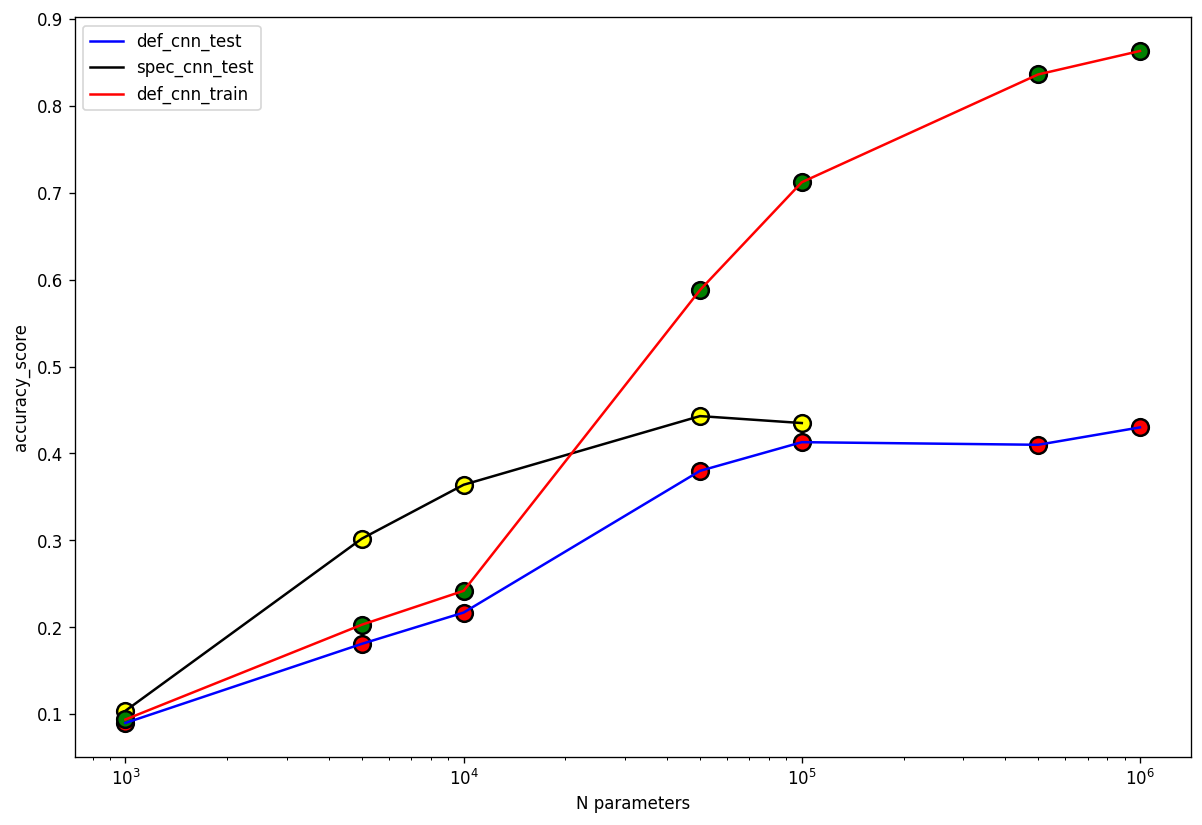

In [ ]:
test_y_def=np.array([0.090,0.181,0.217,0.38,0.413,0.41,0.43])
test_x_def=np.array([1000,5000,10000,50000,100000,500000,1000000])
test_y_spec=np.array([0.104,0.302,0.364,0.443,0.435])
train_y_def=np.array([0.094,0.203,0.242,0.588,0.712,0.836,0.863])
plt.figure(figsize=(12, 8), dpi=120)
plt.scatter(test_x_def, test_y_def, c='red', s=100, edgecolors='black', linewidths=1.5)
plt.xlabel('N parameters')
plt.ylabel('accuracy_score')
plt.xscale('log')
plt.plot(test_x_def, test_y_def, label='def_cnn_test', color='blue',)
plt.plot(test_x_def[:-2], test_y_spec, label='spec_cnn_test', color='black',)
plt.scatter(test_x_def[:-2], test_y_spec, c='yellow', s=100, edgecolors='black', linewidths=1.5)
plt.plot(test_x_def, train_y_def, label='def_cnn_train', color='red',)
plt.scatter(test_x_def, train_y_def, c='green', s=100, edgecolors='black', linewidths=1.5)
plt.legend(fontsize=10, loc='best')
plt.savefig('acc_score.png', dpi=300, bbox_inches='tight')
plt.show()